In [0]:
from tqdm import tqdm
import pandas as pd
import networkx as nx
import numpy as np
from random import shuffle
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [0]:
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-cluster
!pip install torch-geometric

  Created wheel for torch-scatter: filename=torch_scatter-1.4.0-cp36-cp36m-linux_x86_64.whl size=2929691 sha256=623bd6d98651430f7f9785dd1ab385dff5c2d097ece9042caa3a5be6ff7b9fcc
  Stored in directory: /root/.cache/pip/wheels/25/00/c4/1637b4b3003f29092f4fe2ad4b40dd10906269c1ac2dc82941
Successfully built torch-scatter
  Created wheel for torch-sparse: filename=torch_sparse-0.4.3-cp36-cp36m-linux_x86_64.whl size=3967012 sha256=f541ad8e478d27fd555252eaae0b1dea6455d7e9d784cddf0f558d8410a4fece
  Stored in directory: /root/.cache/pip/wheels/02/66/2b/befece01c2516f9fb3e7b4d150bb2b871221c73657c9cd7735
Successfully built torch-sparse
  Created wheel for torch-cluster: filename=torch_cluster-1.4.5-cp36-cp36m-linux_x86_64.whl size=16219712 sha256=2fc2d81f76ca4297061b6f9f95a9e79b895e816be2db384a79785459143ffc54
  Stored in directory: /root/.cache/pip/wheels/0a/26/7e/a6d6a80eae5ca39b92bc77773f36cf433d5085de18014382b1
Successfully built torch-cluster
     |████████████████████████████████| 133kB 35.7M

In [0]:
import torch
from torch_geometric.data import Data
from torch_geometric.data import InMemoryDataset
from torch_geometric.data import DataLoader
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, NNConv
import torch.nn as nn
import matplotlib.pyplot as plt

In [0]:
sing = pd.read_csv('singleton.csv')
pair = pd.read_csv('pair.csv')
trip = pd.read_csv('triplet.csv')

In [0]:
hadamard = {(0, 0): [0.003946992103010416, 0.005740892607718706, 0.0001641758281039074, 0.02331223152577877, 0.03538791462779045, 0.012205827981233597, 5.550505738938227e-05, 0.024061141535639763, 0.016338862478733063, 0.01376073993742466, 0.01958584599196911, 0.02800675854086876, 0.012942454777657986, 0.027724066749215126, 0.02863899990916252, 0.001429217867553234, 0.02338746003806591, 0.008777381852269173, 0.028261637315154076, 0.014840098097920418, 6.990771362325177e-05, 0.012138533405959606, 0.004692638758569956, 0.0018139855237677693, 9.127939119935036e-05, 0.03638657554984093, 0.03566665202379227, 0.03539414331316948, 0.010200433433055878, 0.018650906160473824, 0.012248912826180458, 0.02916664443910122, 0.023714976385235786, 0.025856370106339455, 0.03345262631773949, 0.025391019880771637, 0.026901114732027054, 0.02917426824569702, 0.03693830594420433, 0.016259364783763885, 0.02625572867691517, 0.03103713132441044, 0.02411290816962719, 0.03466473147273064, 0.03242924436926842, 0.021695956587791443, 0.015079847536981106, 0.028049122542142868, 0.027896903455257416, 0.016001464799046516], (0, 1): [0.0007421460468322039, 0.0018695746548473835, 0.0008353123557753861, 0.017732134088873863, 0.034516409039497375, 0.015593817457556725, 0.0004974288167431951, 0.01729166880249977, 0.012674045749008656, 0.017747150734066963, 0.014473279938101768, 0.02760264091193676, 0.006896628998219967, 0.02786487340927124, 0.02478094771504402, 0.003398420987650752, 0.025381147861480713, 0.0033849754836410284, 0.02431820146739483, 0.019654015079140663, -0.00044589783647097647, 0.013665353879332542, 0.00814451277256012, 0.003926039673388004, 0.0005686904769390821, 0.036752767860889435, 0.03601664677262306, 0.035810280591249466, 0.010474213398993015, 0.018950702622532845, 0.012573535554111004, 0.029467634856700897, 0.023638451471924782, 0.02590223215520382, 0.0335875079035759, 0.02517891302704811, 0.02676670253276825, 0.02899596095085144, 0.037457242608070374, 0.016520755365490913, 0.02601582556962967, 0.0309239961206913, 0.024220500141382217, 0.03467540070414543, 0.03300011157989502, 0.021680498495697975, 0.015202969312667847, 0.02809211239218712, 0.027621079236268997, 0.016254151239991188], (0, 2): [-0.013563371263444424, -0.019098959863185883, 0.00346438679844141, -0.02282804436981678, 0.004725140519440174, 0.022449210286140442, 0.0021736903581768274, -0.027754170820116997, -0.013138205744326115, 0.026479756459593773, -0.01633085124194622, 0.010412720963358879, -0.0246755201369524, 0.004426854662597179, -0.012289165519177914, 0.010066773742437363, 0.016713015735149384, -0.022020554170012474, -0.008314603939652443, 0.028396381065249443, -0.002370494417846203, 0.017777590081095695, 0.01827154867351055, 0.011035897769033909, 0.0024051687214523554, -0.0009673456661403179, -0.0009383191936649382, -0.0009595348383300006, -0.00013093464076519012, -0.0002677496231626719, -9.342493285657838e-05, -0.0007112986641004682, -0.0004634917131625116, -0.0005586511106230319, -0.0008343766094185412, -0.0005462673725560308, -0.0005522444844245911, -0.0006885366165079176, -0.0009540036553516984, -0.0001915777538670227, -0.0005651044775731862, -0.0007722699665464461, -0.0004767595964949578, -0.0009263873216696084, -0.0008956599631346762, -0.0004967643180862069, -0.0002585549373179674, -0.0006825094460509717, -0.0006505830097012222, -0.00019624040578491986], (0, 3): [0.0058905454352498055, 0.008594934828579426, 0.0002895739453379065, 0.03798823431134224, 0.058761175721883774, 0.018582576885819435, 0.00011811799777206033, 0.03870581462979317, 0.023564288392663002, 0.022282367572188377, 0.030393660068511963, 0.042730461806058884, 0.01738625578582287, 0.04221057519316673, 0.0436931774020195, 0.0026734599377959967, 0.03670142963528633, 0.011882822029292583, 0.04580957442522049, 0.02391826920211315, -2.0263991245883517e-05, 0.018591739237308502, 0.007582624908536673, 0.0032025345135480165, 0.00026065317797474563, -0.012031388469040394, -0.010864821262657642, -0.010380186140537262, 0.01138942688703537, 0.015493695624172688, 0.016320496797561646, 0.004475822206586599, 0.012714737094938755, 0.009126173332333565, -0.004370214883238077, 0.0098801264539361, 0.006279636174440384, 0.007471212651580572, -0.016172902658581734, 0.017101965844631195, 0.00823267176747322, 0.0015250949654728174, 0.011762023903429508, -0.007647182792425156, -0.00614458043128252, 0.013152243569493294, 0.012656199745833874, 0.007535361219197512, 0.007791816722601652, 0.016457203775644302], (0, 4): [-0.01396975014358759, -0.02042938955128193, 0.0023240253794938326, -0.04227292537689209, -0.036385681480169296, 0.002306394511833787, 0.0014971649507060647, -0.04654642939567566, -0.027705660089850426, 0.0040577775798738, -0.03279193490743637, -0.023941081017255783, -0.03286256268620491, -0.02853085845708847, -0.0415847972035408, 0.005618587136268616, -0.014658431522548199, -0.025858977809548378, -0.03686976805329323, 0.004139702767133713, -0.0018351917387917638, -0.0004758258874062449, 0.008012139238417149, 0.00594775564968586, 0.0016698504332453012, -0.008518700487911701, -0.008490540087223053, -0.008218728005886078, -0.0021484545432031155, -0.0037563727237284184, -0.002367864130064845, -0.006528251804411411, -0.005356999579817057, -0.005880451761186123, -0.007819750346243382, -0.006119455210864544, -0.006435788236558437, -0.006910340860486031, -0.008805975317955017, -0.003437730483710766, -0.006326315458863974, -0.007180006243288517, -0.005507057067006826, -0.008329289965331554, -0.007549659349024296, -0.004990233574062586, -0.003128805197775364, -0.00645096180960536, -0.006856747902929783, -0.003064075019210577], (0, 5): [-0.014936861582100391, -0.02088845707476139, 0.0025901407934725285, -0.041831936687231064, -0.033212192356586456, 0.005230682902038097, 0.00163952203001827, -0.0460851676762104, -0.026980072259902954, 0.007047279737889767, -0.032722700387239456, -0.02029109187424183, -0.032425716519355774, -0.025051431730389595, -0.039262764155864716, 0.006354494486004114, -0.011066514998674393, -0.02615288645029068, -0.03559263050556183, 0.007272024173289537, -0.0019600349478423595, 0.0020366162061691284, 0.009713059291243553, 0.006848551332950592, 0.0018274050671607256, 0.003730588359758258, 0.00366451358422637, 0.003630736144259572, 0.0014405119000002742, 0.002512536942958832, 0.0018678192282095551, 0.0032827395480126143, 0.0028793325182050467, 0.0030198744498193264, 0.003556523472070694, 0.002916286000981927, 0.0030008077155798674, 0.0032897205092012882, 0.003683689748868346, 0.0023068322334438562, 0.002965915948152542, 0.003366116201505065, 0.002928967820480466, 0.003474285826086998, 0.003350225044414401, 0.0027162153273820877, 0.002045498928055167, 0.0031950692646205425, 0.003118556924164295, 0.00229876721277833], (0, 6): [0.007775863632559776, 0.012589770369231701, -0.00016298827540595084, 0.04232209548354149, 0.05937306955456734, 0.018271753564476967, -0.00021733726316597313, 0.04417022317647934, 0.028472190722823143, 0.01957210898399353, 0.03393619880080223, 0.045477498322725296, 0.025356248021125793, 0.04640522226691246, 0.05011163651943207, 0.0010206176666542888, 0.03747012838721275, 0.017605451866984367, 0.0479537770152092, 0.021030941978096962, 0.00045281456550583243, 0.018360938876867294, 0.005412610713392496, 0.0015974793350324035, -0.00018756097415462136, -0.000494439504109323, -0.0004512607993092388, -0.00047975091729313135, 5.447320290841162e-05, 7.471498247468844e-05, 0.00011116536916233599, -0.0002432981418678537, -2.8584019673871808e-05, -8.262375922640786e-05, -0.0003710178134497255, -5.778078411822207e-05, -0.0001536442869110033, -0.00017339088662993163, -0.00048311587306670845, 0.00012356000661384314, -0.00010459686018293723, -0.00030336977215483785, -1.0855462278414052e-05, -0.0003871504741255194, -0.000354442949173972, 3.098895831499249e-05, 7.852803537389264e-05, -0.00014454869960900396, -0.00011119062401121482, 0.0001110498997149989], (1, 0): [0.0007421460468322039, 0.0018695746548473835, 0.0008353123557753861, 0.017732134088873863, 0.034516409039497375, 0.015593817457556725, 0.0004974288167431951, 0.01729166880249977, 0.012674045749008656, 0.017747150734066963, 0.014473279938101768, 0.02760264091193676, 0.006896628998219967, 0.02786487340927124, 0.02478094771504402, 0.003398420987650752, 0.025381147861480713, 0.0033849754836410284, 0.02431820146739483, 0.019654015079140663, -0.00044589783647097647, 0.013665353879332542, 0.00814451277256012, 0.003926039673388004, 0.0005686904769390821, 0.036752767860889435, 0.03601664677262306, 0.035810280591249466, 0.010474213398993015, 0.018950702622532845, 0.012573535554111004, 0.029467634856700897, 0.023638451471924782, 0.02590223215520382, 0.0335875079035759, 0.02517891302704811, 0.02676670253276825, 0.02899596095085144, 0.037457242608070374, 0.016520755365490913, 0.02601582556962967, 0.0309239961206913, 0.024220500141382217, 0.03467540070414543, 0.03300011157989502, 0.021680498495697975, 0.015202969312667847, 0.02809211239218712, 0.027621079236268997, 0.016254151239991188], (1, 1): [0.00013954444148112088, 0.0006088442751206458, 0.004249996971338987, 0.013487708754837513, 0.03366636112332344, 0.01992221549153328, 0.004457890056073666, 0.012426749803125858, 0.00983124878257513, 0.02288840152323246, 0.010695265606045723, 0.027204353362321854, 0.0036749974824488163, 0.02800639532506466, 0.021442627534270287, 0.008080828934907913, 0.027544789016246796, 0.0013054072624072433, 0.0209250058978796, 0.026029499247670174, 0.002844104776158929, 0.015384223312139511, 0.014135562814772129, 0.00849719438701868, 0.003543065395206213, 0.03712264448404312, 0.03637007251381874, 0.03623131290078163, 0.010755341500043869, 0.019255317747592926, 0.012906760908663273, 0.029771730303764343, 0.023562174290418625, 0.0259481742978096, 0.03372293338179588, 0.024968579411506653, 0.026632962748408318, 0.02881874144077301, 0.03798346966505051, 0.016786348074674606, 0.025778114795684814, 0.03081127256155014, 0.024328572675585747, 0.034686069935560226, 0.033581025898456573, 0.021665051579475403, 0.015327096916735172, 0.02813516929745674, 0.027347981929779053, 0.01651082932949066], (1, 2): [-0.0025502971839159727, -0.006219752598553896, 0.017626499757170677, -0.017363842576742172, 0.004608773626387119, 0.028680469840765, 0.01948031783103943, -0.01994568295776844, -0.0101912971585989, 0.03415079787373543, -0.012067948468029499, 0.010262471623718739, -0.013148811645805836, 0.004449338186532259, -0.010633653029799461, 0.023936960846185684, 0.01813773438334465, -0.00849217176437378, -0.007154440972954035, 0.03760776296257973, 0.01511990837752819, 0.020013708621263504, 0.03171197697520256, 0.023885183036327362, 0.01498472411185503, -0.0009770808974280953, -0.000947526830714196, -0.0009708163561299443, -0.00013444892829284072, -0.0002720534394029528, -9.590089757693931e-05, -0.0007186390575952828, -0.0004619960964191705, -0.0005596419796347618, -0.0008377408375963569, -0.0005417040665633976, -0.0005494852084666491, -0.0006843284354545176, -0.0009674062603153288, -0.00019465762306936085, -0.0005599409923888743, -0.000769454927649349, -0.0004788869118783623, -0.0009266724227927625, -0.0009114266140386462, -0.0004964103573001921, -0.00026066595455631614, -0.0006835554959252477, -0.0006441504810936749, -0.00019933932344429195], (1, 3): [0.0011075889924541116, 0.002799019915983081, 0.0014733270509168506, 0.028895238414406776, 0.05731404945254326, 0.02374057099223137, 0.0010585575364530087, 0.02781613916158676, 0.018278803676366806, 0.028737446293234825, 0.022459890693426132, 0.04211388900876045, 0.00926459114998579, 0.04242495447397232, 0.03780712932348251, 0.006357003003358841, 0.039830077439546585, 0.004582580644637346, 0.03941761702299118, 0.031677015125751495, 0.00012925139162689447, 0.02093026414513588, 0.013160353526473045, 0.006931299809366465, 0.0016239259857684374, -0.012152470648288727, -0.010971436277031898, -0.010502228513360023, 0.011695119552314281, 0.015742741525173187, 0.016753025352954865, 0.004522011149674654, 0.012673708610236645, 0.009142360650002956, -0.004387835972011089, 0.009797591716051102, 0.0062482599169015884, 0.007425549905747175, -0.016400109976530075, 0.01737690158188343, 0.008157448843121529, 0.0015195357846096158, 0.011814506724476814, -0.007649536244571209, -0.006252746097743511, 0.013142872601747513, 0.01275953371077776, 0.007546910550445318, 0.007714776787906885, 0.016717087477445602], (1, 4): [-0.0026267077773809433, -0.006653019692748785, 0.011824438348412514, -0.032154329121112823, -0.035489603877067566, 0.002946583554148674, 0.013417390175163746, -0.03345084190368652, -0.021491261199116707, 0.005233293399214745, -0.024232134222984314, -0.023595627397298813, -0.017511429265141487, -0.028675762936472893, -0.035982776433229446, 0.013359981589019299, -0.015908004716038704, -0.009972450323402882, -0.031725212931632996, 0.005482563283294439, 0.011705545708537102, -0.0005356766632758081, 0.013905816711485386, 0.012872829101979733, 0.010403531603515148, -0.00860443152487278, -0.008573857136070728, -0.008315357379615307, -0.002206119243055582, -0.00381675292737782, -0.0024306175764650106, -0.0065956213511526585, -0.005339713301509619, -0.005890882108360529, -0.007851280272006989, -0.006068335846066475, -0.006403631996363401, -0.006868105847388506, -0.008929687552154064, -0.0034929965622723103, -0.006268511060625315, -0.0071538337506353855, -0.0055316295474767685, -0.00833185389637947, -0.007682559080421925, -0.004986677784472704, -0.003154350910335779, -0.006460848730057478, -0.006788953207433224, -0.0031124611850827932], (1, 5): [-0.002808552235364914, -0.0068025183863937855, 0.013178410939872265, -0.031818900257349014, -0.03239426761865616, 0.006682571489363909, 0.014693174511194229, -0.03311935067176819, -0.02092842385172844, 0.009088837541639805, -0.024180972948670387, -0.019998304545879364, -0.017278647050261497, -0.025178663432598114, -0.03397355228662491, 0.015109836123883724, -0.01200989168137312, -0.01008579507470131, -0.03062627837061882, 0.009630965068936348, 0.012501843273639679, 0.002292787656188011, 0.016857922077178955, 0.01482243649661541, 0.011385131627321243, 0.003768132533878088, 0.0037004731129854918, 0.003673423547297716, 0.0014791752910241485, 0.002552923746407032, 0.0019173205364495516, 0.0033166164066642523, 0.002870041411370039, 0.0030252309516072273, 0.003570863511413336, 0.0028919244650751352, 0.0029858143534511328, 0.0032696144189685583, 0.003735441016033292, 0.0023439174983650446, 0.0029388158582150936, 0.0033538462594151497, 0.0029420368373394012, 0.003475354751572013, 0.003409200580790639, 0.0027142800390720367, 0.0020621998701244593, 0.0031999661587178707, 0.0030877229291945696, 0.002335068304091692], (1, 6): [0.0014620821457356215, 0.004099974874407053, -0.0008292701677419245, 0.03219173103570938, 0.05791087448596954, 0.023343469947576523, -0.0019477471942082047, 0.03174316883087158, 0.02208586037158966, 0.025242041796445847, 0.025077706202864647, 0.04482128843665123, 0.013511549681425095, 0.04664091020822525, 0.043360937386751175, 0.002426843624562025, 0.04066430777311325, 0.006789498496800661, 0.041262634098529816, 0.02785308100283146, -0.0028882224578410387, 0.02067043073475361, 0.009394091553986073, 0.003457451704889536, -0.0011685456847772002, -0.0004994155024178326, -0.0004556889762170613, -0.00048539147246629, 5.5935266573214903e-05, 7.591595931444317e-05, 0.00011411149171181023, -0.0002458089147694409, -2.8491784178186208e-05, -8.277030428871512e-05, -0.0003725137503352016, -5.7298108004033566e-05, -0.00015287661517504603, -0.00017233115795534104, -0.000489903031848371, 0.0001255463866982609, -0.0001036411413224414, -0.0003022639430128038, -1.0903899237746373e-05, -0.0003872695961035788, -0.00036068237386643887, 3.096687942161225e-05, 7.916919275885448e-05, -0.00014477025251835585, -0.00011009125591954216, 0.00011280354374321178], (2, 0): [-0.013563371263444424, -0.019098959863185883, 0.00346438679844141, -0.02282804436981678, 0.004725140519440174, 0.022449210286140442, 0.0021736903581768274, -0.027754170820116997, -0.013138205744326115, 0.026479756459593773, -0.01633085124194622, 0.010412720963358879, -0.0246755201369524, 0.004426854662597179, -0.012289165519177914, 0.010066773742437363, 0.016713015735149384, -0.022020554170012474, -0.008314603939652443, 0.028396381065249443, -0.002370494417846203, 0.017777590081095695, 0.01827154867351055, 0.011035897769033909, 0.0024051687214523554, -0.0009673456661403179, -0.0009383191936649382, -0.0009595348383300006, -0.00013093464076519012, -0.0002677496231626719, -9.342493285657838e-05, -0.0007112986641004682, -0.0004634917131625116, -0.0005586511106230319, -0.0008343766094185412, -0.0005462673725560308, -0.0005522444844245911, -0.0006885366165079176, -0.0009540036553516984, -0.0001915777538670227, -0.0005651044775731862, -0.0007722699665464461, -0.0004767595964949578, -0.0009263873216696084, -0.0008956599631346762, -0.0004967643180862069, -0.0002585549373179674, -0.0006825094460509717, -0.0006505830097012222, -0.00019624040578491986], (2, 1): [-0.0025502971839159727, -0.006219752598553896, 0.017626499757170677, -0.017363842576742172, 0.004608773626387119, 0.028680469840765, 0.01948031783103943, -0.01994568295776844, -0.0101912971585989, 0.03415079787373543, -0.012067948468029499, 0.010262471623718739, -0.013148811645805836, 0.004449338186532259, -0.010633653029799461, 0.023936960846185684, 0.01813773438334465, -0.00849217176437378, -0.007154440972954035, 0.03760776296257973, 0.01511990837752819, 0.020013708621263504, 0.03171197697520256, 0.023885183036327362, 0.01498472411185503, -0.0009770808974280953, -0.000947526830714196, -0.0009708163561299443, -0.00013444892829284072, -0.0002720534394029528, -9.590089757693931e-05, -0.0007186390575952828, -0.0004619960964191705, -0.0005596419796347618, -0.0008377408375963569, -0.0005417040665633976, -0.0005494852084666491, -0.0006843284354545176, -0.0009674062603153288, -0.00019465762306936085, -0.0005599409923888743, -0.000769454927649349, -0.0004788869118783623, -0.0009266724227927625, -0.0009114266140386462, -0.0004964103573001921, -0.00026066595455631614, -0.0006835554959252477, -0.0006441504810936749, -0.00019933932344429195], (2, 2): [0.04660891741514206, 0.06353894621133804, 0.07310440391302109, 0.02235391177237034, 0.0006309203454293311, 0.04128905385732651, 0.08512610197067261, 0.03201402351260185, 0.01056453213095665, 0.05095492675900459, 0.013616806827485561, 0.0038713780231773853, 0.0470452681183815, 0.0007068603299558163, 0.005273354705423117, 0.07090586423873901, 0.011943361721932888, 0.0552448071539402, 0.002446165308356285, 0.054336193948984146, 0.080380879342556, 0.02603631652891636, 0.07114323228597641, 0.06714003533124924, 0.06337505578994751, 2.5717112293932587e-05, 2.4685323296580464e-05, 2.6012980015366338e-05, 1.6807011888886336e-06, 3.84377335649333e-06, 7.125709089450538e-07, 1.7346726963296533e-05, 9.058603609446436e-06, 1.2070181583112571e-05, 2.0811052308999933e-05, 1.1752502359740902e-05, 1.1336854186083656e-05, 1.625002914806828e-05, 2.4639004550408572e-05, 2.2572860416403273e-06, 1.2162795428594109e-05, 1.9215724023524672e-05, 9.426474207430147e-06, 2.4756962375249714e-05, 2.473713902872987e-05, 1.1374228961358313e-05, 4.43311182607431e-06, 1.660726047703065e-05, 1.5172229723248165e-05, 2.4066730475169607e-06], (2, 3): [-0.02024216204881668, -0.028593864291906357, 0.006110498681664467, -0.0371992290019989, 0.007846035063266754, 0.03417745977640152, 0.0046257395297288895, -0.04464658349752426, -0.018948225304484367, 0.04287790134549141, -0.02534250169992447, 0.01588689163327217, -0.03314787894487381, 0.006739995442330837, -0.01874900422990322, 0.018830658867955208, 0.026227369904518127, -0.029811430722475052, -0.013477225787937641, 0.045767370611429214, 0.0006871297955513, 0.027228686958551407, 0.029524177312850952, 0.019483532756567, 0.006868087686598301, 0.00031985726673156023, 0.00028583197854459286, 0.0002814067411236465, -0.00014619679132010788, -0.00022242516570258886, -0.0001244797313120216, -0.00010915367602137849, -0.00024850014597177505, -0.00019717954273801297, 0.00010900205961661413, -0.00021256296895444393, -0.00012891266669612378, -0.00017632673552725464, 0.0004176966904196888, -0.00020150578347966075, -0.000177192545379512, -3.794761505560018e-05, -0.0002325583336642012, 0.00020436487102415413, 0.0001697065308690071, -0.0003011420485563576, -0.00021699974604416639, -0.00018335528147872537, -0.00018171276315115392, -0.00020182954904157668], (2, 4): [0.04800539091229439, 0.0679650604724884, 0.04904085025191307, 0.041394926607608795, -0.004858366679400206, 0.004241968039423227, 0.058632005006074905, 0.05369061604142189, 0.022278334945440292, 0.007808370981365442, 0.02734220400452614, -0.008901129476726055, 0.06265432387590408, -0.0045556798577308655, 0.01784428581595421, 0.039574820548295975, -0.010475127026438713, 0.06487458199262619, 0.010847125202417374, 0.007921280339360237, 0.06222934648394585, -0.00069687474751845, 0.031196562573313713, 0.03618486970663071, 0.043999768793582916, 0.0002264716604258865, 0.00022336933761835098, 0.0002228096273029223, 2.757796028163284e-05, 5.392592356656678e-05, 1.8060178263112903e-05, 0.000159207105753012, 0.00010469860717421398, 0.0001270526845473796, 0.0001950404985109344, 0.00013165516429580748, 0.00013211827899795026, 0.00016308970225509256, 0.0002274314610986039, 4.0505437937099487e-05, 0.00013616186333820224, 0.00017865386325865984, 0.00010888534598052502, 0.0002225936477771029, 0.00020851324370596558, 0.00011425952834542841, 5.3645639127353206e-05, 0.0001569689775351435, 0.0001599060487933457, 3.757751619559713e-05], (2, 5): [0.05132875591516495, 0.06949228793382645, 0.054656337946653366, 0.040963102132081985, -0.004434629343450069, 0.009620380587875843, 0.06420699506998062, 0.053158558905124664, 0.021694883704185486, 0.013561062514781952, 0.027284476906061172, -0.007544088643044233, 0.061821453273296356, -0.004000100307166576, 0.0168478861451149, 0.04475822672247887, -0.007908291183412075, 0.06561193615198135, 0.010471390560269356, 0.013914945535361767, 0.06646264344453812, 0.0029827430844306946, 0.03781936690211296, 0.04166511446237564, 0.04815125837922096, -9.917856368701905e-05, -9.640611824579537e-05, -9.842922008829191e-05, -1.8490676666260697e-05, -3.606960308388807e-05, -1.4246234968595672e-05, -8.005749259609729e-05, -5.627443169942126e-05, -6.524722266476601e-05, -8.870694000506774e-05, -6.274155020946637e-05, -6.160263728816062e-05, -7.764009933453053e-05, -9.513846453046426e-05, -2.7180503821000457e-05, -6.383567961165681e-05, -8.375614561373368e-05, -5.7911449403036386e-05, -9.284751286031678e-05, -9.25295171327889e-05, -6.219217902980745e-05, -3.5071563615929335e-05, -7.774449477437884e-05, -7.27277947589755e-05, -2.8191856472403742e-05], (2, 6): [-0.026720834895968437, -0.04188399389386177, -0.003439327236264944, -0.041443075984716415, 0.00792773813009262, 0.03360578790307045, -0.008511366322636604, -0.05094970017671585, -0.022894708439707756, 0.0376625619828701, -0.028296299278736115, 0.016908220946788788, -0.04834311455488205, 0.007409778423607349, -0.021503202617168427, 0.007188775576651096, 0.026776693761348724, -0.044168271124362946, -0.014108052477240562, 0.04024249687790871, -0.01535444799810648, 0.026890665292739868, 0.021074876189231873, 0.00971872080117464, -0.004942142870277166, 1.3144791410013568e-05, 1.1871780770889018e-05, 1.3006042536289897e-05, -6.992281100792752e-07, -1.0725971151259728e-06, -8.478807558276458e-07, 5.933409738645423e-06, 5.586535962720518e-07, 1.7851638176580309e-06, 9.253939424525015e-06, 1.2431071354512824e-06, 3.154115347570041e-06, 4.092166818736587e-06, 1.2477408745326102e-05, -1.455859319321462e-06, 2.2512476789415814e-06, 7.548486792074982e-06, 2.1463382893216476e-07, 1.0346287126594689e-05, 9.789322575670667e-06, -7.09542689492082e-07, -1.3464201629176387e-06, 3.51725270775205e-06, 2.5930739866453223e-06, -1.3619051060231868e-06], (3, 0): [0.0058905454352498055, 0.008594934828579426, 0.0002895739453379065, 0.03798823431134224, 0.058761175721883774, 0.018582576885819435, 0.00011811799777206033, 0.03870581462979317, 0.023564288392663002, 0.022282367572188377, 0.030393660068511963, 0.042730461806058884, 0.01738625578582287, 0.04221057519316673, 0.0436931774020195, 0.0026734599377959967, 0.03670142963528633, 0.011882822029292583, 0.04580957442522049, 0.02391826920211315, -2.0263991245883517e-05, 0.018591739237308502, 0.007582624908536673, 0.0032025345135480165, 0.00026065317797474563, -0.012031388469040394, -0.010864821262657642, -0.010380186140537262, 0.01138942688703537, 0.015493695624172688, 0.016320496797561646, 0.004475822206586599, 0.012714737094938755, 0.009126173332333565, -0.004370214883238077, 0.0098801264539361, 0.006279636174440384, 0.007471212651580572, -0.016172902658581734, 0.017101965844631195, 0.00823267176747322, 0.0015250949654728174, 0.011762023903429508, -0.007647182792425156, -0.00614458043128252, 0.013152243569493294, 0.012656199745833874, 0.007535361219197512, 0.007791816722601652, 0.016457203775644302], (3, 1): [0.0011075889924541116, 0.002799019915983081, 0.0014733270509168506, 0.028895238414406776, 0.05731404945254326, 0.02374057099223137, 0.0010585575364530087, 0.02781613916158676, 0.018278803676366806, 0.028737446293234825, 0.022459890693426132, 0.04211388900876045, 0.00926459114998579, 0.04242495447397232, 0.03780712932348251, 0.006357003003358841, 0.039830077439546585, 0.004582580644637346, 0.03941761702299118, 0.031677015125751495, 0.00012925139162689447, 0.02093026414513588, 0.013160353526473045, 0.006931299809366465, 0.0016239259857684374, -0.012152470648288727, -0.010971436277031898, -0.010502228513360023, 0.011695119552314281, 0.015742741525173187, 0.016753025352954865, 0.004522011149674654, 0.012673708610236645, 0.009142360650002956, -0.004387835972011089, 0.009797591716051102, 0.0062482599169015884, 0.007425549905747175, -0.016400109976530075, 0.01737690158188343, 0.008157448843121529, 0.0015195357846096158, 0.011814506724476814, -0.007649536244571209, -0.006252746097743511, 0.013142872601747513, 0.01275953371077776, 0.007546910550445318, 0.007714776787906885, 0.016717087477445602], (3, 2): [-0.02024216204881668, -0.028593864291906357, 0.006110498681664467, -0.0371992290019989, 0.007846035063266754, 0.03417745977640152, 0.0046257395297288895, -0.04464658349752426, -0.018948225304484367, 0.04287790134549141, -0.02534250169992447, 0.01588689163327217, -0.03314787894487381, 0.006739995442330837, -0.01874900422990322, 0.018830658867955208, 0.026227369904518127, -0.029811430722475052, -0.013477225787937641, 0.045767370611429214, 0.0006871297955513, 0.027228686958551407, 0.029524177312850952, 0.019483532756567, 0.006868087686598301, 0.00031985726673156023, 0.00028583197854459286, 0.0002814067411236465, -0.00014619679132010788, -0.00022242516570258886, -0.0001244797313120216, -0.00010915367602137849, -0.00024850014597177505, -0.00019717954273801297, 0.00010900205961661413, -0.00021256296895444393, -0.00012891266669612378, -0.00017632673552725464, 0.0004176966904196888, -0.00020150578347966075, -0.000177192545379512, -3.794761505560018e-05, -0.0002325583336642012, 0.00020436487102415413, 0.0001697065308690071, -0.0003011420485563576, -0.00021699974604416639, -0.00018335528147872537, -0.00018171276315115392, -0.00020182954904157668], (3, 3): [0.008791131898760796, 0.012867842800915241, 0.0005107516190037131, 0.06190337985754013, 0.09757217019796371, 0.0282907634973526, 0.0002513619838282466, 0.06226387619972229, 0.033984966576099396, 0.03608119115233421, 0.047165416181087494, 0.06519470363855362, 0.023355839774012566, 0.064266636967659, 0.06666063517332077, 0.005000908859074116, 0.057594746351242065, 0.016086967661976814, 0.07425320148468018, 0.03854985162615776, 5.873876943951473e-06, 0.02847566269338131, 0.012252423912286758, 0.005653974134474993, 0.0007443090435117483, 0.0039782337844371796, 0.0033096554689109325, 0.0030442397110164165, 0.01271701417863369, 0.01287093386054039, 0.02174549363553524, 0.0006868456839583814, 0.006816980894654989, 0.00322114210575819, 0.0005709201795980334, 0.003844544058665633, 0.0014658808941021562, 0.0019132961751893163, 0.00708107091486454, 0.017988231033086777, 0.002581413136795163, 7.493974408134818e-05, 0.005737392231822014, 0.0016870000399649143, 0.0011642538011074066, 0.00797298364341259, 0.010622084140777588, 0.002024365123361349, 0.0021763136610388756, 0.01692592352628708], (3, 4): [-0.020848648622632027, -0.03058570995926857, 0.004099124576896429, -0.0688854530453682, -0.06041795387864113, 0.0035113352350890636, 0.0031860542949289083, -0.07487663626670837, -0.03995774686336517, 0.006570641417056322, -0.0508871003985405, -0.036527376621961594, -0.04414594545960426, -0.04343893378973007, -0.06344397366046906, 0.010509991087019444, -0.02300315722823143, -0.035007890313863754, -0.05976257845759392, 0.00667209317907691, 0.0005319628398865461, -0.0007287891348823905, 0.012946457602083683, 0.010500576347112656, 0.004768346901983023, 0.002816747408360243, 0.002586398972198367, 0.0024103401228785515, -0.0023988850880414248, -0.0031204966362565756, -0.003154951147735119, -0.0010018051834776998, -0.0028721445705741644, -0.002075543627142906, 0.0010215637739747763, -0.002381195779889822, -0.001502332161180675, -0.001769662951119244, 0.003855568589642644, -0.003615882247686386, -0.001983661437407136, -0.00035280940937809646, -0.002686284715309739, 0.0018374758074060082, 0.001430483185686171, -0.0030251150019466877, -0.0026259408332407475, -0.0017330426489934325, -0.0019151417072862387, -0.0031513432040810585], (3, 5): [-0.02229197882115841, -0.031272996217012405, 0.004568499978631735, -0.06816685199737549, -0.0551484152674675, 0.007963374257087708, 0.003488998394459486, -0.07413463294506073, -0.03891128674149513, 0.01141145545989275, -0.050779663026332855, -0.030958516523241997, -0.043559107929468155, -0.03814142197370529, -0.05990135669708252, 0.01188656222075224, -0.0173664391040802, -0.03540578484535217, -0.05769245699048042, 0.011720556765794754, 0.0005681508337147534, 0.003119342029094696, 0.01569489762187004, 0.012090902775526047, 0.005218252539634705, -0.0012335361680015922, -0.0011162888258695602, -0.0010648008901625872, 0.0016084223752841353, 0.002087216591462493, 0.002488689497113228, 0.0005037589580751956, 0.001543748308904469, 0.0010658842511475086, -0.0004646203888114542, 0.0011347820982336998, 0.0007004907238297164, 0.0008424615953117609, -0.0016128502320498228, 0.0024263777304440737, 0.0009299842058680952, 0.00016540339856874198, 0.0014287198428064585, -0.0007664417498745024, -0.0006347890011966228, 0.001646589138545096, 0.0017167443875223398, 0.0008583512390032411, 0.0008710366673767567, 0.0023642387241125107], (3, 6): [0.011604806408286095, 0.018848679959774017, -0.0002874793135561049, 0.06896558403968811, 0.09858821332454681, 0.027817554771900177, -0.0004625063738785684, 0.07105416804552078, 0.041063256561756134, 0.03169254958629608, 0.052662789821624756, 0.06938590854406357, 0.03406233340501785, 0.07065309584140778, 0.07645297795534134, 0.0019091423600912094, 0.05880105122923851, 0.023834265768527985, 0.0777287632226944, 0.033896252512931824, -0.0001312563254032284, 0.028122160583734512, 0.008745995350182056, 0.00282029970549047, -0.0005355903413146734, 0.00016348870121873915, 0.00013746363401878625, 0.0001406985247740522, 6.082276740926318e-05, 6.206728721735999e-05, 0.00014811714936513454, -3.733577614184469e-05, -1.5325265849241987e-05, -2.916259109042585e-05, 4.846936644753441e-05, -2.2483596694655716e-05, -3.5865810787072405e-05, -4.440351767698303e-05, 0.00021152528643142432, 0.0001299631840083748, -3.279709562775679e-05, -1.4906910109857563e-05, -5.295180471875938e-06, 8.540698763681576e-05, 6.7158616730012e-05, 1.8785725842462853e-05, 6.590693374164402e-05, -3.883282624883577e-05, -3.1056384614203125e-05, 0.00011421272938605398], (4, 0): [-0.01396975014358759, -0.02042938955128193, 0.0023240253794938326, -0.04227292537689209, -0.036385681480169296, 0.002306394511833787, 0.0014971649507060647, -0.04654642939567566, -0.027705660089850426, 0.0040577775798738, -0.03279193490743637, -0.023941081017255783, -0.03286256268620491, -0.02853085845708847, -0.0415847972035408, 0.005618587136268616, -0.014658431522548199, -0.025858977809548378, -0.03686976805329323, 0.004139702767133713, -0.0018351917387917638, -0.0004758258874062449, 0.008012139238417149, 0.00594775564968586, 0.0016698504332453012, -0.008518700487911701, -0.008490540087223053, -0.008218728005886078, -0.0021484545432031155, -0.0037563727237284184, -0.002367864130064845, -0.006528251804411411, -0.005356999579817057, -0.005880451761186123, -0.007819750346243382, -0.006119455210864544, -0.006435788236558437, -0.006910340860486031, -0.008805975317955017, -0.003437730483710766, -0.006326315458863974, -0.007180006243288517, -0.005507057067006826, -0.008329289965331554, -0.007549659349024296, -0.004990233574062586, -0.003128805197775364, -0.00645096180960536, -0.006856747902929783, -0.003064075019210577], (4, 1): [-0.0026267077773809433, -0.006653019692748785, 0.011824438348412514, -0.032154329121112823, -0.035489603877067566, 0.002946583554148674, 0.013417390175163746, -0.03345084190368652, -0.021491261199116707, 0.005233293399214745, -0.024232134222984314, -0.023595627397298813, -0.017511429265141487, -0.028675762936472893, -0.035982776433229446, 0.013359981589019299, -0.015908004716038704, -0.009972450323402882, -0.031725212931632996, 0.005482563283294439, 0.011705545708537102, -0.0005356766632758081, 0.013905816711485386, 0.012872829101979733, 0.010403531603515148, -0.00860443152487278, -0.008573857136070728, -0.008315357379615307, -0.002206119243055582, -0.00381675292737782, -0.0024306175764650106, -0.0065956213511526585, -0.005339713301509619, -0.005890882108360529, -0.007851280272006989, -0.006068335846066475, -0.006403631996363401, -0.006868105847388506, -0.008929687552154064, -0.0034929965622723103, -0.006268511060625315, -0.0071538337506353855, -0.0055316295474767685, -0.00833185389637947, -0.007682559080421925, -0.004986677784472704, -0.003154350910335779, -0.006460848730057478, -0.006788953207433224, -0.0031124611850827932], (4, 2): [0.04800539091229439, 0.0679650604724884, 0.04904085025191307, 0.041394926607608795, -0.004858366679400206, 0.004241968039423227, 0.058632005006074905, 0.05369061604142189, 0.022278334945440292, 0.007808370981365442, 0.02734220400452614, -0.008901129476726055, 0.06265432387590408, -0.0045556798577308655, 0.01784428581595421, 0.039574820548295975, -0.010475127026438713, 0.06487458199262619, 0.010847125202417374, 0.007921280339360237, 0.06222934648394585, -0.00069687474751845, 0.031196562573313713, 0.03618486970663071, 0.043999768793582916, 0.0002264716604258865, 0.00022336933761835098, 0.0002228096273029223, 2.757796028163284e-05, 5.392592356656678e-05, 1.8060178263112903e-05, 0.000159207105753012, 0.00010469860717421398, 0.0001270526845473796, 0.0001950404985109344, 0.00013165516429580748, 0.00013211827899795026, 0.00016308970225509256, 0.0002274314610986039, 4.0505437937099487e-05, 0.00013616186333820224, 0.00017865386325865984, 0.00010888534598052502, 0.0002225936477771029, 0.00020851324370596558, 0.00011425952834542841, 5.3645639127353206e-05, 0.0001569689775351435, 0.0001599060487933457, 3.757751619559713e-05], (4, 3): [-0.020848648622632027, -0.03058570995926857, 0.004099124576896429, -0.0688854530453682, -0.06041795387864113, 0.0035113352350890636, 0.0031860542949289083, -0.07487663626670837, -0.03995774686336517, 0.006570641417056322, -0.0508871003985405, -0.036527376621961594, -0.04414594545960426, -0.04343893378973007, -0.06344397366046906, 0.010509991087019444, -0.02300315722823143, -0.035007890313863754, -0.05976257845759392, 0.00667209317907691, 0.0005319628398865461, -0.0007287891348823905, 0.012946457602083683, 0.010500576347112656, 0.004768346901983023, 0.002816747408360243, 0.002586398972198367, 0.0024103401228785515, -0.0023988850880414248, -0.0031204966362565756, -0.003154951147735119, -0.0010018051834776998, -0.0028721445705741644, -0.002075543627142906, 0.0010215637739747763, -0.002381195779889822, -0.001502332161180675, -0.001769662951119244, 0.003855568589642644, -0.003615882247686386, -0.001983661437407136, -0.00035280940937809646, -0.002686284715309739, 0.0018374758074060082, 0.001430483185686171, -0.0030251150019466877, -0.0026259408332407475, -0.0017330426489934325, -0.0019151417072862387, -0.0031513432040810585], (4, 4): [0.04944370314478874, 0.07269949465990067, 0.032898224890232086, 0.07665503770112991, 0.037411581724882126, 0.0004358127189334482, 0.040383756160736084, 0.09004435688257217, 0.04698023200035095, 0.0011965605663135648, 0.05490245297551155, 0.020465608686208725, 0.08344228565692902, 0.02936112880706787, 0.06038253754377365, 0.02208796888589859, 0.009187386371195316, 0.07618293911218643, 0.0480998232960701, 0.0011547859758138657, 0.048176780343055725, 1.8652192011359148e-05, 0.013679804280400276, 0.01950169913470745, 0.0305479746311903, 0.0019943690858781338, 0.0020211951341480017, 0.0019084368832409382, 0.00045251581468619406, 0.0007565495907329023, 0.00045773701276630163, 0.0014611921506002545, 0.0012100980384275317, 0.0013373770052567124, 0.001827913336455822, 0.0014748417306691408, 0.0015396898379549384, 0.001636812463402748, 0.002099316567182541, 0.0007268421468324959, 0.001524325110949576, 0.0016609940212219954, 0.0012577362358570099, 0.002001373562961817, 0.0017575911479070783, 0.0011477912776172161, 0.000649172521661967, 0.0014836437767371535, 0.0016853121342137456, 0.0005867309519089758], (4, 5): [0.05286664143204689, 0.07433311641216278, 0.03666527941823006, 0.07585538178682327, 0.03414861485362053, 0.0009883817983791232, 0.04422362521290779, 0.08915204554796219, 0.045749858021736145, 0.002078107325360179, 0.05478654056787491, 0.017345480620861053, 0.08233307301998138, 0.0257804486900568, 0.05701086297631264, 0.024980992078781128, 0.00693610031157732, 0.07704882323741913, 0.04643368721008301, 0.0020285591017454863, 0.05145411565899849, -7.983457180671394e-05, 0.01658392883837223, 0.022455256432294846, 0.033430252224206924, -0.0008733925642445683, -0.0008723470382392406, -0.0008430782472714782, -0.0003034061810467392, -0.0005060356925241649, -0.0003610722196754068, -0.0007347622886300087, -0.0006504153134301305, -0.0006868027849122882, -0.0008313585422001779, -0.0007028501713648438, -0.0007179094245657325, -0.0007792171090841293, -0.0008781799697317183, -0.00048773534945212305, -0.0007146371644921601, -0.0007787039503455162, -0.0006689360016025603, -0.0008348062401637435, -0.0007799459272064269, -0.000624749984126538, -0.00042440532706677914, -0.0007348275976255536, -0.0007665065350010991, -0.00044018440530635417], (4, 6): [-0.02752143144607544, -0.04480162635445595, -0.002307214541360736, -0.0767442062497139, -0.06104710325598717, 0.003452602308243513, -0.005862343590706587, -0.08544757217168808, -0.048280030488967896, 0.005771438591182232, -0.05681825429201126, -0.03887563198804855, -0.06438278406858444, -0.0477556511759758, -0.07276380062103271, 0.004012284800410271, -0.02348494902253151, -0.0518672876060009, -0.06255988031625748, 0.005866662133485079, -0.011887121945619583, -0.0007197417435236275, 0.009241409599781036, 0.005237868055701256, -0.0034312100615352392, 0.00011575649114092812, 0.00010742381709860638, 0.00011140097922179848, -1.1473356607893948e-05, -1.5047918168420438e-05, -2.1489620849024504e-05, 5.4456439102068543e-05, 6.456872597482288e-06, 1.8790922695188783e-05, 8.672761759953573e-05, 1.3925669009040575e-05, 3.6757664929609746e-05, 4.107009954168461e-05, 0.00011517329403432086, -2.6124389478354715e-05, 2.5202603865182027e-05, 7.018035103101283e-05, 2.4792384465399664e-06, 9.302505350206047e-05, 8.25157476356253e-05, -7.127693606889807e-06, -1.629319740459323e-05, 3.324446879560128e-05, 2.7329417207511142e-05, -2.1264630049699917e-05], (5, 0): [-0.014936861582100391, -0.02088845707476139, 0.0025901407934725285, -0.041831936687231064, -0.033212192356586456, 0.005230682902038097, 0.00163952203001827, -0.0460851676762104, -0.026980072259902954, 0.007047279737889767, -0.032722700387239456, -0.02029109187424183, -0.032425716519355774, -0.025051431730389595, -0.039262764155864716, 0.006354494486004114, -0.011066514998674393, -0.02615288645029068, -0.03559263050556183, 0.007272024173289537, -0.0019600349478423595, 0.0020366162061691284, 0.009713059291243553, 0.006848551332950592, 0.0018274050671607256, 0.003730588359758258, 0.00366451358422637, 0.003630736144259572, 0.0014405119000002742, 0.002512536942958832, 0.0018678192282095551, 0.0032827395480126143, 0.0028793325182050467, 0.0030198744498193264, 0.003556523472070694, 0.002916286000981927, 0.0030008077155798674, 0.0032897205092012882, 0.003683689748868346, 0.0023068322334438562, 0.002965915948152542, 0.003366116201505065, 0.002928967820480466, 0.003474285826086998, 0.003350225044414401, 0.0027162153273820877, 0.002045498928055167, 0.0031950692646205425, 0.003118556924164295, 0.00229876721277833], (5, 1): [-0.002808552235364914, -0.0068025183863937855, 0.013178410939872265, -0.031818900257349014, -0.03239426761865616, 0.006682571489363909, 0.014693174511194229, -0.03311935067176819, -0.02092842385172844, 0.009088837541639805, -0.024180972948670387, -0.019998304545879364, -0.017278647050261497, -0.025178663432598114, -0.03397355228662491, 0.015109836123883724, -0.01200989168137312, -0.01008579507470131, -0.03062627837061882, 0.009630965068936348, 0.012501843273639679, 0.002292787656188011, 0.016857922077178955, 0.01482243649661541, 0.011385131627321243, 0.003768132533878088, 0.0037004731129854918, 0.003673423547297716, 0.0014791752910241485, 0.002552923746407032, 0.0019173205364495516, 0.0033166164066642523, 0.002870041411370039, 0.0030252309516072273, 0.003570863511413336, 0.0028919244650751352, 0.0029858143534511328, 0.0032696144189685583, 0.003735441016033292, 0.0023439174983650446, 0.0029388158582150936, 0.0033538462594151497, 0.0029420368373394012, 0.003475354751572013, 0.003409200580790639, 0.0027142800390720367, 0.0020621998701244593, 0.0031999661587178707, 0.0030877229291945696, 0.002335068304091692], (5, 2): [0.05132875591516495, 0.06949228793382645, 0.054656337946653366, 0.040963102132081985, -0.004434629343450069, 0.009620380587875843, 0.06420699506998062, 0.053158558905124664, 0.021694883704185486, 0.013561062514781952, 0.027284476906061172, -0.007544088643044233, 0.061821453273296356, -0.004000100307166576, 0.0168478861451149, 0.04475822672247887, -0.007908291183412075, 0.06561193615198135, 0.010471390560269356, 0.013914945535361767, 0.06646264344453812, 0.0029827430844306946, 0.03781936690211296, 0.04166511446237564, 0.04815125837922096, -9.917856368701905e-05, -9.640611824579537e-05, -9.842922008829191e-05, -1.8490676666260697e-05, -3.606960308388807e-05, -1.4246234968595672e-05, -8.005749259609729e-05, -5.627443169942126e-05, -6.524722266476601e-05, -8.870694000506774e-05, -6.274155020946637e-05, -6.160263728816062e-05, -7.764009933453053e-05, -9.513846453046426e-05, -2.7180503821000457e-05, -6.383567961165681e-05, -8.375614561373368e-05, -5.7911449403036386e-05, -9.284751286031678e-05, -9.25295171327889e-05, -6.219217902980745e-05, -3.5071563615929335e-05, -7.774449477437884e-05, -7.27277947589755e-05, -2.8191856472403742e-05], (5, 3): [-0.02229197882115841, -0.031272996217012405, 0.004568499978631735, -0.06816685199737549, -0.0551484152674675, 0.007963374257087708, 0.003488998394459486, -0.07413463294506073, -0.03891128674149513, 0.01141145545989275, -0.050779663026332855, -0.030958516523241997, -0.043559107929468155, -0.03814142197370529, -0.05990135669708252, 0.01188656222075224, -0.0173664391040802, -0.03540578484535217, -0.05769245699048042, 0.011720556765794754, 0.0005681508337147534, 0.003119342029094696, 0.01569489762187004, 0.012090902775526047, 0.005218252539634705, -0.0012335361680015922, -0.0011162888258695602, -0.0010648008901625872, 0.0016084223752841353, 0.002087216591462493, 0.002488689497113228, 0.0005037589580751956, 0.001543748308904469, 0.0010658842511475086, -0.0004646203888114542, 0.0011347820982336998, 0.0007004907238297164, 0.0008424615953117609, -0.0016128502320498228, 0.0024263777304440737, 0.0009299842058680952, 0.00016540339856874198, 0.0014287198428064585, -0.0007664417498745024, -0.0006347890011966228, 0.001646589138545096, 0.0017167443875223398, 0.0008583512390032411, 0.0008710366673767567, 0.0023642387241125107], (5, 4): [0.05286664143204689, 0.07433311641216278, 0.03666527941823006, 0.07585538178682327, 0.03414861485362053, 0.0009883817983791232, 0.04422362521290779, 0.08915204554796219, 0.045749858021736145, 0.002078107325360179, 0.05478654056787491, 0.017345480620861053, 0.08233307301998138, 0.0257804486900568, 0.05701086297631264, 0.024980992078781128, 0.00693610031157732, 0.07704882323741913, 0.04643368721008301, 0.0020285591017454863, 0.05145411565899849, -7.983457180671394e-05, 0.01658392883837223, 0.022455256432294846, 0.033430252224206924, -0.0008733925642445683, -0.0008723470382392406, -0.0008430782472714782, -0.0003034061810467392, -0.0005060356925241649, -0.0003610722196754068, -0.0007347622886300087, -0.0006504153134301305, -0.0006868027849122882, -0.0008313585422001779, -0.0007028501713648438, -0.0007179094245657325, -0.0007792171090841293, -0.0008781799697317183, -0.00048773534945212305, -0.0007146371644921601, -0.0007787039503455162, -0.0006689360016025603, -0.0008348062401637435, -0.0007799459272064269, -0.000624749984126538, -0.00042440532706677914, -0.0007348275976255536, -0.0007665065350010991, -0.00044018440530635417], (5, 5): [0.0565265491604805, 0.07600343972444534, 0.04086368530988693, 0.07506407052278519, 0.03117023967206478, 0.0022415558341890574, 0.048428602516651154, 0.08826857060194016, 0.04455170780420303, 0.003609119215980172, 0.054670870304107666, 0.014701037667691708, 0.08123860508203506, 0.02263644151389599, 0.05382746085524559, 0.02825293503701687, 0.005236471071839333, 0.07792454212903976, 0.04482526704668999, 0.0035634757950901985, 0.054954398423433304, 0.00034170562867075205, 0.020104577764868736, 0.02585613541305065, 0.036584485322237015, 0.0003824841696768999, 0.0003765046421904117, 0.00037244142731651664, 0.0002034300414379686, 0.00033847373561002314, 0.00028482108609750867, 0.00036947615444660187, 0.00034959157346747816, 0.00035270387888886034, 0.00037811259971931577, 0.0003349500766489655, 0.0003347388410475105, 0.00037095227162353694, 0.0003673576866276562, 0.00032728671794757247, 0.00033503762097097933, 0.000365070445695892, 0.0003557784075383097, 0.00034821158624254167, 0.0003461076121311635, 0.0003400553250685334, 0.00027746075647883117, 0.00036394959897734225, 0.0003486192726995796, 0.0003302404657006264], (5, 6): [-0.029426712542772293, -0.04580835625529289, -0.0025714051444083452, -0.07594361901283264, -0.055722691118717194, 0.007830173708498478, -0.006419761572033167, -0.08460081368684769, -0.04701561853289604, 0.010023453272879124, -0.05669829249382019, -0.03294876217842102, -0.0635269358754158, -0.041931699961423874, -0.06870077550411224, 0.004537803120911121, -0.017730174586176872, -0.0524568036198616, -0.06039286032319069, 0.010305694304406643, -0.01269577071070671, 0.003080617869272828, 0.011203293688595295, 0.006031149998307228, -0.003754953620955348, -5.0693153752945364e-05, -4.636407538782805e-05, -4.921291474602185e-05, 7.692741746723186e-06, 1.006514867185615e-05, 1.6951447832980193e-05, -2.7383488486520946e-05, -3.4705030884651933e-06, -9.649977073422633e-06, -3.9444839785574004e-05, -6.636413218075177e-06, -1.713895471766591e-05, -1.9551735022105277e-05, -4.81789575133007e-05, 1.753033939166926e-05, -1.1815534890047275e-05, -3.2901814847718924e-05, -1.3186007663534838e-06, -3.8802299968665466e-05, -3.661706068669446e-05, 3.879648375004763e-06, 1.0651899174263235e-05, -1.6465510270791128e-05, -1.2429849448380992e-05, 1.5953406546032056e-05], (6, 0): [0.007775863632559776, 0.012589770369231701, -0.00016298827540595084, 0.04232209548354149, 0.05937306955456734, 0.018271753564476967, -0.00021733726316597313, 0.04417022317647934, 0.028472190722823143, 0.01957210898399353, 0.03393619880080223, 0.045477498322725296, 0.025356248021125793, 0.04640522226691246, 0.05011163651943207, 0.0010206176666542888, 0.03747012838721275, 0.017605451866984367, 0.0479537770152092, 0.021030941978096962, 0.00045281456550583243, 0.018360938876867294, 0.005412610713392496, 0.0015974793350324035, -0.00018756097415462136, -0.000494439504109323, -0.0004512607993092388, -0.00047975091729313135, 5.447320290841162e-05, 7.471498247468844e-05, 0.00011116536916233599, -0.0002432981418678537, -2.8584019673871808e-05, -8.262375922640786e-05, -0.0003710178134497255, -5.778078411822207e-05, -0.0001536442869110033, -0.00017339088662993163, -0.00048311587306670845, 0.00012356000661384314, -0.00010459686018293723, -0.00030336977215483785, -1.0855462278414052e-05, -0.0003871504741255194, -0.000354442949173972, 3.098895831499249e-05, 7.852803537389264e-05, -0.00014454869960900396, -0.00011119062401121482, 0.0001110498997149989], (6, 1): [0.0014620821457356215, 0.004099974874407053, -0.0008292701677419245, 0.03219173103570938, 0.05791087448596954, 0.023343469947576523, -0.0019477471942082047, 0.03174316883087158, 0.02208586037158966, 0.025242041796445847, 0.025077706202864647, 0.04482128843665123, 0.013511549681425095, 0.04664091020822525, 0.043360937386751175, 0.002426843624562025, 0.04066430777311325, 0.006789498496800661, 0.041262634098529816, 0.02785308100283146, -0.0028882224578410387, 0.02067043073475361, 0.009394091553986073, 0.003457451704889536, -0.0011685456847772002, -0.0004994155024178326, -0.0004556889762170613, -0.00048539147246629, 5.5935266573214903e-05, 7.591595931444317e-05, 0.00011411149171181023, -0.0002458089147694409, -2.8491784178186208e-05, -8.277030428871512e-05, -0.0003725137503352016, -5.7298108004033566e-05, -0.00015287661517504603, -0.00017233115795534104, -0.000489903031848371, 0.0001255463866982609, -0.0001036411413224414, -0.0003022639430128038, -1.0903899237746373e-05, -0.0003872695961035788, -0.00036068237386643887, 3.096687942161225e-05, 7.916919275885448e-05, -0.00014477025251835585, -0.00011009125591954216, 0.00011280354374321178], (6, 2): [-0.026720834895968437, -0.04188399389386177, -0.003439327236264944, -0.041443075984716415, 0.00792773813009262, 0.03360578790307045, -0.008511366322636604, -0.05094970017671585, -0.022894708439707756, 0.0376625619828701, -0.028296299278736115, 0.016908220946788788, -0.04834311455488205, 0.007409778423607349, -0.021503202617168427, 0.007188775576651096, 0.026776693761348724, -0.044168271124362946, -0.014108052477240562, 0.04024249687790871, -0.01535444799810648, 0.026890665292739868, 0.021074876189231873, 0.00971872080117464, -0.004942142870277166, 1.3144791410013568e-05, 1.1871780770889018e-05, 1.3006042536289897e-05, -6.992281100792752e-07, -1.0725971151259728e-06, -8.478807558276458e-07, 5.933409738645423e-06, 5.586535962720518e-07, 1.7851638176580309e-06, 9.253939424525015e-06, 1.2431071354512824e-06, 3.154115347570041e-06, 4.092166818736587e-06, 1.2477408745326102e-05, -1.455859319321462e-06, 2.2512476789415814e-06, 7.548486792074982e-06, 2.1463382893216476e-07, 1.0346287126594689e-05, 9.789322575670667e-06, -7.09542689492082e-07, -1.3464201629176387e-06, 3.51725270775205e-06, 2.5930739866453223e-06, -1.3619051060231868e-06], (6, 3): [0.011604806408286095, 0.018848679959774017, -0.0002874793135561049, 0.06896558403968811, 0.09858821332454681, 0.027817554771900177, -0.0004625063738785684, 0.07105416804552078, 0.041063256561756134, 0.03169254958629608, 0.052662789821624756, 0.06938590854406357, 0.03406233340501785, 0.07065309584140778, 0.07645297795534134, 0.0019091423600912094, 0.05880105122923851, 0.023834265768527985, 0.0777287632226944, 0.033896252512931824, -0.0001312563254032284, 0.028122160583734512, 0.008745995350182056, 0.00282029970549047, -0.0005355903413146734, 0.00016348870121873915, 0.00013746363401878625, 0.0001406985247740522, 6.082276740926318e-05, 6.206728721735999e-05, 0.00014811714936513454, -3.733577614184469e-05, -1.5325265849241987e-05, -2.916259109042585e-05, 4.846936644753441e-05, -2.2483596694655716e-05, -3.5865810787072405e-05, -4.440351767698303e-05, 0.00021152528643142432, 0.0001299631840083748, -3.279709562775679e-05, -1.4906910109857563e-05, -5.295180471875938e-06, 8.540698763681576e-05, 6.7158616730012e-05, 1.8785725842462853e-05, 6.590693374164402e-05, -3.883282624883577e-05, -3.1056384614203125e-05, 0.00011421272938605398], (6, 4): [-0.02752143144607544, -0.04480162635445595, -0.002307214541360736, -0.0767442062497139, -0.06104710325598717, 0.003452602308243513, -0.005862343590706587, -0.08544757217168808, -0.048280030488967896, 0.005771438591182232, -0.05681825429201126, -0.03887563198804855, -0.06438278406858444, -0.0477556511759758, -0.07276380062103271, 0.004012284800410271, -0.02348494902253151, -0.0518672876060009, -0.06255988031625748, 0.005866662133485079, -0.011887121945619583, -0.0007197417435236275, 0.009241409599781036, 0.005237868055701256, -0.0034312100615352392, 0.00011575649114092812, 0.00010742381709860638, 0.00011140097922179848, -1.1473356607893948e-05, -1.5047918168420438e-05, -2.1489620849024504e-05, 5.4456439102068543e-05, 6.456872597482288e-06, 1.8790922695188783e-05, 8.672761759953573e-05, 1.3925669009040575e-05, 3.6757664929609746e-05, 4.107009954168461e-05, 0.00011517329403432086, -2.6124389478354715e-05, 2.5202603865182027e-05, 7.018035103101283e-05, 2.4792384465399664e-06, 9.302505350206047e-05, 8.25157476356253e-05, -7.127693606889807e-06, -1.629319740459323e-05, 3.324446879560128e-05, 2.7329417207511142e-05, -2.1264630049699917e-05], (6, 5): [-0.029426712542772293, -0.04580835625529289, -0.0025714051444083452, -0.07594361901283264, -0.055722691118717194, 0.007830173708498478, -0.006419761572033167, -0.08460081368684769, -0.04701561853289604, 0.010023453272879124, -0.05669829249382019, -0.03294876217842102, -0.0635269358754158, -0.041931699961423874, -0.06870077550411224, 0.004537803120911121, -0.017730174586176872, -0.0524568036198616, -0.06039286032319069, 0.010305694304406643, -0.01269577071070671, 0.003080617869272828, 0.011203293688595295, 0.006031149998307228, -0.003754953620955348, -5.0693153752945364e-05, -4.636407538782805e-05, -4.921291474602185e-05, 7.692741746723186e-06, 1.006514867185615e-05, 1.6951447832980193e-05, -2.7383488486520946e-05, -3.4705030884651933e-06, -9.649977073422633e-06, -3.9444839785574004e-05, -6.636413218075177e-06, -1.713895471766591e-05, -1.9551735022105277e-05, -4.81789575133007e-05, 1.753033939166926e-05, -1.1815534890047275e-05, -3.2901814847718924e-05, -1.3186007663534838e-06, -3.8802299968665466e-05, -3.661706068669446e-05, 3.879648375004763e-06, 1.0651899174263235e-05, -1.6465510270791128e-05, -1.2429849448380992e-05, 1.5953406546032056e-05], (6, 6): [0.015319021418690681, 0.02760935015976429, 0.0001618092937860638, 0.07683347165584564, 0.09961484372615814, 0.027352260425686836, 0.0008510123006999493, 0.0810854583978653, 0.04961579293012619, 0.027837708592414856, 0.05880090594291687, 0.07384655624628067, 0.049676764756441116, 0.07767420262098312, 0.0876837968826294, 0.000728832499589771, 0.060032617300748825, 0.03531257435679436, 0.08136700838804245, 0.029804419726133347, 0.0029330241959542036, 0.027773046866059303, 0.006243045441806316, 0.0014068139716982841, 0.000385400460800156, 6.7186992964707315e-06, 5.70943166167126e-06, 6.502797532448312e-06, 2.909023635311314e-07, 2.993060377320944e-07, 1.0088845101563493e-06, 2.0295096874178853e-06, 3.4452749986257913e-08, 2.640233560669003e-07, 4.114900093554752e-06, 1.3148819277830626e-07, 8.775312494435639e-07, 1.0305108162356191e-06, 6.318669875327032e-06, 9.389711408402945e-07, 4.1669011352496454e-07, 2.9652617286046734e-06, 4.887052984514639e-09, 4.32386059401324e-06, 3.873966306855436e-06, 4.4262417731033565e-08, 4.08933345852347e-07, 7.449190775332681e-07, 4.4318019831735e-07, 7.706844940003066e-07]}

In [0]:
hadamardl3 = {(0, 0): [0.0021810256876051426, 0.003413648344576359, 0.0011764278169721365, 3.7190566217759624e-05, 0.004345601890236139, 0.0030272426083683968, 0.0010775640839710832, 0.0038107195869088173, 0.0022983825765550137, 0.0006567256641574204, 0.0014920461690053344, 0.00010434583236929029, 0.0006909481598995626, 0.0034583096858114004, 0.004501920659095049, 0.0015376727096736431, 0.001367191900499165, 0.0010082756634801626, 4.159137915848987e-06, 0.0029833007138222456, 0.0017806906253099442, 0.0012427526526153088, 0.003044567070901394, 0.0027209611143916845, 4.122711914078536e-07, 0.045713044703006744, 0.05270150303840637, 0.028345774859189987, 0.04706953465938568, 0.026475410908460617, 0.03831624612212181, 0.043166689574718475, 0.044273629784584045, 0.025174979120492935, 0.040472839027643204, 0.03588446229696274, 0.02298436313867569, 0.015447800047695637, 0.03523596376180649, 0.032728057354688644, 0.05026961863040924, 0.051155850291252136, 0.02385048009455204, 0.04176207631826401, 0.05495196953415871, 0.023991502821445465, 0.04529723525047302, 0.04880373552441597, 0.04214763268828392, 0.035817455500364304], (0, 1): [-0.009497988037765026, -0.01090474147349596, -0.005075877532362938, 0.00019221054390072823, -0.01387642603367567, -0.012592627666890621, -0.0062346505001187325, -0.01326735783368349, -0.006914987228810787, -0.0013203051639720798, -0.0029167374595999718, -0.0011877070646733046, -0.004400139208883047, -0.011157860979437828, -0.017881333827972412, -0.0034695761278271675, -0.007449663709849119, -0.001367176533676684, 8.280248584924266e-05, -0.01301153190433979, -0.008991220965981483, -0.004392473492771387, -0.013618572615087032, -0.011885743588209152, 1.3204809874878265e-05, 0.02413194626569748, 0.028726253658533096, 0.014285914599895477, 0.024683739989995956, 0.013233305886387825, 0.020581573247909546, 0.02236868627369404, 0.02404957264661789, 0.012622945010662079, 0.020771857351064682, 0.018334565684199333, 0.011494901031255722, 0.007665490265935659, 0.018557151779532433, 0.016965826973319054, 0.02677254192531109, 0.0273728184401989, 0.011932325549423695, 0.021869488060474396, 0.030169472098350525, 0.012088659219443798, 0.02373683825135231, 0.025734499096870422, 0.021700801327824593, 0.01879533939063549], (0, 2): [0.004596239421516657, 0.005000473465770483, 0.0025803283788263798, -0.00022213543707039207, 0.006620085798203945, 0.006733026821166277, 0.0041354503482580185, 0.006708310917019844, 0.0029121192637830973, 0.00023437687195837498, 0.0006005974719300866, 0.00085277488688007, 0.0027094255201518536, 0.005450932774692774, 0.009464922361075878, 0.0009220627835020423, 0.0043103634379804134, -0.0001085937037714757, -8.576198160881177e-05, 0.007408833131194115, 0.005232769530266523, 0.0018335687927901745, 0.007850345224142075, 0.006782740354537964, -1.7473344996687956e-05, 0.04177841544151306, 0.05098706856369972, 0.02431163564324379, 0.0423746258020401, 0.02229386940598488, 0.03520723059773445, 0.03829764947295189, 0.04248945415019989, 0.021732792258262634, 0.03535729646682739, 0.031156906858086586, 0.019681571051478386, 0.01362192165106535, 0.03251534700393677, 0.029419241473078728, 0.04689930006861687, 0.04721812531352043, 0.02037922479212284, 0.037704698741436005, 0.052910562604665756, 0.020981743931770325, 0.04096230864524841, 0.04454638063907623, 0.03693437948822975, 0.032946713268756866], (0, 3): [0.009523029439151287, 0.010682230815291405, 0.005051538813859224, -0.00044932623859494925, 0.014198617078363895, 0.01440341491252184, 0.008373728953301907, 0.014318345114588737, 0.006222645286470652, 0.0004923731321468949, 0.001667558215558529, 0.0017246216302737594, 0.00551863806322217, 0.011458680965006351, 0.020295770838856697, 0.00225927890278399, 0.00880059041082859, 6.988432869547978e-05, -0.00016600619710516185, 0.015909403562545776, 0.011050626635551453, 0.003908475395292044, 0.016420481726527214, 0.014369960874319077, -3.309404564788565e-05, 0.009929490275681019, 0.011708522215485573, 0.005809216294437647, 0.010136028751730919, 0.005401691421866417, 0.008289809338748455, 0.009166800417006016, 0.009909669868648052, 0.005137021653354168, 0.008560583926737309, 0.00750897778198123, 0.004654074553400278, 0.003099364461377263, 0.00739462161436677, 0.006827744655311108, 0.010974481701850891, 0.011205794289708138, 0.004858999513089657, 0.008888748474419117, 0.012305441312491894, 0.004898506216704845, 0.009763112291693687, 0.010537407360970974, 0.008929035626351833, 0.007590013090521097], (0, 4): [0.007329252082854509, 0.008754422888159752, 0.0039058274123817682, -1.5841913409531116e-05, 0.010856942273676395, 0.008988788351416588, 0.0037205438129603863, 0.009935216046869755, 0.005773636512458324, 0.0014250483363866806, 0.003131032222881913, 0.000609566573984921, 0.002799453679472208, 0.008685492910444736, 0.012787270359694958, 0.003430960699915886, 0.005084441974759102, 0.001887291669845581, -2.0056404537172057e-05, 0.008710592053830624, 0.005925958044826984, 0.0036239740438759327, 0.0092086186632514, 0.007985640317201614, -1.3865151231584605e-06, 0.0370875746011734, 0.04513947665691376, 0.0215882770717144, 0.037593528628349304, 0.019874731078743935, 0.031056717038154602, 0.03402578458189964, 0.03735467419028282, 0.019171006977558136, 0.03154145926237106, 0.027688495814800262, 0.017389563843607903, 0.011830734089016914, 0.028519034385681152, 0.025931930169463158, 0.04165203496813774, 0.04160933569073677, 0.018054181709885597, 0.033377744257450104, 0.046657707542181015, 0.01847977563738823, 0.036374665796756744, 0.03946828842163086, 0.032963939011096954, 0.02899324893951416], (0, 5): [0.007826292887330055, 0.008786514401435852, 0.004263192880898714, -0.00018174442811869085, 0.011288043111562729, 0.010312946513295174, 0.0051674447022378445, 0.01080054696649313, 0.00553726963698864, 0.0009975596331059933, 0.0023054182529449463, 0.0010032920399680734, 0.003672112012282014, 0.009054192341864109, 0.01467159390449524, 0.002712944522500038, 0.006188415456563234, 0.0010469920234754682, -7.5365329394117e-05, 0.01075391098856926, 0.007444059010595083, 0.003625178011134267, 0.011212109588086605, 0.009794618934392929, -1.3491703612089623e-05, 0.0334261916577816, 0.04065357521176338, 0.019639182835817337, 0.03401045501232147, 0.01804669387638569, 0.02828363887965679, 0.030737169086933136, 0.03389206528663635, 0.017340829595923424, 0.028548818081617355, 0.025161737576127052, 0.01570948399603367, 0.010605733841657639, 0.025811921805143356, 0.023502083495259285, 0.03740401193499565, 0.03787687048316002, 0.01634102500975132, 0.03027554228901863, 0.04221535474061966, 0.016653120517730713, 0.03272874653339386, 0.03557601198554039, 0.029855845496058464, 0.026124538853764534], (0, 6): [-0.0032286003697663546, -0.0036127064377069473, -0.0015348132001236081, 0.0002409812732366845, -0.004657971207052469, -0.005412462633103132, -0.0036073627416044474, -0.005111756734549999, -0.0019478817703202367, 6.593097350560129e-05, -6.697224307572469e-05, -0.000825330731458962, -0.0023374652955681086, -0.003932266496121883, -0.007519016042351723, -0.00039379557711072266, -0.0035243460442870855, 0.0005322415963746607, 8.709465328138322e-05, -0.006178918294608593, -0.004594085272401571, -0.0010045872768387198, -0.006427673157304525, -0.005722976289689541, 1.6697214960004203e-05, 0.044257987290620804, 0.054758038371801376, 0.02465827390551567, 0.04432480037212372, 0.022595612332224846, 0.03720071166753769, 0.03984539955854416, 0.045188721269369125, 0.022040046751499176, 0.03675133362412453, 0.032044917345047, 0.01987408846616745, 0.01362104807049036, 0.033784039318561554, 0.030360054224729538, 0.05001583695411682, 0.050033845007419586, 0.020579785108566284, 0.039539311081171036, 0.05680433660745621, 0.021282492205500603, 0.043195441365242004, 0.04706268012523651, 0.038486137986183167, 0.03416408225893974], (1, 0): [-0.009497988037765026, -0.01090474147349596, -0.005075877532362938, 0.00019221054390072823, -0.01387642603367567, -0.012592627666890621, -0.0062346505001187325, -0.01326735783368349, -0.006914987228810787, -0.0013203051639720798, -0.0029167374595999718, -0.0011877070646733046, -0.004400139208883047, -0.011157860979437828, -0.017881333827972412, -0.0034695761278271675, -0.007449663709849119, -0.001367176533676684, 8.280248584924266e-05, -0.01301153190433979, -0.008991220965981483, -0.004392473492771387, -0.013618572615087032, -0.011885743588209152, 1.3204809874878265e-05, 0.02413194626569748, 0.028726253658533096, 0.014285914599895477, 0.024683739989995956, 0.013233305886387825, 0.020581573247909546, 0.02236868627369404, 0.02404957264661789, 0.012622945010662079, 0.020771857351064682, 0.018334565684199333, 0.011494901031255722, 0.007665490265935659, 0.018557151779532433, 0.016965826973319054, 0.02677254192531109, 0.0273728184401989, 0.011932325549423695, 0.021869488060474396, 0.030169472098350525, 0.012088659219443798, 0.02373683825135231, 0.025734499096870422, 0.021700801327824593, 0.01879533939063549], (1, 1): [0.04136208817362785, 0.03483469411730766, 0.02190064825117588, 0.0009933942928910255, 0.04431036487221718, 0.05238241329789162, 0.036072902381420135, 0.04619148373603821, 0.020804651081562042, 0.002654389478266239, 0.005701805464923382, 0.013518968597054482, 0.02802123874425888, 0.03599962964653969, 0.07102348655462265, 0.007828687317669392, 0.040592316538095474, 0.0018538300646468997, 0.0016484790248796344, 0.05674920976161957, 0.045399270951747894, 0.01552506908774376, 0.060916878283023834, 0.05191948264837265, 0.00042294248123653233, 0.012739269994199276, 0.015657952055335045, 0.007199921645224094, 0.012944403104484081, 0.006614454090595245, 0.01105539221316576, 0.01159130223095417, 0.013063803315162659, 0.006329250056296587, 0.010660731233656406, 0.009367738850414753, 0.0057488102465868, 0.0038037612102925777, 0.009773192927241325, 0.008794877678155899, 0.014258491806685925, 0.014646832831203938, 0.005969707854092121, 0.01145236473530531, 0.016563503071665764, 0.006091143470257521, 0.012438672594726086, 0.01356995478272438, 0.011173219420015812, 0.009862922132015228], (1, 2): [-0.02001582458615303, -0.015973780304193497, -0.011133220046758652, -0.0011480539105832577, -0.02113933302462101, -0.028007829561829567, -0.023927196860313416, -0.023355579003691673, -0.008761495351791382, -0.0004711998044513166, -0.0011740822810679674, -0.009706634096801281, -0.017254332080483437, -0.0175868421792984, -0.03759405016899109, -0.002080525504425168, -0.023486649617552757, 0.0001472481817472726, -0.0017073984490707517, -0.03231329470872879, -0.026421764865517616, -0.006480695679783821, -0.03511517122387886, -0.029628468677401543, -0.0005596612463705242, 0.022054852917790413, 0.027791758999228477, 0.01225275918841362, 0.022221682593226433, 0.011143229901790619, 0.018911564722657204, 0.01984558254480362, 0.023080404847860336, 0.010897004045546055, 0.018146410584449768, 0.015919098630547523, 0.009843113832175732, 0.00675945496186614, 0.017124328762292862, 0.01525057666003704, 0.024977579712867737, 0.02526579424738884, 0.010195666924118996, 0.019744766876101494, 0.029048709198832512, 0.010572124272584915, 0.021465232595801353, 0.02348957024514675, 0.019016621634364128, 0.01728890649974346], (1, 3): [-0.04147113859653473, -0.034123893827199936, -0.02179563418030739, -0.002322235144674778, -0.0453391894698143, -0.05991486459970474, -0.04844934120774269, -0.04985058680176735, -0.018721649423241615, -0.0009898848365992308, -0.0032598383259028196, -0.019630350172519684, -0.0351441353559494, -0.036970190703868866, -0.08061347901821136, -0.005097795277833939, -0.04795335233211517, -9.476000559516251e-05, -0.0033049460034817457, -0.06938815116882324, -0.05579780414700508, -0.013814392499625683, -0.07345002889633179, -0.06277107447385788, -0.0010599832748994231, 0.005241784732788801, 0.0063820187933743, 0.0029277722351253033, 0.00531543605029583, 0.002699947915971279, 0.004452871158719063, 0.004750174004584551, 0.005382963456213474, 0.0025757455732673407, 0.004393544513732195, 0.0038365863729268312, 0.002327587688341737, 0.0015379632823169231, 0.003894404973834753, 0.0035394197329878807, 0.005844777915626764, 0.005996072199195623, 0.0024309433065354824, 0.004654758609831333, 0.006755875889211893, 0.002468222752213478, 0.005116105079650879, 0.005556437652558088, 0.004597345367074013, 0.003982887137681246], (1, 4): [-0.031917620450258255, -0.027965597808361053, -0.01685228757560253, -8.187513594748452e-05, -0.034668512642383575, -0.03739127516746521, -0.021526599302887917, -0.03459033742547035, -0.01737074740231037, -0.0028649689629673958, -0.006120721343904734, -0.006938336882740259, -0.017827654257416725, -0.028022799640893936, -0.050790201872587204, -0.007741556037217379, -0.0277045089751482, -0.002559082815423608, -0.00039929430931806564, -0.03799085691571236, -0.029921872541308403, -0.01280883140861988, -0.04119082912802696, -0.03488299250602722, -4.440928387339227e-05, 0.01957855373620987, 0.02460438385605812, 0.01088022068142891, 0.01971442624926567, 0.00993406306952238, 0.01668211631476879, 0.017631931230425835, 0.020291175693273544, 0.00961250253021717, 0.016188010573387146, 0.014146972447633743, 0.008696838282048702, 0.005870634224265814, 0.015019656158983707, 0.013442796654999256, 0.022182997316122055, 0.022264603525400162, 0.00903245434165001, 0.017478875815868378, 0.025615796446800232, 0.009311451576650143, 0.019061198458075523, 0.020811863243579865, 0.016972338780760765, 0.015214311890304089], (1, 5): [-0.03408214449882507, -0.028068112209439278, -0.018394196406006813, -0.0009393026120960712, -0.03604511171579361, -0.042899467051029205, -0.029898187145590782, -0.03760306164622307, -0.016659604385495186, -0.0020055300556123257, -0.004506764002144337, -0.01141988206654787, -0.023384973406791687, -0.02921237051486969, -0.058274611830711365, -0.0061214379966259, -0.033719927072525024, -0.0014196742558851838, -0.0015004159649834037, -0.04690270125865936, -0.037587203085422516, -0.012813086621463299, -0.05015259236097336, -0.042785000056028366, -0.00043213152093812823, 0.017645709216594696, 0.022159233689308167, 0.009897900745272636, 0.017835427075624466, 0.009020348079502583, 0.015192557126283646, 0.015927793458104134, 0.018410274758934975, 0.008694836869835854, 0.014652097597718239, 0.01285596750676632, 0.007856599986553192, 0.005262765567749739, 0.0135939447209239, 0.012183194048702717, 0.019920589402318, 0.020267413929104805, 0.00817536748945713, 0.015854351222515106, 0.023176876828074455, 0.008391049690544605, 0.017150649800896645, 0.01875944249331951, 0.01537205558270216, 0.013708946295082569], (1, 6): [0.01405999343842268, 0.011540623381733894, 0.006622185930609703, 0.0012454540701583028, 0.014873886480927467, 0.022514590993523598, 0.02087174728512764, 0.017797034233808517, 0.005860459059476852, -0.0001325500343227759, 0.00013092118024360389, 0.009394253604114056, 0.01488559227436781, 0.012687030248343945, 0.029865039512515068, 0.0008885530405677855, 0.019203735515475273, -0.0007216957164928317, 0.0017339298501610756, 0.026949075981974602, 0.023196863010525703, 0.0035506843123584986, 0.02875145524740219, 0.024999191984534264, 0.000534802267793566, 0.02336381934583187, 0.029847217723727226, 0.01242746040225029, 0.023244375362992287, 0.011294051073491573, 0.019982364028692245, 0.02064761519432068, 0.024546654894948006, 0.011051063425838947, 0.01886187121272087, 0.016372812911868095, 0.009939395822584629, 0.006759021896868944, 0.017792491242289543, 0.01573828235268593, 0.026637380942702293, 0.026772448793053627, 0.010296006686985493, 0.02070549502968788, 0.031186452135443687, 0.010723663493990898, 0.02263544872403145, 0.02481643110513687, 0.019815584644675255, 0.01792772486805916], (2, 0): [0.004596239421516657, 0.005000473465770483, 0.0025803283788263798, -0.00022213543707039207, 0.006620085798203945, 0.006733026821166277, 0.0041354503482580185, 0.006708310917019844, 0.0029121192637830973, 0.00023437687195837498, 0.0006005974719300866, 0.00085277488688007, 0.0027094255201518536, 0.005450932774692774, 0.009464922361075878, 0.0009220627835020423, 0.0043103634379804134, -0.0001085937037714757, -8.576198160881177e-05, 0.007408833131194115, 0.005232769530266523, 0.0018335687927901745, 0.007850345224142075, 0.006782740354537964, -1.7473344996687956e-05, 0.04177841544151306, 0.05098706856369972, 0.02431163564324379, 0.0423746258020401, 0.02229386940598488, 0.03520723059773445, 0.03829764947295189, 0.04248945415019989, 0.021732792258262634, 0.03535729646682739, 0.031156906858086586, 0.019681571051478386, 0.01362192165106535, 0.03251534700393677, 0.029419241473078728, 0.04689930006861687, 0.04721812531352043, 0.02037922479212284, 0.037704698741436005, 0.052910562604665756, 0.020981743931770325, 0.04096230864524841, 0.04454638063907623, 0.03693437948822975, 0.032946713268756866], (2, 1): [-0.02001582458615303, -0.015973780304193497, -0.011133220046758652, -0.0011480539105832577, -0.02113933302462101, -0.028007829561829567, -0.023927196860313416, -0.023355579003691673, -0.008761495351791382, -0.0004711998044513166, -0.0011740822810679674, -0.009706634096801281, -0.017254332080483437, -0.0175868421792984, -0.03759405016899109, -0.002080525504425168, -0.023486649617552757, 0.0001472481817472726, -0.0017073984490707517, -0.03231329470872879, -0.026421764865517616, -0.006480695679783821, -0.03511517122387886, -0.029628468677401543, -0.0005596612463705242, 0.022054852917790413, 0.027791758999228477, 0.01225275918841362, 0.022221682593226433, 0.011143229901790619, 0.018911564722657204, 0.01984558254480362, 0.023080404847860336, 0.010897004045546055, 0.018146410584449768, 0.015919098630547523, 0.009843113832175732, 0.00675945496186614, 0.017124328762292862, 0.01525057666003704, 0.024977579712867737, 0.02526579424738884, 0.010195666924118996, 0.019744766876101494, 0.029048709198832512, 0.010572124272584915, 0.021465232595801353, 0.02348957024514675, 0.019016621634364128, 0.01728890649974346], (2, 2): [0.009686000645160675, 0.007324929814785719, 0.005659585818648338, 0.001326792174950242, 0.010085032321512699, 0.014975227415561676, 0.01587093621492386, 0.011809169314801693, 0.003689741948619485, 8.36460676509887e-05, 0.0002417601499473676, 0.00696937320753932, 0.01062451209872961, 0.008591673336923122, 0.01989923045039177, 0.0005529134068638086, 0.013589336536824703, 1.169580082205357e-05, 0.0017684237100183964, 0.018399355933070183, 0.015377111732959747, 0.0027052643708884716, 0.020241931080818176, 0.016907837241888046, 0.0007405751384794712, 0.03818244859576225, 0.049328405410051346, 0.020851630717515945, 0.03814800828695297, 0.018772762268781662, 0.03235048055648804, 0.03397781774401665, 0.04077718034386635, 0.01876125857234001, 0.030888330191373825, 0.027052175253629684, 0.01685338094830513, 0.012011855840682983, 0.030004793778061867, 0.026444947347044945, 0.043754942715168, 0.04358350858092308, 0.0174131840467453, 0.03404151275753975, 0.050944991409778595, 0.01834956184029579, 0.03704223409295082, 0.04066041111946106, 0.03236595168709755, 0.030306056141853333], (2, 3): [0.020068595185875893, 0.01564783602952957, 0.011079836636781693, 0.0026837794575840235, 0.02163015864789486, 0.032035283744335175, 0.032136499881744385, 0.025205714628100395, 0.007884277030825615, 0.00017572157958056778, 0.000671246787533164, 0.014094612561166286, 0.021640321239829063, 0.018060991540551186, 0.04267020896077156, 0.0013547727139666677, 0.02774573303759098, -7.526708941441029e-06, 0.0034230703022331, 0.03950997069478035, 0.032473571598529816, 0.005766600836068392, 0.042339831590652466, 0.035821061581373215, 0.001402629422955215, 0.009074836038053036, 0.011327631771564484, 0.004982455167919397, 0.00912502035498619, 0.004548544995486736, 0.0076171658001840115, 0.008132820017635822, 0.009510322473943233, 0.0044346340000629425, 0.0074785733595490456, 0.00651971623301506, 0.003985296003520489, 0.0027330301236361265, 0.006823672913014889, 0.006137457676231861, 0.010238699615001678, 0.010343227535486221, 0.004151809029281139, 0.008025165647268295, 0.011848308145999908, 0.004283983260393143, 0.008828786201775074, 0.009618185460567474, 0.007824600674211979, 0.006981679238379002], (2, 4): [0.015445483848452568, 0.012823891825973988, 0.008566880598664284, 9.462211892241612e-05, 0.016539454460144043, 0.019992368295788765, 0.01427861675620079, 0.01748974621295929, 0.007315369788557291, 0.0005085812881588936, 0.0012603430077433586, 0.004981732927262783, 0.010977540165185928, 0.013689935207366943, 0.02688419632613659, 0.0020573697984218597, 0.016029784455895424, -0.00020326580852270126, 0.0004135657800361514, 0.02163219079375267, 0.01741412654519081, 0.005346844904124737, 0.023744208738207817, 0.01990639418363571, 5.876485738554038e-05, 0.03389535844326019, 0.04367104172706604, 0.018515856936573982, 0.03384379670023918, 0.016735704615712166, 0.02853674441576004, 0.030187804251909256, 0.035849325358867645, 0.016549745574593544, 0.027554795145988464, 0.02404070645570755, 0.014890728518366814, 0.010432381182909012, 0.026317043229937553, 0.023310204967856407, 0.03885947912931442, 0.038406454026699066, 0.015426533296704292, 0.03013494238257408, 0.04492442309856415, 0.016161467880010605, 0.032893624156713486, 0.03602530434727669, 0.028886618092656136, 0.026669461280107498], (2, 5): [0.016492934897542, 0.012870900332927704, 0.009350711479783058, 0.0010855408618226647, 0.01719619333744049, 0.022937489673495293, 0.019831499084830284, 0.0190130565315485, 0.007015885319560766, 0.00035601609852164984, 0.0009280063677579165, 0.008199487812817097, 0.014399508945643902, 0.014271074905991554, 0.03084583394229412, 0.001626812620088458, 0.01951029524207115, -0.00011276354780420661, 0.0015540432650595903, 0.026706639677286148, 0.021875247359275818, 0.005348621401935816, 0.028910161927342415, 0.024415768682956696, 0.0005718207103200257, 0.030549122020602226, 0.03933107107877731, 0.01684415526688099, 0.03061811439692974, 0.015196388587355614, 0.025988677516579628, 0.027270132675766945, 0.032526254653930664, 0.014969810843467712, 0.024940406903624535, 0.0218468327075243, 0.013452072627842426, 0.009352171793580055, 0.02381894923746586, 0.02112601511180401, 0.03489626571536064, 0.03496129810810089, 0.013962713070213795, 0.02733413502573967, 0.040647100657224655, 0.0145639693364501, 0.029596621170639992, 0.03247256577014923, 0.026162967085838318, 0.02403067611157894], (2, 6): [-0.006803872063755989, -0.005292063113301992, -0.003366396063938737, -0.00143935636151582, -0.007095948327332735, -0.012038101442158222, -0.013844253495335579, -0.00899862963706255, -0.0024680241476744413, 2.3529910322395153e-05, -2.6958521630149335e-05, -0.006745083723217249, -0.009165938012301922, -0.006197975482791662, -0.015808120369911194, -0.0002361388469580561, -0.011111250147223473, -5.7323690271005034e-05, -0.0017959034303203225, -0.015344942919909954, -0.013500262051820755, -0.0014821772929280996, -0.016573604196310043, -0.014266084879636765, -0.0007076803594827652, 0.040448594838380814, 0.05297670140862465, 0.021148934960365295, 0.0399036668241024, 0.019026847556233406, 0.03418220952153206, 0.0353509858250618, 0.043367672711610794, 0.01902650110423565, 0.03210616856813431, 0.027823196724057198, 0.017018234357237816, 0.012011086568236351, 0.031175529584288597, 0.027290644124150276, 0.04666253179311752, 0.04618248715996742, 0.017584554851055145, 0.03569788485765457, 0.05469411984086037, 0.018612580373883247, 0.03906165435910225, 0.042957205325365067, 0.03372577577829361, 0.03142585605382919], (3, 0): [0.009523029439151287, 0.010682230815291405, 0.005051538813859224, -0.00044932623859494925, 0.014198617078363895, 0.01440341491252184, 0.008373728953301907, 0.014318345114588737, 0.006222645286470652, 0.0004923731321468949, 0.001667558215558529, 0.0017246216302737594, 0.00551863806322217, 0.011458680965006351, 0.020295770838856697, 0.00225927890278399, 0.00880059041082859, 6.988432869547978e-05, -0.00016600619710516185, 0.015909403562545776, 0.011050626635551453, 0.003908475395292044, 0.016420481726527214, 0.014369960874319077, -3.309404564788565e-05, 0.009929490275681019, 0.011708522215485573, 0.005809216294437647, 0.010136028751730919, 0.005401691421866417, 0.008289809338748455, 0.009166800417006016, 0.009909669868648052, 0.005137021653354168, 0.008560583926737309, 0.00750897778198123, 0.004654074553400278, 0.003099364461377263, 0.00739462161436677, 0.006827744655311108, 0.010974481701850891, 0.011205794289708138, 0.004858999513089657, 0.008888748474419117, 0.012305441312491894, 0.004898506216704845, 0.009763112291693687, 0.010537407360970974, 0.008929035626351833, 0.007590013090521097], (3, 1): [-0.04147113859653473, -0.034123893827199936, -0.02179563418030739, -0.002322235144674778, -0.0453391894698143, -0.05991486459970474, -0.04844934120774269, -0.04985058680176735, -0.018721649423241615, -0.0009898848365992308, -0.0032598383259028196, -0.019630350172519684, -0.0351441353559494, -0.036970190703868866, -0.08061347901821136, -0.005097795277833939, -0.04795335233211517, -9.476000559516251e-05, -0.0033049460034817457, -0.06938815116882324, -0.05579780414700508, -0.013814392499625683, -0.07345002889633179, -0.06277107447385788, -0.0010599832748994231, 0.005241784732788801, 0.0063820187933743, 0.0029277722351253033, 0.00531543605029583, 0.002699947915971279, 0.004452871158719063, 0.004750174004584551, 0.005382963456213474, 0.0025757455732673407, 0.004393544513732195, 0.0038365863729268312, 0.002327587688341737, 0.0015379632823169231, 0.003894404973834753, 0.0035394197329878807, 0.005844777915626764, 0.005996072199195623, 0.0024309433065354824, 0.004654758609831333, 0.006755875889211893, 0.002468222752213478, 0.005116105079650879, 0.005556437652558088, 0.004597345367074013, 0.003982887137681246], (3, 2): [0.020068595185875893, 0.01564783602952957, 0.011079836636781693, 0.0026837794575840235, 0.02163015864789486, 0.032035283744335175, 0.032136499881744385, 0.025205714628100395, 0.007884277030825615, 0.00017572157958056778, 0.000671246787533164, 0.014094612561166286, 0.021640321239829063, 0.018060991540551186, 0.04267020896077156, 0.0013547727139666677, 0.02774573303759098, -7.526708941441029e-06, 0.0034230703022331, 0.03950997069478035, 0.032473571598529816, 0.005766600836068392, 0.042339831590652466, 0.035821061581373215, 0.001402629422955215, 0.009074836038053036, 0.011327631771564484, 0.004982455167919397, 0.00912502035498619, 0.004548544995486736, 0.0076171658001840115, 0.008132820017635822, 0.009510322473943233, 0.0044346340000629425, 0.0074785733595490456, 0.00651971623301506, 0.003985296003520489, 0.0027330301236361265, 0.006823672913014889, 0.006137457676231861, 0.010238699615001678, 0.010343227535486221, 0.004151809029281139, 0.008025165647268295, 0.011848308145999908, 0.004283983260393143, 0.008828786201775074, 0.009618185460567474, 0.007824600674211979, 0.006981679238379002], (3, 3): [0.041580475866794586, 0.03342759609222412, 0.021691124886274338, 0.005428636912256479, 0.04639190062880516, 0.06853046268224716, 0.06507207453250885, 0.053799550980329514, 0.01684720255434513, 0.0003691515594255179, 0.0018637159373611212, 0.028504442423582077, 0.04407764598727226, 0.03796692192554474, 0.09149836003780365, 0.003319523995742202, 0.05664924532175064, 4.8437336772622075e-06, 0.006625906564295292, 0.08484197407960892, 0.0685780793428421, 0.012292211875319481, 0.0885617658495903, 0.07589074224233627, 0.002656542230397463, 0.002156819449737668, 0.002601244719699025, 0.0011905475985258818, 0.0021827088203281164, 0.0011020892998203635, 0.0017935194773599505, 0.0019466453231871128, 0.002218059729784727, 0.0010482228826731443, 0.0018106858478859067, 0.0015712857712060213, 0.0009423975716345012, 0.000621840066742152, 0.001551835797727108, 0.001424407702870667, 0.0023958655074238777, 0.0024546522181481123, 0.0009899119613692164, 0.0018919043941423297, 0.002755568129941821, 0.0010001608170568943, 0.0021042863372713327, 0.002275173319503665, 0.0018916289554908872, 0.001608386286534369], (3, 4): [0.03200177103281021, 0.027394961565732956, 0.016771480441093445, 0.00019139765936415642, 0.03547346591949463, 0.04276804253458977, 0.028912272304296494, 0.037330444902181625, 0.015631554648280144, 0.0010684148874133825, 0.003499341197311878, 0.010074879974126816, 0.02235937863588333, 0.028778305277228355, 0.057648178189992905, 0.005041057709604502, 0.03272846341133118, 0.0001308095670538023, 0.0008005234994925559, 0.04645201563835144, 0.036775365471839905, 0.011397451162338257, 0.049665506929159164, 0.04217382147908211, 0.000111299057607539, 0.008055921643972397, 0.010028491728007793, 0.004424326587468386, 0.008095450699329376, 0.004054976161569357, 0.006719192955642939, 0.007225654553622007, 0.00836101546883583, 0.003911894746124744, 0.006671469658613205, 0.005793936084955931, 0.0035211904905736446, 0.002373655792325735, 0.00598500669002533, 0.005409933160990477, 0.009093156084418297, 0.009114610031247139, 0.0036781339440494776, 0.007104205898940563, 0.010448100976645947, 0.003773139789700508, 0.007839991711080074, 0.008521754294633865, 0.0069834571331739426, 0.006143908016383648], (3, 5): [0.03417200222611427, 0.027495384216308594, 0.01830599643290043, 0.002195786451920867, 0.036882027983665466, 0.04906829819083214, 0.04015611112117767, 0.040581826120615005, 0.014991614036262035, 0.0007479097694158554, 0.0025766086764633656, 0.016582351177930832, 0.029329346492886543, 0.029999947175383568, 0.06614317744970322, 0.003986088093370199, 0.03983471915125847, 7.2567789175082e-05, 0.003008102299645543, 0.05734866484999657, 0.04619641229510307, 0.011401237919926643, 0.060471076518297195, 0.05172741413116455, 0.0010830130195245147, 0.007260620594024658, 0.009031873196363449, 0.004024876747280359, 0.007323866244405508, 0.0036820077802985907, 0.006119231227785349, 0.0065272897481918335, 0.0075859869830310345, 0.0035384425427764654, 0.00603848323225975, 0.005265200976282358, 0.003180993488058448, 0.0021278781350702047, 0.005416891537606716, 0.0049030170775949955, 0.008165759965777397, 0.008297006599605083, 0.0033291166182607412, 0.006443925201892853, 0.009453320875763893, 0.003400179324671626, 0.007054170593619347, 0.007681357674300671, 0.00632500322535634, 0.005536004435271025], (3, 6): [-0.0140970628708601, -0.011305137537419796, -0.006590432487428188, -0.0029114698991179466, -0.01521923765540123, -0.025752129033207893, -0.02803274430334568, -0.01920684427022934, -0.005273698829114437, 4.943105159327388e-05, -7.485030073439702e-05, -0.01364101655781269, -0.018669454380869865, -0.013029078021645546, -0.033897582441568375, -0.0005785978282801807, -0.022686153650283813, 3.689005461637862e-05, -0.0034762618597596884, -0.03295105695724487, -0.028510015457868576, -0.0031594415195286274, -0.03466683253645897, -0.030224226415157318, -0.001340327551588416, 0.009613431990146637, 0.012165416032075882, 0.0050534955225884914, 0.009544974192976952, 0.004610108677297831, 0.008048460818827152, 0.00846149679273367, 0.01011449284851551, 0.004497330170124769, 0.007773432414978743, 0.006705536041408777, 0.004024278838187456, 0.002732854802161455, 0.007089920807629824, 0.006333730649203062, 0.010919078253209591, 0.010960016399621964, 0.004192668944597244, 0.008415649645030499, 0.012720244005322456, 0.00434538908302784, 0.0093101030215621, 0.010161489248275757, 0.008153342641890049, 0.007239649537950754], (4, 0): [0.007329252082854509, 0.008754422888159752, 0.0039058274123817682, -1.5841913409531116e-05, 0.010856942273676395, 0.008988788351416588, 0.0037205438129603863, 0.009935216046869755, 0.005773636512458324, 0.0014250483363866806, 0.003131032222881913, 0.000609566573984921, 0.002799453679472208, 0.008685492910444736, 0.012787270359694958, 0.003430960699915886, 0.005084441974759102, 0.001887291669845581, -2.0056404537172057e-05, 0.008710592053830624, 0.005925958044826984, 0.0036239740438759327, 0.0092086186632514, 0.007985640317201614, -1.3865151231584605e-06, 0.0370875746011734, 0.04513947665691376, 0.0215882770717144, 0.037593528628349304, 0.019874731078743935, 0.031056717038154602, 0.03402578458189964, 0.03735467419028282, 0.019171006977558136, 0.03154145926237106, 0.027688495814800262, 0.017389563843607903, 0.011830734089016914, 0.028519034385681152, 0.025931930169463158, 0.04165203496813774, 0.04160933569073677, 0.018054181709885597, 0.033377744257450104, 0.046657707542181015, 0.01847977563738823, 0.036374665796756744, 0.03946828842163086, 0.032963939011096954, 0.02899324893951416], (4, 1): [-0.031917620450258255, -0.027965597808361053, -0.01685228757560253, -8.187513594748452e-05, -0.034668512642383575, -0.03739127516746521, -0.021526599302887917, -0.03459033742547035, -0.01737074740231037, -0.0028649689629673958, -0.006120721343904734, -0.006938336882740259, -0.017827654257416725, -0.028022799640893936, -0.050790201872587204, -0.007741556037217379, -0.0277045089751482, -0.002559082815423608, -0.00039929430931806564, -0.03799085691571236, -0.029921872541308403, -0.01280883140861988, -0.04119082912802696, -0.03488299250602722, -4.440928387339227e-05, 0.01957855373620987, 0.02460438385605812, 0.01088022068142891, 0.01971442624926567, 0.00993406306952238, 0.01668211631476879, 0.017631931230425835, 0.020291175693273544, 0.00961250253021717, 0.016188010573387146, 0.014146972447633743, 0.008696838282048702, 0.005870634224265814, 0.015019656158983707, 0.013442796654999256, 0.022182997316122055, 0.022264603525400162, 0.00903245434165001, 0.017478875815868378, 0.025615796446800232, 0.009311451576650143, 0.019061198458075523, 0.020811863243579865, 0.016972338780760765, 0.015214311890304089], (4, 2): [0.015445483848452568, 0.012823891825973988, 0.008566880598664284, 9.462211892241612e-05, 0.016539454460144043, 0.019992368295788765, 0.01427861675620079, 0.01748974621295929, 0.007315369788557291, 0.0005085812881588936, 0.0012603430077433586, 0.004981732927262783, 0.010977540165185928, 0.013689935207366943, 0.02688419632613659, 0.0020573697984218597, 0.016029784455895424, -0.00020326580852270126, 0.0004135657800361514, 0.02163219079375267, 0.01741412654519081, 0.005346844904124737, 0.023744208738207817, 0.01990639418363571, 5.876485738554038e-05, 0.03389535844326019, 0.04367104172706604, 0.018515856936573982, 0.03384379670023918, 0.016735704615712166, 0.02853674441576004, 0.030187804251909256, 0.035849325358867645, 0.016549745574593544, 0.027554795145988464, 0.02404070645570755, 0.014890728518366814, 0.010432381182909012, 0.026317043229937553, 0.023310204967856407, 0.03885947912931442, 0.038406454026699066, 0.015426533296704292, 0.03013494238257408, 0.04492442309856415, 0.016161467880010605, 0.032893624156713486, 0.03602530434727669, 0.028886618092656136, 0.026669461280107498], (4, 3): [0.03200177103281021, 0.027394961565732956, 0.016771480441093445, 0.00019139765936415642, 0.03547346591949463, 0.04276804253458977, 0.028912272304296494, 0.037330444902181625, 0.015631554648280144, 0.0010684148874133825, 0.003499341197311878, 0.010074879974126816, 0.02235937863588333, 0.028778305277228355, 0.057648178189992905, 0.005041057709604502, 0.03272846341133118, 0.0001308095670538023, 0.0008005234994925559, 0.04645201563835144, 0.036775365471839905, 0.011397451162338257, 0.049665506929159164, 0.04217382147908211, 0.000111299057607539, 0.008055921643972397, 0.010028491728007793, 0.004424326587468386, 0.008095450699329376, 0.004054976161569357, 0.006719192955642939, 0.007225654553622007, 0.00836101546883583, 0.003911894746124744, 0.006671469658613205, 0.005793936084955931, 0.0035211904905736446, 0.002373655792325735, 0.00598500669002533, 0.005409933160990477, 0.009093156084418297, 0.009114610031247139, 0.0036781339440494776, 0.007104205898940563, 0.010448100976645947, 0.003773139789700508, 0.007839991711080074, 0.008521754294633865, 0.0069834571331739426, 0.006143908016383648], (4, 4): [0.024629667401313782, 0.02245102822780609, 0.012967634946107864, 6.7481146288628224e-06, 0.027124710381031036, 0.026690399274230003, 0.012846054509282112, 0.02590285614132881, 0.014503625221550465, 0.003092254279181361, 0.006570415571331978, 0.0035609607584774494, 0.011342299170792103, 0.02181348390877247, 0.0363210067152977, 0.00765539426356554, 0.01890850067138672, 0.0035326345823705196, 9.67170053627342e-05, 0.025433044880628586, 0.01972098834812641, 0.010567820630967617, 0.027852455154061317, 0.023436734452843666, 4.663008894567611e-06, 0.030089620500802994, 0.03866250813007355, 0.01644173450767994, 0.03002522513270378, 0.014919689856469631, 0.025172600522637367, 0.02682054229080677, 0.031516991555690765, 0.01459891814738512, 0.024581020697951317, 0.021364476531744003, 0.013156636618077755, 0.009060596115887165, 0.023082535713911057, 0.02054704912006855, 0.0345117412507534, 0.03384435549378395, 0.013666537590324879, 0.026676684617996216, 0.03961535543203354, 0.014234294183552265, 0.029209647327661514, 0.03191857784986496, 0.025781311094760895, 0.023469239473342896], (4, 5): [0.02629995159804821, 0.022533327341079712, 0.014154115691781044, 7.74169311625883e-05, 0.028201762586832047, 0.030622221529483795, 0.017841821536421776, 0.028158925473690033, 0.013909860514104366, 0.002164633944630623, 0.004837879445403814, 0.005861022975295782, 0.014877972193062305, 0.02273946814239025, 0.04167324677109718, 0.0060533080250024796, 0.023014061152935028, 0.001959760906174779, 0.00036343050305731595, 0.03139909356832504, 0.024773074313998222, 0.010571331717073917, 0.03391222655773163, 0.028745833784341812, 4.537414133665152e-05, 0.027119094505906105, 0.034820280969142914, 0.01495729386806488, 0.027163494378328323, 0.01354740746319294, 0.022924920544028282, 0.02422831766307354, 0.028595510870218277, 0.01320522092282772, 0.022248782217502594, 0.019414827227592468, 0.011885518208146095, 0.008122426457703114, 0.020891472697257996, 0.018621770665049553, 0.030991943553090096, 0.030808430165052414, 0.012369723059237003, 0.024197295308113098, 0.035843513906002045, 0.01282728835940361, 0.026281896978616714, 0.02877083607017994, 0.02335045114159584, 0.021147098392248154], (4, 6): [-0.010849585756659508, -0.009264914318919182, -0.0050956932827830315, -0.00010264980664942414, -0.011637357994914055, -0.016071218997240067, -0.012455270625650883, -0.013327249325811863, -0.004893163219094276, 0.0001430655684089288, -0.0001405400544172153, -0.004821409936994314, -0.0094705019146204, -0.009875827468931675, -0.021357038989663124, -0.0008786636753939092, -0.013106669299304485, 0.0009962504263967276, -0.00041999222594313323, -0.018041105940937996, -0.015288650058209896, -0.0029294630512595177, -0.019441185519099236, -0.016796134412288666, -5.615464397124015e-05, 0.035907067358493805, 0.046900924295186996, 0.018779857084155083, 0.0354013629257679, 0.016962219029664993, 0.030152535066008568, 0.03140780329704285, 0.038126759231090546, 0.01678372174501419, 0.028641201555728912, 0.0247258972376585, 0.01503638457506895, 0.010431712493300438, 0.027343889698386192, 0.02405565418303013, 0.04144175723195076, 0.04069671407341957, 0.015578352846205235, 0.031601231545209885, 0.04823048785328865, 0.01639312505722046, 0.03468687832355499, 0.0380602702498436, 0.0301002599298954, 0.02765488810837269], (5, 0): [0.007826292887330055, 0.008786514401435852, 0.004263192880898714, -0.00018174442811869085, 0.011288043111562729, 0.010312946513295174, 0.0051674447022378445, 0.01080054696649313, 0.00553726963698864, 0.0009975596331059933, 0.0023054182529449463, 0.0010032920399680734, 0.003672112012282014, 0.009054192341864109, 0.01467159390449524, 0.002712944522500038, 0.006188415456563234, 0.0010469920234754682, -7.5365329394117e-05, 0.01075391098856926, 0.007444059010595083, 0.003625178011134267, 0.011212109588086605, 0.009794618934392929, -1.3491703612089623e-05, 0.0334261916577816, 0.04065357521176338, 0.019639182835817337, 0.03401045501232147, 0.01804669387638569, 0.02828363887965679, 0.030737169086933136, 0.03389206528663635, 0.017340829595923424, 0.028548818081617355, 0.025161737576127052, 0.01570948399603367, 0.010605733841657639, 0.025811921805143356, 0.023502083495259285, 0.03740401193499565, 0.03787687048316002, 0.01634102500975132, 0.03027554228901863, 0.04221535474061966, 0.016653120517730713, 0.03272874653339386, 0.03557601198554039, 0.029855845496058464, 0.026124538853764534], (5, 1): [-0.03408214449882507, -0.028068112209439278, -0.018394196406006813, -0.0009393026120960712, -0.03604511171579361, -0.042899467051029205, -0.029898187145590782, -0.03760306164622307, -0.016659604385495186, -0.0020055300556123257, -0.004506764002144337, -0.01141988206654787, -0.023384973406791687, -0.02921237051486969, -0.058274611830711365, -0.0061214379966259, -0.033719927072525024, -0.0014196742558851838, -0.0015004159649834037, -0.04690270125865936, -0.037587203085422516, -0.012813086621463299, -0.05015259236097336, -0.042785000056028366, -0.00043213152093812823, 0.017645709216594696, 0.022159233689308167, 0.009897900745272636, 0.017835427075624466, 0.009020348079502583, 0.015192557126283646, 0.015927793458104134, 0.018410274758934975, 0.008694836869835854, 0.014652097597718239, 0.01285596750676632, 0.007856599986553192, 0.005262765567749739, 0.0135939447209239, 0.012183194048702717, 0.019920589402318, 0.020267413929104805, 0.00817536748945713, 0.015854351222515106, 0.023176876828074455, 0.008391049690544605, 0.017150649800896645, 0.01875944249331951, 0.01537205558270216, 0.013708946295082569], (5, 2): [0.016492934897542, 0.012870900332927704, 0.009350711479783058, 0.0010855408618226647, 0.01719619333744049, 0.022937489673495293, 0.019831499084830284, 0.0190130565315485, 0.007015885319560766, 0.00035601609852164984, 0.0009280063677579165, 0.008199487812817097, 0.014399508945643902, 0.014271074905991554, 0.03084583394229412, 0.001626812620088458, 0.01951029524207115, -0.00011276354780420661, 0.0015540432650595903, 0.026706639677286148, 0.021875247359275818, 0.005348621401935816, 0.028910161927342415, 0.024415768682956696, 0.0005718207103200257, 0.030549122020602226, 0.03933107107877731, 0.01684415526688099, 0.03061811439692974, 0.015196388587355614, 0.025988677516579628, 0.027270132675766945, 0.032526254653930664, 0.014969810843467712, 0.024940406903624535, 0.0218468327075243, 0.013452072627842426, 0.009352171793580055, 0.02381894923746586, 0.02112601511180401, 0.03489626571536064, 0.03496129810810089, 0.013962713070213795, 0.02733413502573967, 0.040647100657224655, 0.0145639693364501, 0.029596621170639992, 0.03247256577014923, 0.026162967085838318, 0.02403067611157894], (5, 3): [0.03417200222611427, 0.027495384216308594, 0.01830599643290043, 0.002195786451920867, 0.036882027983665466, 0.04906829819083214, 0.04015611112117767, 0.040581826120615005, 0.014991614036262035, 0.0007479097694158554, 0.0025766086764633656, 0.016582351177930832, 0.029329346492886543, 0.029999947175383568, 0.06614317744970322, 0.003986088093370199, 0.03983471915125847, 7.2567789175082e-05, 0.003008102299645543, 0.05734866484999657, 0.04619641229510307, 0.011401237919926643, 0.060471076518297195, 0.05172741413116455, 0.0010830130195245147, 0.007260620594024658, 0.009031873196363449, 0.004024876747280359, 0.007323866244405508, 0.0036820077802985907, 0.006119231227785349, 0.0065272897481918335, 0.0075859869830310345, 0.0035384425427764654, 0.00603848323225975, 0.005265200976282358, 0.003180993488058448, 0.0021278781350702047, 0.005416891537606716, 0.0049030170775949955, 0.008165759965777397, 0.008297006599605083, 0.0033291166182607412, 0.006443925201892853, 0.009453320875763893, 0.003400179324671626, 0.007054170593619347, 0.007681357674300671, 0.00632500322535634, 0.005536004435271025], (5, 4): [0.02629995159804821, 0.022533327341079712, 0.014154115691781044, 7.74169311625883e-05, 0.028201762586832047, 0.030622221529483795, 0.017841821536421776, 0.028158925473690033, 0.013909860514104366, 0.002164633944630623, 0.004837879445403814, 0.005861022975295782, 0.014877972193062305, 0.02273946814239025, 0.04167324677109718, 0.0060533080250024796, 0.023014061152935028, 0.001959760906174779, 0.00036343050305731595, 0.03139909356832504, 0.024773074313998222, 0.010571331717073917, 0.03391222655773163, 0.028745833784341812, 4.537414133665152e-05, 0.027119094505906105, 0.034820280969142914, 0.01495729386806488, 0.027163494378328323, 0.01354740746319294, 0.022924920544028282, 0.02422831766307354, 0.028595510870218277, 0.01320522092282772, 0.022248782217502594, 0.019414827227592468, 0.011885518208146095, 0.008122426457703114, 0.020891472697257996, 0.018621770665049553, 0.030991943553090096, 0.030808430165052414, 0.012369723059237003, 0.024197295308113098, 0.035843513906002045, 0.01282728835940361, 0.026281896978616714, 0.02877083607017994, 0.02335045114159584, 0.021147098392248154], (5, 5): [0.02808350883424282, 0.022615928202867508, 0.015449153259396553, 0.0008881563553586602, 0.0293215811252594, 0.035133250057697296, 0.02478041686117649, 0.030611492693424225, 0.013340404257178307, 0.0015152829000726342, 0.0035621910355985165, 0.009646720252931118, 0.01951580122113228, 0.023704761639237404, 0.04781418666243553, 0.004786498844623566, 0.028011053800582886, 0.0010871951235458255, 0.0013656516093760729, 0.038764648139476776, 0.031119396910071373, 0.010574843734502792, 0.04129040241241455, 0.035257600247859955, 0.00044152021291665733, 0.024441828951239586, 0.03135988861322403, 0.013606877066195011, 0.02457451820373535, 0.012301345355808735, 0.020877938717603683, 0.021886633709073067, 0.025944838300347328, 0.011944573372602463, 0.02013782598078251, 0.017643094062805176, 0.010737207718193531, 0.007281398866325617, 0.018908390775322914, 0.016876893118023872, 0.027831126004457474, 0.028044836595654488, 0.011195963248610497, 0.021948346868157387, 0.032430797815322876, 0.011559359729290009, 0.023647600784897804, 0.02593351900577545, 0.021148791536688805, 0.01905471831560135], (5, 6): [-0.011585361324250698, -0.009298876859247684, -0.005561926402151585, -0.0011776374885812402, -0.01209944672882557, -0.018438706174492836, -0.017299063503742218, -0.01448801625519991, -0.004692841786891222, 0.00010014847794082016, -0.00010348140494897962, -0.007935609668493271, -0.012422689236700535, -0.01029505766928196, -0.024504197761416435, -0.0006947809015400708, -0.015952492132782936, 0.0005526789464056492, -0.0015781917609274387, -0.022273162379860878, -0.01920526847243309, -0.002930436283349991, -0.023670943453907967, -0.020600944757461548, -0.0005464216228574514, 0.03236222639679909, 0.042239971458911896, 0.01708432100713253, 0.0320272296667099, 0.015402068383991718, 0.027460193261504173, 0.02837221696972847, 0.034592583775520325, 0.015181451104581356, 0.02592373453080654, 0.022469494491815567, 0.013583656400442123, 0.009351572021842003, 0.02474832348525524, 0.02180161513388157, 0.037215180695056915, 0.03704611584544182, 0.01410012599080801, 0.02866414189338684, 0.04363838583230972, 0.014772726222872734, 0.03121013194322586, 0.034306850284338, 0.02726217731833458, 0.024918600916862488], (6, 0): [-0.0032286003697663546, -0.0036127064377069473, -0.0015348132001236081, 0.0002409812732366845, -0.004657971207052469, -0.005412462633103132, -0.0036073627416044474, -0.005111756734549999, -0.0019478817703202367, 6.593097350560129e-05, -6.697224307572469e-05, -0.000825330731458962, -0.0023374652955681086, -0.003932266496121883, -0.007519016042351723, -0.00039379557711072266, -0.0035243460442870855, 0.0005322415963746607, 8.709465328138322e-05, -0.006178918294608593, -0.004594085272401571, -0.0010045872768387198, -0.006427673157304525, -0.005722976289689541, 1.6697214960004203e-05, 0.044257987290620804, 0.054758038371801376, 0.02465827390551567, 0.04432480037212372, 0.022595612332224846, 0.03720071166753769, 0.03984539955854416, 0.045188721269369125, 0.022040046751499176, 0.03675133362412453, 0.032044917345047, 0.01987408846616745, 0.01362104807049036, 0.033784039318561554, 0.030360054224729538, 0.05001583695411682, 0.050033845007419586, 0.020579785108566284, 0.039539311081171036, 0.05680433660745621, 0.021282492205500603, 0.043195441365242004, 0.04706268012523651, 0.038486137986183167, 0.03416408225893974], (6, 1): [0.01405999343842268, 0.011540623381733894, 0.006622185930609703, 0.0012454540701583028, 0.014873886480927467, 0.022514590993523598, 0.02087174728512764, 0.017797034233808517, 0.005860459059476852, -0.0001325500343227759, 0.00013092118024360389, 0.009394253604114056, 0.01488559227436781, 0.012687030248343945, 0.029865039512515068, 0.0008885530405677855, 0.019203735515475273, -0.0007216957164928317, 0.0017339298501610756, 0.026949075981974602, 0.023196863010525703, 0.0035506843123584986, 0.02875145524740219, 0.024999191984534264, 0.000534802267793566, 0.02336381934583187, 0.029847217723727226, 0.01242746040225029, 0.023244375362992287, 0.011294051073491573, 0.019982364028692245, 0.02064761519432068, 0.024546654894948006, 0.011051063425838947, 0.01886187121272087, 0.016372812911868095, 0.009939395822584629, 0.006759021896868944, 0.017792491242289543, 0.01573828235268593, 0.026637380942702293, 0.026772448793053627, 0.010296006686985493, 0.02070549502968788, 0.031186452135443687, 0.010723663493990898, 0.02263544872403145, 0.02481643110513687, 0.019815584644675255, 0.01792772486805916], (6, 2): [-0.006803872063755989, -0.005292063113301992, -0.003366396063938737, -0.00143935636151582, -0.007095948327332735, -0.012038101442158222, -0.013844253495335579, -0.00899862963706255, -0.0024680241476744413, 2.3529910322395153e-05, -2.6958521630149335e-05, -0.006745083723217249, -0.009165938012301922, -0.006197975482791662, -0.015808120369911194, -0.0002361388469580561, -0.011111250147223473, -5.7323690271005034e-05, -0.0017959034303203225, -0.015344942919909954, -0.013500262051820755, -0.0014821772929280996, -0.016573604196310043, -0.014266084879636765, -0.0007076803594827652, 0.040448594838380814, 0.05297670140862465, 0.021148934960365295, 0.0399036668241024, 0.019026847556233406, 0.03418220952153206, 0.0353509858250618, 0.043367672711610794, 0.01902650110423565, 0.03210616856813431, 0.027823196724057198, 0.017018234357237816, 0.012011086568236351, 0.031175529584288597, 0.027290644124150276, 0.04666253179311752, 0.04618248715996742, 0.017584554851055145, 0.03569788485765457, 0.05469411984086037, 0.018612580373883247, 0.03906165435910225, 0.042957205325365067, 0.03372577577829361, 0.03142585605382919], (6, 3): [-0.0140970628708601, -0.011305137537419796, -0.006590432487428188, -0.0029114698991179466, -0.01521923765540123, -0.025752129033207893, -0.02803274430334568, -0.01920684427022934, -0.005273698829114437, 4.943105159327388e-05, -7.485030073439702e-05, -0.01364101655781269, -0.018669454380869865, -0.013029078021645546, -0.033897582441568375, -0.0005785978282801807, -0.022686153650283813, 3.689005461637862e-05, -0.0034762618597596884, -0.03295105695724487, -0.028510015457868576, -0.0031594415195286274, -0.03466683253645897, -0.030224226415157318, -0.001340327551588416, 0.009613431990146637, 0.012165416032075882, 0.0050534955225884914, 0.009544974192976952, 0.004610108677297831, 0.008048460818827152, 0.00846149679273367, 0.01011449284851551, 0.004497330170124769, 0.007773432414978743, 0.006705536041408777, 0.004024278838187456, 0.002732854802161455, 0.007089920807629824, 0.006333730649203062, 0.010919078253209591, 0.010960016399621964, 0.004192668944597244, 0.008415649645030499, 0.012720244005322456, 0.00434538908302784, 0.0093101030215621, 0.010161489248275757, 0.008153342641890049, 0.007239649537950754], (6, 4): [-0.010849585756659508, -0.009264914318919182, -0.0050956932827830315, -0.00010264980664942414, -0.011637357994914055, -0.016071218997240067, -0.012455270625650883, -0.013327249325811863, -0.004893163219094276, 0.0001430655684089288, -0.0001405400544172153, -0.004821409936994314, -0.0094705019146204, -0.009875827468931675, -0.021357038989663124, -0.0008786636753939092, -0.013106669299304485, 0.0009962504263967276, -0.00041999222594313323, -0.018041105940937996, -0.015288650058209896, -0.0029294630512595177, -0.019441185519099236, -0.016796134412288666, -5.615464397124015e-05, 0.035907067358493805, 0.046900924295186996, 0.018779857084155083, 0.0354013629257679, 0.016962219029664993, 0.030152535066008568, 0.03140780329704285, 0.038126759231090546, 0.01678372174501419, 0.028641201555728912, 0.0247258972376585, 0.01503638457506895, 0.010431712493300438, 0.027343889698386192, 0.02405565418303013, 0.04144175723195076, 0.04069671407341957, 0.015578352846205235, 0.031601231545209885, 0.04823048785328865, 0.01639312505722046, 0.03468687832355499, 0.0380602702498436, 0.0301002599298954, 0.02765488810837269], (6, 5): [-0.011585361324250698, -0.009298876859247684, -0.005561926402151585, -0.0011776374885812402, -0.01209944672882557, -0.018438706174492836, -0.017299063503742218, -0.01448801625519991, -0.004692841786891222, 0.00010014847794082016, -0.00010348140494897962, -0.007935609668493271, -0.012422689236700535, -0.01029505766928196, -0.024504197761416435, -0.0006947809015400708, -0.015952492132782936, 0.0005526789464056492, -0.0015781917609274387, -0.022273162379860878, -0.01920526847243309, -0.002930436283349991, -0.023670943453907967, -0.020600944757461548, -0.0005464216228574514, 0.03236222639679909, 0.042239971458911896, 0.01708432100713253, 0.0320272296667099, 0.015402068383991718, 0.027460193261504173, 0.02837221696972847, 0.034592583775520325, 0.015181451104581356, 0.02592373453080654, 0.022469494491815567, 0.013583656400442123, 0.009351572021842003, 0.02474832348525524, 0.02180161513388157, 0.037215180695056915, 0.03704611584544182, 0.01410012599080801, 0.02866414189338684, 0.04363838583230972, 0.014772726222872734, 0.03121013194322586, 0.034306850284338, 0.02726217731833458, 0.024918600916862488], (6, 6): [0.004779338371008635, 0.003823372069746256, 0.0020023765973746777, 0.0015614705625921488, 0.004992793779820204, 0.009677041321992874, 0.01207637321203947, 0.006856987718492746, 0.0016508318949490786, 6.61904005028191e-06, 3.0061275992920855e-06, 0.006528011988848448, 0.007907602936029434, 0.004471178166568279, 0.012558107264339924, 0.00010085043322760612, 0.009085056371986866, 0.00028095601010136306, 0.0018238101620227098, 0.0127975819632411, 0.011852490715682507, 0.0008120646234601736, 0.013570067472755909, 0.012037091888487339, 0.0006762466509826481, 0.04284924268722534, 0.05689482390880585, 0.021450478583574295, 0.04174012318253517, 0.01928437314927578, 0.03611765801906586, 0.036779649555683136, 0.046122729778289795, 0.019295495003461838, 0.033372025936841965, 0.02861619181931019, 0.017184700816869736, 0.012010316364467144, 0.03239194676280022, 0.028163384646177292, 0.049763333052396774, 0.048936448991298676, 0.017757611349225044, 0.03743484988808632, 0.058719150722026825, 0.018879370763897896, 0.04119117185473442, 0.04538373276591301, 0.03514272719621658, 0.03258702903985977]}

In [0]:
# hada_list = list(hadamard.values())

In [0]:
# hada_list_std = []
# for list in hada_list:
#   std_list = StandardScaler().fit_transform(np.asarray(list).reshape(-1,1))
#   hada_list_std.append(std_list)

In [0]:
# hada_std = {}
# count = 0
# for key,value in hadamard:
#   hada_std[(key,value)] = hada_list[count]
#   count+=1

## Inspection

In [0]:
with open('embeddings', 'rb') as handle:
    edge_vals = pickle.load(handle)

In [0]:
#create edgeindex
G = nx.Graph()
first = []
sec = []
edge_feats = []
for i in range(7):
    for j in range(7):
        if i != j:
            first.append(i)
            sec.append(j)
            G.add_edge(i,j)
            #edge_feats.append(edge_vals['(%d, %d)' % (i,j)])
            #scaled = StandardScaler().fit_transform(np.array(hadamard[(i,j)]).reshape(-1, 1))
            #edge_feats.append(scaled)
            edge_feats.append(hadamard[(i,j)])
            
edgeindex = [first, sec]

## Visualization

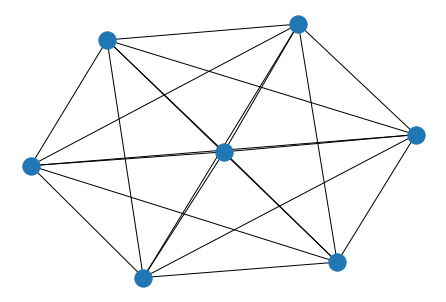

In [0]:
#Check graph

fig = nx.draw(G)
plt.show()

# Create Graph

In [0]:
sing = sing.drop(columns=['TableInfo'])
pair = pair.drop(columns=['TableInfo'])
trip = trip.drop(columns=['TableInfo'])

sing[['[Sal]', '[Ery]', '[Cm]', '[Tmp]', '[Ofl]', '[Dox]', '[Linc]']] = StandardScaler().fit_transform(sing[['[Sal]', '[Ery]', '[Cm]', '[Tmp]', '[Ofl]', '[Dox]', '[Linc]']])
pair[['[Sal]', '[Ery]', '[Cm]', '[Tmp]', '[Ofl]', '[Dox]', '[Linc]']] = StandardScaler().fit_transform(pair[['[Sal]', '[Ery]', '[Cm]', '[Tmp]', '[Ofl]', '[Dox]', '[Linc]']])
trip[['[Sal]', '[Ery]', '[Cm]', '[Tmp]', '[Ofl]', '[Dox]', '[Linc]']] = StandardScaler().fit_transform(trip[['[Sal]', '[Ery]', '[Cm]', '[Tmp]', '[Ofl]', '[Dox]', '[Linc]']])

sing[['g']] = StandardScaler().fit_transform(sing[['g']])
pair[['g']] = StandardScaler().fit_transform(pair[['g']])
trip[['g']] = StandardScaler().fit_transform(trip[['g']])


In [0]:
# sing = sing.drop(columns=['TableInfo'])
# pair = pair.drop(columns=['TableInfo'])
# trip = trip.drop(columns=['TableInfo'])

# #Standardize
# x = sing.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# sing = pd.DataFrame(x_scaled)

# #Standardize
# x = pair.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# pair = pd.DataFrame(x_scaled)

# #Standardize
# x = trip.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# trip = pd.DataFrame(x_scaled)

singvals = sing.values.tolist()
pairvals = pair.values.tolist()
tripvals = trip.values.tolist()

In [0]:
torch.cuda.is_available()

True

In [0]:
data_list = []

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

#For Singletons
for i in singvals:
    node_features = torch.tensor(np.c_[i[:-1]], dtype=torch.float)
    edge_index = torch.tensor(edgeindex, dtype=torch.long)
    x = node_features
    y = torch.ones(x.shape[0], 1) * np.c_[i[-1]].ravel()[0]
    edge_features = torch.tensor(np.c_[edge_feats], dtype=torch.float)
    data = Data(x=x, edge_index=edge_index,edge_attr = edge_features, y=y).to(device)
    data_list.append(data)

for i in pairvals:
    node_features = torch.tensor(np.c_[i[:-1]], dtype=torch.float)
    edge_index = torch.tensor(edgeindex, dtype=torch.long)
    x = node_features
    y = torch.ones(x.shape[0], 1) * np.c_[i[-1]].ravel()[0]
    edge_features = torch.tensor(np.c_[edge_feats], dtype=torch.float)
    data = Data(x=x, edge_index=edge_index,edge_attr = edge_features, y=y).to(device)
    data_list.append(data)

for i in tripvals:
    node_features = torch.tensor(np.c_[i[:-1]], dtype=torch.float)
    edge_index = torch.tensor(edgeindex, dtype=torch.long)
    x = node_features
    y = torch.ones(x.shape[0], 1) * np.c_[i[-1]].ravel()[0]
    edge_features = torch.tensor(np.c_[edge_feats], dtype=torch.float)
    data = Data(x=x, edge_index=edge_index,edge_attr = edge_features, y=y).to(device)
    data_list.append(data)

In [0]:
#Split into Training, Test and Val

#Shuffle data
shuffle(data_list)

one_tenth_length = int(len(data_list) * 0.1)
train_dataset = data_list[:one_tenth_length * 5]
test_dataset = data_list[one_tenth_length*5:]
len(train_dataset), len(test_dataset)

(1460, 1460)

In [0]:
#Percent of training set
one_tenth_length = int(len(train_dataset) * 0.1)
shuffle(train_dataset)
train_dataset = train_dataset[:one_tenth_length * 3]
print(len(train_dataset))

438


In [0]:
batch_size= 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [0]:
# ECConv convolutional network
class Net(torch.nn.Module):
    def __init__(self, input_dim, output_dim, edge_dim):
        super(Net, self).__init__()
        
        in_channel = 10
        out_channel = 10
        edge_nn_channel = 10
        edge_features = edge_dim
        
        self.input_layer = torch.nn.Sequential(
            torch.nn.Linear(input_dim, in_channel),
            torch.nn.ELU()
        )
        
        # edge condition network #1
        self.nn1 = torch.nn.Sequential(
            torch.nn.Linear(edge_features, edge_nn_channel),
            torch.nn.ELU(),
            torch.nn.Linear(edge_nn_channel, in_channel * out_channel),
            torch.nn.Tanh()
        )
        
        # edge condition network #2
        self.nn2 = torch.nn.Sequential(
            torch.nn.Linear(edge_features, edge_nn_channel),
            torch.nn.ELU(),
            torch.nn.Linear(edge_nn_channel, out_channel * out_channel),
            torch.nn.Tanh()
        )
        
        self.conv1 = NNConv(in_channel, out_channel, self.nn1, aggr='mean')
        self.conv2 = NNConv(out_channel, out_channel, self.nn2, aggr='mean')
        
        self.act1 = torch.nn.ELU()
        self.act2 = torch.nn.ELU()
        
        self.output_layer = torch.nn.Sequential(
            torch.nn.Linear(out_channel, output_dim)
        )
        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        
        x = self.input_layer(x)
        
        x = self.conv1(x, edge_index, edge_attr)
        x = self.act1(x)
        x = self.conv2(x, edge_index, edge_attr)
        x = self.act2(x)
        
        x = self.output_layer(x)
        return x

In [0]:
model = Net(1, 1, 50).to(device)
optimizer = torch.optim.Adamax(model.parameters())

In [0]:
# To disable tracking losses, please delete this line
loss_list = []

# model.train()
print("Epochs")

for epoch in tqdm(range(5000)):
    #losses = list()
    losses = []

    for data in train_loader:
        # Forward pass
        out = model(data)
        loss = F.mse_loss(out, data.y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(
            loss.cpu().detach().numpy()
        )
        
    avg_loss = sum(losses)/len(losses)
    loss_list.append(avg_loss)
    if epoch % 10 == 0:
        print('%d, MSE loss = %f' % (epoch, avg_loss))
        
print('Training Complete')



  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:00<13:37,  6.11it/s]

Epochs
0, MSE loss = 0.915132




  0%|          | 2/5000 [00:00<13:11,  6.31it/s]

  0%|          | 3/5000 [00:00<12:42,  6.55it/s]

  0%|          | 4/5000 [00:00<12:35,  6.61it/s]

  0%|          | 5/5000 [00:00<12:20,  6.74it/s]

  0%|          | 6/5000 [00:00<12:23,  6.72it/s]

  0%|          | 7/5000 [00:01<12:10,  6.83it/s]

  0%|          | 8/5000 [00:01<12:01,  6.92it/s]

  0%|          | 9/5000 [00:01<11:53,  6.99it/s]

  0%|          | 10/5000 [00:01<11:48,  7.04it/s]

  0%|          | 11/5000 [00:01<11:59,  6.93it/s]

  0%|          | 12/5000 [00:01<11:52,  7.00it/s]

10, MSE loss = 0.535723




  0%|          | 13/5000 [00:01<11:52,  7.00it/s]

  0%|          | 14/5000 [00:02<12:10,  6.83it/s]

  0%|          | 15/5000 [00:02<11:59,  6.92it/s]

  0%|          | 16/5000 [00:02<11:51,  7.01it/s]

  0%|          | 17/5000 [00:02<11:43,  7.08it/s]

  0%|          | 18/5000 [00:02<11:50,  7.02it/s]

  0%|          | 19/5000 [00:02<11:44,  7.07it/s]

  0%|          | 20/5000 [00:02<11:39,  7.12it/s]

  0%|          | 21/5000 [00:03<12:27,  6.66it/s]

  0%|          | 22/5000 [00:03<12:15,  6.76it/s]

20, MSE loss = 0.519950




  0%|          | 23/5000 [00:03<12:09,  6.83it/s]

  0%|          | 24/5000 [00:03<11:59,  6.92it/s]

  0%|          | 25/5000 [00:03<12:04,  6.87it/s]

  1%|          | 26/5000 [00:03<11:57,  6.93it/s]

  1%|          | 27/5000 [00:03<11:50,  7.00it/s]

  1%|          | 28/5000 [00:04<11:52,  6.98it/s]

  1%|          | 29/5000 [00:04<11:46,  7.04it/s]

  1%|          | 30/5000 [00:04<11:43,  7.06it/s]

  1%|          | 31/5000 [00:04<11:42,  7.07it/s]

  1%|          | 32/5000 [00:04<12:24,  6.68it/s]

30, MSE loss = 0.517164




  1%|          | 33/5000 [00:04<12:19,  6.72it/s]

  1%|          | 34/5000 [00:04<12:28,  6.64it/s]

  1%|          | 35/5000 [00:05<12:42,  6.51it/s]

  1%|          | 36/5000 [00:05<12:22,  6.69it/s]

  1%|          | 37/5000 [00:05<12:06,  6.83it/s]

  1%|          | 38/5000 [00:05<11:58,  6.91it/s]

  1%|          | 39/5000 [00:05<12:03,  6.86it/s]

  1%|          | 40/5000 [00:05<11:56,  6.92it/s]

  1%|          | 41/5000 [00:05<11:49,  6.99it/s]

  1%|          | 42/5000 [00:06<11:47,  7.01it/s]

40, MSE loss = 0.494566




  1%|          | 43/5000 [00:06<12:09,  6.79it/s]

  1%|          | 44/5000 [00:06<11:58,  6.90it/s]

  1%|          | 45/5000 [00:06<11:49,  6.98it/s]

  1%|          | 46/5000 [00:06<11:52,  6.95it/s]

  1%|          | 47/5000 [00:06<11:43,  7.04it/s]

  1%|          | 48/5000 [00:06<12:01,  6.86it/s]

  1%|          | 49/5000 [00:07<12:15,  6.73it/s]

  1%|          | 50/5000 [00:07<12:31,  6.59it/s]

  1%|          | 51/5000 [00:07<12:10,  6.78it/s]

  1%|          | 52/5000 [00:07<12:05,  6.82it/s]

50, MSE loss = 0.476202




  1%|          | 53/5000 [00:07<12:07,  6.80it/s]

  1%|          | 54/5000 [00:07<11:56,  6.91it/s]

  1%|          | 55/5000 [00:07<11:48,  6.98it/s]

  1%|          | 56/5000 [00:08<11:40,  7.06it/s]

  1%|          | 57/5000 [00:08<11:49,  6.97it/s]

  1%|          | 58/5000 [00:08<11:40,  7.06it/s]

  1%|          | 59/5000 [00:08<11:33,  7.13it/s]

  1%|          | 60/5000 [00:08<11:27,  7.18it/s]

  1%|          | 61/5000 [00:08<11:38,  7.07it/s]

  1%|          | 62/5000 [00:08<11:37,  7.08it/s]

60, MSE loss = 0.460600




  1%|▏         | 63/5000 [00:09<11:52,  6.93it/s]

  1%|▏         | 64/5000 [00:09<11:45,  7.00it/s]

  1%|▏         | 65/5000 [00:09<12:09,  6.76it/s]

  1%|▏         | 66/5000 [00:09<11:54,  6.90it/s]

  1%|▏         | 67/5000 [00:09<11:43,  7.01it/s]

  1%|▏         | 68/5000 [00:09<11:49,  6.96it/s]

  1%|▏         | 69/5000 [00:09<11:42,  7.02it/s]

  1%|▏         | 70/5000 [00:10<11:36,  7.08it/s]

  1%|▏         | 71/5000 [00:10<11:32,  7.12it/s]

  1%|▏         | 72/5000 [00:10<11:39,  7.05it/s]

70, MSE loss = 0.441498




  1%|▏         | 73/5000 [00:10<11:41,  7.02it/s]

  1%|▏         | 74/5000 [00:10<11:34,  7.09it/s]

  2%|▏         | 75/5000 [00:10<11:49,  6.94it/s]

  2%|▏         | 76/5000 [00:10<11:44,  6.99it/s]

  2%|▏         | 77/5000 [00:11<11:36,  7.06it/s]

  2%|▏         | 78/5000 [00:11<11:32,  7.11it/s]

  2%|▏         | 79/5000 [00:11<11:27,  7.16it/s]

  2%|▏         | 80/5000 [00:11<11:47,  6.96it/s]

  2%|▏         | 81/5000 [00:11<11:37,  7.05it/s]

  2%|▏         | 82/5000 [00:11<11:42,  7.00it/s]

80, MSE loss = 0.432870




  2%|▏         | 83/5000 [00:11<11:46,  6.96it/s]

  2%|▏         | 84/5000 [00:12<11:37,  7.04it/s]

  2%|▏         | 85/5000 [00:12<11:36,  7.06it/s]

  2%|▏         | 86/5000 [00:12<11:30,  7.12it/s]

  2%|▏         | 87/5000 [00:12<11:29,  7.12it/s]

  2%|▏         | 88/5000 [00:12<11:26,  7.16it/s]

  2%|▏         | 89/5000 [00:12<11:34,  7.07it/s]

  2%|▏         | 90/5000 [00:12<11:32,  7.09it/s]

  2%|▏         | 91/5000 [00:13<11:46,  6.95it/s]

  2%|▏         | 92/5000 [00:13<11:42,  6.99it/s]

90, MSE loss = 0.406085




  2%|▏         | 93/5000 [00:13<11:38,  7.03it/s]

  2%|▏         | 94/5000 [00:13<11:38,  7.02it/s]

  2%|▏         | 95/5000 [00:13<11:43,  6.98it/s]

  2%|▏         | 96/5000 [00:13<11:36,  7.04it/s]

  2%|▏         | 97/5000 [00:13<11:40,  7.00it/s]

  2%|▏         | 98/5000 [00:14<11:43,  6.97it/s]

  2%|▏         | 99/5000 [00:14<11:33,  7.07it/s]

  2%|▏         | 100/5000 [00:14<11:24,  7.16it/s]

  2%|▏         | 101/5000 [00:14<11:18,  7.22it/s]

  2%|▏         | 102/5000 [00:14<11:18,  7.22it/s]

100, MSE loss = 0.400993




  2%|▏         | 103/5000 [00:14<11:18,  7.21it/s]

  2%|▏         | 104/5000 [00:14<11:35,  7.04it/s]

  2%|▏         | 105/5000 [00:15<11:29,  7.10it/s]

  2%|▏         | 106/5000 [00:15<11:27,  7.12it/s]

  2%|▏         | 107/5000 [00:15<11:20,  7.19it/s]

  2%|▏         | 108/5000 [00:15<11:13,  7.26it/s]

  2%|▏         | 109/5000 [00:15<11:09,  7.31it/s]

  2%|▏         | 110/5000 [00:15<11:12,  7.28it/s]

  2%|▏         | 111/5000 [00:15<11:23,  7.16it/s]

  2%|▏         | 112/5000 [00:16<11:36,  7.02it/s]

110, MSE loss = 0.383560




  2%|▏         | 113/5000 [00:16<11:33,  7.05it/s]

  2%|▏         | 114/5000 [00:16<11:32,  7.06it/s]

  2%|▏         | 115/5000 [00:16<11:32,  7.05it/s]

  2%|▏         | 116/5000 [00:16<11:30,  7.07it/s]

  2%|▏         | 117/5000 [00:16<11:49,  6.88it/s]

  2%|▏         | 118/5000 [00:16<11:47,  6.90it/s]

  2%|▏         | 119/5000 [00:17<11:51,  6.86it/s]

  2%|▏         | 120/5000 [00:17<11:41,  6.96it/s]

  2%|▏         | 121/5000 [00:17<11:32,  7.04it/s]

  2%|▏         | 122/5000 [00:17<11:24,  7.13it/s]

120, MSE loss = 0.382590




  2%|▏         | 123/5000 [00:17<11:22,  7.14it/s]

  2%|▏         | 124/5000 [00:17<11:33,  7.03it/s]

  2%|▎         | 125/5000 [00:17<11:35,  7.00it/s]

  3%|▎         | 126/5000 [00:18<11:47,  6.89it/s]

  3%|▎         | 127/5000 [00:18<11:37,  6.98it/s]

  3%|▎         | 128/5000 [00:18<11:30,  7.05it/s]

  3%|▎         | 129/5000 [00:18<11:25,  7.11it/s]

  3%|▎         | 130/5000 [00:18<11:21,  7.15it/s]

  3%|▎         | 131/5000 [00:18<11:17,  7.19it/s]

  3%|▎         | 132/5000 [00:18<11:36,  6.99it/s]

130, MSE loss = 0.387656




  3%|▎         | 133/5000 [00:19<11:44,  6.90it/s]

  3%|▎         | 134/5000 [00:19<11:42,  6.93it/s]

  3%|▎         | 135/5000 [00:19<11:34,  7.00it/s]

  3%|▎         | 136/5000 [00:19<11:32,  7.02it/s]

  3%|▎         | 137/5000 [00:19<11:25,  7.09it/s]

  3%|▎         | 138/5000 [00:19<11:21,  7.13it/s]

  3%|▎         | 139/5000 [00:19<11:30,  7.04it/s]

  3%|▎         | 140/5000 [00:20<11:59,  6.75it/s]

  3%|▎         | 141/5000 [00:20<11:48,  6.86it/s]

  3%|▎         | 142/5000 [00:20<11:38,  6.95it/s]

140, MSE loss = 0.366704




  3%|▎         | 143/5000 [00:20<11:33,  7.01it/s]

  3%|▎         | 144/5000 [00:20<11:32,  7.01it/s]

  3%|▎         | 145/5000 [00:20<11:24,  7.09it/s]

  3%|▎         | 146/5000 [00:20<11:22,  7.12it/s]

  3%|▎         | 147/5000 [00:21<12:02,  6.72it/s]

  3%|▎         | 148/5000 [00:21<11:49,  6.84it/s]

  3%|▎         | 149/5000 [00:21<11:38,  6.95it/s]

  3%|▎         | 150/5000 [00:21<11:29,  7.03it/s]

  3%|▎         | 151/5000 [00:21<11:23,  7.10it/s]

  3%|▎         | 152/5000 [00:21<11:18,  7.15it/s]

150, MSE loss = 0.369689




  3%|▎         | 153/5000 [00:21<11:17,  7.15it/s]

  3%|▎         | 154/5000 [00:22<11:58,  6.74it/s]

  3%|▎         | 155/5000 [00:22<11:44,  6.88it/s]

  3%|▎         | 156/5000 [00:22<11:41,  6.91it/s]

  3%|▎         | 157/5000 [00:22<11:35,  6.96it/s]

  3%|▎         | 158/5000 [00:22<11:24,  7.07it/s]

  3%|▎         | 159/5000 [00:22<11:17,  7.15it/s]

  3%|▎         | 160/5000 [00:22<11:12,  7.20it/s]

  3%|▎         | 161/5000 [00:23<11:39,  6.92it/s]

  3%|▎         | 162/5000 [00:23<11:43,  6.88it/s]

160, MSE loss = 0.357943




  3%|▎         | 163/5000 [00:23<11:38,  6.92it/s]

  3%|▎         | 164/5000 [00:23<11:33,  6.97it/s]

  3%|▎         | 165/5000 [00:23<11:40,  6.90it/s]

  3%|▎         | 166/5000 [00:23<11:32,  6.98it/s]

  3%|▎         | 167/5000 [00:23<11:28,  7.02it/s]

  3%|▎         | 168/5000 [00:24<11:24,  7.06it/s]

  3%|▎         | 169/5000 [00:24<11:55,  6.75it/s]

  3%|▎         | 170/5000 [00:24<11:40,  6.89it/s]

  3%|▎         | 171/5000 [00:24<11:36,  6.94it/s]

  3%|▎         | 172/5000 [00:24<11:47,  6.82it/s]

170, MSE loss = 0.364469




  3%|▎         | 173/5000 [00:24<11:36,  6.93it/s]

  3%|▎         | 174/5000 [00:24<11:25,  7.04it/s]

  4%|▎         | 175/5000 [00:25<11:20,  7.09it/s]

  4%|▎         | 176/5000 [00:25<11:36,  6.92it/s]

  4%|▎         | 177/5000 [00:25<11:32,  6.97it/s]

  4%|▎         | 178/5000 [00:25<11:23,  7.05it/s]

  4%|▎         | 179/5000 [00:25<11:17,  7.11it/s]

  4%|▎         | 180/5000 [00:25<11:14,  7.15it/s]

  4%|▎         | 181/5000 [00:25<11:11,  7.18it/s]

  4%|▎         | 182/5000 [00:26<11:09,  7.20it/s]

180, MSE loss = 0.341643




  4%|▎         | 183/5000 [00:26<11:21,  7.06it/s]

  4%|▎         | 184/5000 [00:26<11:44,  6.83it/s]

  4%|▎         | 185/5000 [00:26<11:42,  6.85it/s]

  4%|▎         | 186/5000 [00:26<11:39,  6.88it/s]

  4%|▎         | 187/5000 [00:26<11:31,  6.96it/s]

  4%|▍         | 188/5000 [00:26<11:30,  6.97it/s]

  4%|▍         | 189/5000 [00:27<11:22,  7.05it/s]

  4%|▍         | 190/5000 [00:27<11:27,  7.00it/s]

  4%|▍         | 191/5000 [00:27<11:51,  6.76it/s]

  4%|▍         | 192/5000 [00:27<11:37,  6.89it/s]

190, MSE loss = 0.330485




  4%|▍         | 193/5000 [00:27<11:29,  6.97it/s]

  4%|▍         | 194/5000 [00:27<11:20,  7.07it/s]

  4%|▍         | 195/5000 [00:27<11:19,  7.07it/s]

  4%|▍         | 196/5000 [00:28<11:15,  7.12it/s]

  4%|▍         | 197/5000 [00:28<11:28,  6.98it/s]

  4%|▍         | 198/5000 [00:28<11:24,  7.02it/s]

  4%|▍         | 199/5000 [00:28<11:16,  7.09it/s]

  4%|▍         | 200/5000 [00:28<11:11,  7.15it/s]

  4%|▍         | 201/5000 [00:28<11:08,  7.18it/s]

  4%|▍         | 202/5000 [00:28<11:13,  7.12it/s]

200, MSE loss = 0.329152




  4%|▍         | 203/5000 [00:29<11:12,  7.13it/s]

  4%|▍         | 204/5000 [00:29<11:09,  7.16it/s]

  4%|▍         | 205/5000 [00:29<11:20,  7.04it/s]

  4%|▍         | 206/5000 [00:29<11:45,  6.80it/s]

  4%|▍         | 207/5000 [00:29<11:36,  6.88it/s]

  4%|▍         | 208/5000 [00:29<11:25,  6.99it/s]

  4%|▍         | 209/5000 [00:29<11:17,  7.07it/s]

  4%|▍         | 210/5000 [00:30<11:11,  7.13it/s]

  4%|▍         | 211/5000 [00:30<11:15,  7.09it/s]

  4%|▍         | 212/5000 [00:30<11:28,  6.96it/s]

210, MSE loss = 0.326381




  4%|▍         | 213/5000 [00:30<11:32,  6.91it/s]

  4%|▍         | 214/5000 [00:30<11:22,  7.01it/s]

  4%|▍         | 215/5000 [00:30<11:15,  7.08it/s]

  4%|▍         | 216/5000 [00:30<11:23,  7.00it/s]

  4%|▍         | 217/5000 [00:31<11:25,  6.98it/s]

  4%|▍         | 218/5000 [00:31<11:21,  7.02it/s]

  4%|▍         | 219/5000 [00:31<11:40,  6.83it/s]

  4%|▍         | 220/5000 [00:31<11:30,  6.92it/s]

  4%|▍         | 221/5000 [00:31<11:43,  6.79it/s]

  4%|▍         | 222/5000 [00:31<11:30,  6.92it/s]

220, MSE loss = 0.322342




  4%|▍         | 223/5000 [00:31<11:22,  7.00it/s]

  4%|▍         | 224/5000 [00:32<11:14,  7.08it/s]

  4%|▍         | 225/5000 [00:32<11:10,  7.12it/s]

  5%|▍         | 226/5000 [00:32<11:23,  6.98it/s]

  5%|▍         | 227/5000 [00:32<11:19,  7.03it/s]

  5%|▍         | 228/5000 [00:32<11:23,  6.99it/s]

  5%|▍         | 229/5000 [00:32<11:15,  7.06it/s]

  5%|▍         | 230/5000 [00:32<11:11,  7.10it/s]

  5%|▍         | 231/5000 [00:33<11:09,  7.12it/s]

  5%|▍         | 232/5000 [00:33<11:06,  7.16it/s]

230, MSE loss = 0.329532




  5%|▍         | 233/5000 [00:33<11:18,  7.03it/s]

  5%|▍         | 234/5000 [00:33<11:14,  7.07it/s]

  5%|▍         | 235/5000 [00:33<11:09,  7.12it/s]

  5%|▍         | 236/5000 [00:33<11:30,  6.90it/s]

  5%|▍         | 237/5000 [00:33<11:23,  6.97it/s]

  5%|▍         | 238/5000 [00:34<11:20,  7.00it/s]

  5%|▍         | 239/5000 [00:34<11:14,  7.06it/s]

  5%|▍         | 240/5000 [00:34<11:10,  7.10it/s]

  5%|▍         | 241/5000 [00:34<11:18,  7.01it/s]

  5%|▍         | 242/5000 [00:34<11:12,  7.07it/s]

240, MSE loss = 0.315259




  5%|▍         | 243/5000 [00:34<11:37,  6.82it/s]

  5%|▍         | 244/5000 [00:34<11:30,  6.89it/s]

  5%|▍         | 245/5000 [00:35<11:21,  6.98it/s]

  5%|▍         | 246/5000 [00:35<11:15,  7.04it/s]

  5%|▍         | 247/5000 [00:35<11:14,  7.05it/s]

  5%|▍         | 248/5000 [00:35<11:21,  6.97it/s]

  5%|▍         | 249/5000 [00:35<11:29,  6.89it/s]

  5%|▌         | 250/5000 [00:35<11:31,  6.87it/s]

  5%|▌         | 251/5000 [00:35<11:20,  6.98it/s]

  5%|▌         | 252/5000 [00:36<11:28,  6.90it/s]

250, MSE loss = 0.310655




  5%|▌         | 253/5000 [00:36<11:22,  6.96it/s]

  5%|▌         | 254/5000 [00:36<11:16,  7.01it/s]

  5%|▌         | 255/5000 [00:36<11:21,  6.96it/s]

  5%|▌         | 256/5000 [00:36<11:19,  6.98it/s]

  5%|▌         | 257/5000 [00:36<11:29,  6.88it/s]

  5%|▌         | 258/5000 [00:36<11:51,  6.67it/s]

  5%|▌         | 259/5000 [00:37<11:37,  6.80it/s]

  5%|▌         | 260/5000 [00:37<11:24,  6.93it/s]

  5%|▌         | 261/5000 [00:37<11:15,  7.01it/s]

  5%|▌         | 262/5000 [00:37<11:20,  6.96it/s]

260, MSE loss = 0.315234




  5%|▌         | 263/5000 [00:37<11:16,  7.00it/s]

  5%|▌         | 264/5000 [00:37<11:09,  7.08it/s]

  5%|▌         | 265/5000 [00:37<11:14,  7.02it/s]

  5%|▌         | 266/5000 [00:38<11:14,  7.02it/s]

  5%|▌         | 267/5000 [00:38<11:12,  7.04it/s]

  5%|▌         | 268/5000 [00:38<11:21,  6.94it/s]

  5%|▌         | 269/5000 [00:38<11:26,  6.90it/s]

  5%|▌         | 270/5000 [00:38<11:16,  6.99it/s]

  5%|▌         | 271/5000 [00:38<11:09,  7.06it/s]

  5%|▌         | 272/5000 [00:38<11:07,  7.08it/s]

270, MSE loss = 0.304623




  5%|▌         | 273/5000 [00:39<11:29,  6.86it/s]

  5%|▌         | 274/5000 [00:39<11:18,  6.96it/s]

  6%|▌         | 275/5000 [00:39<11:11,  7.04it/s]

  6%|▌         | 276/5000 [00:39<11:19,  6.95it/s]

  6%|▌         | 277/5000 [00:39<11:11,  7.03it/s]

  6%|▌         | 278/5000 [00:39<11:07,  7.07it/s]

  6%|▌         | 279/5000 [00:39<11:17,  6.97it/s]

  6%|▌         | 280/5000 [00:40<11:16,  6.98it/s]

  6%|▌         | 281/5000 [00:40<11:09,  7.05it/s]

  6%|▌         | 282/5000 [00:40<11:04,  7.10it/s]

280, MSE loss = 0.304160




  6%|▌         | 283/5000 [00:40<11:08,  7.06it/s]

  6%|▌         | 284/5000 [00:40<11:06,  7.08it/s]

  6%|▌         | 285/5000 [00:40<11:03,  7.11it/s]

  6%|▌         | 286/5000 [00:40<11:29,  6.84it/s]

  6%|▌         | 287/5000 [00:41<11:34,  6.78it/s]

  6%|▌         | 288/5000 [00:41<11:26,  6.86it/s]

  6%|▌         | 289/5000 [00:41<11:16,  6.97it/s]

  6%|▌         | 290/5000 [00:41<11:08,  7.05it/s]

  6%|▌         | 291/5000 [00:41<11:12,  7.00it/s]

  6%|▌         | 292/5000 [00:41<11:06,  7.07it/s]

290, MSE loss = 0.301544




  6%|▌         | 293/5000 [00:41<11:03,  7.09it/s]

  6%|▌         | 294/5000 [00:42<10:57,  7.16it/s]

  6%|▌         | 295/5000 [00:42<11:23,  6.89it/s]

  6%|▌         | 296/5000 [00:42<11:15,  6.97it/s]

  6%|▌         | 297/5000 [00:42<11:09,  7.02it/s]

  6%|▌         | 298/5000 [00:42<11:16,  6.95it/s]

  6%|▌         | 299/5000 [00:42<11:10,  7.02it/s]

  6%|▌         | 300/5000 [00:42<11:07,  7.04it/s]

  6%|▌         | 301/5000 [00:43<11:00,  7.11it/s]

  6%|▌         | 302/5000 [00:43<11:06,  7.05it/s]

300, MSE loss = 0.300518




  6%|▌         | 303/5000 [00:43<11:03,  7.08it/s]

  6%|▌         | 304/5000 [00:43<10:58,  7.13it/s]

  6%|▌         | 305/5000 [00:43<11:06,  7.04it/s]

  6%|▌         | 306/5000 [00:43<11:03,  7.08it/s]

  6%|▌         | 307/5000 [00:43<11:00,  7.10it/s]

  6%|▌         | 308/5000 [00:44<10:57,  7.14it/s]

  6%|▌         | 309/5000 [00:44<10:58,  7.13it/s]

  6%|▌         | 310/5000 [00:44<11:18,  6.91it/s]

  6%|▌         | 311/5000 [00:44<11:11,  6.98it/s]

  6%|▌         | 312/5000 [00:44<11:14,  6.95it/s]

310, MSE loss = 0.294528




  6%|▋         | 313/5000 [00:44<11:09,  7.00it/s]

  6%|▋         | 314/5000 [00:44<11:06,  7.03it/s]

  6%|▋         | 315/5000 [00:45<11:17,  6.91it/s]

  6%|▋         | 316/5000 [00:45<11:14,  6.94it/s]

  6%|▋         | 317/5000 [00:45<11:26,  6.82it/s]

  6%|▋         | 318/5000 [00:45<11:25,  6.83it/s]

  6%|▋         | 319/5000 [00:45<11:25,  6.83it/s]

  6%|▋         | 320/5000 [00:45<11:13,  6.95it/s]

  6%|▋         | 321/5000 [00:45<11:05,  7.03it/s]

  6%|▋         | 322/5000 [00:46<11:04,  7.04it/s]

320, MSE loss = 0.294766




  6%|▋         | 323/5000 [00:46<11:02,  7.06it/s]

  6%|▋         | 324/5000 [00:46<11:02,  7.06it/s]

  6%|▋         | 325/5000 [00:46<10:59,  7.09it/s]

  7%|▋         | 326/5000 [00:46<10:58,  7.10it/s]

  7%|▋         | 327/5000 [00:46<11:09,  6.98it/s]

  7%|▋         | 328/5000 [00:46<11:06,  7.01it/s]

  7%|▋         | 329/5000 [00:47<11:24,  6.82it/s]

  7%|▋         | 330/5000 [00:47<11:11,  6.95it/s]

  7%|▋         | 331/5000 [00:47<11:03,  7.03it/s]

  7%|▋         | 332/5000 [00:47<11:02,  7.05it/s]

330, MSE loss = 0.292372




  7%|▋         | 333/5000 [00:47<10:58,  7.09it/s]

  7%|▋         | 334/5000 [00:47<11:04,  7.02it/s]

  7%|▋         | 335/5000 [00:47<10:57,  7.09it/s]

  7%|▋         | 336/5000 [00:48<11:03,  7.03it/s]

  7%|▋         | 337/5000 [00:48<11:00,  7.06it/s]

  7%|▋         | 338/5000 [00:48<10:53,  7.14it/s]

  7%|▋         | 339/5000 [00:48<11:10,  6.95it/s]

  7%|▋         | 340/5000 [00:48<11:00,  7.05it/s]

  7%|▋         | 341/5000 [00:48<11:05,  7.01it/s]

  7%|▋         | 342/5000 [00:48<11:00,  7.06it/s]

340, MSE loss = 0.289033




  7%|▋         | 343/5000 [00:49<11:04,  7.01it/s]

  7%|▋         | 344/5000 [00:49<10:55,  7.10it/s]

  7%|▋         | 345/5000 [00:49<10:49,  7.17it/s]

  7%|▋         | 346/5000 [00:49<10:46,  7.20it/s]

  7%|▋         | 347/5000 [00:49<11:19,  6.85it/s]

  7%|▋         | 348/5000 [00:49<11:19,  6.85it/s]

  7%|▋         | 349/5000 [00:49<11:19,  6.84it/s]

  7%|▋         | 350/5000 [00:50<11:08,  6.96it/s]

  7%|▋         | 351/5000 [00:50<10:59,  7.05it/s]

  7%|▋         | 352/5000 [00:50<10:54,  7.10it/s]

350, MSE loss = 0.280126




  7%|▋         | 353/5000 [00:50<10:52,  7.13it/s]

  7%|▋         | 354/5000 [00:50<11:02,  7.01it/s]

  7%|▋         | 355/5000 [00:50<11:04,  6.99it/s]

  7%|▋         | 356/5000 [00:50<10:57,  7.06it/s]

  7%|▋         | 357/5000 [00:51<11:01,  7.02it/s]

  7%|▋         | 358/5000 [00:51<10:54,  7.09it/s]

  7%|▋         | 359/5000 [00:51<10:53,  7.10it/s]

  7%|▋         | 360/5000 [00:51<10:48,  7.16it/s]

  7%|▋         | 361/5000 [00:51<10:45,  7.19it/s]

  7%|▋         | 362/5000 [00:51<11:09,  6.92it/s]

360, MSE loss = 0.273857




  7%|▋         | 363/5000 [00:51<11:12,  6.89it/s]

  7%|▋         | 364/5000 [00:52<11:03,  6.99it/s]

  7%|▋         | 365/5000 [00:52<10:55,  7.08it/s]

  7%|▋         | 366/5000 [00:52<10:48,  7.15it/s]

  7%|▋         | 367/5000 [00:52<10:49,  7.13it/s]

  7%|▋         | 368/5000 [00:52<10:45,  7.17it/s]

  7%|▋         | 369/5000 [00:52<10:58,  7.03it/s]

  7%|▋         | 370/5000 [00:52<11:03,  6.98it/s]

  7%|▋         | 371/5000 [00:53<10:57,  7.04it/s]

  7%|▋         | 372/5000 [00:53<10:52,  7.10it/s]

370, MSE loss = 0.276767




  7%|▋         | 373/5000 [00:53<10:49,  7.12it/s]

  7%|▋         | 374/5000 [00:53<10:45,  7.16it/s]

  8%|▊         | 375/5000 [00:53<10:43,  7.19it/s]

  8%|▊         | 376/5000 [00:53<10:42,  7.20it/s]

  8%|▊         | 377/5000 [00:53<11:34,  6.65it/s]

  8%|▊         | 378/5000 [00:54<11:29,  6.70it/s]

  8%|▊         | 379/5000 [00:54<11:16,  6.83it/s]

  8%|▊         | 380/5000 [00:54<11:12,  6.87it/s]

  8%|▊         | 381/5000 [00:54<11:01,  6.98it/s]

  8%|▊         | 382/5000 [00:54<10:54,  7.05it/s]

380, MSE loss = 0.268183




  8%|▊         | 383/5000 [00:54<10:52,  7.08it/s]

  8%|▊         | 384/5000 [00:54<11:05,  6.94it/s]

  8%|▊         | 385/5000 [00:55<11:04,  6.95it/s]

  8%|▊         | 386/5000 [00:55<10:56,  7.03it/s]

  8%|▊         | 387/5000 [00:55<10:56,  7.03it/s]

  8%|▊         | 388/5000 [00:55<10:58,  7.00it/s]

  8%|▊         | 389/5000 [00:55<10:57,  7.01it/s]

  8%|▊         | 390/5000 [00:55<10:51,  7.08it/s]

  8%|▊         | 391/5000 [00:55<11:15,  6.83it/s]

  8%|▊         | 392/5000 [00:56<11:02,  6.95it/s]

390, MSE loss = 0.263566




  8%|▊         | 393/5000 [00:56<10:56,  7.01it/s]

  8%|▊         | 394/5000 [00:56<10:49,  7.09it/s]

  8%|▊         | 395/5000 [00:56<10:43,  7.15it/s]

  8%|▊         | 396/5000 [00:56<10:40,  7.19it/s]

  8%|▊         | 397/5000 [00:56<10:43,  7.15it/s]

  8%|▊         | 398/5000 [00:56<10:41,  7.18it/s]

  8%|▊         | 399/5000 [00:57<11:22,  6.74it/s]

  8%|▊         | 400/5000 [00:57<11:11,  6.85it/s]

  8%|▊         | 401/5000 [00:57<11:02,  6.94it/s]

  8%|▊         | 402/5000 [00:57<10:53,  7.04it/s]

400, MSE loss = 0.257580




  8%|▊         | 403/5000 [00:57<10:51,  7.06it/s]

  8%|▊         | 404/5000 [00:57<10:46,  7.11it/s]

  8%|▊         | 405/5000 [00:57<10:43,  7.14it/s]

  8%|▊         | 406/5000 [00:58<10:58,  6.98it/s]

  8%|▊         | 407/5000 [00:58<10:55,  7.01it/s]

  8%|▊         | 408/5000 [00:58<10:52,  7.03it/s]

  8%|▊         | 409/5000 [00:58<10:47,  7.09it/s]

  8%|▊         | 410/5000 [00:58<10:55,  7.00it/s]

  8%|▊         | 411/5000 [00:58<10:51,  7.04it/s]

  8%|▊         | 412/5000 [00:58<10:46,  7.09it/s]

410, MSE loss = 0.254168




  8%|▊         | 413/5000 [00:59<11:15,  6.79it/s]

  8%|▊         | 414/5000 [00:59<11:18,  6.76it/s]

  8%|▊         | 415/5000 [00:59<11:07,  6.86it/s]

  8%|▊         | 416/5000 [00:59<10:56,  6.98it/s]

  8%|▊         | 417/5000 [00:59<10:52,  7.03it/s]

  8%|▊         | 418/5000 [00:59<10:45,  7.10it/s]

  8%|▊         | 419/5000 [00:59<10:41,  7.14it/s]

  8%|▊         | 420/5000 [01:00<10:55,  6.99it/s]

  8%|▊         | 421/5000 [01:00<11:02,  6.91it/s]

  8%|▊         | 422/5000 [01:00<10:56,  6.97it/s]

420, MSE loss = 0.246393




  8%|▊         | 423/5000 [01:00<10:51,  7.02it/s]

  8%|▊         | 424/5000 [01:00<10:46,  7.08it/s]

  8%|▊         | 425/5000 [01:00<10:40,  7.14it/s]

  9%|▊         | 426/5000 [01:00<10:40,  7.14it/s]

  9%|▊         | 427/5000 [01:01<10:59,  6.93it/s]

  9%|▊         | 428/5000 [01:01<11:11,  6.81it/s]

  9%|▊         | 429/5000 [01:01<11:06,  6.86it/s]

  9%|▊         | 430/5000 [01:01<11:01,  6.91it/s]

  9%|▊         | 431/5000 [01:01<10:52,  7.01it/s]

  9%|▊         | 432/5000 [01:01<10:46,  7.06it/s]

430, MSE loss = 0.240682




  9%|▊         | 433/5000 [01:01<10:43,  7.09it/s]

  9%|▊         | 434/5000 [01:02<10:47,  7.05it/s]

  9%|▊         | 435/5000 [01:02<10:47,  7.05it/s]

  9%|▊         | 436/5000 [01:02<11:17,  6.74it/s]

  9%|▊         | 437/5000 [01:02<11:07,  6.84it/s]

  9%|▉         | 438/5000 [01:02<11:08,  6.82it/s]

  9%|▉         | 439/5000 [01:02<10:59,  6.92it/s]

  9%|▉         | 440/5000 [01:02<10:58,  6.93it/s]

  9%|▉         | 441/5000 [01:03<11:11,  6.79it/s]

  9%|▉         | 442/5000 [01:03<11:00,  6.90it/s]

440, MSE loss = 0.238173




  9%|▉         | 443/5000 [01:03<11:09,  6.80it/s]

  9%|▉         | 444/5000 [01:03<10:57,  6.93it/s]

  9%|▉         | 445/5000 [01:03<10:46,  7.04it/s]

  9%|▉         | 446/5000 [01:03<10:39,  7.12it/s]

  9%|▉         | 447/5000 [01:03<10:38,  7.13it/s]

  9%|▉         | 448/5000 [01:04<10:35,  7.16it/s]

  9%|▉         | 449/5000 [01:04<10:44,  7.06it/s]

  9%|▉         | 450/5000 [01:04<10:50,  7.00it/s]

  9%|▉         | 451/5000 [01:04<11:11,  6.78it/s]

  9%|▉         | 452/5000 [01:04<11:02,  6.87it/s]

450, MSE loss = 0.228485




  9%|▉         | 453/5000 [01:04<10:53,  6.96it/s]

  9%|▉         | 454/5000 [01:04<10:46,  7.03it/s]

  9%|▉         | 455/5000 [01:05<10:46,  7.03it/s]

  9%|▉         | 456/5000 [01:05<10:49,  6.99it/s]

  9%|▉         | 457/5000 [01:05<10:44,  7.05it/s]

  9%|▉         | 458/5000 [01:05<10:41,  7.08it/s]

  9%|▉         | 459/5000 [01:05<10:37,  7.12it/s]

  9%|▉         | 460/5000 [01:05<10:42,  7.07it/s]

  9%|▉         | 461/5000 [01:05<10:38,  7.11it/s]

  9%|▉         | 462/5000 [01:06<10:35,  7.14it/s]

460, MSE loss = 0.221892




  9%|▉         | 463/5000 [01:06<10:46,  7.02it/s]

  9%|▉         | 464/5000 [01:06<10:42,  7.06it/s]

  9%|▉         | 465/5000 [01:06<10:49,  6.99it/s]

  9%|▉         | 466/5000 [01:06<10:53,  6.94it/s]

  9%|▉         | 467/5000 [01:06<10:46,  7.02it/s]

  9%|▉         | 468/5000 [01:06<10:57,  6.89it/s]

  9%|▉         | 469/5000 [01:07<10:53,  6.93it/s]

  9%|▉         | 470/5000 [01:07<10:58,  6.88it/s]

  9%|▉         | 471/5000 [01:07<10:52,  6.94it/s]

  9%|▉         | 472/5000 [01:07<10:44,  7.02it/s]

470, MSE loss = 0.210715




  9%|▉         | 473/5000 [01:07<10:49,  6.97it/s]

  9%|▉         | 474/5000 [01:07<10:41,  7.05it/s]

 10%|▉         | 475/5000 [01:07<10:37,  7.10it/s]

 10%|▉         | 476/5000 [01:08<10:33,  7.15it/s]

 10%|▉         | 477/5000 [01:08<10:39,  7.07it/s]

 10%|▉         | 478/5000 [01:08<10:42,  7.04it/s]

 10%|▉         | 479/5000 [01:08<10:36,  7.10it/s]

 10%|▉         | 480/5000 [01:08<10:52,  6.93it/s]

 10%|▉         | 481/5000 [01:08<10:48,  6.97it/s]

 10%|▉         | 482/5000 [01:08<10:45,  7.00it/s]

480, MSE loss = 0.205122




 10%|▉         | 483/5000 [01:09<10:53,  6.91it/s]

 10%|▉         | 484/5000 [01:09<10:52,  6.93it/s]

 10%|▉         | 485/5000 [01:09<10:49,  6.96it/s]

 10%|▉         | 486/5000 [01:09<10:42,  7.03it/s]

 10%|▉         | 487/5000 [01:09<10:40,  7.05it/s]

 10%|▉         | 488/5000 [01:09<11:07,  6.76it/s]

 10%|▉         | 489/5000 [01:09<10:53,  6.90it/s]

 10%|▉         | 490/5000 [01:10<10:43,  7.00it/s]

 10%|▉         | 491/5000 [01:10<10:38,  7.07it/s]

 10%|▉         | 492/5000 [01:10<10:45,  6.98it/s]

490, MSE loss = 0.198128




 10%|▉         | 493/5000 [01:10<10:41,  7.03it/s]

 10%|▉         | 494/5000 [01:10<10:34,  7.11it/s]

 10%|▉         | 495/5000 [01:10<10:44,  6.99it/s]

 10%|▉         | 496/5000 [01:10<10:39,  7.04it/s]

 10%|▉         | 497/5000 [01:11<10:35,  7.09it/s]

 10%|▉         | 498/5000 [01:11<10:33,  7.11it/s]

 10%|▉         | 499/5000 [01:11<10:44,  6.98it/s]

 10%|█         | 500/5000 [01:11<10:38,  7.04it/s]

 10%|█         | 501/5000 [01:11<10:39,  7.03it/s]

 10%|█         | 502/5000 [01:11<10:55,  6.86it/s]

500, MSE loss = 0.190546




 10%|█         | 503/5000 [01:11<11:01,  6.80it/s]

 10%|█         | 504/5000 [01:12<10:50,  6.91it/s]

 10%|█         | 505/5000 [01:12<10:42,  7.00it/s]

 10%|█         | 506/5000 [01:12<10:46,  6.95it/s]

 10%|█         | 507/5000 [01:12<10:38,  7.03it/s]

 10%|█         | 508/5000 [01:12<10:33,  7.09it/s]

 10%|█         | 509/5000 [01:12<10:34,  7.08it/s]

 10%|█         | 510/5000 [01:12<10:39,  7.02it/s]

 10%|█         | 511/5000 [01:13<10:36,  7.06it/s]

 10%|█         | 512/5000 [01:13<10:31,  7.11it/s]

510, MSE loss = 0.190384




 10%|█         | 513/5000 [01:13<10:39,  7.01it/s]

 10%|█         | 514/5000 [01:13<10:31,  7.11it/s]

 10%|█         | 515/5000 [01:13<10:25,  7.17it/s]

 10%|█         | 516/5000 [01:13<10:20,  7.22it/s]

 10%|█         | 517/5000 [01:13<10:56,  6.83it/s]

 10%|█         | 518/5000 [01:14<10:47,  6.92it/s]

 10%|█         | 519/5000 [01:14<10:41,  6.98it/s]

 10%|█         | 520/5000 [01:14<10:42,  6.97it/s]

 10%|█         | 521/5000 [01:14<10:36,  7.04it/s]

 10%|█         | 522/5000 [01:14<10:33,  7.07it/s]

520, MSE loss = 0.183068




 10%|█         | 523/5000 [01:14<10:30,  7.11it/s]

 10%|█         | 524/5000 [01:14<10:26,  7.14it/s]

 10%|█         | 525/5000 [01:15<10:33,  7.06it/s]

 11%|█         | 526/5000 [01:15<10:28,  7.12it/s]

 11%|█         | 527/5000 [01:15<10:24,  7.16it/s]

 11%|█         | 528/5000 [01:15<10:31,  7.09it/s]

 11%|█         | 529/5000 [01:15<10:27,  7.12it/s]

 11%|█         | 530/5000 [01:15<10:24,  7.15it/s]

 11%|█         | 531/5000 [01:15<10:21,  7.20it/s]

 11%|█         | 532/5000 [01:16<10:29,  7.10it/s]

530, MSE loss = 0.170208




 11%|█         | 533/5000 [01:16<10:27,  7.11it/s]

 11%|█         | 534/5000 [01:16<10:23,  7.17it/s]

 11%|█         | 535/5000 [01:16<10:29,  7.09it/s]

 11%|█         | 536/5000 [01:16<10:33,  7.04it/s]

 11%|█         | 537/5000 [01:16<10:28,  7.10it/s]

 11%|█         | 538/5000 [01:16<10:26,  7.12it/s]

 11%|█         | 539/5000 [01:16<10:26,  7.12it/s]

 11%|█         | 540/5000 [01:17<11:02,  6.73it/s]

 11%|█         | 541/5000 [01:17<10:54,  6.81it/s]

 11%|█         | 542/5000 [01:17<10:58,  6.77it/s]

540, MSE loss = 0.161545




 11%|█         | 543/5000 [01:17<10:55,  6.80it/s]

 11%|█         | 544/5000 [01:17<10:46,  6.90it/s]

 11%|█         | 545/5000 [01:17<10:39,  6.96it/s]

 11%|█         | 546/5000 [01:18<10:36,  7.00it/s]

 11%|█         | 547/5000 [01:18<10:48,  6.87it/s]

 11%|█         | 548/5000 [01:18<10:40,  6.95it/s]

 11%|█         | 549/5000 [01:18<10:46,  6.89it/s]

 11%|█         | 550/5000 [01:18<10:51,  6.83it/s]

 11%|█         | 551/5000 [01:18<10:41,  6.94it/s]

 11%|█         | 552/5000 [01:18<10:39,  6.96it/s]

550, MSE loss = 0.154645




 11%|█         | 553/5000 [01:19<10:53,  6.81it/s]

 11%|█         | 554/5000 [01:19<11:04,  6.69it/s]

 11%|█         | 555/5000 [01:19<10:57,  6.76it/s]

 11%|█         | 556/5000 [01:19<10:55,  6.78it/s]

 11%|█         | 557/5000 [01:19<10:46,  6.88it/s]

 11%|█         | 558/5000 [01:19<10:37,  6.97it/s]

 11%|█         | 559/5000 [01:19<10:38,  6.96it/s]

 11%|█         | 560/5000 [01:20<10:35,  6.98it/s]

 11%|█         | 561/5000 [01:20<10:30,  7.04it/s]

 11%|█         | 562/5000 [01:20<10:37,  6.96it/s]

560, MSE loss = 0.154452




 11%|█▏        | 563/5000 [01:20<10:47,  6.85it/s]

 11%|█▏        | 564/5000 [01:20<10:41,  6.92it/s]

 11%|█▏        | 565/5000 [01:20<10:33,  7.00it/s]

 11%|█▏        | 566/5000 [01:20<10:27,  7.06it/s]

 11%|█▏        | 567/5000 [01:21<10:27,  7.06it/s]

 11%|█▏        | 568/5000 [01:21<10:24,  7.10it/s]

 11%|█▏        | 569/5000 [01:21<10:43,  6.88it/s]

 11%|█▏        | 570/5000 [01:21<10:48,  6.83it/s]

 11%|█▏        | 571/5000 [01:21<10:39,  6.93it/s]

 11%|█▏        | 572/5000 [01:21<10:39,  6.92it/s]

570, MSE loss = 0.154974




 11%|█▏        | 573/5000 [01:21<10:42,  6.89it/s]

 11%|█▏        | 574/5000 [01:22<10:37,  6.94it/s]

 12%|█▏        | 575/5000 [01:22<10:36,  6.95it/s]

 12%|█▏        | 576/5000 [01:22<10:37,  6.94it/s]

 12%|█▏        | 577/5000 [01:22<10:31,  7.01it/s]

 12%|█▏        | 578/5000 [01:22<10:37,  6.93it/s]

 12%|█▏        | 579/5000 [01:22<10:32,  6.99it/s]

 12%|█▏        | 580/5000 [01:22<10:35,  6.95it/s]

 12%|█▏        | 581/5000 [01:23<10:45,  6.84it/s]

 12%|█▏        | 582/5000 [01:23<10:37,  6.93it/s]

580, MSE loss = 0.141509




 12%|█▏        | 583/5000 [01:23<10:38,  6.91it/s]

 12%|█▏        | 584/5000 [01:23<10:47,  6.82it/s]

 12%|█▏        | 585/5000 [01:23<10:46,  6.82it/s]

 12%|█▏        | 586/5000 [01:23<10:37,  6.92it/s]

 12%|█▏        | 587/5000 [01:23<10:30,  7.00it/s]

 12%|█▏        | 588/5000 [01:24<11:00,  6.68it/s]

 12%|█▏        | 589/5000 [01:24<10:47,  6.81it/s]

 12%|█▏        | 590/5000 [01:24<10:39,  6.90it/s]

 12%|█▏        | 591/5000 [01:24<11:15,  6.53it/s]

 12%|█▏        | 592/5000 [01:24<11:06,  6.62it/s]

590, MSE loss = 0.147586




 12%|█▏        | 593/5000 [01:24<11:00,  6.67it/s]

 12%|█▏        | 594/5000 [01:25<10:59,  6.68it/s]

 12%|█▏        | 595/5000 [01:25<10:51,  6.76it/s]

 12%|█▏        | 596/5000 [01:25<10:40,  6.87it/s]

 12%|█▏        | 597/5000 [01:25<10:32,  6.96it/s]

 12%|█▏        | 598/5000 [01:25<10:41,  6.86it/s]

 12%|█▏        | 599/5000 [01:25<10:43,  6.84it/s]

 12%|█▏        | 600/5000 [01:25<10:38,  6.89it/s]

 12%|█▏        | 601/5000 [01:26<10:31,  6.96it/s]

 12%|█▏        | 602/5000 [01:26<10:27,  7.01it/s]

600, MSE loss = 0.140767




 12%|█▏        | 603/5000 [01:26<10:30,  6.98it/s]

 12%|█▏        | 604/5000 [01:26<10:25,  7.03it/s]

 12%|█▏        | 605/5000 [01:26<10:36,  6.91it/s]

 12%|█▏        | 606/5000 [01:26<10:46,  6.80it/s]

 12%|█▏        | 607/5000 [01:26<10:36,  6.90it/s]

 12%|█▏        | 608/5000 [01:27<10:29,  6.98it/s]

 12%|█▏        | 609/5000 [01:27<10:23,  7.04it/s]

 12%|█▏        | 610/5000 [01:27<10:19,  7.08it/s]

 12%|█▏        | 611/5000 [01:27<10:18,  7.10it/s]

 12%|█▏        | 612/5000 [01:27<10:14,  7.14it/s]

610, MSE loss = 0.135738




 12%|█▏        | 613/5000 [01:27<10:40,  6.85it/s]

 12%|█▏        | 614/5000 [01:27<10:30,  6.96it/s]

 12%|█▏        | 615/5000 [01:28<10:23,  7.04it/s]

 12%|█▏        | 616/5000 [01:28<10:18,  7.09it/s]

 12%|█▏        | 617/5000 [01:28<10:16,  7.11it/s]

 12%|█▏        | 618/5000 [01:28<10:14,  7.13it/s]

 12%|█▏        | 619/5000 [01:28<10:11,  7.16it/s]

 12%|█▏        | 620/5000 [01:28<10:44,  6.80it/s]

 12%|█▏        | 621/5000 [01:28<10:32,  6.93it/s]

 12%|█▏        | 622/5000 [01:29<10:33,  6.91it/s]

620, MSE loss = 0.131018




 12%|█▏        | 623/5000 [01:29<10:37,  6.86it/s]

 12%|█▏        | 624/5000 [01:29<10:31,  6.93it/s]

 12%|█▎        | 625/5000 [01:29<10:21,  7.04it/s]

 13%|█▎        | 626/5000 [01:29<10:13,  7.12it/s]

 13%|█▎        | 627/5000 [01:29<10:20,  7.05it/s]

 13%|█▎        | 628/5000 [01:29<10:18,  7.07it/s]

 13%|█▎        | 629/5000 [01:30<10:12,  7.13it/s]

 13%|█▎        | 630/5000 [01:30<10:13,  7.13it/s]

 13%|█▎        | 631/5000 [01:30<10:13,  7.12it/s]

 13%|█▎        | 632/5000 [01:30<10:09,  7.16it/s]

630, MSE loss = 0.131492




 13%|█▎        | 633/5000 [01:30<10:10,  7.15it/s]

 13%|█▎        | 634/5000 [01:30<10:09,  7.16it/s]

 13%|█▎        | 635/5000 [01:30<10:34,  6.88it/s]

 13%|█▎        | 636/5000 [01:31<10:50,  6.71it/s]

 13%|█▎        | 637/5000 [01:31<10:36,  6.85it/s]

 13%|█▎        | 638/5000 [01:31<10:25,  6.97it/s]

 13%|█▎        | 639/5000 [01:31<10:21,  7.02it/s]

 13%|█▎        | 640/5000 [01:31<10:13,  7.11it/s]

 13%|█▎        | 641/5000 [01:31<10:10,  7.14it/s]

 13%|█▎        | 642/5000 [01:31<10:24,  6.98it/s]

640, MSE loss = 0.129264




 13%|█▎        | 643/5000 [01:32<10:43,  6.77it/s]

 13%|█▎        | 644/5000 [01:32<10:33,  6.88it/s]

 13%|█▎        | 645/5000 [01:32<10:24,  6.98it/s]

 13%|█▎        | 646/5000 [01:32<10:15,  7.07it/s]

 13%|█▎        | 647/5000 [01:32<10:09,  7.14it/s]

 13%|█▎        | 648/5000 [01:32<10:05,  7.19it/s]

 13%|█▎        | 649/5000 [01:32<10:23,  6.98it/s]

 13%|█▎        | 650/5000 [01:33<10:29,  6.91it/s]

 13%|█▎        | 651/5000 [01:33<10:22,  6.98it/s]

 13%|█▎        | 652/5000 [01:33<10:14,  7.08it/s]

650, MSE loss = 0.123971




 13%|█▎        | 653/5000 [01:33<10:16,  7.05it/s]

 13%|█▎        | 654/5000 [01:33<10:14,  7.07it/s]

 13%|█▎        | 655/5000 [01:33<10:06,  7.16it/s]

 13%|█▎        | 656/5000 [01:33<10:26,  6.93it/s]

 13%|█▎        | 657/5000 [01:34<10:26,  6.94it/s]

 13%|█▎        | 658/5000 [01:34<10:18,  7.02it/s]

 13%|█▎        | 659/5000 [01:34<10:11,  7.10it/s]

 13%|█▎        | 660/5000 [01:34<10:06,  7.15it/s]

 13%|█▎        | 661/5000 [01:34<10:07,  7.14it/s]

 13%|█▎        | 662/5000 [01:34<10:01,  7.21it/s]

660, MSE loss = 0.119519




 13%|█▎        | 663/5000 [01:34<10:13,  7.07it/s]

 13%|█▎        | 664/5000 [01:34<10:09,  7.11it/s]

 13%|█▎        | 665/5000 [01:35<10:13,  7.06it/s]

 13%|█▎        | 666/5000 [01:35<10:08,  7.12it/s]

 13%|█▎        | 667/5000 [01:35<10:04,  7.17it/s]

 13%|█▎        | 668/5000 [01:35<10:01,  7.20it/s]

 13%|█▎        | 669/5000 [01:35<09:59,  7.23it/s]

 13%|█▎        | 670/5000 [01:35<09:57,  7.25it/s]

 13%|█▎        | 671/5000 [01:35<10:07,  7.12it/s]

 13%|█▎        | 672/5000 [01:36<10:17,  7.01it/s]

670, MSE loss = 0.123170




 13%|█▎        | 673/5000 [01:36<10:22,  6.95it/s]

 13%|█▎        | 674/5000 [01:36<10:17,  7.01it/s]

 14%|█▎        | 675/5000 [01:36<10:09,  7.10it/s]

 14%|█▎        | 676/5000 [01:36<10:02,  7.17it/s]

 14%|█▎        | 677/5000 [01:36<10:06,  7.13it/s]

 14%|█▎        | 678/5000 [01:36<10:12,  7.06it/s]

 14%|█▎        | 679/5000 [01:37<10:07,  7.11it/s]

 14%|█▎        | 680/5000 [01:37<10:09,  7.08it/s]

 14%|█▎        | 681/5000 [01:37<10:07,  7.11it/s]

 14%|█▎        | 682/5000 [01:37<10:06,  7.12it/s]

680, MSE loss = 0.116829




 14%|█▎        | 683/5000 [01:37<10:04,  7.14it/s]

 14%|█▎        | 684/5000 [01:37<10:01,  7.18it/s]

 14%|█▎        | 685/5000 [01:37<10:10,  7.07it/s]

 14%|█▎        | 686/5000 [01:38<10:06,  7.11it/s]

 14%|█▎        | 687/5000 [01:38<10:14,  7.01it/s]

 14%|█▍        | 688/5000 [01:38<10:31,  6.83it/s]

 14%|█▍        | 689/5000 [01:38<10:21,  6.94it/s]

 14%|█▍        | 690/5000 [01:38<10:13,  7.03it/s]

 14%|█▍        | 691/5000 [01:38<10:08,  7.08it/s]

 14%|█▍        | 692/5000 [01:38<10:17,  6.98it/s]

690, MSE loss = 0.125001




 14%|█▍        | 693/5000 [01:39<10:18,  6.96it/s]

 14%|█▍        | 694/5000 [01:39<10:11,  7.04it/s]

 14%|█▍        | 695/5000 [01:39<10:37,  6.75it/s]

 14%|█▍        | 696/5000 [01:39<10:27,  6.86it/s]

 14%|█▍        | 697/5000 [01:39<10:27,  6.85it/s]

 14%|█▍        | 698/5000 [01:39<10:22,  6.91it/s]

 14%|█▍        | 699/5000 [01:39<10:26,  6.87it/s]

 14%|█▍        | 700/5000 [01:40<10:19,  6.94it/s]

 14%|█▍        | 701/5000 [01:40<10:21,  6.92it/s]

 14%|█▍        | 702/5000 [01:40<10:33,  6.79it/s]

700, MSE loss = 0.116414




 14%|█▍        | 703/5000 [01:40<10:29,  6.83it/s]

 14%|█▍        | 704/5000 [01:40<10:18,  6.94it/s]

 14%|█▍        | 705/5000 [01:40<10:19,  6.93it/s]

 14%|█▍        | 706/5000 [01:40<10:23,  6.89it/s]

 14%|█▍        | 707/5000 [01:41<10:24,  6.87it/s]

 14%|█▍        | 708/5000 [01:41<10:16,  6.97it/s]

 14%|█▍        | 709/5000 [01:41<10:33,  6.78it/s]

 14%|█▍        | 710/5000 [01:41<10:28,  6.83it/s]

 14%|█▍        | 711/5000 [01:41<10:18,  6.94it/s]

 14%|█▍        | 712/5000 [01:41<10:12,  7.00it/s]

710, MSE loss = 0.122590




 14%|█▍        | 713/5000 [01:41<10:13,  6.99it/s]

 14%|█▍        | 714/5000 [01:42<10:15,  6.96it/s]

 14%|█▍        | 715/5000 [01:42<10:19,  6.92it/s]

 14%|█▍        | 716/5000 [01:42<10:16,  6.95it/s]

 14%|█▍        | 717/5000 [01:42<10:25,  6.85it/s]

 14%|█▍        | 718/5000 [01:42<10:14,  6.96it/s]

 14%|█▍        | 719/5000 [01:42<10:11,  7.00it/s]

 14%|█▍        | 720/5000 [01:42<10:06,  7.06it/s]

 14%|█▍        | 721/5000 [01:43<10:14,  6.96it/s]

 14%|█▍        | 722/5000 [01:43<10:10,  7.01it/s]

720, MSE loss = 0.116220




 14%|█▍        | 723/5000 [01:43<10:11,  6.99it/s]

 14%|█▍        | 724/5000 [01:43<10:10,  7.00it/s]

 14%|█▍        | 725/5000 [01:43<10:09,  7.01it/s]

 15%|█▍        | 726/5000 [01:43<10:05,  7.06it/s]

 15%|█▍        | 727/5000 [01:43<10:04,  7.06it/s]

 15%|█▍        | 728/5000 [01:44<10:12,  6.98it/s]

 15%|█▍        | 729/5000 [01:44<10:19,  6.90it/s]

 15%|█▍        | 730/5000 [01:44<10:11,  6.98it/s]

 15%|█▍        | 731/5000 [01:44<10:29,  6.79it/s]

 15%|█▍        | 732/5000 [01:44<10:20,  6.88it/s]

730, MSE loss = 0.107613




 15%|█▍        | 733/5000 [01:44<10:12,  6.97it/s]

 15%|█▍        | 734/5000 [01:45<10:20,  6.87it/s]

 15%|█▍        | 735/5000 [01:45<10:32,  6.74it/s]

 15%|█▍        | 736/5000 [01:45<10:22,  6.85it/s]

 15%|█▍        | 737/5000 [01:45<10:14,  6.93it/s]

 15%|█▍        | 738/5000 [01:45<10:08,  7.00it/s]

 15%|█▍        | 739/5000 [01:45<10:21,  6.86it/s]

 15%|█▍        | 740/5000 [01:45<10:13,  6.95it/s]

 15%|█▍        | 741/5000 [01:46<10:14,  6.93it/s]

 15%|█▍        | 742/5000 [01:46<10:30,  6.75it/s]

740, MSE loss = 0.106725




 15%|█▍        | 743/5000 [01:46<10:32,  6.73it/s]

 15%|█▍        | 744/5000 [01:46<10:20,  6.86it/s]

 15%|█▍        | 745/5000 [01:46<10:11,  6.95it/s]

 15%|█▍        | 746/5000 [01:46<10:33,  6.72it/s]

 15%|█▍        | 747/5000 [01:46<10:20,  6.85it/s]

 15%|█▍        | 748/5000 [01:47<10:22,  6.83it/s]

 15%|█▍        | 749/5000 [01:47<10:21,  6.84it/s]

 15%|█▌        | 750/5000 [01:47<10:13,  6.92it/s]

 15%|█▌        | 751/5000 [01:47<10:05,  7.02it/s]

 15%|█▌        | 752/5000 [01:47<10:03,  7.04it/s]

750, MSE loss = 0.114793




 15%|█▌        | 753/5000 [01:47<10:12,  6.94it/s]

 15%|█▌        | 754/5000 [01:47<10:08,  6.98it/s]

 15%|█▌        | 755/5000 [01:48<10:10,  6.95it/s]

 15%|█▌        | 756/5000 [01:48<10:16,  6.88it/s]

 15%|█▌        | 757/5000 [01:48<10:08,  6.98it/s]

 15%|█▌        | 758/5000 [01:48<10:05,  7.00it/s]

 15%|█▌        | 759/5000 [01:48<09:58,  7.08it/s]

 15%|█▌        | 760/5000 [01:48<09:59,  7.08it/s]

 15%|█▌        | 761/5000 [01:48<10:23,  6.80it/s]

 15%|█▌        | 762/5000 [01:49<10:33,  6.69it/s]

760, MSE loss = 0.106192




 15%|█▌        | 763/5000 [01:49<10:42,  6.60it/s]

 15%|█▌        | 764/5000 [01:49<10:25,  6.77it/s]

 15%|█▌        | 765/5000 [01:49<10:17,  6.86it/s]

 15%|█▌        | 766/5000 [01:49<10:06,  6.98it/s]

 15%|█▌        | 767/5000 [01:49<10:01,  7.04it/s]

 15%|█▌        | 768/5000 [01:49<10:17,  6.86it/s]

 15%|█▌        | 769/5000 [01:50<10:09,  6.94it/s]

 15%|█▌        | 770/5000 [01:50<10:15,  6.87it/s]

 15%|█▌        | 771/5000 [01:50<10:11,  6.91it/s]

 15%|█▌        | 772/5000 [01:50<10:05,  6.99it/s]

770, MSE loss = 0.105243




 15%|█▌        | 773/5000 [01:50<10:04,  7.00it/s]

 15%|█▌        | 774/5000 [01:50<09:58,  7.07it/s]

 16%|█▌        | 775/5000 [01:50<10:01,  7.03it/s]

 16%|█▌        | 776/5000 [01:51<09:56,  7.08it/s]

 16%|█▌        | 777/5000 [01:51<10:00,  7.03it/s]

 16%|█▌        | 778/5000 [01:51<09:58,  7.06it/s]

 16%|█▌        | 779/5000 [01:51<09:56,  7.08it/s]

 16%|█▌        | 780/5000 [01:51<09:54,  7.09it/s]

 16%|█▌        | 781/5000 [01:51<10:02,  7.01it/s]

 16%|█▌        | 782/5000 [01:51<10:01,  7.01it/s]

780, MSE loss = 0.102636




 16%|█▌        | 783/5000 [01:52<10:09,  6.92it/s]

 16%|█▌        | 784/5000 [01:52<10:01,  7.00it/s]

 16%|█▌        | 785/5000 [01:52<10:10,  6.90it/s]

 16%|█▌        | 786/5000 [01:52<10:04,  6.97it/s]

 16%|█▌        | 787/5000 [01:52<10:02,  6.99it/s]

 16%|█▌        | 788/5000 [01:52<09:59,  7.02it/s]

 16%|█▌        | 789/5000 [01:52<10:13,  6.86it/s]

 16%|█▌        | 790/5000 [01:53<10:31,  6.67it/s]

 16%|█▌        | 791/5000 [01:53<10:20,  6.78it/s]

 16%|█▌        | 792/5000 [01:53<10:26,  6.72it/s]

790, MSE loss = 0.101603




 16%|█▌        | 793/5000 [01:53<10:20,  6.78it/s]

 16%|█▌        | 794/5000 [01:53<10:12,  6.87it/s]

 16%|█▌        | 795/5000 [01:53<10:14,  6.84it/s]

 16%|█▌        | 796/5000 [01:53<10:11,  6.88it/s]

 16%|█▌        | 797/5000 [01:54<10:28,  6.69it/s]

 16%|█▌        | 798/5000 [01:54<10:24,  6.73it/s]

 16%|█▌        | 799/5000 [01:54<10:34,  6.62it/s]

 16%|█▌        | 800/5000 [01:54<10:23,  6.74it/s]

 16%|█▌        | 801/5000 [01:54<10:13,  6.85it/s]

 16%|█▌        | 802/5000 [01:54<10:01,  6.98it/s]

800, MSE loss = 0.111199




 16%|█▌        | 803/5000 [01:55<10:00,  6.98it/s]

 16%|█▌        | 804/5000 [01:55<10:07,  6.91it/s]

 16%|█▌        | 805/5000 [01:55<10:07,  6.91it/s]

 16%|█▌        | 806/5000 [01:55<10:20,  6.76it/s]

 16%|█▌        | 807/5000 [01:55<10:10,  6.87it/s]

 16%|█▌        | 808/5000 [01:55<10:05,  6.92it/s]

 16%|█▌        | 809/5000 [01:55<09:56,  7.03it/s]

 16%|█▌        | 810/5000 [01:56<09:55,  7.04it/s]

 16%|█▌        | 811/5000 [01:56<09:51,  7.08it/s]

 16%|█▌        | 812/5000 [01:56<10:17,  6.78it/s]

810, MSE loss = 0.101958




 16%|█▋        | 813/5000 [01:56<10:18,  6.77it/s]

 16%|█▋        | 814/5000 [01:56<10:09,  6.87it/s]

 16%|█▋        | 815/5000 [01:56<10:00,  6.97it/s]

 16%|█▋        | 816/5000 [01:56<09:58,  6.99it/s]

 16%|█▋        | 817/5000 [01:57<09:55,  7.02it/s]

 16%|█▋        | 818/5000 [01:57<09:59,  6.97it/s]

 16%|█▋        | 819/5000 [01:57<10:03,  6.93it/s]

 16%|█▋        | 820/5000 [01:57<10:07,  6.89it/s]

 16%|█▋        | 821/5000 [01:57<09:59,  6.97it/s]

 16%|█▋        | 822/5000 [01:57<09:52,  7.05it/s]

820, MSE loss = 0.097298




 16%|█▋        | 823/5000 [01:57<10:05,  6.90it/s]

 16%|█▋        | 824/5000 [01:58<09:56,  7.00it/s]

 16%|█▋        | 825/5000 [01:58<09:50,  7.07it/s]

 17%|█▋        | 826/5000 [01:58<09:54,  7.02it/s]

 17%|█▋        | 827/5000 [01:58<10:10,  6.83it/s]

 17%|█▋        | 828/5000 [01:58<10:04,  6.91it/s]

 17%|█▋        | 829/5000 [01:58<09:55,  7.00it/s]

 17%|█▋        | 830/5000 [01:58<09:53,  7.02it/s]

 17%|█▋        | 831/5000 [01:59<10:12,  6.81it/s]

 17%|█▋        | 832/5000 [01:59<10:02,  6.92it/s]

830, MSE loss = 0.095868




 17%|█▋        | 833/5000 [01:59<09:57,  6.97it/s]

 17%|█▋        | 834/5000 [01:59<10:08,  6.84it/s]

 17%|█▋        | 835/5000 [01:59<09:59,  6.95it/s]

 17%|█▋        | 836/5000 [01:59<09:52,  7.03it/s]

 17%|█▋        | 837/5000 [01:59<09:47,  7.08it/s]

 17%|█▋        | 838/5000 [02:00<09:52,  7.02it/s]

 17%|█▋        | 839/5000 [02:00<09:49,  7.06it/s]

 17%|█▋        | 840/5000 [02:00<09:55,  6.99it/s]

 17%|█▋        | 841/5000 [02:00<10:17,  6.74it/s]

 17%|█▋        | 842/5000 [02:00<10:05,  6.87it/s]

840, MSE loss = 0.098365




 17%|█▋        | 843/5000 [02:00<09:58,  6.94it/s]

 17%|█▋        | 844/5000 [02:00<09:54,  6.99it/s]

 17%|█▋        | 845/5000 [02:01<09:48,  7.06it/s]

 17%|█▋        | 846/5000 [02:01<09:43,  7.12it/s]

 17%|█▋        | 847/5000 [02:01<09:40,  7.15it/s]

 17%|█▋        | 848/5000 [02:01<09:42,  7.13it/s]

 17%|█▋        | 849/5000 [02:01<10:16,  6.74it/s]

 17%|█▋        | 850/5000 [02:01<10:07,  6.83it/s]

 17%|█▋        | 851/5000 [02:01<09:55,  6.97it/s]

 17%|█▋        | 852/5000 [02:02<09:46,  7.07it/s]

850, MSE loss = 0.092488




 17%|█▋        | 853/5000 [02:02<09:42,  7.12it/s]

 17%|█▋        | 854/5000 [02:02<09:37,  7.18it/s]

 17%|█▋        | 855/5000 [02:02<09:33,  7.23it/s]

 17%|█▋        | 856/5000 [02:02<09:55,  6.95it/s]

 17%|█▋        | 857/5000 [02:02<09:49,  7.03it/s]

 17%|█▋        | 858/5000 [02:02<09:48,  7.04it/s]

 17%|█▋        | 859/5000 [02:03<10:05,  6.84it/s]

 17%|█▋        | 860/5000 [02:03<10:01,  6.89it/s]

 17%|█▋        | 861/5000 [02:03<09:54,  6.96it/s]

 17%|█▋        | 862/5000 [02:03<09:47,  7.04it/s]

860, MSE loss = 0.096379




 17%|█▋        | 863/5000 [02:03<10:11,  6.76it/s]

 17%|█▋        | 864/5000 [02:03<10:10,  6.78it/s]

 17%|█▋        | 865/5000 [02:03<09:59,  6.90it/s]

 17%|█▋        | 866/5000 [02:04<09:52,  6.98it/s]

 17%|█▋        | 867/5000 [02:04<09:46,  7.04it/s]

 17%|█▋        | 868/5000 [02:04<09:45,  7.06it/s]

 17%|█▋        | 869/5000 [02:04<09:42,  7.09it/s]

 17%|█▋        | 870/5000 [02:04<10:19,  6.67it/s]

 17%|█▋        | 871/5000 [02:04<10:13,  6.73it/s]

 17%|█▋        | 872/5000 [02:04<10:04,  6.83it/s]

870, MSE loss = 0.093177




 17%|█▋        | 873/5000 [02:05<09:57,  6.91it/s]

 17%|█▋        | 874/5000 [02:05<09:48,  7.01it/s]

 18%|█▊        | 875/5000 [02:05<09:41,  7.09it/s]

 18%|█▊        | 876/5000 [02:05<09:35,  7.16it/s]

 18%|█▊        | 877/5000 [02:05<09:40,  7.10it/s]

 18%|█▊        | 878/5000 [02:05<10:06,  6.79it/s]

 18%|█▊        | 879/5000 [02:05<10:04,  6.81it/s]

 18%|█▊        | 880/5000 [02:06<09:58,  6.88it/s]

 18%|█▊        | 881/5000 [02:06<09:52,  6.95it/s]

 18%|█▊        | 882/5000 [02:06<09:44,  7.05it/s]

880, MSE loss = 0.089987




 18%|█▊        | 883/5000 [02:06<09:40,  7.10it/s]

 18%|█▊        | 884/5000 [02:06<09:48,  6.99it/s]

 18%|█▊        | 885/5000 [02:06<09:52,  6.94it/s]

 18%|█▊        | 886/5000 [02:06<09:48,  6.99it/s]

 18%|█▊        | 887/5000 [02:07<09:42,  7.07it/s]

 18%|█▊        | 888/5000 [02:07<09:43,  7.04it/s]

 18%|█▊        | 889/5000 [02:07<09:38,  7.11it/s]

 18%|█▊        | 890/5000 [02:07<09:37,  7.12it/s]

 18%|█▊        | 891/5000 [02:07<09:48,  6.98it/s]

 18%|█▊        | 892/5000 [02:07<09:43,  7.04it/s]

890, MSE loss = 0.092747




 18%|█▊        | 893/5000 [02:07<10:01,  6.82it/s]

 18%|█▊        | 894/5000 [02:08<09:51,  6.94it/s]

 18%|█▊        | 895/5000 [02:08<09:43,  7.03it/s]

 18%|█▊        | 896/5000 [02:08<09:37,  7.10it/s]

 18%|█▊        | 897/5000 [02:08<09:32,  7.16it/s]

 18%|█▊        | 898/5000 [02:08<09:33,  7.16it/s]

 18%|█▊        | 899/5000 [02:08<09:42,  7.04it/s]

 18%|█▊        | 900/5000 [02:08<09:45,  7.00it/s]

 18%|█▊        | 901/5000 [02:09<09:50,  6.94it/s]

 18%|█▊        | 902/5000 [02:09<09:44,  7.01it/s]

900, MSE loss = 0.090465




 18%|█▊        | 903/5000 [02:09<09:42,  7.04it/s]

 18%|█▊        | 904/5000 [02:09<09:37,  7.10it/s]

 18%|█▊        | 905/5000 [02:09<09:33,  7.14it/s]

 18%|█▊        | 906/5000 [02:09<09:40,  7.05it/s]

 18%|█▊        | 907/5000 [02:09<09:38,  7.07it/s]

 18%|█▊        | 908/5000 [02:10<09:41,  7.03it/s]

 18%|█▊        | 909/5000 [02:10<09:45,  6.98it/s]

 18%|█▊        | 910/5000 [02:10<09:43,  7.01it/s]

 18%|█▊        | 911/5000 [02:10<09:51,  6.91it/s]

 18%|█▊        | 912/5000 [02:10<09:43,  7.01it/s]

910, MSE loss = 0.091171




 18%|█▊        | 913/5000 [02:10<09:49,  6.94it/s]

 18%|█▊        | 914/5000 [02:10<09:44,  7.00it/s]

 18%|█▊        | 915/5000 [02:11<09:49,  6.93it/s]

 18%|█▊        | 916/5000 [02:11<09:41,  7.02it/s]

 18%|█▊        | 917/5000 [02:11<09:37,  7.07it/s]

 18%|█▊        | 918/5000 [02:11<09:34,  7.11it/s]

 18%|█▊        | 919/5000 [02:11<09:34,  7.10it/s]

 18%|█▊        | 920/5000 [02:11<09:42,  7.01it/s]

 18%|█▊        | 921/5000 [02:11<09:40,  7.03it/s]

 18%|█▊        | 922/5000 [02:12<09:36,  7.07it/s]

920, MSE loss = 0.088290




 18%|█▊        | 923/5000 [02:12<09:45,  6.96it/s]

 18%|█▊        | 924/5000 [02:12<09:38,  7.04it/s]

 18%|█▊        | 925/5000 [02:12<09:33,  7.11it/s]

 19%|█▊        | 926/5000 [02:12<09:28,  7.17it/s]

 19%|█▊        | 927/5000 [02:12<09:31,  7.13it/s]

 19%|█▊        | 928/5000 [02:12<09:36,  7.07it/s]

 19%|█▊        | 929/5000 [02:13<09:38,  7.04it/s]

 19%|█▊        | 930/5000 [02:13<09:56,  6.83it/s]

 19%|█▊        | 931/5000 [02:13<09:50,  6.90it/s]

 19%|█▊        | 932/5000 [02:13<09:42,  6.98it/s]

930, MSE loss = 0.084103




 19%|█▊        | 933/5000 [02:13<09:38,  7.03it/s]

 19%|█▊        | 934/5000 [02:13<09:32,  7.10it/s]

 19%|█▊        | 935/5000 [02:13<09:39,  7.02it/s]

 19%|█▊        | 936/5000 [02:14<09:35,  7.06it/s]

 19%|█▊        | 937/5000 [02:14<09:37,  7.03it/s]

 19%|█▉        | 938/5000 [02:14<09:33,  7.08it/s]

 19%|█▉        | 939/5000 [02:14<09:33,  7.08it/s]

 19%|█▉        | 940/5000 [02:14<09:29,  7.13it/s]

 19%|█▉        | 941/5000 [02:14<09:34,  7.07it/s]

 19%|█▉        | 942/5000 [02:14<09:46,  6.92it/s]

940, MSE loss = 0.084306




 19%|█▉        | 943/5000 [02:15<09:46,  6.92it/s]

 19%|█▉        | 944/5000 [02:15<09:39,  7.00it/s]

 19%|█▉        | 945/5000 [02:15<09:52,  6.84it/s]

 19%|█▉        | 946/5000 [02:15<09:42,  6.96it/s]

 19%|█▉        | 947/5000 [02:15<09:36,  7.04it/s]

 19%|█▉        | 948/5000 [02:15<09:29,  7.11it/s]

 19%|█▉        | 949/5000 [02:15<09:38,  7.01it/s]

 19%|█▉        | 950/5000 [02:16<09:48,  6.89it/s]

 19%|█▉        | 951/5000 [02:16<09:44,  6.93it/s]

 19%|█▉        | 952/5000 [02:16<09:44,  6.92it/s]

950, MSE loss = 0.088298




 19%|█▉        | 953/5000 [02:16<09:39,  6.98it/s]

 19%|█▉        | 954/5000 [02:16<09:34,  7.04it/s]

 19%|█▉        | 955/5000 [02:16<09:30,  7.08it/s]

 19%|█▉        | 956/5000 [02:16<09:37,  7.00it/s]

 19%|█▉        | 957/5000 [02:17<09:37,  7.00it/s]

 19%|█▉        | 958/5000 [02:17<09:32,  7.06it/s]

 19%|█▉        | 959/5000 [02:17<09:34,  7.04it/s]

 19%|█▉        | 960/5000 [02:17<09:43,  6.92it/s]

 19%|█▉        | 961/5000 [02:17<09:40,  6.96it/s]

 19%|█▉        | 962/5000 [02:17<09:33,  7.04it/s]

960, MSE loss = 0.083267




 19%|█▉        | 963/5000 [02:17<09:41,  6.94it/s]

 19%|█▉        | 964/5000 [02:18<09:35,  7.01it/s]

 19%|█▉        | 965/5000 [02:18<09:30,  7.08it/s]

 19%|█▉        | 966/5000 [02:18<09:26,  7.12it/s]

 19%|█▉        | 967/5000 [02:18<09:44,  6.90it/s]

 19%|█▉        | 968/5000 [02:18<09:38,  6.97it/s]

 19%|█▉        | 969/5000 [02:18<09:34,  7.02it/s]

 19%|█▉        | 970/5000 [02:18<09:39,  6.95it/s]

 19%|█▉        | 971/5000 [02:19<09:45,  6.88it/s]

 19%|█▉        | 972/5000 [02:19<09:38,  6.96it/s]

970, MSE loss = 0.087116




 19%|█▉        | 973/5000 [02:19<09:43,  6.90it/s]

 19%|█▉        | 974/5000 [02:19<09:46,  6.87it/s]

 20%|█▉        | 975/5000 [02:19<09:37,  6.96it/s]

 20%|█▉        | 976/5000 [02:19<09:30,  7.06it/s]

 20%|█▉        | 977/5000 [02:19<09:24,  7.12it/s]

 20%|█▉        | 978/5000 [02:20<09:31,  7.03it/s]

 20%|█▉        | 979/5000 [02:20<09:29,  7.07it/s]

 20%|█▉        | 980/5000 [02:20<09:26,  7.09it/s]

 20%|█▉        | 981/5000 [02:20<09:25,  7.11it/s]

 20%|█▉        | 982/5000 [02:20<09:50,  6.81it/s]

980, MSE loss = 0.089381




 20%|█▉        | 983/5000 [02:20<09:46,  6.85it/s]

 20%|█▉        | 984/5000 [02:20<09:40,  6.92it/s]

 20%|█▉        | 985/5000 [02:21<09:43,  6.88it/s]

 20%|█▉        | 986/5000 [02:21<09:35,  6.97it/s]

 20%|█▉        | 987/5000 [02:21<09:31,  7.03it/s]

 20%|█▉        | 988/5000 [02:21<09:27,  7.07it/s]

 20%|█▉        | 989/5000 [02:21<09:29,  7.05it/s]

 20%|█▉        | 990/5000 [02:21<09:23,  7.11it/s]

 20%|█▉        | 991/5000 [02:21<09:23,  7.12it/s]

 20%|█▉        | 992/5000 [02:22<09:34,  6.97it/s]

990, MSE loss = 0.084844




 20%|█▉        | 993/5000 [02:22<09:32,  6.99it/s]

 20%|█▉        | 994/5000 [02:22<09:30,  7.02it/s]

 20%|█▉        | 995/5000 [02:22<09:26,  7.07it/s]

 20%|█▉        | 996/5000 [02:22<09:22,  7.11it/s]

 20%|█▉        | 997/5000 [02:22<09:37,  6.94it/s]

 20%|█▉        | 998/5000 [02:22<09:31,  7.00it/s]

 20%|█▉        | 999/5000 [02:23<09:48,  6.80it/s]

 20%|██        | 1000/5000 [02:23<09:39,  6.90it/s]

 20%|██        | 1001/5000 [02:23<09:42,  6.87it/s]

 20%|██        | 1002/5000 [02:23<09:44,  6.84it/s]

1000, MSE loss = 0.085617




 20%|██        | 1003/5000 [02:23<09:43,  6.85it/s]

 20%|██        | 1004/5000 [02:23<10:00,  6.66it/s]

 20%|██        | 1005/5000 [02:23<09:46,  6.81it/s]

 20%|██        | 1006/5000 [02:24<09:46,  6.81it/s]

 20%|██        | 1007/5000 [02:24<09:37,  6.91it/s]

 20%|██        | 1008/5000 [02:24<09:32,  6.98it/s]

 20%|██        | 1009/5000 [02:24<09:30,  7.00it/s]

 20%|██        | 1010/5000 [02:24<09:35,  6.93it/s]

 20%|██        | 1011/5000 [02:24<09:46,  6.80it/s]

 20%|██        | 1012/5000 [02:24<10:03,  6.61it/s]

1010, MSE loss = 0.080485




 20%|██        | 1013/5000 [02:25<10:22,  6.41it/s]

 20%|██        | 1014/5000 [02:25<10:07,  6.57it/s]

 20%|██        | 1015/5000 [02:25<09:53,  6.71it/s]

 20%|██        | 1016/5000 [02:25<09:41,  6.85it/s]

 20%|██        | 1017/5000 [02:25<09:39,  6.88it/s]

 20%|██        | 1018/5000 [02:25<09:44,  6.82it/s]

 20%|██        | 1019/5000 [02:26<09:46,  6.79it/s]

 20%|██        | 1020/5000 [02:26<09:45,  6.79it/s]

 20%|██        | 1021/5000 [02:26<09:41,  6.84it/s]

 20%|██        | 1022/5000 [02:26<09:32,  6.94it/s]

1020, MSE loss = 0.078927




 20%|██        | 1023/5000 [02:26<09:26,  7.01it/s]

 20%|██        | 1024/5000 [02:26<09:22,  7.06it/s]

 20%|██        | 1025/5000 [02:26<09:18,  7.12it/s]

 21%|██        | 1026/5000 [02:27<09:39,  6.85it/s]

 21%|██        | 1027/5000 [02:27<09:43,  6.81it/s]

 21%|██        | 1028/5000 [02:27<09:33,  6.92it/s]

 21%|██        | 1029/5000 [02:27<09:26,  7.01it/s]

 21%|██        | 1030/5000 [02:27<09:20,  7.08it/s]

 21%|██        | 1031/5000 [02:27<09:16,  7.13it/s]

 21%|██        | 1032/5000 [02:27<09:14,  7.16it/s]

1030, MSE loss = 0.081170




 21%|██        | 1033/5000 [02:28<09:30,  6.95it/s]

 21%|██        | 1034/5000 [02:28<09:36,  6.88it/s]

 21%|██        | 1035/5000 [02:28<09:31,  6.94it/s]

 21%|██        | 1036/5000 [02:28<09:28,  6.97it/s]

 21%|██        | 1037/5000 [02:28<09:21,  7.06it/s]

 21%|██        | 1038/5000 [02:28<09:19,  7.08it/s]

 21%|██        | 1039/5000 [02:28<09:15,  7.14it/s]

 21%|██        | 1040/5000 [02:28<09:12,  7.17it/s]

 21%|██        | 1041/5000 [02:29<09:15,  7.12it/s]

 21%|██        | 1042/5000 [02:29<09:24,  7.01it/s]

1040, MSE loss = 0.078346




 21%|██        | 1043/5000 [02:29<09:22,  7.04it/s]

 21%|██        | 1044/5000 [02:29<09:17,  7.10it/s]

 21%|██        | 1045/5000 [02:29<09:13,  7.14it/s]

 21%|██        | 1046/5000 [02:29<09:14,  7.13it/s]

 21%|██        | 1047/5000 [02:29<09:14,  7.13it/s]

 21%|██        | 1048/5000 [02:30<09:31,  6.92it/s]

 21%|██        | 1049/5000 [02:30<09:43,  6.77it/s]

 21%|██        | 1050/5000 [02:30<09:36,  6.85it/s]

 21%|██        | 1051/5000 [02:30<09:28,  6.94it/s]

 21%|██        | 1052/5000 [02:30<09:22,  7.01it/s]

1050, MSE loss = 0.077404




 21%|██        | 1053/5000 [02:30<09:21,  7.04it/s]

 21%|██        | 1054/5000 [02:30<09:17,  7.08it/s]

 21%|██        | 1055/5000 [02:31<09:21,  7.02it/s]

 21%|██        | 1056/5000 [02:31<09:48,  6.70it/s]

 21%|██        | 1057/5000 [02:31<09:39,  6.80it/s]

 21%|██        | 1058/5000 [02:31<09:30,  6.91it/s]

 21%|██        | 1059/5000 [02:31<09:25,  6.97it/s]

 21%|██        | 1060/5000 [02:31<09:18,  7.06it/s]

 21%|██        | 1061/5000 [02:31<09:13,  7.11it/s]

 21%|██        | 1062/5000 [02:32<09:10,  7.15it/s]

1060, MSE loss = 0.077353




 21%|██▏       | 1063/5000 [02:32<09:35,  6.84it/s]

 21%|██▏       | 1064/5000 [02:32<09:26,  6.95it/s]

 21%|██▏       | 1065/5000 [02:32<09:18,  7.04it/s]

 21%|██▏       | 1066/5000 [02:32<09:16,  7.07it/s]

 21%|██▏       | 1067/5000 [02:32<09:16,  7.07it/s]

 21%|██▏       | 1068/5000 [02:32<09:17,  7.05it/s]

 21%|██▏       | 1069/5000 [02:33<09:21,  7.00it/s]

 21%|██▏       | 1070/5000 [02:33<09:29,  6.91it/s]

 21%|██▏       | 1071/5000 [02:33<09:22,  6.99it/s]

 21%|██▏       | 1072/5000 [02:33<09:16,  7.05it/s]

1070, MSE loss = 0.078356




 21%|██▏       | 1073/5000 [02:33<09:15,  7.06it/s]

 21%|██▏       | 1074/5000 [02:33<09:14,  7.08it/s]

 22%|██▏       | 1075/5000 [02:33<09:11,  7.12it/s]

 22%|██▏       | 1076/5000 [02:34<09:12,  7.10it/s]

 22%|██▏       | 1077/5000 [02:34<09:20,  7.00it/s]

 22%|██▏       | 1078/5000 [02:34<09:32,  6.85it/s]

 22%|██▏       | 1079/5000 [02:34<09:26,  6.92it/s]

 22%|██▏       | 1080/5000 [02:34<09:18,  7.02it/s]

 22%|██▏       | 1081/5000 [02:34<09:16,  7.04it/s]

 22%|██▏       | 1082/5000 [02:34<09:11,  7.11it/s]

1080, MSE loss = 0.077724




 22%|██▏       | 1083/5000 [02:35<09:10,  7.12it/s]

 22%|██▏       | 1084/5000 [02:35<09:07,  7.15it/s]

 22%|██▏       | 1085/5000 [02:35<09:37,  6.78it/s]

 22%|██▏       | 1086/5000 [02:35<09:30,  6.86it/s]

 22%|██▏       | 1087/5000 [02:35<09:33,  6.82it/s]

 22%|██▏       | 1088/5000 [02:35<09:27,  6.89it/s]

 22%|██▏       | 1089/5000 [02:36<09:21,  6.97it/s]

 22%|██▏       | 1090/5000 [02:36<09:17,  7.01it/s]

 22%|██▏       | 1091/5000 [02:36<09:13,  7.06it/s]

 22%|██▏       | 1092/5000 [02:36<09:26,  6.90it/s]

1090, MSE loss = 0.071466




 22%|██▏       | 1093/5000 [02:36<09:21,  6.96it/s]

 22%|██▏       | 1094/5000 [02:36<09:14,  7.04it/s]

 22%|██▏       | 1095/5000 [02:36<09:10,  7.10it/s]

 22%|██▏       | 1096/5000 [02:37<09:24,  6.91it/s]

 22%|██▏       | 1097/5000 [02:37<09:24,  6.92it/s]

 22%|██▏       | 1098/5000 [02:37<09:19,  6.98it/s]

 22%|██▏       | 1099/5000 [02:37<09:28,  6.86it/s]

 22%|██▏       | 1100/5000 [02:37<09:40,  6.72it/s]

 22%|██▏       | 1101/5000 [02:37<09:29,  6.85it/s]

 22%|██▏       | 1102/5000 [02:37<09:20,  6.95it/s]

1100, MSE loss = 0.076612




 22%|██▏       | 1103/5000 [02:38<09:18,  6.98it/s]

 22%|██▏       | 1104/5000 [02:38<09:11,  7.06it/s]

 22%|██▏       | 1105/5000 [02:38<09:07,  7.12it/s]

 22%|██▏       | 1106/5000 [02:38<09:14,  7.02it/s]

 22%|██▏       | 1107/5000 [02:38<09:33,  6.78it/s]

 22%|██▏       | 1108/5000 [02:38<09:28,  6.84it/s]

 22%|██▏       | 1109/5000 [02:38<09:22,  6.92it/s]

 22%|██▏       | 1110/5000 [02:39<09:20,  6.95it/s]

 22%|██▏       | 1111/5000 [02:39<09:14,  7.02it/s]

 22%|██▏       | 1112/5000 [02:39<09:10,  7.06it/s]

1110, MSE loss = 0.072207




 22%|██▏       | 1113/5000 [02:39<09:18,  6.96it/s]

 22%|██▏       | 1114/5000 [02:39<09:21,  6.92it/s]

 22%|██▏       | 1115/5000 [02:39<09:20,  6.94it/s]

 22%|██▏       | 1116/5000 [02:39<09:14,  7.00it/s]

 22%|██▏       | 1117/5000 [02:40<09:13,  7.02it/s]

 22%|██▏       | 1118/5000 [02:40<09:09,  7.07it/s]

 22%|██▏       | 1119/5000 [02:40<09:13,  7.01it/s]

 22%|██▏       | 1120/5000 [02:40<09:25,  6.86it/s]

 22%|██▏       | 1121/5000 [02:40<09:18,  6.95it/s]

 22%|██▏       | 1122/5000 [02:40<09:39,  6.69it/s]

1120, MSE loss = 0.079844




 22%|██▏       | 1123/5000 [02:40<09:36,  6.73it/s]

 22%|██▏       | 1124/5000 [02:41<09:40,  6.68it/s]

 22%|██▎       | 1125/5000 [02:41<09:40,  6.68it/s]

 23%|██▎       | 1126/5000 [02:41<09:31,  6.78it/s]

 23%|██▎       | 1127/5000 [02:41<09:37,  6.71it/s]

 23%|██▎       | 1128/5000 [02:41<09:28,  6.81it/s]

 23%|██▎       | 1129/5000 [02:41<09:35,  6.73it/s]

 23%|██▎       | 1130/5000 [02:41<09:26,  6.84it/s]

 23%|██▎       | 1131/5000 [02:42<09:18,  6.93it/s]

 23%|██▎       | 1132/5000 [02:42<09:11,  7.01it/s]

1130, MSE loss = 0.074157




 23%|██▎       | 1133/5000 [02:42<09:10,  7.02it/s]

 23%|██▎       | 1134/5000 [02:42<09:16,  6.94it/s]

 23%|██▎       | 1135/5000 [02:42<09:10,  7.02it/s]

 23%|██▎       | 1136/5000 [02:42<09:24,  6.84it/s]

 23%|██▎       | 1137/5000 [02:42<09:22,  6.87it/s]

 23%|██▎       | 1138/5000 [02:43<09:30,  6.77it/s]

 23%|██▎       | 1139/5000 [02:43<09:21,  6.87it/s]

 23%|██▎       | 1140/5000 [02:43<09:18,  6.92it/s]

 23%|██▎       | 1141/5000 [02:43<09:20,  6.88it/s]

 23%|██▎       | 1142/5000 [02:43<09:14,  6.96it/s]

1140, MSE loss = 0.084104




 23%|██▎       | 1143/5000 [02:43<09:14,  6.95it/s]

 23%|██▎       | 1144/5000 [02:43<09:10,  7.00it/s]

 23%|██▎       | 1145/5000 [02:44<09:06,  7.05it/s]

 23%|██▎       | 1146/5000 [02:44<09:08,  7.03it/s]

 23%|██▎       | 1147/5000 [02:44<09:05,  7.06it/s]

 23%|██▎       | 1148/5000 [02:44<09:20,  6.87it/s]

 23%|██▎       | 1149/5000 [02:44<09:16,  6.92it/s]

 23%|██▎       | 1150/5000 [02:44<09:13,  6.96it/s]

 23%|██▎       | 1151/5000 [02:44<09:26,  6.80it/s]

 23%|██▎       | 1152/5000 [02:45<09:19,  6.88it/s]

1150, MSE loss = 0.076215




 23%|██▎       | 1153/5000 [02:45<09:13,  6.95it/s]

 23%|██▎       | 1154/5000 [02:45<09:07,  7.02it/s]

 23%|██▎       | 1155/5000 [02:45<09:08,  7.02it/s]

 23%|██▎       | 1156/5000 [02:45<09:12,  6.95it/s]

 23%|██▎       | 1157/5000 [02:45<09:24,  6.81it/s]

 23%|██▎       | 1158/5000 [02:45<09:20,  6.86it/s]

 23%|██▎       | 1159/5000 [02:46<09:20,  6.85it/s]

 23%|██▎       | 1160/5000 [02:46<09:16,  6.91it/s]

 23%|██▎       | 1161/5000 [02:46<09:15,  6.91it/s]

 23%|██▎       | 1162/5000 [02:46<09:08,  7.00it/s]

1160, MSE loss = 0.073988




 23%|██▎       | 1163/5000 [02:46<09:14,  6.92it/s]

 23%|██▎       | 1164/5000 [02:46<09:09,  6.98it/s]

 23%|██▎       | 1165/5000 [02:46<09:11,  6.96it/s]

 23%|██▎       | 1166/5000 [02:47<09:22,  6.81it/s]

 23%|██▎       | 1167/5000 [02:47<09:12,  6.93it/s]

 23%|██▎       | 1168/5000 [02:47<09:07,  7.01it/s]

 23%|██▎       | 1169/5000 [02:47<09:03,  7.05it/s]

 23%|██▎       | 1170/5000 [02:47<09:11,  6.94it/s]

 23%|██▎       | 1171/5000 [02:47<09:03,  7.04it/s]

 23%|██▎       | 1172/5000 [02:47<09:00,  7.08it/s]

1170, MSE loss = 0.070855




 23%|██▎       | 1173/5000 [02:48<09:22,  6.80it/s]

 23%|██▎       | 1174/5000 [02:48<09:14,  6.90it/s]

 24%|██▎       | 1175/5000 [02:48<09:07,  6.99it/s]

 24%|██▎       | 1176/5000 [02:48<09:05,  7.01it/s]

 24%|██▎       | 1177/5000 [02:48<09:11,  6.93it/s]

 24%|██▎       | 1178/5000 [02:48<09:06,  6.99it/s]

 24%|██▎       | 1179/5000 [02:48<09:09,  6.95it/s]

 24%|██▎       | 1180/5000 [02:49<09:25,  6.75it/s]

 24%|██▎       | 1181/5000 [02:49<09:16,  6.87it/s]

 24%|██▎       | 1182/5000 [02:49<09:11,  6.92it/s]

1180, MSE loss = 0.075141




 24%|██▎       | 1183/5000 [02:49<09:06,  6.99it/s]

 24%|██▎       | 1184/5000 [02:49<09:09,  6.94it/s]

 24%|██▎       | 1185/5000 [02:49<09:03,  7.03it/s]

 24%|██▎       | 1186/5000 [02:49<08:58,  7.08it/s]

 24%|██▎       | 1187/5000 [02:50<08:54,  7.13it/s]

 24%|██▍       | 1188/5000 [02:50<09:12,  6.89it/s]

 24%|██▍       | 1189/5000 [02:50<09:07,  6.96it/s]

 24%|██▍       | 1190/5000 [02:50<09:02,  7.03it/s]

 24%|██▍       | 1191/5000 [02:50<09:06,  6.97it/s]

 24%|██▍       | 1192/5000 [02:50<09:06,  6.96it/s]

1190, MSE loss = 0.069841




 24%|██▍       | 1193/5000 [02:51<09:05,  6.97it/s]

 24%|██▍       | 1194/5000 [02:51<08:58,  7.07it/s]

 24%|██▍       | 1195/5000 [02:51<09:04,  6.99it/s]

 24%|██▍       | 1196/5000 [02:51<09:03,  7.01it/s]

 24%|██▍       | 1197/5000 [02:51<08:57,  7.07it/s]

 24%|██▍       | 1198/5000 [02:51<09:01,  7.02it/s]

 24%|██▍       | 1199/5000 [02:51<08:56,  7.08it/s]

 24%|██▍       | 1200/5000 [02:51<08:57,  7.07it/s]

 24%|██▍       | 1201/5000 [02:52<08:54,  7.10it/s]

 24%|██▍       | 1202/5000 [02:52<08:56,  7.09it/s]

1200, MSE loss = 0.074202




 24%|██▍       | 1203/5000 [02:52<09:12,  6.88it/s]

 24%|██▍       | 1204/5000 [02:52<09:05,  6.96it/s]

 24%|██▍       | 1205/5000 [02:52<09:06,  6.95it/s]

 24%|██▍       | 1206/5000 [02:52<09:03,  6.98it/s]

 24%|██▍       | 1207/5000 [02:52<08:57,  7.06it/s]

 24%|██▍       | 1208/5000 [02:53<09:00,  7.02it/s]

 24%|██▍       | 1209/5000 [02:53<08:56,  7.06it/s]

 24%|██▍       | 1210/5000 [02:53<09:20,  6.76it/s]

 24%|██▍       | 1211/5000 [02:53<09:10,  6.88it/s]

 24%|██▍       | 1212/5000 [02:53<09:12,  6.85it/s]

1210, MSE loss = 0.073859




 24%|██▍       | 1213/5000 [02:53<09:18,  6.78it/s]

 24%|██▍       | 1214/5000 [02:54<09:12,  6.85it/s]

 24%|██▍       | 1215/5000 [02:54<09:04,  6.95it/s]

 24%|██▍       | 1216/5000 [02:54<08:57,  7.04it/s]

 24%|██▍       | 1217/5000 [02:54<09:03,  6.96it/s]

 24%|██▍       | 1218/5000 [02:54<09:01,  6.99it/s]

 24%|██▍       | 1219/5000 [02:54<08:54,  7.07it/s]

 24%|██▍       | 1220/5000 [02:54<09:09,  6.88it/s]

 24%|██▍       | 1221/5000 [02:55<09:15,  6.80it/s]

 24%|██▍       | 1222/5000 [02:55<09:08,  6.89it/s]

1220, MSE loss = 0.070732




 24%|██▍       | 1223/5000 [02:55<09:03,  6.95it/s]

 24%|██▍       | 1224/5000 [02:55<09:05,  6.92it/s]

 24%|██▍       | 1225/5000 [02:55<09:19,  6.75it/s]

 25%|██▍       | 1226/5000 [02:55<09:07,  6.89it/s]

 25%|██▍       | 1227/5000 [02:55<09:08,  6.88it/s]

 25%|██▍       | 1228/5000 [02:56<09:00,  6.98it/s]

 25%|██▍       | 1229/5000 [02:56<08:53,  7.06it/s]

 25%|██▍       | 1230/5000 [02:56<08:50,  7.11it/s]

 25%|██▍       | 1231/5000 [02:56<08:47,  7.14it/s]

 25%|██▍       | 1232/5000 [02:56<08:54,  7.05it/s]

1230, MSE loss = 0.070422




 25%|██▍       | 1233/5000 [02:56<08:55,  7.04it/s]

 25%|██▍       | 1234/5000 [02:56<09:10,  6.84it/s]

 25%|██▍       | 1235/5000 [02:57<09:21,  6.70it/s]

 25%|██▍       | 1236/5000 [02:57<09:09,  6.85it/s]

 25%|██▍       | 1237/5000 [02:57<08:59,  6.97it/s]

 25%|██▍       | 1238/5000 [02:57<08:53,  7.05it/s]

 25%|██▍       | 1239/5000 [02:57<09:01,  6.94it/s]

 25%|██▍       | 1240/5000 [02:57<08:59,  6.97it/s]

 25%|██▍       | 1241/5000 [02:57<09:02,  6.92it/s]

 25%|██▍       | 1242/5000 [02:58<09:01,  6.94it/s]

1240, MSE loss = 0.071269




 25%|██▍       | 1243/5000 [02:58<08:56,  7.00it/s]

 25%|██▍       | 1244/5000 [02:58<08:54,  7.03it/s]

 25%|██▍       | 1245/5000 [02:58<08:49,  7.09it/s]

 25%|██▍       | 1246/5000 [02:58<08:45,  7.14it/s]

 25%|██▍       | 1247/5000 [02:58<08:47,  7.11it/s]

 25%|██▍       | 1248/5000 [02:58<08:52,  7.04it/s]

 25%|██▍       | 1249/5000 [02:59<09:12,  6.79it/s]

 25%|██▌       | 1250/5000 [02:59<09:03,  6.90it/s]

 25%|██▌       | 1251/5000 [02:59<08:55,  7.00it/s]

 25%|██▌       | 1252/5000 [02:59<08:50,  7.06it/s]

1250, MSE loss = 0.065560




 25%|██▌       | 1253/5000 [02:59<08:52,  7.04it/s]

 25%|██▌       | 1254/5000 [02:59<09:05,  6.87it/s]

 25%|██▌       | 1255/5000 [02:59<09:05,  6.87it/s]

 25%|██▌       | 1256/5000 [03:00<08:56,  6.98it/s]

 25%|██▌       | 1257/5000 [03:00<08:58,  6.94it/s]

 25%|██▌       | 1258/5000 [03:00<08:57,  6.97it/s]

 25%|██▌       | 1259/5000 [03:00<08:50,  7.05it/s]

 25%|██▌       | 1260/5000 [03:00<08:47,  7.09it/s]

 25%|██▌       | 1261/5000 [03:00<08:44,  7.13it/s]

 25%|██▌       | 1262/5000 [03:00<09:16,  6.71it/s]

1260, MSE loss = 0.078050




 25%|██▌       | 1263/5000 [03:01<09:21,  6.65it/s]

 25%|██▌       | 1264/5000 [03:01<09:15,  6.73it/s]

 25%|██▌       | 1265/5000 [03:01<09:04,  6.86it/s]

 25%|██▌       | 1266/5000 [03:01<08:55,  6.97it/s]

 25%|██▌       | 1267/5000 [03:01<08:50,  7.04it/s]

 25%|██▌       | 1268/5000 [03:01<08:46,  7.09it/s]

 25%|██▌       | 1269/5000 [03:01<08:53,  6.99it/s]

 25%|██▌       | 1270/5000 [03:02<08:55,  6.96it/s]

 25%|██▌       | 1271/5000 [03:02<08:50,  7.03it/s]

 25%|██▌       | 1272/5000 [03:02<08:48,  7.05it/s]

1270, MSE loss = 0.065102




 25%|██▌       | 1273/5000 [03:02<08:46,  7.07it/s]

 25%|██▌       | 1274/5000 [03:02<08:45,  7.10it/s]

 26%|██▌       | 1275/5000 [03:02<08:43,  7.12it/s]

 26%|██▌       | 1276/5000 [03:02<08:54,  6.96it/s]

 26%|██▌       | 1277/5000 [03:03<09:21,  6.63it/s]

 26%|██▌       | 1278/5000 [03:03<09:07,  6.79it/s]

 26%|██▌       | 1279/5000 [03:03<08:57,  6.92it/s]

 26%|██▌       | 1280/5000 [03:03<08:49,  7.02it/s]

 26%|██▌       | 1281/5000 [03:03<08:44,  7.09it/s]

 26%|██▌       | 1282/5000 [03:03<08:42,  7.11it/s]

1280, MSE loss = 0.068301




 26%|██▌       | 1283/5000 [03:03<08:43,  7.09it/s]

 26%|██▌       | 1284/5000 [03:04<08:57,  6.91it/s]

 26%|██▌       | 1285/5000 [03:04<08:52,  6.98it/s]

 26%|██▌       | 1286/5000 [03:04<08:46,  7.05it/s]

 26%|██▌       | 1287/5000 [03:04<08:44,  7.08it/s]

 26%|██▌       | 1288/5000 [03:04<08:53,  6.96it/s]

 26%|██▌       | 1289/5000 [03:04<08:46,  7.04it/s]

 26%|██▌       | 1290/5000 [03:04<08:44,  7.07it/s]

 26%|██▌       | 1291/5000 [03:05<08:57,  6.90it/s]

 26%|██▌       | 1292/5000 [03:05<08:50,  6.99it/s]

1290, MSE loss = 0.066295




 26%|██▌       | 1293/5000 [03:05<08:51,  6.98it/s]

 26%|██▌       | 1294/5000 [03:05<08:46,  7.04it/s]

 26%|██▌       | 1295/5000 [03:05<08:49,  6.99it/s]

 26%|██▌       | 1296/5000 [03:05<08:50,  6.98it/s]

 26%|██▌       | 1297/5000 [03:05<08:44,  7.07it/s]

 26%|██▌       | 1298/5000 [03:06<08:51,  6.96it/s]

 26%|██▌       | 1299/5000 [03:06<08:45,  7.05it/s]

 26%|██▌       | 1300/5000 [03:06<08:40,  7.11it/s]

 26%|██▌       | 1301/5000 [03:06<08:36,  7.16it/s]

 26%|██▌       | 1302/5000 [03:06<08:33,  7.20it/s]

1300, MSE loss = 0.064510




 26%|██▌       | 1303/5000 [03:06<08:43,  7.06it/s]

 26%|██▌       | 1304/5000 [03:06<08:41,  7.09it/s]

 26%|██▌       | 1305/5000 [03:07<08:54,  6.92it/s]

 26%|██▌       | 1306/5000 [03:07<09:11,  6.70it/s]

 26%|██▌       | 1307/5000 [03:07<09:00,  6.84it/s]

 26%|██▌       | 1308/5000 [03:07<08:50,  6.96it/s]

 26%|██▌       | 1309/5000 [03:07<08:43,  7.05it/s]

 26%|██▌       | 1310/5000 [03:07<08:39,  7.11it/s]

 26%|██▌       | 1311/5000 [03:07<08:36,  7.15it/s]

 26%|██▌       | 1312/5000 [03:08<08:43,  7.05it/s]

1310, MSE loss = 0.064990




 26%|██▋       | 1313/5000 [03:08<09:04,  6.77it/s]

 26%|██▋       | 1314/5000 [03:08<08:59,  6.83it/s]

 26%|██▋       | 1315/5000 [03:08<08:50,  6.94it/s]

 26%|██▋       | 1316/5000 [03:08<08:44,  7.03it/s]

 26%|██▋       | 1317/5000 [03:08<08:38,  7.11it/s]

 26%|██▋       | 1318/5000 [03:08<08:44,  7.01it/s]

 26%|██▋       | 1319/5000 [03:09<08:56,  6.86it/s]

 26%|██▋       | 1320/5000 [03:09<08:56,  6.85it/s]

 26%|██▋       | 1321/5000 [03:09<08:57,  6.84it/s]

 26%|██▋       | 1322/5000 [03:09<08:49,  6.95it/s]

1320, MSE loss = 0.072562




 26%|██▋       | 1323/5000 [03:09<08:49,  6.95it/s]

 26%|██▋       | 1324/5000 [03:09<08:43,  7.02it/s]

 26%|██▋       | 1325/5000 [03:09<08:44,  7.01it/s]

 27%|██▋       | 1326/5000 [03:10<08:39,  7.07it/s]

 27%|██▋       | 1327/5000 [03:10<08:44,  7.01it/s]

 27%|██▋       | 1328/5000 [03:10<08:59,  6.81it/s]

 27%|██▋       | 1329/5000 [03:10<08:49,  6.93it/s]

 27%|██▋       | 1330/5000 [03:10<08:41,  7.04it/s]

 27%|██▋       | 1331/5000 [03:10<08:37,  7.10it/s]

 27%|██▋       | 1332/5000 [03:10<08:45,  6.98it/s]

1330, MSE loss = 0.067774




 27%|██▋       | 1333/5000 [03:11<08:46,  6.97it/s]

 27%|██▋       | 1334/5000 [03:11<08:58,  6.81it/s]

 27%|██▋       | 1335/5000 [03:11<08:58,  6.80it/s]

 27%|██▋       | 1336/5000 [03:11<08:52,  6.88it/s]

 27%|██▋       | 1337/5000 [03:11<08:45,  6.97it/s]

 27%|██▋       | 1338/5000 [03:11<08:40,  7.04it/s]

 27%|██▋       | 1339/5000 [03:11<08:37,  7.08it/s]

 27%|██▋       | 1340/5000 [03:12<08:34,  7.11it/s]

 27%|██▋       | 1341/5000 [03:12<08:38,  7.06it/s]

 27%|██▋       | 1342/5000 [03:12<08:34,  7.12it/s]

1340, MSE loss = 0.075494




 27%|██▋       | 1343/5000 [03:12<08:50,  6.90it/s]

 27%|██▋       | 1344/5000 [03:12<08:46,  6.95it/s]

 27%|██▋       | 1345/5000 [03:12<08:40,  7.02it/s]

 27%|██▋       | 1346/5000 [03:12<08:51,  6.87it/s]

 27%|██▋       | 1347/5000 [03:13<08:44,  6.96it/s]

 27%|██▋       | 1348/5000 [03:13<08:47,  6.92it/s]

 27%|██▋       | 1349/5000 [03:13<08:41,  7.00it/s]

 27%|██▋       | 1350/5000 [03:13<08:41,  7.00it/s]

 27%|██▋       | 1351/5000 [03:13<08:36,  7.07it/s]

 27%|██▋       | 1352/5000 [03:13<08:31,  7.13it/s]

1350, MSE loss = 0.073710




 27%|██▋       | 1353/5000 [03:13<08:32,  7.12it/s]

 27%|██▋       | 1354/5000 [03:14<08:33,  7.10it/s]

 27%|██▋       | 1355/5000 [03:14<08:31,  7.12it/s]

 27%|██▋       | 1356/5000 [03:14<08:42,  6.98it/s]

 27%|██▋       | 1357/5000 [03:14<08:37,  7.04it/s]

 27%|██▋       | 1358/5000 [03:14<08:48,  6.90it/s]

 27%|██▋       | 1359/5000 [03:14<08:40,  6.99it/s]

 27%|██▋       | 1360/5000 [03:14<08:51,  6.84it/s]

 27%|██▋       | 1361/5000 [03:15<09:16,  6.54it/s]

 27%|██▋       | 1362/5000 [03:15<09:05,  6.67it/s]

1360, MSE loss = 0.067759




 27%|██▋       | 1363/5000 [03:15<09:00,  6.73it/s]

 27%|██▋       | 1364/5000 [03:15<08:52,  6.83it/s]

 27%|██▋       | 1365/5000 [03:15<09:09,  6.62it/s]

 27%|██▋       | 1366/5000 [03:15<09:00,  6.73it/s]

 27%|██▋       | 1367/5000 [03:15<08:49,  6.86it/s]

 27%|██▋       | 1368/5000 [03:16<08:42,  6.96it/s]

 27%|██▋       | 1369/5000 [03:16<08:35,  7.04it/s]

 27%|██▋       | 1370/5000 [03:16<08:40,  6.98it/s]

 27%|██▋       | 1371/5000 [03:16<08:35,  7.04it/s]

 27%|██▋       | 1372/5000 [03:16<08:33,  7.07it/s]

1370, MSE loss = 0.069857




 27%|██▋       | 1373/5000 [03:16<08:31,  7.09it/s]

 27%|██▋       | 1374/5000 [03:16<08:30,  7.10it/s]

 28%|██▊       | 1375/5000 [03:17<08:45,  6.90it/s]

 28%|██▊       | 1376/5000 [03:17<08:39,  6.97it/s]

 28%|██▊       | 1377/5000 [03:17<08:41,  6.94it/s]

 28%|██▊       | 1378/5000 [03:17<08:36,  7.01it/s]

 28%|██▊       | 1379/5000 [03:17<08:36,  7.02it/s]

 28%|██▊       | 1380/5000 [03:17<08:47,  6.86it/s]

 28%|██▊       | 1381/5000 [03:17<08:40,  6.96it/s]

 28%|██▊       | 1382/5000 [03:18<08:32,  7.05it/s]

1380, MSE loss = 0.065724




 28%|██▊       | 1383/5000 [03:18<08:29,  7.10it/s]

 28%|██▊       | 1384/5000 [03:18<08:38,  6.97it/s]

 28%|██▊       | 1385/5000 [03:18<08:32,  7.06it/s]

 28%|██▊       | 1386/5000 [03:18<08:28,  7.10it/s]

 28%|██▊       | 1387/5000 [03:18<08:40,  6.95it/s]

 28%|██▊       | 1388/5000 [03:18<08:35,  7.01it/s]

 28%|██▊       | 1389/5000 [03:19<08:29,  7.09it/s]

 28%|██▊       | 1390/5000 [03:19<08:23,  7.17it/s]

 28%|██▊       | 1391/5000 [03:19<08:28,  7.10it/s]

 28%|██▊       | 1392/5000 [03:19<08:21,  7.19it/s]

1390, MSE loss = 0.064323




 28%|██▊       | 1393/5000 [03:19<08:19,  7.23it/s]

 28%|██▊       | 1394/5000 [03:19<08:19,  7.21it/s]

 28%|██▊       | 1395/5000 [03:19<08:26,  7.11it/s]

 28%|██▊       | 1396/5000 [03:20<08:32,  7.04it/s]

 28%|██▊       | 1397/5000 [03:20<08:29,  7.07it/s]

 28%|██▊       | 1398/5000 [03:20<08:25,  7.12it/s]

 28%|██▊       | 1399/5000 [03:20<08:30,  7.05it/s]

 28%|██▊       | 1400/5000 [03:20<08:27,  7.10it/s]

 28%|██▊       | 1401/5000 [03:20<08:23,  7.15it/s]

 28%|██▊       | 1402/5000 [03:20<08:36,  6.97it/s]

1400, MSE loss = 0.062954




 28%|██▊       | 1403/5000 [03:21<08:34,  6.99it/s]

 28%|██▊       | 1404/5000 [03:21<08:30,  7.04it/s]

 28%|██▊       | 1405/5000 [03:21<08:31,  7.02it/s]

 28%|██▊       | 1406/5000 [03:21<08:37,  6.94it/s]

 28%|██▊       | 1407/5000 [03:21<08:36,  6.96it/s]

 28%|██▊       | 1408/5000 [03:21<08:29,  7.05it/s]

 28%|██▊       | 1409/5000 [03:21<08:37,  6.94it/s]

 28%|██▊       | 1410/5000 [03:22<08:39,  6.91it/s]

 28%|██▊       | 1411/5000 [03:22<08:34,  6.97it/s]

 28%|██▊       | 1412/5000 [03:22<08:30,  7.03it/s]

1410, MSE loss = 0.062303




 28%|██▊       | 1413/5000 [03:22<08:36,  6.95it/s]

 28%|██▊       | 1414/5000 [03:22<08:29,  7.03it/s]

 28%|██▊       | 1415/5000 [03:22<08:32,  7.00it/s]

 28%|██▊       | 1416/5000 [03:22<08:31,  7.01it/s]

 28%|██▊       | 1417/5000 [03:23<08:35,  6.96it/s]

 28%|██▊       | 1418/5000 [03:23<08:29,  7.02it/s]

 28%|██▊       | 1419/5000 [03:23<08:26,  7.07it/s]

 28%|██▊       | 1420/5000 [03:23<08:31,  7.00it/s]

 28%|██▊       | 1421/5000 [03:23<08:26,  7.07it/s]

 28%|██▊       | 1422/5000 [03:23<08:22,  7.12it/s]

1420, MSE loss = 0.065083




 28%|██▊       | 1423/5000 [03:23<08:21,  7.13it/s]

 28%|██▊       | 1424/5000 [03:24<08:30,  7.00it/s]

 28%|██▊       | 1425/5000 [03:24<08:30,  7.00it/s]

 29%|██▊       | 1426/5000 [03:24<08:25,  7.07it/s]

 29%|██▊       | 1427/5000 [03:24<08:46,  6.79it/s]

 29%|██▊       | 1428/5000 [03:24<08:46,  6.78it/s]

 29%|██▊       | 1429/5000 [03:24<08:37,  6.91it/s]

 29%|██▊       | 1430/5000 [03:24<08:47,  6.76it/s]

 29%|██▊       | 1431/5000 [03:25<08:49,  6.74it/s]

 29%|██▊       | 1432/5000 [03:25<08:50,  6.73it/s]

1430, MSE loss = 0.070310




 29%|██▊       | 1433/5000 [03:25<08:42,  6.83it/s]

 29%|██▊       | 1434/5000 [03:25<08:42,  6.82it/s]

 29%|██▊       | 1435/5000 [03:25<08:34,  6.92it/s]

 29%|██▊       | 1436/5000 [03:25<08:28,  7.01it/s]

 29%|██▊       | 1437/5000 [03:25<08:27,  7.03it/s]

 29%|██▉       | 1438/5000 [03:26<08:22,  7.08it/s]

 29%|██▉       | 1439/5000 [03:26<08:28,  7.01it/s]

 29%|██▉       | 1440/5000 [03:26<08:22,  7.08it/s]

 29%|██▉       | 1441/5000 [03:26<08:19,  7.12it/s]

 29%|██▉       | 1442/5000 [03:26<08:22,  7.08it/s]

1440, MSE loss = 0.062808




 29%|██▉       | 1443/5000 [03:26<08:20,  7.11it/s]

 29%|██▉       | 1444/5000 [03:26<08:21,  7.09it/s]

 29%|██▉       | 1445/5000 [03:27<08:25,  7.03it/s]

 29%|██▉       | 1446/5000 [03:27<08:43,  6.80it/s]

 29%|██▉       | 1447/5000 [03:27<08:51,  6.68it/s]

 29%|██▉       | 1448/5000 [03:27<08:54,  6.65it/s]

 29%|██▉       | 1449/5000 [03:27<08:47,  6.73it/s]

 29%|██▉       | 1450/5000 [03:27<08:38,  6.85it/s]

 29%|██▉       | 1451/5000 [03:27<08:31,  6.93it/s]

 29%|██▉       | 1452/5000 [03:28<08:27,  6.99it/s]

1450, MSE loss = 0.064618




 29%|██▉       | 1453/5000 [03:28<08:31,  6.94it/s]

 29%|██▉       | 1454/5000 [03:28<08:27,  6.99it/s]

 29%|██▉       | 1455/5000 [03:28<08:27,  6.98it/s]

 29%|██▉       | 1456/5000 [03:28<08:34,  6.89it/s]

 29%|██▉       | 1457/5000 [03:28<08:34,  6.89it/s]

 29%|██▉       | 1458/5000 [03:29<08:31,  6.93it/s]

 29%|██▉       | 1459/5000 [03:29<08:26,  7.00it/s]

 29%|██▉       | 1460/5000 [03:29<08:22,  7.04it/s]

 29%|██▉       | 1461/5000 [03:29<08:51,  6.66it/s]

 29%|██▉       | 1462/5000 [03:29<08:44,  6.74it/s]

1460, MSE loss = 0.069091




 29%|██▉       | 1463/5000 [03:29<08:54,  6.62it/s]

 29%|██▉       | 1464/5000 [03:29<08:43,  6.75it/s]

 29%|██▉       | 1465/5000 [03:30<08:42,  6.76it/s]

 29%|██▉       | 1466/5000 [03:30<08:36,  6.84it/s]

 29%|██▉       | 1467/5000 [03:30<08:34,  6.87it/s]

 29%|██▉       | 1468/5000 [03:30<08:52,  6.63it/s]

 29%|██▉       | 1469/5000 [03:30<08:41,  6.77it/s]

 29%|██▉       | 1470/5000 [03:30<08:40,  6.78it/s]

 29%|██▉       | 1471/5000 [03:30<08:33,  6.88it/s]

 29%|██▉       | 1472/5000 [03:31<08:28,  6.94it/s]

1470, MSE loss = 0.063046




 29%|██▉       | 1473/5000 [03:31<08:26,  6.97it/s]

 29%|██▉       | 1474/5000 [03:31<08:23,  7.00it/s]

 30%|██▉       | 1475/5000 [03:31<08:35,  6.84it/s]

 30%|██▉       | 1476/5000 [03:31<08:29,  6.91it/s]

 30%|██▉       | 1477/5000 [03:31<08:45,  6.70it/s]

 30%|██▉       | 1478/5000 [03:31<08:39,  6.78it/s]

 30%|██▉       | 1479/5000 [03:32<08:31,  6.88it/s]

 30%|██▉       | 1480/5000 [03:32<08:26,  6.94it/s]

 30%|██▉       | 1481/5000 [03:32<08:22,  7.00it/s]

 30%|██▉       | 1482/5000 [03:32<08:21,  7.01it/s]

1480, MSE loss = 0.074894




 30%|██▉       | 1483/5000 [03:32<08:39,  6.77it/s]

 30%|██▉       | 1484/5000 [03:32<08:42,  6.73it/s]

 30%|██▉       | 1485/5000 [03:32<08:31,  6.87it/s]

 30%|██▉       | 1486/5000 [03:33<08:43,  6.71it/s]

 30%|██▉       | 1487/5000 [03:33<08:33,  6.84it/s]

 30%|██▉       | 1488/5000 [03:33<08:24,  6.96it/s]

 30%|██▉       | 1489/5000 [03:33<08:18,  7.04it/s]

 30%|██▉       | 1490/5000 [03:33<08:20,  7.01it/s]

 30%|██▉       | 1491/5000 [03:33<08:25,  6.94it/s]

 30%|██▉       | 1492/5000 [03:33<08:20,  7.00it/s]

1490, MSE loss = 0.061041




 30%|██▉       | 1493/5000 [03:34<08:18,  7.04it/s]

 30%|██▉       | 1494/5000 [03:34<08:15,  7.07it/s]

 30%|██▉       | 1495/5000 [03:34<08:17,  7.05it/s]

 30%|██▉       | 1496/5000 [03:34<08:15,  7.07it/s]

 30%|██▉       | 1497/5000 [03:34<08:32,  6.84it/s]

 30%|██▉       | 1498/5000 [03:34<08:35,  6.80it/s]

 30%|██▉       | 1499/5000 [03:34<08:25,  6.92it/s]

 30%|███       | 1500/5000 [03:35<08:19,  7.01it/s]

 30%|███       | 1501/5000 [03:35<08:14,  7.07it/s]

 30%|███       | 1502/5000 [03:35<08:10,  7.12it/s]

1500, MSE loss = 0.062537




 30%|███       | 1503/5000 [03:35<08:10,  7.13it/s]

 30%|███       | 1504/5000 [03:35<08:09,  7.15it/s]

 30%|███       | 1505/5000 [03:35<08:21,  6.97it/s]

 30%|███       | 1506/5000 [03:35<08:17,  7.02it/s]

 30%|███       | 1507/5000 [03:36<08:17,  7.02it/s]

 30%|███       | 1508/5000 [03:36<08:14,  7.06it/s]

 30%|███       | 1509/5000 [03:36<08:11,  7.10it/s]

 30%|███       | 1510/5000 [03:36<08:09,  7.13it/s]

 30%|███       | 1511/5000 [03:36<08:07,  7.15it/s]

 30%|███       | 1512/5000 [03:36<08:29,  6.84it/s]

1510, MSE loss = 0.066667




 30%|███       | 1513/5000 [03:36<08:24,  6.92it/s]

 30%|███       | 1514/5000 [03:37<08:18,  6.99it/s]

 30%|███       | 1515/5000 [03:37<08:24,  6.91it/s]

 30%|███       | 1516/5000 [03:37<08:19,  6.98it/s]

 30%|███       | 1517/5000 [03:37<08:23,  6.92it/s]

 30%|███       | 1518/5000 [03:37<08:17,  7.01it/s]

 30%|███       | 1519/5000 [03:37<08:17,  7.00it/s]

 30%|███       | 1520/5000 [03:37<08:34,  6.76it/s]

 30%|███       | 1521/5000 [03:38<08:24,  6.90it/s]

 30%|███       | 1522/5000 [03:38<08:16,  7.01it/s]

1520, MSE loss = 0.063087




 30%|███       | 1523/5000 [03:38<08:12,  7.06it/s]

 30%|███       | 1524/5000 [03:38<08:08,  7.12it/s]

 30%|███       | 1525/5000 [03:38<08:06,  7.14it/s]

 31%|███       | 1526/5000 [03:38<08:03,  7.18it/s]

 31%|███       | 1527/5000 [03:38<08:21,  6.92it/s]

 31%|███       | 1528/5000 [03:39<08:15,  7.01it/s]

 31%|███       | 1529/5000 [03:39<08:10,  7.07it/s]

 31%|███       | 1530/5000 [03:39<08:07,  7.13it/s]

 31%|███       | 1531/5000 [03:39<08:03,  7.17it/s]

 31%|███       | 1532/5000 [03:39<08:01,  7.21it/s]

1530, MSE loss = 0.059727




 31%|███       | 1533/5000 [03:39<08:01,  7.20it/s]

 31%|███       | 1534/5000 [03:39<08:16,  6.97it/s]

 31%|███       | 1535/5000 [03:40<08:22,  6.89it/s]

 31%|███       | 1536/5000 [03:40<08:15,  6.99it/s]

 31%|███       | 1537/5000 [03:40<08:13,  7.02it/s]

 31%|███       | 1538/5000 [03:40<08:07,  7.10it/s]

 31%|███       | 1539/5000 [03:40<08:03,  7.16it/s]

 31%|███       | 1540/5000 [03:40<08:02,  7.18it/s]

 31%|███       | 1541/5000 [03:40<08:11,  7.03it/s]

 31%|███       | 1542/5000 [03:41<08:20,  6.91it/s]

1540, MSE loss = 0.060360




 31%|███       | 1543/5000 [03:41<08:17,  6.95it/s]

 31%|███       | 1544/5000 [03:41<08:13,  7.01it/s]

 31%|███       | 1545/5000 [03:41<08:19,  6.91it/s]

 31%|███       | 1546/5000 [03:41<08:14,  6.98it/s]

 31%|███       | 1547/5000 [03:41<08:11,  7.03it/s]

 31%|███       | 1548/5000 [03:41<08:13,  6.99it/s]

 31%|███       | 1549/5000 [03:42<08:17,  6.94it/s]

 31%|███       | 1550/5000 [03:42<08:11,  7.01it/s]

 31%|███       | 1551/5000 [03:42<08:07,  7.07it/s]

 31%|███       | 1552/5000 [03:42<08:04,  7.12it/s]

1550, MSE loss = 0.064772




 31%|███       | 1553/5000 [03:42<08:03,  7.13it/s]

 31%|███       | 1554/5000 [03:42<08:01,  7.16it/s]

 31%|███       | 1555/5000 [03:42<08:03,  7.12it/s]

 31%|███       | 1556/5000 [03:43<08:12,  6.99it/s]

 31%|███       | 1557/5000 [03:43<08:16,  6.93it/s]

 31%|███       | 1558/5000 [03:43<08:12,  7.00it/s]

 31%|███       | 1559/5000 [03:43<08:08,  7.05it/s]

 31%|███       | 1560/5000 [03:43<08:04,  7.10it/s]

 31%|███       | 1561/5000 [03:43<08:02,  7.13it/s]

 31%|███       | 1562/5000 [03:43<08:00,  7.15it/s]

1560, MSE loss = 0.066746




 31%|███▏      | 1563/5000 [03:44<08:09,  7.02it/s]

 31%|███▏      | 1564/5000 [03:44<08:19,  6.88it/s]

 31%|███▏      | 1565/5000 [03:44<08:15,  6.93it/s]

 31%|███▏      | 1566/5000 [03:44<08:12,  6.97it/s]

 31%|███▏      | 1567/5000 [03:44<08:12,  6.97it/s]

 31%|███▏      | 1568/5000 [03:44<08:07,  7.05it/s]

 31%|███▏      | 1569/5000 [03:44<08:05,  7.06it/s]

 31%|███▏      | 1570/5000 [03:45<08:11,  6.98it/s]

 31%|███▏      | 1571/5000 [03:45<08:09,  7.01it/s]

 31%|███▏      | 1572/5000 [03:45<08:25,  6.78it/s]

1570, MSE loss = 0.060985




 31%|███▏      | 1573/5000 [03:45<08:18,  6.88it/s]

 31%|███▏      | 1574/5000 [03:45<08:11,  6.96it/s]

 32%|███▏      | 1575/5000 [03:45<08:09,  6.99it/s]

 32%|███▏      | 1576/5000 [03:45<08:05,  7.05it/s]

 32%|███▏      | 1577/5000 [03:46<08:18,  6.87it/s]

 32%|███▏      | 1578/5000 [03:46<08:11,  6.96it/s]

 32%|███▏      | 1579/5000 [03:46<08:16,  6.90it/s]

 32%|███▏      | 1580/5000 [03:46<08:08,  7.00it/s]

 32%|███▏      | 1581/5000 [03:46<08:03,  7.07it/s]

 32%|███▏      | 1582/5000 [03:46<07:59,  7.12it/s]

1580, MSE loss = 0.065420




 32%|███▏      | 1583/5000 [03:46<07:59,  7.13it/s]

 32%|███▏      | 1584/5000 [03:47<08:14,  6.90it/s]

 32%|███▏      | 1585/5000 [03:47<08:11,  6.95it/s]

 32%|███▏      | 1586/5000 [03:47<08:19,  6.83it/s]

 32%|███▏      | 1587/5000 [03:47<08:19,  6.83it/s]

 32%|███▏      | 1588/5000 [03:47<08:10,  6.95it/s]

 32%|███▏      | 1589/5000 [03:47<08:04,  7.05it/s]

 32%|███▏      | 1590/5000 [03:47<07:59,  7.11it/s]

 32%|███▏      | 1591/5000 [03:48<07:56,  7.15it/s]

 32%|███▏      | 1592/5000 [03:48<08:02,  7.07it/s]

1590, MSE loss = 0.067112




 32%|███▏      | 1593/5000 [03:48<08:02,  7.06it/s]

 32%|███▏      | 1594/5000 [03:48<08:05,  7.02it/s]

 32%|███▏      | 1595/5000 [03:48<08:03,  7.04it/s]

 32%|███▏      | 1596/5000 [03:48<07:58,  7.11it/s]

 32%|███▏      | 1597/5000 [03:48<08:01,  7.07it/s]

 32%|███▏      | 1598/5000 [03:49<07:57,  7.12it/s]

 32%|███▏      | 1599/5000 [03:49<08:03,  7.04it/s]

 32%|███▏      | 1600/5000 [03:49<07:58,  7.10it/s]

 32%|███▏      | 1601/5000 [03:49<08:11,  6.92it/s]

 32%|███▏      | 1602/5000 [03:49<08:04,  7.01it/s]

1600, MSE loss = 0.058378




 32%|███▏      | 1603/5000 [03:49<08:01,  7.06it/s]

 32%|███▏      | 1604/5000 [03:49<07:56,  7.12it/s]

 32%|███▏      | 1605/5000 [03:50<07:57,  7.12it/s]

 32%|███▏      | 1606/5000 [03:50<08:02,  7.04it/s]

 32%|███▏      | 1607/5000 [03:50<08:05,  6.98it/s]

 32%|███▏      | 1608/5000 [03:50<08:05,  6.98it/s]

 32%|███▏      | 1609/5000 [03:50<08:03,  7.02it/s]

 32%|███▏      | 1610/5000 [03:50<07:57,  7.10it/s]

 32%|███▏      | 1611/5000 [03:50<07:57,  7.10it/s]

 32%|███▏      | 1612/5000 [03:51<08:00,  7.06it/s]

1610, MSE loss = 0.068123




 32%|███▏      | 1613/5000 [03:51<08:05,  6.98it/s]

 32%|███▏      | 1614/5000 [03:51<08:01,  7.04it/s]

 32%|███▏      | 1615/5000 [03:51<08:00,  7.05it/s]

 32%|███▏      | 1616/5000 [03:51<08:11,  6.89it/s]

 32%|███▏      | 1617/5000 [03:51<08:05,  6.96it/s]

 32%|███▏      | 1618/5000 [03:51<08:02,  7.01it/s]

 32%|███▏      | 1619/5000 [03:52<07:57,  7.08it/s]

 32%|███▏      | 1620/5000 [03:52<08:00,  7.04it/s]

 32%|███▏      | 1621/5000 [03:52<07:57,  7.08it/s]

 32%|███▏      | 1622/5000 [03:52<07:55,  7.11it/s]

1620, MSE loss = 0.061353




 32%|███▏      | 1623/5000 [03:52<07:54,  7.12it/s]

 32%|███▏      | 1624/5000 [03:52<08:13,  6.84it/s]

 32%|███▎      | 1625/5000 [03:52<08:08,  6.91it/s]

 33%|███▎      | 1626/5000 [03:53<08:16,  6.79it/s]

 33%|███▎      | 1627/5000 [03:53<08:16,  6.80it/s]

 33%|███▎      | 1628/5000 [03:53<08:16,  6.79it/s]

 33%|███▎      | 1629/5000 [03:53<08:11,  6.86it/s]

 33%|███▎      | 1630/5000 [03:53<08:02,  6.98it/s]

 33%|███▎      | 1631/5000 [03:53<08:04,  6.95it/s]

 33%|███▎      | 1632/5000 [03:53<07:59,  7.02it/s]

1630, MSE loss = 0.059035




 33%|███▎      | 1633/5000 [03:54<07:58,  7.03it/s]

 33%|███▎      | 1634/5000 [03:54<07:54,  7.10it/s]

 33%|███▎      | 1635/5000 [03:54<07:59,  7.01it/s]

 33%|███▎      | 1636/5000 [03:54<07:58,  7.03it/s]

 33%|███▎      | 1637/5000 [03:54<07:54,  7.09it/s]

 33%|███▎      | 1638/5000 [03:54<08:05,  6.93it/s]

 33%|███▎      | 1639/5000 [03:54<08:03,  6.95it/s]

 33%|███▎      | 1640/5000 [03:55<08:06,  6.90it/s]

 33%|███▎      | 1641/5000 [03:55<08:11,  6.83it/s]

 33%|███▎      | 1642/5000 [03:55<08:17,  6.75it/s]

1640, MSE loss = 0.060338




 33%|███▎      | 1643/5000 [03:55<08:17,  6.75it/s]

 33%|███▎      | 1644/5000 [03:55<08:06,  6.89it/s]

 33%|███▎      | 1645/5000 [03:55<08:04,  6.92it/s]

 33%|███▎      | 1646/5000 [03:55<07:58,  7.00it/s]

 33%|███▎      | 1647/5000 [03:56<07:53,  7.07it/s]

 33%|███▎      | 1648/5000 [03:56<07:53,  7.08it/s]

 33%|███▎      | 1649/5000 [03:56<07:58,  7.01it/s]

 33%|███▎      | 1650/5000 [03:56<07:53,  7.07it/s]

 33%|███▎      | 1651/5000 [03:56<07:50,  7.12it/s]

 33%|███▎      | 1652/5000 [03:56<07:46,  7.17it/s]

1650, MSE loss = 0.057564




 33%|███▎      | 1653/5000 [03:56<08:02,  6.93it/s]

 33%|███▎      | 1654/5000 [03:57<08:05,  6.89it/s]

 33%|███▎      | 1655/5000 [03:57<07:58,  6.98it/s]

 33%|███▎      | 1656/5000 [03:57<08:11,  6.81it/s]

 33%|███▎      | 1657/5000 [03:57<08:05,  6.88it/s]

 33%|███▎      | 1658/5000 [03:57<08:04,  6.90it/s]

 33%|███▎      | 1659/5000 [03:57<08:03,  6.92it/s]

 33%|███▎      | 1660/5000 [03:57<08:11,  6.79it/s]

 33%|███▎      | 1661/5000 [03:58<08:07,  6.85it/s]

 33%|███▎      | 1662/5000 [03:58<08:01,  6.93it/s]

1660, MSE loss = 0.060553




 33%|███▎      | 1663/5000 [03:58<08:06,  6.86it/s]

 33%|███▎      | 1664/5000 [03:58<08:01,  6.92it/s]

 33%|███▎      | 1665/5000 [03:58<07:56,  7.00it/s]

 33%|███▎      | 1666/5000 [03:58<07:56,  7.00it/s]

 33%|███▎      | 1667/5000 [03:58<08:15,  6.73it/s]

 33%|███▎      | 1668/5000 [03:59<08:16,  6.71it/s]

 33%|███▎      | 1669/5000 [03:59<08:08,  6.82it/s]

 33%|███▎      | 1670/5000 [03:59<08:10,  6.80it/s]

 33%|███▎      | 1671/5000 [03:59<08:02,  6.90it/s]

 33%|███▎      | 1672/5000 [03:59<07:57,  6.97it/s]

1670, MSE loss = 0.063379




 33%|███▎      | 1673/5000 [03:59<07:54,  7.01it/s]

 33%|███▎      | 1674/5000 [03:59<07:50,  7.07it/s]

 34%|███▎      | 1675/5000 [04:00<08:09,  6.79it/s]

 34%|███▎      | 1676/5000 [04:00<08:05,  6.85it/s]

 34%|███▎      | 1677/5000 [04:00<08:08,  6.80it/s]

 34%|███▎      | 1678/5000 [04:00<08:16,  6.69it/s]

 34%|███▎      | 1679/5000 [04:00<08:06,  6.83it/s]

 34%|███▎      | 1680/5000 [04:00<08:00,  6.91it/s]

 34%|███▎      | 1681/5000 [04:01<07:54,  6.99it/s]

 34%|███▎      | 1682/5000 [04:01<07:53,  7.01it/s]

1680, MSE loss = 0.056192




 34%|███▎      | 1683/5000 [04:01<07:51,  7.03it/s]

 34%|███▎      | 1684/5000 [04:01<07:58,  6.93it/s]

 34%|███▎      | 1685/5000 [04:01<07:55,  6.97it/s]

 34%|███▎      | 1686/5000 [04:01<07:53,  6.99it/s]

 34%|███▎      | 1687/5000 [04:01<07:50,  7.04it/s]

 34%|███▍      | 1688/5000 [04:02<07:55,  6.97it/s]

 34%|███▍      | 1689/5000 [04:02<07:54,  6.98it/s]

 34%|███▍      | 1690/5000 [04:02<08:02,  6.86it/s]

 34%|███▍      | 1691/5000 [04:02<08:02,  6.86it/s]

 34%|███▍      | 1692/5000 [04:02<07:55,  6.96it/s]

1690, MSE loss = 0.056021




 34%|███▍      | 1693/5000 [04:02<07:53,  6.99it/s]

 34%|███▍      | 1694/5000 [04:02<07:47,  7.06it/s]

 34%|███▍      | 1695/5000 [04:03<08:00,  6.88it/s]

 34%|███▍      | 1696/5000 [04:03<08:18,  6.63it/s]

 34%|███▍      | 1697/5000 [04:03<08:14,  6.68it/s]

 34%|███▍      | 1698/5000 [04:03<08:15,  6.66it/s]

 34%|███▍      | 1699/5000 [04:03<08:04,  6.81it/s]

 34%|███▍      | 1700/5000 [04:03<07:56,  6.93it/s]

 34%|███▍      | 1701/5000 [04:03<07:50,  7.01it/s]

 34%|███▍      | 1702/5000 [04:04<07:46,  7.08it/s]

1700, MSE loss = 0.058645




 34%|███▍      | 1703/5000 [04:04<07:44,  7.09it/s]

 34%|███▍      | 1704/5000 [04:04<07:45,  7.08it/s]

 34%|███▍      | 1705/5000 [04:04<07:46,  7.07it/s]

 34%|███▍      | 1706/5000 [04:04<07:59,  6.87it/s]

 34%|███▍      | 1707/5000 [04:04<07:55,  6.92it/s]

 34%|███▍      | 1708/5000 [04:04<07:55,  6.92it/s]

 34%|███▍      | 1709/5000 [04:05<08:00,  6.85it/s]

 34%|███▍      | 1710/5000 [04:05<07:53,  6.95it/s]

 34%|███▍      | 1711/5000 [04:05<07:53,  6.94it/s]

 34%|███▍      | 1712/5000 [04:05<07:51,  6.98it/s]

1710, MSE loss = 0.056857




 34%|███▍      | 1713/5000 [04:05<07:57,  6.88it/s]

 34%|███▍      | 1714/5000 [04:05<07:53,  6.94it/s]

 34%|███▍      | 1715/5000 [04:05<07:53,  6.94it/s]

 34%|███▍      | 1716/5000 [04:06<07:49,  7.00it/s]

 34%|███▍      | 1717/5000 [04:06<07:46,  7.03it/s]

 34%|███▍      | 1718/5000 [04:06<07:46,  7.03it/s]

 34%|███▍      | 1719/5000 [04:06<07:56,  6.89it/s]

 34%|███▍      | 1720/5000 [04:06<07:59,  6.84it/s]

 34%|███▍      | 1721/5000 [04:06<07:53,  6.92it/s]

 34%|███▍      | 1722/5000 [04:06<07:48,  7.00it/s]

1720, MSE loss = 0.058219




 34%|███▍      | 1723/5000 [04:07<08:02,  6.79it/s]

 34%|███▍      | 1724/5000 [04:07<07:57,  6.86it/s]

 34%|███▍      | 1725/5000 [04:07<07:53,  6.92it/s]

 35%|███▍      | 1726/5000 [04:07<08:05,  6.74it/s]

 35%|███▍      | 1727/5000 [04:07<08:05,  6.74it/s]

 35%|███▍      | 1728/5000 [04:07<07:58,  6.84it/s]

 35%|███▍      | 1729/5000 [04:07<07:49,  6.96it/s]

 35%|███▍      | 1730/5000 [04:08<07:43,  7.05it/s]

 35%|███▍      | 1731/5000 [04:08<07:45,  7.02it/s]

 35%|███▍      | 1732/5000 [04:08<07:41,  7.08it/s]

1730, MSE loss = 0.057502




 35%|███▍      | 1733/5000 [04:08<07:45,  7.02it/s]

 35%|███▍      | 1734/5000 [04:08<07:50,  6.95it/s]

 35%|███▍      | 1735/5000 [04:08<07:45,  7.02it/s]

 35%|███▍      | 1736/5000 [04:08<07:42,  7.05it/s]

 35%|███▍      | 1737/5000 [04:09<07:41,  7.06it/s]

 35%|███▍      | 1738/5000 [04:09<07:40,  7.08it/s]

 35%|███▍      | 1739/5000 [04:09<07:36,  7.14it/s]

 35%|███▍      | 1740/5000 [04:09<07:33,  7.18it/s]

 35%|███▍      | 1741/5000 [04:09<07:56,  6.84it/s]

 35%|███▍      | 1742/5000 [04:09<07:50,  6.92it/s]

1740, MSE loss = 0.057714




 35%|███▍      | 1743/5000 [04:09<07:46,  6.99it/s]

 35%|███▍      | 1744/5000 [04:10<07:41,  7.05it/s]

 35%|███▍      | 1745/5000 [04:10<07:41,  7.06it/s]

 35%|███▍      | 1746/5000 [04:10<07:37,  7.11it/s]

 35%|███▍      | 1747/5000 [04:10<07:35,  7.15it/s]

 35%|███▍      | 1748/5000 [04:10<07:49,  6.93it/s]

 35%|███▍      | 1749/5000 [04:10<07:45,  6.99it/s]

 35%|███▌      | 1750/5000 [04:10<07:40,  7.06it/s]

 35%|███▌      | 1751/5000 [04:11<07:35,  7.13it/s]

 35%|███▌      | 1752/5000 [04:11<07:32,  7.18it/s]

1750, MSE loss = 0.057302




 35%|███▌      | 1753/5000 [04:11<07:32,  7.17it/s]

 35%|███▌      | 1754/5000 [04:11<07:30,  7.21it/s]

 35%|███▌      | 1755/5000 [04:11<07:32,  7.16it/s]

 35%|███▌      | 1756/5000 [04:11<08:00,  6.75it/s]

 35%|███▌      | 1757/5000 [04:11<08:00,  6.75it/s]

 35%|███▌      | 1758/5000 [04:12<07:54,  6.83it/s]

 35%|███▌      | 1759/5000 [04:12<07:47,  6.94it/s]

 35%|███▌      | 1760/5000 [04:12<07:41,  7.03it/s]

 35%|███▌      | 1761/5000 [04:12<07:36,  7.09it/s]

 35%|███▌      | 1762/5000 [04:12<07:33,  7.14it/s]

1760, MSE loss = 0.057062




 35%|███▌      | 1763/5000 [04:12<07:44,  6.97it/s]

 35%|███▌      | 1764/5000 [04:12<07:45,  6.95it/s]

 35%|███▌      | 1765/5000 [04:13<07:54,  6.81it/s]

 35%|███▌      | 1766/5000 [04:13<07:49,  6.89it/s]

 35%|███▌      | 1767/5000 [04:13<07:42,  6.98it/s]

 35%|███▌      | 1768/5000 [04:13<07:37,  7.06it/s]

 35%|███▌      | 1769/5000 [04:13<07:35,  7.10it/s]

 35%|███▌      | 1770/5000 [04:13<07:45,  6.93it/s]

 35%|███▌      | 1771/5000 [04:13<07:48,  6.89it/s]

 35%|███▌      | 1772/5000 [04:14<07:57,  6.76it/s]

1770, MSE loss = 0.062481




 35%|███▌      | 1773/5000 [04:14<07:52,  6.83it/s]

 35%|███▌      | 1774/5000 [04:14<07:44,  6.94it/s]

 36%|███▌      | 1775/5000 [04:14<07:42,  6.98it/s]

 36%|███▌      | 1776/5000 [04:14<07:37,  7.05it/s]

 36%|███▌      | 1777/5000 [04:14<07:41,  6.98it/s]

 36%|███▌      | 1778/5000 [04:14<08:04,  6.65it/s]

 36%|███▌      | 1779/5000 [04:15<08:09,  6.58it/s]

 36%|███▌      | 1780/5000 [04:15<07:56,  6.76it/s]

 36%|███▌      | 1781/5000 [04:15<07:46,  6.90it/s]

 36%|███▌      | 1782/5000 [04:15<07:41,  6.98it/s]

1780, MSE loss = 0.054249




 36%|███▌      | 1783/5000 [04:15<07:38,  7.02it/s]

 36%|███▌      | 1784/5000 [04:15<07:43,  6.95it/s]

 36%|███▌      | 1785/5000 [04:15<07:54,  6.78it/s]

 36%|███▌      | 1786/5000 [04:16<07:51,  6.81it/s]

 36%|███▌      | 1787/5000 [04:16<07:43,  6.93it/s]

 36%|███▌      | 1788/5000 [04:16<07:37,  7.03it/s]

 36%|███▌      | 1789/5000 [04:16<07:33,  7.07it/s]

 36%|███▌      | 1790/5000 [04:16<07:33,  7.08it/s]

 36%|███▌      | 1791/5000 [04:16<07:43,  6.92it/s]

 36%|███▌      | 1792/5000 [04:16<07:44,  6.90it/s]

1790, MSE loss = 0.055031




 36%|███▌      | 1793/5000 [04:17<07:43,  6.91it/s]

 36%|███▌      | 1794/5000 [04:17<07:36,  7.03it/s]

 36%|███▌      | 1795/5000 [04:17<07:32,  7.08it/s]

 36%|███▌      | 1796/5000 [04:17<07:29,  7.13it/s]

 36%|███▌      | 1797/5000 [04:17<07:24,  7.20it/s]

 36%|███▌      | 1798/5000 [04:17<07:41,  6.94it/s]

 36%|███▌      | 1799/5000 [04:17<07:35,  7.02it/s]

 36%|███▌      | 1800/5000 [04:18<07:37,  6.99it/s]

 36%|███▌      | 1801/5000 [04:18<07:32,  7.07it/s]

 36%|███▌      | 1802/5000 [04:18<07:29,  7.12it/s]

1800, MSE loss = 0.056877




 36%|███▌      | 1803/5000 [04:18<07:28,  7.13it/s]

 36%|███▌      | 1804/5000 [04:18<07:25,  7.17it/s]

 36%|███▌      | 1805/5000 [04:18<07:24,  7.19it/s]

 36%|███▌      | 1806/5000 [04:18<07:40,  6.93it/s]

 36%|███▌      | 1807/5000 [04:19<07:45,  6.85it/s]

 36%|███▌      | 1808/5000 [04:19<07:44,  6.87it/s]

 36%|███▌      | 1809/5000 [04:19<07:37,  6.97it/s]

 36%|███▌      | 1810/5000 [04:19<07:35,  7.00it/s]

 36%|███▌      | 1811/5000 [04:19<07:30,  7.08it/s]

 36%|███▌      | 1812/5000 [04:19<07:27,  7.12it/s]

1810, MSE loss = 0.056175




 36%|███▋      | 1813/5000 [04:19<07:34,  7.01it/s]

 36%|███▋      | 1814/5000 [04:20<07:31,  7.06it/s]

 36%|███▋      | 1815/5000 [04:20<07:31,  7.06it/s]

 36%|███▋      | 1816/5000 [04:20<07:29,  7.09it/s]

 36%|███▋      | 1817/5000 [04:20<07:32,  7.03it/s]

 36%|███▋      | 1818/5000 [04:20<07:29,  7.07it/s]

 36%|███▋      | 1819/5000 [04:20<07:26,  7.13it/s]

 36%|███▋      | 1820/5000 [04:20<07:43,  6.86it/s]

 36%|███▋      | 1821/5000 [04:21<07:45,  6.83it/s]

 36%|███▋      | 1822/5000 [04:21<07:53,  6.72it/s]

1820, MSE loss = 0.054230




 36%|███▋      | 1823/5000 [04:21<07:45,  6.83it/s]

 36%|███▋      | 1824/5000 [04:21<07:37,  6.95it/s]

 36%|███▋      | 1825/5000 [04:21<07:30,  7.04it/s]

 37%|███▋      | 1826/5000 [04:21<07:30,  7.04it/s]

 37%|███▋      | 1827/5000 [04:21<07:34,  6.98it/s]

 37%|███▋      | 1828/5000 [04:22<07:31,  7.03it/s]

 37%|███▋      | 1829/5000 [04:22<07:29,  7.06it/s]

 37%|███▋      | 1830/5000 [04:22<07:48,  6.77it/s]

 37%|███▋      | 1831/5000 [04:22<07:40,  6.89it/s]

 37%|███▋      | 1832/5000 [04:22<07:33,  6.99it/s]

1830, MSE loss = 0.065544




 37%|███▋      | 1833/5000 [04:22<07:39,  6.89it/s]

 37%|███▋      | 1834/5000 [04:22<07:41,  6.86it/s]

 37%|███▋      | 1835/5000 [04:23<07:39,  6.90it/s]

 37%|███▋      | 1836/5000 [04:23<07:33,  6.98it/s]

 37%|███▋      | 1837/5000 [04:23<07:39,  6.88it/s]

 37%|███▋      | 1838/5000 [04:23<07:32,  6.99it/s]

 37%|███▋      | 1839/5000 [04:23<07:27,  7.06it/s]

 37%|███▋      | 1840/5000 [04:23<07:28,  7.05it/s]

 37%|███▋      | 1841/5000 [04:23<07:37,  6.91it/s]

 37%|███▋      | 1842/5000 [04:24<07:31,  6.99it/s]

1840, MSE loss = 0.057529




 37%|███▋      | 1843/5000 [04:24<07:28,  7.04it/s]

 37%|███▋      | 1844/5000 [04:24<07:43,  6.80it/s]

 37%|███▋      | 1845/5000 [04:24<07:49,  6.71it/s]

 37%|███▋      | 1846/5000 [04:24<07:45,  6.78it/s]

 37%|███▋      | 1847/5000 [04:24<07:50,  6.70it/s]

 37%|███▋      | 1848/5000 [04:25<07:52,  6.66it/s]

 37%|███▋      | 1849/5000 [04:25<07:46,  6.75it/s]

 37%|███▋      | 1850/5000 [04:25<07:39,  6.86it/s]

 37%|███▋      | 1851/5000 [04:25<07:42,  6.81it/s]

 37%|███▋      | 1852/5000 [04:25<07:38,  6.87it/s]

1850, MSE loss = 0.062340




 37%|███▋      | 1853/5000 [04:25<07:34,  6.93it/s]

 37%|███▋      | 1854/5000 [04:25<07:27,  7.04it/s]

 37%|███▋      | 1855/5000 [04:26<07:29,  7.00it/s]

 37%|███▋      | 1856/5000 [04:26<07:26,  7.05it/s]

 37%|███▋      | 1857/5000 [04:26<07:24,  7.07it/s]

 37%|███▋      | 1858/5000 [04:26<07:28,  7.01it/s]

 37%|███▋      | 1859/5000 [04:26<07:40,  6.82it/s]

 37%|███▋      | 1860/5000 [04:26<07:38,  6.85it/s]

 37%|███▋      | 1861/5000 [04:26<07:32,  6.94it/s]

 37%|███▋      | 1862/5000 [04:27<07:48,  6.70it/s]

1860, MSE loss = 0.054125




 37%|███▋      | 1863/5000 [04:27<07:41,  6.80it/s]

 37%|███▋      | 1864/5000 [04:27<07:41,  6.80it/s]

 37%|███▋      | 1865/5000 [04:27<07:33,  6.91it/s]

 37%|███▋      | 1866/5000 [04:27<07:39,  6.83it/s]

 37%|███▋      | 1867/5000 [04:27<07:33,  6.91it/s]

 37%|███▋      | 1868/5000 [04:27<07:27,  7.00it/s]

 37%|███▋      | 1869/5000 [04:28<07:25,  7.03it/s]

 37%|███▋      | 1870/5000 [04:28<07:27,  6.99it/s]

 37%|███▋      | 1871/5000 [04:28<07:25,  7.02it/s]

 37%|███▋      | 1872/5000 [04:28<07:22,  7.07it/s]

1870, MSE loss = 0.054835




 37%|███▋      | 1873/5000 [04:28<07:26,  7.00it/s]

 37%|███▋      | 1874/5000 [04:28<07:28,  6.97it/s]

 38%|███▊      | 1875/5000 [04:28<07:24,  7.03it/s]

 38%|███▊      | 1876/5000 [04:29<07:26,  7.00it/s]

 38%|███▊      | 1877/5000 [04:29<07:29,  6.94it/s]

 38%|███▊      | 1878/5000 [04:29<07:24,  7.02it/s]

 38%|███▊      | 1879/5000 [04:29<07:19,  7.10it/s]

 38%|███▊      | 1880/5000 [04:29<07:18,  7.11it/s]

 38%|███▊      | 1881/5000 [04:29<07:18,  7.12it/s]

 38%|███▊      | 1882/5000 [04:29<07:14,  7.18it/s]

1880, MSE loss = 0.055078




 38%|███▊      | 1883/5000 [04:30<07:14,  7.17it/s]

 38%|███▊      | 1884/5000 [04:30<07:20,  7.07it/s]

 38%|███▊      | 1885/5000 [04:30<07:17,  7.12it/s]

 38%|███▊      | 1886/5000 [04:30<07:15,  7.15it/s]

 38%|███▊      | 1887/5000 [04:30<07:14,  7.17it/s]

 38%|███▊      | 1888/5000 [04:30<07:17,  7.11it/s]

 38%|███▊      | 1889/5000 [04:30<07:18,  7.09it/s]

 38%|███▊      | 1890/5000 [04:31<07:34,  6.85it/s]

 38%|███▊      | 1891/5000 [04:31<07:34,  6.85it/s]

 38%|███▊      | 1892/5000 [04:31<07:30,  6.89it/s]

1890, MSE loss = 0.053070




 38%|███▊      | 1893/5000 [04:31<07:27,  6.95it/s]

 38%|███▊      | 1894/5000 [04:31<07:20,  7.05it/s]

 38%|███▊      | 1895/5000 [04:31<07:17,  7.10it/s]

 38%|███▊      | 1896/5000 [04:31<07:23,  6.99it/s]

 38%|███▊      | 1897/5000 [04:32<07:19,  7.06it/s]

 38%|███▊      | 1898/5000 [04:32<07:19,  7.06it/s]

 38%|███▊      | 1899/5000 [04:32<07:17,  7.08it/s]

 38%|███▊      | 1900/5000 [04:32<07:14,  7.13it/s]

 38%|███▊      | 1901/5000 [04:32<07:23,  6.99it/s]

 38%|███▊      | 1902/5000 [04:32<07:21,  7.01it/s]

1900, MSE loss = 0.053978




 38%|███▊      | 1903/5000 [04:32<07:30,  6.87it/s]

 38%|███▊      | 1904/5000 [04:33<07:24,  6.97it/s]

 38%|███▊      | 1905/5000 [04:33<07:21,  7.00it/s]

 38%|███▊      | 1906/5000 [04:33<07:26,  6.93it/s]

 38%|███▊      | 1907/5000 [04:33<07:20,  7.02it/s]

 38%|███▊      | 1908/5000 [04:33<07:15,  7.10it/s]

 38%|███▊      | 1909/5000 [04:33<07:12,  7.14it/s]

 38%|███▊      | 1910/5000 [04:33<07:10,  7.17it/s]

 38%|███▊      | 1911/5000 [04:34<07:13,  7.13it/s]

 38%|███▊      | 1912/5000 [04:34<07:11,  7.15it/s]

1910, MSE loss = 0.052312




 38%|███▊      | 1913/5000 [04:34<07:22,  6.97it/s]

 38%|███▊      | 1914/5000 [04:34<07:18,  7.04it/s]

 38%|███▊      | 1915/5000 [04:34<07:16,  7.06it/s]

 38%|███▊      | 1916/5000 [04:34<07:34,  6.78it/s]

 38%|███▊      | 1917/5000 [04:34<07:38,  6.73it/s]

 38%|███▊      | 1918/5000 [04:35<07:34,  6.79it/s]

 38%|███▊      | 1919/5000 [04:35<07:26,  6.90it/s]

 38%|███▊      | 1920/5000 [04:35<07:28,  6.86it/s]

 38%|███▊      | 1921/5000 [04:35<07:23,  6.95it/s]

 38%|███▊      | 1922/5000 [04:35<07:18,  7.02it/s]

1920, MSE loss = 0.062139




 38%|███▊      | 1923/5000 [04:35<07:19,  7.01it/s]

 38%|███▊      | 1924/5000 [04:35<07:14,  7.07it/s]

 38%|███▊      | 1925/5000 [04:36<07:22,  6.96it/s]

 39%|███▊      | 1926/5000 [04:36<07:22,  6.95it/s]

 39%|███▊      | 1927/5000 [04:36<07:23,  6.93it/s]

 39%|███▊      | 1928/5000 [04:36<07:17,  7.02it/s]

 39%|███▊      | 1929/5000 [04:36<07:12,  7.10it/s]

 39%|███▊      | 1930/5000 [04:36<07:08,  7.16it/s]

 39%|███▊      | 1931/5000 [04:36<07:18,  6.99it/s]

 39%|███▊      | 1932/5000 [04:37<07:15,  7.05it/s]

1930, MSE loss = 0.052473




 39%|███▊      | 1933/5000 [04:37<07:20,  6.96it/s]

 39%|███▊      | 1934/5000 [04:37<07:23,  6.91it/s]

 39%|███▊      | 1935/5000 [04:37<07:21,  6.95it/s]

 39%|███▊      | 1936/5000 [04:37<07:15,  7.04it/s]

 39%|███▊      | 1937/5000 [04:37<07:11,  7.10it/s]

 39%|███▉      | 1938/5000 [04:37<07:08,  7.15it/s]

 39%|███▉      | 1939/5000 [04:38<07:05,  7.19it/s]

 39%|███▉      | 1940/5000 [04:38<07:14,  7.05it/s]

 39%|███▉      | 1941/5000 [04:38<07:11,  7.09it/s]

 39%|███▉      | 1942/5000 [04:38<07:17,  6.99it/s]

1940, MSE loss = 0.052522




 39%|███▉      | 1943/5000 [04:38<07:17,  6.99it/s]

 39%|███▉      | 1944/5000 [04:38<07:14,  7.04it/s]

 39%|███▉      | 1945/5000 [04:38<07:33,  6.74it/s]

 39%|███▉      | 1946/5000 [04:39<07:26,  6.84it/s]

 39%|███▉      | 1947/5000 [04:39<07:18,  6.96it/s]

 39%|███▉      | 1948/5000 [04:39<07:36,  6.68it/s]

 39%|███▉      | 1949/5000 [04:39<07:30,  6.77it/s]

 39%|███▉      | 1950/5000 [04:39<07:21,  6.91it/s]

 39%|███▉      | 1951/5000 [04:39<07:15,  7.00it/s]

 39%|███▉      | 1952/5000 [04:39<07:11,  7.07it/s]

1950, MSE loss = 0.054791




 39%|███▉      | 1953/5000 [04:40<07:12,  7.04it/s]

 39%|███▉      | 1954/5000 [04:40<07:09,  7.09it/s]

 39%|███▉      | 1955/5000 [04:40<07:18,  6.94it/s]

 39%|███▉      | 1956/5000 [04:40<07:21,  6.90it/s]

 39%|███▉      | 1957/5000 [04:40<07:15,  6.98it/s]

 39%|███▉      | 1958/5000 [04:40<07:10,  7.06it/s]

 39%|███▉      | 1959/5000 [04:40<07:21,  6.88it/s]

 39%|███▉      | 1960/5000 [04:41<07:26,  6.81it/s]

 39%|███▉      | 1961/5000 [04:41<07:18,  6.93it/s]

 39%|███▉      | 1962/5000 [04:41<07:16,  6.96it/s]

1960, MSE loss = 0.053261




 39%|███▉      | 1963/5000 [04:41<07:24,  6.83it/s]

 39%|███▉      | 1964/5000 [04:41<07:17,  6.94it/s]

 39%|███▉      | 1965/5000 [04:41<07:14,  6.98it/s]

 39%|███▉      | 1966/5000 [04:41<07:09,  7.07it/s]

 39%|███▉      | 1967/5000 [04:42<07:06,  7.11it/s]

 39%|███▉      | 1968/5000 [04:42<07:04,  7.15it/s]

 39%|███▉      | 1969/5000 [04:42<07:02,  7.18it/s]

 39%|███▉      | 1970/5000 [04:42<07:12,  7.01it/s]

 39%|███▉      | 1971/5000 [04:42<07:08,  7.06it/s]

 39%|███▉      | 1972/5000 [04:42<07:05,  7.12it/s]

1970, MSE loss = 0.054140




 39%|███▉      | 1973/5000 [04:42<07:16,  6.94it/s]

 39%|███▉      | 1974/5000 [04:43<07:12,  6.99it/s]

 40%|███▉      | 1975/5000 [04:43<07:09,  7.04it/s]

 40%|███▉      | 1976/5000 [04:43<07:08,  7.05it/s]

 40%|███▉      | 1977/5000 [04:43<07:23,  6.82it/s]

 40%|███▉      | 1978/5000 [04:43<07:15,  6.94it/s]

 40%|███▉      | 1979/5000 [04:43<07:09,  7.03it/s]

 40%|███▉      | 1980/5000 [04:43<07:05,  7.10it/s]

 40%|███▉      | 1981/5000 [04:44<07:02,  7.14it/s]

 40%|███▉      | 1982/5000 [04:44<07:00,  7.17it/s]

1980, MSE loss = 0.050623




 40%|███▉      | 1983/5000 [04:44<07:04,  7.11it/s]

 40%|███▉      | 1984/5000 [04:44<07:11,  6.99it/s]

 40%|███▉      | 1985/5000 [04:44<07:35,  6.62it/s]

 40%|███▉      | 1986/5000 [04:44<07:23,  6.80it/s]

 40%|███▉      | 1987/5000 [04:44<07:15,  6.92it/s]

 40%|███▉      | 1988/5000 [04:45<07:45,  6.48it/s]

 40%|███▉      | 1989/5000 [04:45<07:32,  6.65it/s]

 40%|███▉      | 1990/5000 [04:45<07:22,  6.80it/s]

 40%|███▉      | 1991/5000 [04:45<07:21,  6.81it/s]

 40%|███▉      | 1992/5000 [04:45<07:34,  6.61it/s]

1990, MSE loss = 0.059921




 40%|███▉      | 1993/5000 [04:45<07:40,  6.53it/s]

 40%|███▉      | 1994/5000 [04:45<07:31,  6.66it/s]

 40%|███▉      | 1995/5000 [04:46<07:27,  6.71it/s]

 40%|███▉      | 1996/5000 [04:46<07:21,  6.81it/s]

 40%|███▉      | 1997/5000 [04:46<07:18,  6.84it/s]

 40%|███▉      | 1998/5000 [04:46<07:23,  6.77it/s]

 40%|███▉      | 1999/5000 [04:46<07:31,  6.64it/s]

 40%|████      | 2000/5000 [04:46<07:23,  6.76it/s]

 40%|████      | 2001/5000 [04:46<07:16,  6.87it/s]

 40%|████      | 2002/5000 [04:47<07:12,  6.94it/s]

2000, MSE loss = 0.053533




 40%|████      | 2003/5000 [04:47<07:13,  6.91it/s]

 40%|████      | 2004/5000 [04:47<07:10,  6.95it/s]

 40%|████      | 2005/5000 [04:47<07:17,  6.85it/s]

 40%|████      | 2006/5000 [04:47<07:18,  6.83it/s]

 40%|████      | 2007/5000 [04:47<07:13,  6.90it/s]

 40%|████      | 2008/5000 [04:48<07:10,  6.95it/s]

 40%|████      | 2009/5000 [04:48<07:07,  7.00it/s]

 40%|████      | 2010/5000 [04:48<07:05,  7.02it/s]

 40%|████      | 2011/5000 [04:48<07:04,  7.04it/s]

 40%|████      | 2012/5000 [04:48<07:11,  6.93it/s]

2010, MSE loss = 0.055476




 40%|████      | 2013/5000 [04:48<07:24,  6.72it/s]

 40%|████      | 2014/5000 [04:48<07:28,  6.66it/s]

 40%|████      | 2015/5000 [04:49<07:25,  6.70it/s]

 40%|████      | 2016/5000 [04:49<07:19,  6.79it/s]

 40%|████      | 2017/5000 [04:49<07:14,  6.86it/s]

 40%|████      | 2018/5000 [04:49<07:10,  6.92it/s]

 40%|████      | 2019/5000 [04:49<07:15,  6.85it/s]

 40%|████      | 2020/5000 [04:49<07:10,  6.92it/s]

 40%|████      | 2021/5000 [04:49<07:25,  6.68it/s]

 40%|████      | 2022/5000 [04:50<07:17,  6.80it/s]

2020, MSE loss = 0.056912




 40%|████      | 2023/5000 [04:50<07:16,  6.82it/s]

 40%|████      | 2024/5000 [04:50<07:11,  6.90it/s]

 40%|████      | 2025/5000 [04:50<07:07,  6.96it/s]

 41%|████      | 2026/5000 [04:50<07:13,  6.86it/s]

 41%|████      | 2027/5000 [04:50<07:08,  6.94it/s]

 41%|████      | 2028/5000 [04:50<07:10,  6.90it/s]

 41%|████      | 2029/5000 [04:51<07:06,  6.97it/s]

 41%|████      | 2030/5000 [04:51<07:02,  7.03it/s]

 41%|████      | 2031/5000 [04:51<07:01,  7.05it/s]

 41%|████      | 2032/5000 [04:51<07:00,  7.06it/s]

2030, MSE loss = 0.050805




 41%|████      | 2033/5000 [04:51<07:09,  6.91it/s]

 41%|████      | 2034/5000 [04:51<07:10,  6.88it/s]

 41%|████      | 2035/5000 [04:51<07:18,  6.77it/s]

 41%|████      | 2036/5000 [04:52<07:18,  6.76it/s]

 41%|████      | 2037/5000 [04:52<07:11,  6.86it/s]

 41%|████      | 2038/5000 [04:52<07:06,  6.94it/s]

 41%|████      | 2039/5000 [04:52<07:02,  7.00it/s]

 41%|████      | 2040/5000 [04:52<06:59,  7.05it/s]

 41%|████      | 2041/5000 [04:52<07:06,  6.94it/s]

 41%|████      | 2042/5000 [04:52<07:07,  6.91it/s]

2040, MSE loss = 0.052429




 41%|████      | 2043/5000 [04:53<07:36,  6.48it/s]

 41%|████      | 2044/5000 [04:53<07:28,  6.59it/s]

 41%|████      | 2045/5000 [04:53<07:21,  6.69it/s]

 41%|████      | 2046/5000 [04:53<07:14,  6.79it/s]

 41%|████      | 2047/5000 [04:53<07:14,  6.79it/s]

 41%|████      | 2048/5000 [04:53<07:11,  6.85it/s]

 41%|████      | 2049/5000 [04:53<07:06,  6.91it/s]

 41%|████      | 2050/5000 [04:54<07:14,  6.79it/s]

 41%|████      | 2051/5000 [04:54<07:09,  6.87it/s]

 41%|████      | 2052/5000 [04:54<07:08,  6.88it/s]

2050, MSE loss = 0.051363




 41%|████      | 2053/5000 [04:54<07:06,  6.90it/s]

 41%|████      | 2054/5000 [04:54<07:10,  6.85it/s]

 41%|████      | 2055/5000 [04:54<07:14,  6.77it/s]

 41%|████      | 2056/5000 [04:55<07:10,  6.84it/s]

 41%|████      | 2057/5000 [04:55<07:24,  6.63it/s]

 41%|████      | 2058/5000 [04:55<07:30,  6.54it/s]

 41%|████      | 2059/5000 [04:55<07:19,  6.69it/s]

 41%|████      | 2060/5000 [04:55<07:20,  6.67it/s]

 41%|████      | 2061/5000 [04:55<07:30,  6.52it/s]

 41%|████      | 2062/5000 [04:55<07:28,  6.54it/s]

2060, MSE loss = 0.051717




 41%|████▏     | 2063/5000 [04:56<07:21,  6.65it/s]

 41%|████▏     | 2064/5000 [04:56<07:25,  6.59it/s]

 41%|████▏     | 2065/5000 [04:56<07:15,  6.74it/s]

 41%|████▏     | 2066/5000 [04:56<07:06,  6.87it/s]

 41%|████▏     | 2067/5000 [04:56<07:00,  6.97it/s]

 41%|████▏     | 2068/5000 [04:56<07:02,  6.94it/s]

 41%|████▏     | 2069/5000 [04:56<06:58,  7.01it/s]

 41%|████▏     | 2070/5000 [04:57<06:54,  7.06it/s]

 41%|████▏     | 2071/5000 [04:57<06:56,  7.03it/s]

 41%|████▏     | 2072/5000 [04:57<07:02,  6.94it/s]

2070, MSE loss = 0.049950




 41%|████▏     | 2073/5000 [04:57<07:01,  6.94it/s]

 41%|████▏     | 2074/5000 [04:57<06:57,  7.01it/s]

 42%|████▏     | 2075/5000 [04:57<06:53,  7.07it/s]

 42%|████▏     | 2076/5000 [04:57<06:57,  7.00it/s]

 42%|████▏     | 2077/5000 [04:58<07:00,  6.96it/s]

 42%|████▏     | 2078/5000 [04:58<06:57,  7.00it/s]

 42%|████▏     | 2079/5000 [04:58<06:57,  6.99it/s]

 42%|████▏     | 2080/5000 [04:58<06:54,  7.04it/s]

 42%|████▏     | 2081/5000 [04:58<06:54,  7.05it/s]

 42%|████▏     | 2082/5000 [04:58<06:50,  7.11it/s]

2080, MSE loss = 0.049857




 42%|████▏     | 2083/5000 [04:58<06:58,  6.97it/s]

 42%|████▏     | 2084/5000 [04:59<06:55,  7.02it/s]

 42%|████▏     | 2085/5000 [04:59<06:51,  7.09it/s]

 42%|████▏     | 2086/5000 [04:59<06:56,  7.00it/s]

 42%|████▏     | 2087/5000 [04:59<06:54,  7.03it/s]

 42%|████▏     | 2088/5000 [04:59<06:49,  7.11it/s]

 42%|████▏     | 2089/5000 [04:59<06:45,  7.18it/s]

 42%|████▏     | 2090/5000 [04:59<06:49,  7.10it/s]

 42%|████▏     | 2091/5000 [05:00<06:49,  7.11it/s]

 42%|████▏     | 2092/5000 [05:00<06:49,  7.10it/s]

2090, MSE loss = 0.051524




 42%|████▏     | 2093/5000 [05:00<06:48,  7.12it/s]

 42%|████▏     | 2094/5000 [05:00<07:12,  6.72it/s]

 42%|████▏     | 2095/5000 [05:00<07:04,  6.84it/s]

 42%|████▏     | 2096/5000 [05:00<06:56,  6.97it/s]

 42%|████▏     | 2097/5000 [05:00<06:57,  6.95it/s]

 42%|████▏     | 2098/5000 [05:01<06:54,  7.01it/s]

 42%|████▏     | 2099/5000 [05:01<06:49,  7.08it/s]

 42%|████▏     | 2100/5000 [05:01<06:46,  7.13it/s]

 42%|████▏     | 2101/5000 [05:01<06:55,  6.97it/s]

 42%|████▏     | 2102/5000 [05:01<06:52,  7.02it/s]

2100, MSE loss = 0.050117




 42%|████▏     | 2103/5000 [05:01<06:51,  7.05it/s]

 42%|████▏     | 2104/5000 [05:01<06:56,  6.95it/s]

 42%|████▏     | 2105/5000 [05:02<06:53,  6.99it/s]

 42%|████▏     | 2106/5000 [05:02<06:52,  7.02it/s]

 42%|████▏     | 2107/5000 [05:02<06:50,  7.05it/s]

 42%|████▏     | 2108/5000 [05:02<06:51,  7.03it/s]

 42%|████▏     | 2109/5000 [05:02<07:06,  6.77it/s]

 42%|████▏     | 2110/5000 [05:02<06:58,  6.90it/s]

 42%|████▏     | 2111/5000 [05:02<07:01,  6.86it/s]

 42%|████▏     | 2112/5000 [05:03<06:59,  6.89it/s]

2110, MSE loss = 0.050033




 42%|████▏     | 2113/5000 [05:03<06:56,  6.94it/s]

 42%|████▏     | 2114/5000 [05:03<06:57,  6.92it/s]

 42%|████▏     | 2115/5000 [05:03<06:56,  6.93it/s]

 42%|████▏     | 2116/5000 [05:03<06:58,  6.89it/s]

 42%|████▏     | 2117/5000 [05:03<06:52,  6.99it/s]

 42%|████▏     | 2118/5000 [05:03<06:48,  7.05it/s]

 42%|████▏     | 2119/5000 [05:04<06:55,  6.94it/s]

 42%|████▏     | 2120/5000 [05:04<06:51,  6.99it/s]

 42%|████▏     | 2121/5000 [05:04<06:50,  7.02it/s]

 42%|████▏     | 2122/5000 [05:04<06:53,  6.96it/s]

2120, MSE loss = 0.050504




 42%|████▏     | 2123/5000 [05:04<07:05,  6.76it/s]

 42%|████▏     | 2124/5000 [05:04<07:03,  6.80it/s]

 42%|████▎     | 2125/5000 [05:04<06:56,  6.90it/s]

 43%|████▎     | 2126/5000 [05:05<06:58,  6.87it/s]

 43%|████▎     | 2127/5000 [05:05<06:51,  6.98it/s]

 43%|████▎     | 2128/5000 [05:05<06:47,  7.06it/s]

 43%|████▎     | 2129/5000 [05:05<06:43,  7.11it/s]

 43%|████▎     | 2130/5000 [05:05<06:54,  6.92it/s]

 43%|████▎     | 2131/5000 [05:05<06:56,  6.88it/s]

 43%|████▎     | 2132/5000 [05:05<06:51,  6.97it/s]

2130, MSE loss = 0.054274




 43%|████▎     | 2133/5000 [05:06<06:55,  6.90it/s]

 43%|████▎     | 2134/5000 [05:06<06:53,  6.94it/s]

 43%|████▎     | 2135/5000 [05:06<06:47,  7.02it/s]

 43%|████▎     | 2136/5000 [05:06<06:43,  7.10it/s]

 43%|████▎     | 2137/5000 [05:06<06:41,  7.13it/s]

 43%|████▎     | 2138/5000 [05:06<06:51,  6.95it/s]

 43%|████▎     | 2139/5000 [05:06<06:45,  7.05it/s]

 43%|████▎     | 2140/5000 [05:07<06:50,  6.97it/s]

 43%|████▎     | 2141/5000 [05:07<06:47,  7.01it/s]

 43%|████▎     | 2142/5000 [05:07<06:45,  7.05it/s]

2140, MSE loss = 0.049902




 43%|████▎     | 2143/5000 [05:07<06:44,  7.07it/s]

 43%|████▎     | 2144/5000 [05:07<06:47,  7.02it/s]

 43%|████▎     | 2145/5000 [05:07<06:52,  6.92it/s]

 43%|████▎     | 2146/5000 [05:07<06:59,  6.81it/s]

 43%|████▎     | 2147/5000 [05:08<06:57,  6.84it/s]

 43%|████▎     | 2148/5000 [05:08<06:49,  6.96it/s]

 43%|████▎     | 2149/5000 [05:08<06:43,  7.06it/s]

 43%|████▎     | 2150/5000 [05:08<06:39,  7.13it/s]

 43%|████▎     | 2151/5000 [05:08<06:38,  7.14it/s]

 43%|████▎     | 2152/5000 [05:08<06:38,  7.15it/s]

2150, MSE loss = 0.049649




 43%|████▎     | 2153/5000 [05:08<06:39,  7.12it/s]

 43%|████▎     | 2154/5000 [05:09<06:46,  7.01it/s]

 43%|████▎     | 2155/5000 [05:09<06:44,  7.03it/s]

 43%|████▎     | 2156/5000 [05:09<06:40,  7.09it/s]

 43%|████▎     | 2157/5000 [05:09<06:38,  7.13it/s]

 43%|████▎     | 2158/5000 [05:09<06:46,  7.00it/s]

 43%|████▎     | 2159/5000 [05:09<06:43,  7.04it/s]

 43%|████▎     | 2160/5000 [05:09<06:50,  6.92it/s]

 43%|████▎     | 2161/5000 [05:10<06:55,  6.83it/s]

 43%|████▎     | 2162/5000 [05:10<06:55,  6.84it/s]

2160, MSE loss = 0.054203




 43%|████▎     | 2163/5000 [05:10<06:50,  6.92it/s]

 43%|████▎     | 2164/5000 [05:10<06:47,  6.95it/s]

 43%|████▎     | 2165/5000 [05:10<06:42,  7.05it/s]

 43%|████▎     | 2166/5000 [05:10<06:38,  7.10it/s]

 43%|████▎     | 2167/5000 [05:10<06:36,  7.15it/s]

 43%|████▎     | 2168/5000 [05:11<06:39,  7.09it/s]

 43%|████▎     | 2169/5000 [05:11<06:43,  7.02it/s]

 43%|████▎     | 2170/5000 [05:11<06:39,  7.08it/s]

 43%|████▎     | 2171/5000 [05:11<06:37,  7.12it/s]

 43%|████▎     | 2172/5000 [05:11<06:38,  7.10it/s]

2170, MSE loss = 0.048447




 43%|████▎     | 2173/5000 [05:11<06:36,  7.12it/s]

 43%|████▎     | 2174/5000 [05:11<06:37,  7.11it/s]

 44%|████▎     | 2175/5000 [05:12<06:49,  6.90it/s]

 44%|████▎     | 2176/5000 [05:12<06:51,  6.87it/s]

 44%|████▎     | 2177/5000 [05:12<06:44,  6.97it/s]

 44%|████▎     | 2178/5000 [05:12<06:40,  7.05it/s]

 44%|████▎     | 2179/5000 [05:12<06:37,  7.09it/s]

 44%|████▎     | 2180/5000 [05:12<06:35,  7.13it/s]

 44%|████▎     | 2181/5000 [05:12<06:35,  7.12it/s]

 44%|████▎     | 2182/5000 [05:13<06:40,  7.03it/s]

2180, MSE loss = 0.053522




 44%|████▎     | 2183/5000 [05:13<06:52,  6.83it/s]

 44%|████▎     | 2184/5000 [05:13<06:48,  6.90it/s]

 44%|████▎     | 2185/5000 [05:13<06:44,  6.96it/s]

 44%|████▎     | 2186/5000 [05:13<06:40,  7.03it/s]

 44%|████▎     | 2187/5000 [05:13<06:37,  7.08it/s]

 44%|████▍     | 2188/5000 [05:13<06:36,  7.09it/s]

 44%|████▍     | 2189/5000 [05:14<06:35,  7.11it/s]

 44%|████▍     | 2190/5000 [05:14<06:54,  6.79it/s]

 44%|████▍     | 2191/5000 [05:14<06:47,  6.90it/s]

 44%|████▍     | 2192/5000 [05:14<06:40,  7.00it/s]

2190, MSE loss = 0.054271




 44%|████▍     | 2193/5000 [05:14<06:38,  7.05it/s]

 44%|████▍     | 2194/5000 [05:14<06:34,  7.11it/s]

 44%|████▍     | 2195/5000 [05:14<06:33,  7.14it/s]

 44%|████▍     | 2196/5000 [05:15<06:30,  7.17it/s]

 44%|████▍     | 2197/5000 [05:15<06:33,  7.12it/s]

 44%|████▍     | 2198/5000 [05:15<06:54,  6.77it/s]

 44%|████▍     | 2199/5000 [05:15<06:47,  6.88it/s]

 44%|████▍     | 2200/5000 [05:15<06:43,  6.95it/s]

 44%|████▍     | 2201/5000 [05:15<06:38,  7.02it/s]

 44%|████▍     | 2202/5000 [05:15<06:52,  6.79it/s]

2200, MSE loss = 0.050744




 44%|████▍     | 2203/5000 [05:16<06:54,  6.74it/s]

 44%|████▍     | 2204/5000 [05:16<06:46,  6.87it/s]

 44%|████▍     | 2205/5000 [05:16<06:54,  6.75it/s]

 44%|████▍     | 2206/5000 [05:16<06:45,  6.89it/s]

 44%|████▍     | 2207/5000 [05:16<06:39,  6.99it/s]

 44%|████▍     | 2208/5000 [05:16<06:37,  7.03it/s]

 44%|████▍     | 2209/5000 [05:16<06:33,  7.10it/s]

 44%|████▍     | 2210/5000 [05:17<06:34,  7.08it/s]

 44%|████▍     | 2211/5000 [05:17<06:33,  7.09it/s]

 44%|████▍     | 2212/5000 [05:17<06:54,  6.73it/s]

2210, MSE loss = 0.048572




 44%|████▍     | 2213/5000 [05:17<06:47,  6.84it/s]

 44%|████▍     | 2214/5000 [05:17<06:42,  6.93it/s]

 44%|████▍     | 2215/5000 [05:17<06:40,  6.96it/s]

 44%|████▍     | 2216/5000 [05:17<06:36,  7.03it/s]

 44%|████▍     | 2217/5000 [05:18<06:35,  7.04it/s]

 44%|████▍     | 2218/5000 [05:18<06:35,  7.03it/s]

 44%|████▍     | 2219/5000 [05:18<06:45,  6.86it/s]

 44%|████▍     | 2220/5000 [05:18<06:45,  6.86it/s]

 44%|████▍     | 2221/5000 [05:18<06:40,  6.94it/s]

 44%|████▍     | 2222/5000 [05:18<06:40,  6.93it/s]

2220, MSE loss = 0.050442




 44%|████▍     | 2223/5000 [05:18<06:53,  6.72it/s]

 44%|████▍     | 2224/5000 [05:19<06:45,  6.84it/s]

 44%|████▍     | 2225/5000 [05:19<06:39,  6.94it/s]

 45%|████▍     | 2226/5000 [05:19<06:42,  6.89it/s]

 45%|████▍     | 2227/5000 [05:19<06:51,  6.74it/s]

 45%|████▍     | 2228/5000 [05:19<06:46,  6.83it/s]

 45%|████▍     | 2229/5000 [05:19<06:41,  6.90it/s]

 45%|████▍     | 2230/5000 [05:19<06:37,  6.97it/s]

 45%|████▍     | 2231/5000 [05:20<06:35,  7.00it/s]

 45%|████▍     | 2232/5000 [05:20<06:32,  7.05it/s]

2230, MSE loss = 0.050484




 45%|████▍     | 2233/5000 [05:20<06:38,  6.94it/s]

 45%|████▍     | 2234/5000 [05:20<06:37,  6.96it/s]

 45%|████▍     | 2235/5000 [05:20<06:33,  7.02it/s]

 45%|████▍     | 2236/5000 [05:20<06:33,  7.02it/s]

 45%|████▍     | 2237/5000 [05:20<06:32,  7.04it/s]

 45%|████▍     | 2238/5000 [05:21<06:36,  6.96it/s]

 45%|████▍     | 2239/5000 [05:21<06:34,  6.99it/s]

 45%|████▍     | 2240/5000 [05:21<06:41,  6.88it/s]

 45%|████▍     | 2241/5000 [05:21<06:46,  6.79it/s]

 45%|████▍     | 2242/5000 [05:21<06:42,  6.86it/s]

2240, MSE loss = 0.048897




 45%|████▍     | 2243/5000 [05:21<06:40,  6.88it/s]

 45%|████▍     | 2244/5000 [05:22<06:36,  6.95it/s]

 45%|████▍     | 2245/5000 [05:22<06:31,  7.03it/s]

 45%|████▍     | 2246/5000 [05:22<06:28,  7.08it/s]

 45%|████▍     | 2247/5000 [05:22<06:33,  6.99it/s]

 45%|████▍     | 2248/5000 [05:22<06:33,  6.99it/s]

 45%|████▍     | 2249/5000 [05:22<06:49,  6.72it/s]

 45%|████▌     | 2250/5000 [05:22<06:45,  6.79it/s]

 45%|████▌     | 2251/5000 [05:23<06:43,  6.81it/s]

 45%|████▌     | 2252/5000 [05:23<06:38,  6.90it/s]

2250, MSE loss = 0.048408




 45%|████▌     | 2253/5000 [05:23<06:36,  6.93it/s]

 45%|████▌     | 2254/5000 [05:23<06:39,  6.87it/s]

 45%|████▌     | 2255/5000 [05:23<06:35,  6.95it/s]

 45%|████▌     | 2256/5000 [05:23<06:39,  6.87it/s]

 45%|████▌     | 2257/5000 [05:23<06:36,  6.91it/s]

 45%|████▌     | 2258/5000 [05:24<06:38,  6.88it/s]

 45%|████▌     | 2259/5000 [05:24<06:36,  6.92it/s]

 45%|████▌     | 2260/5000 [05:24<06:34,  6.95it/s]

 45%|████▌     | 2261/5000 [05:24<06:45,  6.75it/s]

 45%|████▌     | 2262/5000 [05:24<06:41,  6.82it/s]

2260, MSE loss = 0.047404




 45%|████▌     | 2263/5000 [05:24<06:50,  6.66it/s]

 45%|████▌     | 2264/5000 [05:24<06:45,  6.76it/s]

 45%|████▌     | 2265/5000 [05:25<06:41,  6.81it/s]

 45%|████▌     | 2266/5000 [05:25<06:36,  6.89it/s]

 45%|████▌     | 2267/5000 [05:25<06:34,  6.93it/s]

 45%|████▌     | 2268/5000 [05:25<06:38,  6.86it/s]

 45%|████▌     | 2269/5000 [05:25<06:33,  6.94it/s]

 45%|████▌     | 2270/5000 [05:25<06:35,  6.90it/s]

 45%|████▌     | 2271/5000 [05:25<06:49,  6.67it/s]

 45%|████▌     | 2272/5000 [05:26<06:41,  6.79it/s]

2270, MSE loss = 0.048798




 45%|████▌     | 2273/5000 [05:26<06:52,  6.61it/s]

 45%|████▌     | 2274/5000 [05:26<06:44,  6.74it/s]

 46%|████▌     | 2275/5000 [05:26<06:45,  6.72it/s]

 46%|████▌     | 2276/5000 [05:26<06:44,  6.74it/s]

 46%|████▌     | 2277/5000 [05:26<06:54,  6.57it/s]

 46%|████▌     | 2278/5000 [05:27<06:55,  6.55it/s]

 46%|████▌     | 2279/5000 [05:27<06:48,  6.66it/s]

 46%|████▌     | 2280/5000 [05:27<06:40,  6.80it/s]

 46%|████▌     | 2281/5000 [05:27<06:35,  6.87it/s]

 46%|████▌     | 2282/5000 [05:27<06:47,  6.68it/s]

2280, MSE loss = 0.052814




 46%|████▌     | 2283/5000 [05:27<06:46,  6.69it/s]

 46%|████▌     | 2284/5000 [05:27<06:37,  6.83it/s]

 46%|████▌     | 2285/5000 [05:28<06:34,  6.89it/s]

 46%|████▌     | 2286/5000 [05:28<06:27,  7.00it/s]

 46%|████▌     | 2287/5000 [05:28<06:24,  7.06it/s]

 46%|████▌     | 2288/5000 [05:28<06:20,  7.12it/s]

 46%|████▌     | 2289/5000 [05:28<06:24,  7.05it/s]

 46%|████▌     | 2290/5000 [05:28<06:20,  7.12it/s]

 46%|████▌     | 2291/5000 [05:28<06:17,  7.17it/s]

 46%|████▌     | 2292/5000 [05:29<06:35,  6.84it/s]

2290, MSE loss = 0.054192




 46%|████▌     | 2293/5000 [05:29<06:31,  6.92it/s]

 46%|████▌     | 2294/5000 [05:29<06:27,  6.99it/s]

 46%|████▌     | 2295/5000 [05:29<06:22,  7.07it/s]

 46%|████▌     | 2296/5000 [05:29<06:23,  7.06it/s]

 46%|████▌     | 2297/5000 [05:29<06:25,  7.02it/s]

 46%|████▌     | 2298/5000 [05:29<06:20,  7.10it/s]

 46%|████▌     | 2299/5000 [05:29<06:18,  7.14it/s]

 46%|████▌     | 2300/5000 [05:30<06:30,  6.91it/s]

 46%|████▌     | 2301/5000 [05:30<06:27,  6.97it/s]

 46%|████▌     | 2302/5000 [05:30<06:25,  6.99it/s]

2300, MSE loss = 0.047636




 46%|████▌     | 2303/5000 [05:30<06:23,  7.04it/s]

 46%|████▌     | 2304/5000 [05:30<06:25,  6.99it/s]

 46%|████▌     | 2305/5000 [05:30<06:22,  7.04it/s]

 46%|████▌     | 2306/5000 [05:30<06:19,  7.09it/s]

 46%|████▌     | 2307/5000 [05:31<06:27,  6.94it/s]

 46%|████▌     | 2308/5000 [05:31<06:28,  6.94it/s]

 46%|████▌     | 2309/5000 [05:31<06:23,  7.01it/s]

 46%|████▌     | 2310/5000 [05:31<06:20,  7.08it/s]

 46%|████▌     | 2311/5000 [05:31<06:24,  7.00it/s]

 46%|████▌     | 2312/5000 [05:31<06:21,  7.05it/s]

2310, MSE loss = 0.047328




 46%|████▋     | 2313/5000 [05:31<06:21,  7.04it/s]

 46%|████▋     | 2314/5000 [05:32<06:22,  7.03it/s]

 46%|████▋     | 2315/5000 [05:32<06:28,  6.91it/s]

 46%|████▋     | 2316/5000 [05:32<06:23,  6.99it/s]

 46%|████▋     | 2317/5000 [05:32<06:22,  7.02it/s]

 46%|████▋     | 2318/5000 [05:32<06:26,  6.93it/s]

 46%|████▋     | 2319/5000 [05:32<06:22,  7.00it/s]

 46%|████▋     | 2320/5000 [05:32<06:19,  7.07it/s]

 46%|████▋     | 2321/5000 [05:33<06:16,  7.11it/s]

 46%|████▋     | 2322/5000 [05:33<06:19,  7.05it/s]

2320, MSE loss = 0.047954




 46%|████▋     | 2323/5000 [05:33<06:21,  7.02it/s]

 46%|████▋     | 2324/5000 [05:33<06:18,  7.07it/s]

 46%|████▋     | 2325/5000 [05:33<06:22,  6.99it/s]

 47%|████▋     | 2326/5000 [05:33<06:20,  7.03it/s]

 47%|████▋     | 2327/5000 [05:33<06:20,  7.03it/s]

 47%|████▋     | 2328/5000 [05:34<06:19,  7.04it/s]

 47%|████▋     | 2329/5000 [05:34<06:24,  6.95it/s]

 47%|████▋     | 2330/5000 [05:34<06:21,  6.99it/s]

 47%|████▋     | 2331/5000 [05:34<06:17,  7.07it/s]

 47%|████▋     | 2332/5000 [05:34<06:19,  7.03it/s]

2330, MSE loss = 0.048445




 47%|████▋     | 2333/5000 [05:34<06:33,  6.77it/s]

 47%|████▋     | 2334/5000 [05:35<06:26,  6.91it/s]

 47%|████▋     | 2335/5000 [05:35<06:20,  7.00it/s]

 47%|████▋     | 2336/5000 [05:35<06:16,  7.07it/s]

 47%|████▋     | 2337/5000 [05:35<06:33,  6.76it/s]

 47%|████▋     | 2338/5000 [05:35<06:27,  6.87it/s]

 47%|████▋     | 2339/5000 [05:35<06:21,  6.98it/s]

 47%|████▋     | 2340/5000 [05:35<06:23,  6.94it/s]

 47%|████▋     | 2341/5000 [05:36<06:19,  7.00it/s]

 47%|████▋     | 2342/5000 [05:36<06:19,  7.01it/s]

2340, MSE loss = 0.046191




 47%|████▋     | 2343/5000 [05:36<06:24,  6.92it/s]

 47%|████▋     | 2344/5000 [05:36<06:27,  6.85it/s]

 47%|████▋     | 2345/5000 [05:36<06:32,  6.77it/s]

 47%|████▋     | 2346/5000 [05:36<06:26,  6.87it/s]

 47%|████▋     | 2347/5000 [05:36<06:28,  6.83it/s]

 47%|████▋     | 2348/5000 [05:37<06:23,  6.92it/s]

 47%|████▋     | 2349/5000 [05:37<06:18,  7.00it/s]

 47%|████▋     | 2350/5000 [05:37<06:15,  7.06it/s]

 47%|████▋     | 2351/5000 [05:37<06:19,  6.98it/s]

 47%|████▋     | 2352/5000 [05:37<06:24,  6.89it/s]

2350, MSE loss = 0.047046




 47%|████▋     | 2353/5000 [05:37<06:20,  6.96it/s]

 47%|████▋     | 2354/5000 [05:37<06:20,  6.95it/s]

 47%|████▋     | 2355/5000 [05:38<06:16,  7.02it/s]

 47%|████▋     | 2356/5000 [05:38<06:13,  7.08it/s]

 47%|████▋     | 2357/5000 [05:38<06:12,  7.10it/s]

 47%|████▋     | 2358/5000 [05:38<06:10,  7.13it/s]

 47%|████▋     | 2359/5000 [05:38<06:10,  7.13it/s]

 47%|████▋     | 2360/5000 [05:38<06:07,  7.18it/s]

 47%|████▋     | 2361/5000 [05:38<06:13,  7.06it/s]

 47%|████▋     | 2362/5000 [05:39<06:10,  7.13it/s]

2360, MSE loss = 0.051472




 47%|████▋     | 2363/5000 [05:39<06:27,  6.81it/s]

 47%|████▋     | 2364/5000 [05:39<06:20,  6.93it/s]

 47%|████▋     | 2365/5000 [05:39<06:14,  7.03it/s]

 47%|████▋     | 2366/5000 [05:39<06:22,  6.89it/s]

 47%|████▋     | 2367/5000 [05:39<06:17,  6.97it/s]

 47%|████▋     | 2368/5000 [05:39<06:23,  6.86it/s]

 47%|████▋     | 2369/5000 [05:40<06:20,  6.92it/s]

 47%|████▋     | 2370/5000 [05:40<06:14,  7.02it/s]

 47%|████▋     | 2371/5000 [05:40<06:19,  6.92it/s]

 47%|████▋     | 2372/5000 [05:40<06:16,  6.98it/s]

2370, MSE loss = 0.058007




 47%|████▋     | 2373/5000 [05:40<06:18,  6.94it/s]

 47%|████▋     | 2374/5000 [05:40<06:14,  7.02it/s]

 48%|████▊     | 2375/5000 [05:40<06:20,  6.90it/s]

 48%|████▊     | 2376/5000 [05:41<06:16,  6.98it/s]

 48%|████▊     | 2377/5000 [05:41<06:12,  7.04it/s]

 48%|████▊     | 2378/5000 [05:41<06:13,  7.02it/s]

 48%|████▊     | 2379/5000 [05:41<06:09,  7.09it/s]

 48%|████▊     | 2380/5000 [05:41<06:06,  7.15it/s]

 48%|████▊     | 2381/5000 [05:41<06:16,  6.95it/s]

 48%|████▊     | 2382/5000 [05:41<06:14,  6.98it/s]

2380, MSE loss = 0.046410




 48%|████▊     | 2383/5000 [05:42<06:24,  6.80it/s]

 48%|████▊     | 2384/5000 [05:42<06:18,  6.92it/s]

 48%|████▊     | 2385/5000 [05:42<06:13,  7.00it/s]

 48%|████▊     | 2386/5000 [05:42<06:09,  7.07it/s]

 48%|████▊     | 2387/5000 [05:42<06:06,  7.13it/s]

 48%|████▊     | 2388/5000 [05:42<06:09,  7.07it/s]

 48%|████▊     | 2389/5000 [05:42<06:07,  7.11it/s]

 48%|████▊     | 2390/5000 [05:43<06:12,  7.01it/s]

 48%|████▊     | 2391/5000 [05:43<06:09,  7.06it/s]

 48%|████▊     | 2392/5000 [05:43<06:07,  7.09it/s]

2390, MSE loss = 0.050622




 48%|████▊     | 2393/5000 [05:43<06:09,  7.05it/s]

 48%|████▊     | 2394/5000 [05:43<06:07,  7.10it/s]

 48%|████▊     | 2395/5000 [05:43<06:04,  7.15it/s]

 48%|████▊     | 2396/5000 [05:43<06:12,  6.99it/s]

 48%|████▊     | 2397/5000 [05:44<06:15,  6.93it/s]

 48%|████▊     | 2398/5000 [05:44<06:13,  6.97it/s]

 48%|████▊     | 2399/5000 [05:44<06:10,  7.03it/s]

 48%|████▊     | 2400/5000 [05:44<06:06,  7.09it/s]

 48%|████▊     | 2401/5000 [05:44<06:10,  7.02it/s]

 48%|████▊     | 2402/5000 [05:44<06:05,  7.11it/s]

2400, MSE loss = 0.045646




 48%|████▊     | 2403/5000 [05:44<06:17,  6.89it/s]

 48%|████▊     | 2404/5000 [05:45<06:26,  6.71it/s]

 48%|████▊     | 2405/5000 [05:45<06:18,  6.86it/s]

 48%|████▊     | 2406/5000 [05:45<06:12,  6.96it/s]

 48%|████▊     | 2407/5000 [05:45<06:10,  6.99it/s]

 48%|████▊     | 2408/5000 [05:45<06:09,  7.02it/s]

 48%|████▊     | 2409/5000 [05:45<06:04,  7.10it/s]

 48%|████▊     | 2410/5000 [05:45<06:02,  7.15it/s]

 48%|████▊     | 2411/5000 [05:46<06:15,  6.90it/s]

 48%|████▊     | 2412/5000 [05:46<06:10,  6.99it/s]

2410, MSE loss = 0.048624




 48%|████▊     | 2413/5000 [05:46<06:10,  6.99it/s]

 48%|████▊     | 2414/5000 [05:46<06:07,  7.03it/s]

 48%|████▊     | 2415/5000 [05:46<06:04,  7.09it/s]

 48%|████▊     | 2416/5000 [05:46<06:02,  7.14it/s]

 48%|████▊     | 2417/5000 [05:46<06:12,  6.93it/s]

 48%|████▊     | 2418/5000 [05:47<06:28,  6.65it/s]

 48%|████▊     | 2419/5000 [05:47<06:19,  6.80it/s]

 48%|████▊     | 2420/5000 [05:47<06:16,  6.86it/s]

 48%|████▊     | 2421/5000 [05:47<06:10,  6.97it/s]

 48%|████▊     | 2422/5000 [05:47<06:05,  7.05it/s]

2420, MSE loss = 0.047502




 48%|████▊     | 2423/5000 [05:47<06:04,  7.08it/s]

 48%|████▊     | 2424/5000 [05:47<06:01,  7.13it/s]

 48%|████▊     | 2425/5000 [05:48<06:09,  6.98it/s]

 49%|████▊     | 2426/5000 [05:48<06:07,  7.00it/s]

 49%|████▊     | 2427/5000 [05:48<06:05,  7.03it/s]

 49%|████▊     | 2428/5000 [05:48<06:08,  6.98it/s]

 49%|████▊     | 2429/5000 [05:48<06:06,  7.01it/s]

 49%|████▊     | 2430/5000 [05:48<06:05,  7.03it/s]

 49%|████▊     | 2431/5000 [05:48<06:04,  7.05it/s]

 49%|████▊     | 2432/5000 [05:49<06:00,  7.12it/s]

2430, MSE loss = 0.047554




 49%|████▊     | 2433/5000 [05:49<06:17,  6.80it/s]

 49%|████▊     | 2434/5000 [05:49<06:14,  6.85it/s]

 49%|████▊     | 2435/5000 [05:49<06:09,  6.95it/s]

 49%|████▊     | 2436/5000 [05:49<06:03,  7.04it/s]

 49%|████▊     | 2437/5000 [05:49<06:00,  7.10it/s]

 49%|████▉     | 2438/5000 [05:49<05:59,  7.12it/s]

 49%|████▉     | 2439/5000 [05:50<05:57,  7.16it/s]

 49%|████▉     | 2440/5000 [05:50<06:06,  6.99it/s]

 49%|████▉     | 2441/5000 [05:50<06:05,  7.00it/s]

 49%|████▉     | 2442/5000 [05:50<06:02,  7.06it/s]

2440, MSE loss = 0.055599




 49%|████▉     | 2443/5000 [05:50<06:01,  7.08it/s]

 49%|████▉     | 2444/5000 [05:50<05:58,  7.13it/s]

 49%|████▉     | 2445/5000 [05:50<05:59,  7.10it/s]

 49%|████▉     | 2446/5000 [05:51<05:57,  7.15it/s]

 49%|████▉     | 2447/5000 [05:51<06:03,  7.02it/s]

 49%|████▉     | 2448/5000 [05:51<06:16,  6.78it/s]

 49%|████▉     | 2449/5000 [05:51<06:09,  6.90it/s]

 49%|████▉     | 2450/5000 [05:51<06:05,  6.98it/s]

 49%|████▉     | 2451/5000 [05:51<06:02,  7.03it/s]

 49%|████▉     | 2452/5000 [05:51<05:59,  7.10it/s]

2450, MSE loss = 0.046662




 49%|████▉     | 2453/5000 [05:52<05:58,  7.10it/s]

 49%|████▉     | 2454/5000 [05:52<06:02,  7.02it/s]

 49%|████▉     | 2455/5000 [05:52<06:02,  7.02it/s]

 49%|████▉     | 2456/5000 [05:52<06:00,  7.05it/s]

 49%|████▉     | 2457/5000 [05:52<05:58,  7.08it/s]

 49%|████▉     | 2458/5000 [05:52<05:58,  7.10it/s]

 49%|████▉     | 2459/5000 [05:52<06:09,  6.88it/s]

 49%|████▉     | 2460/5000 [05:53<06:04,  6.97it/s]

 49%|████▉     | 2461/5000 [05:53<06:09,  6.87it/s]

 49%|████▉     | 2462/5000 [05:53<06:12,  6.82it/s]

2460, MSE loss = 0.046676




 49%|████▉     | 2463/5000 [05:53<06:09,  6.88it/s]

 49%|████▉     | 2464/5000 [05:53<06:04,  6.97it/s]

 49%|████▉     | 2465/5000 [05:53<06:00,  7.04it/s]

 49%|████▉     | 2466/5000 [05:53<05:57,  7.09it/s]

 49%|████▉     | 2467/5000 [05:54<05:55,  7.12it/s]

 49%|████▉     | 2468/5000 [05:54<05:54,  7.13it/s]

 49%|████▉     | 2469/5000 [05:54<06:01,  7.00it/s]

 49%|████▉     | 2470/5000 [05:54<06:15,  6.74it/s]

 49%|████▉     | 2471/5000 [05:54<06:08,  6.86it/s]

 49%|████▉     | 2472/5000 [05:54<06:05,  6.92it/s]

2470, MSE loss = 0.048792




 49%|████▉     | 2473/5000 [05:54<06:06,  6.89it/s]

 49%|████▉     | 2474/5000 [05:55<06:00,  7.00it/s]

 50%|████▉     | 2475/5000 [05:55<05:56,  7.09it/s]

 50%|████▉     | 2476/5000 [05:55<06:00,  7.01it/s]

 50%|████▉     | 2477/5000 [05:55<06:02,  6.96it/s]

 50%|████▉     | 2478/5000 [05:55<06:02,  6.96it/s]

 50%|████▉     | 2479/5000 [05:55<06:01,  6.97it/s]

 50%|████▉     | 2480/5000 [05:55<05:56,  7.07it/s]

 50%|████▉     | 2481/5000 [05:56<05:56,  7.07it/s]

 50%|████▉     | 2482/5000 [05:56<05:52,  7.13it/s]

2480, MSE loss = 0.048561




 50%|████▉     | 2483/5000 [05:56<05:58,  7.02it/s]

 50%|████▉     | 2484/5000 [05:56<05:54,  7.09it/s]

 50%|████▉     | 2485/5000 [05:56<06:05,  6.87it/s]

 50%|████▉     | 2486/5000 [05:56<06:00,  6.98it/s]

 50%|████▉     | 2487/5000 [05:56<05:56,  7.06it/s]

 50%|████▉     | 2488/5000 [05:57<05:54,  7.08it/s]

 50%|████▉     | 2489/5000 [05:57<05:54,  7.08it/s]

 50%|████▉     | 2490/5000 [05:57<06:07,  6.84it/s]

 50%|████▉     | 2491/5000 [05:57<06:04,  6.88it/s]

 50%|████▉     | 2492/5000 [05:57<06:09,  6.79it/s]

2490, MSE loss = 0.056706




 50%|████▉     | 2493/5000 [05:57<06:18,  6.62it/s]

 50%|████▉     | 2494/5000 [05:57<06:11,  6.74it/s]

 50%|████▉     | 2495/5000 [05:58<06:14,  6.69it/s]

 50%|████▉     | 2496/5000 [05:58<06:06,  6.84it/s]

 50%|████▉     | 2497/5000 [05:58<06:05,  6.85it/s]

 50%|████▉     | 2498/5000 [05:58<06:00,  6.94it/s]

 50%|████▉     | 2499/5000 [05:58<06:07,  6.81it/s]

 50%|█████     | 2500/5000 [05:58<06:01,  6.92it/s]

 50%|█████     | 2501/5000 [05:58<06:01,  6.91it/s]

 50%|█████     | 2502/5000 [05:59<05:56,  7.00it/s]

2500, MSE loss = 0.044486




 50%|█████     | 2503/5000 [05:59<05:55,  7.03it/s]

 50%|█████     | 2504/5000 [05:59<06:00,  6.92it/s]

 50%|█████     | 2505/5000 [05:59<05:56,  7.00it/s]

 50%|█████     | 2506/5000 [05:59<05:52,  7.08it/s]

 50%|█████     | 2507/5000 [05:59<06:09,  6.74it/s]

 50%|█████     | 2508/5000 [05:59<06:02,  6.88it/s]

 50%|█████     | 2509/5000 [06:00<05:58,  6.94it/s]

 50%|█████     | 2510/5000 [06:00<06:00,  6.91it/s]

 50%|█████     | 2511/5000 [06:00<06:02,  6.87it/s]

 50%|█████     | 2512/5000 [06:00<05:57,  6.97it/s]

2510, MSE loss = 0.045948




 50%|█████     | 2513/5000 [06:00<05:53,  7.03it/s]

 50%|█████     | 2514/5000 [06:00<05:59,  6.91it/s]

 50%|█████     | 2515/5000 [06:00<05:59,  6.92it/s]

 50%|█████     | 2516/5000 [06:01<05:53,  7.02it/s]

 50%|█████     | 2517/5000 [06:01<05:49,  7.10it/s]

 50%|█████     | 2518/5000 [06:01<05:53,  7.03it/s]

 50%|█████     | 2519/5000 [06:01<05:51,  7.06it/s]

 50%|█████     | 2520/5000 [06:01<05:50,  7.08it/s]

 50%|█████     | 2521/5000 [06:01<05:54,  6.99it/s]

 50%|█████     | 2522/5000 [06:01<05:53,  7.02it/s]

2520, MSE loss = 0.047342




 50%|█████     | 2523/5000 [06:02<05:55,  6.97it/s]

 50%|█████     | 2524/5000 [06:02<05:53,  7.00it/s]

 50%|█████     | 2525/5000 [06:02<05:51,  7.05it/s]

 51%|█████     | 2526/5000 [06:02<05:54,  6.98it/s]

 51%|█████     | 2527/5000 [06:02<05:51,  7.04it/s]

 51%|█████     | 2528/5000 [06:02<05:47,  7.11it/s]

 51%|█████     | 2529/5000 [06:02<05:51,  7.03it/s]

 51%|█████     | 2530/5000 [06:03<05:54,  6.97it/s]

 51%|█████     | 2531/5000 [06:03<05:49,  7.07it/s]

 51%|█████     | 2532/5000 [06:03<05:46,  7.11it/s]

2530, MSE loss = 0.046453




 51%|█████     | 2533/5000 [06:03<05:53,  6.97it/s]

 51%|█████     | 2534/5000 [06:03<05:59,  6.86it/s]

 51%|█████     | 2535/5000 [06:03<05:58,  6.88it/s]

 51%|█████     | 2536/5000 [06:03<06:06,  6.73it/s]

 51%|█████     | 2537/5000 [06:04<06:00,  6.83it/s]

 51%|█████     | 2538/5000 [06:04<05:54,  6.94it/s]

 51%|█████     | 2539/5000 [06:04<05:49,  7.03it/s]

 51%|█████     | 2540/5000 [06:04<05:59,  6.84it/s]

 51%|█████     | 2541/5000 [06:04<05:55,  6.91it/s]

 51%|█████     | 2542/5000 [06:04<05:50,  7.00it/s]

2540, MSE loss = 0.045225




 51%|█████     | 2543/5000 [06:04<05:55,  6.91it/s]

 51%|█████     | 2544/5000 [06:05<05:52,  6.97it/s]

 51%|█████     | 2545/5000 [06:05<05:50,  7.00it/s]

 51%|█████     | 2546/5000 [06:05<05:47,  7.06it/s]

 51%|█████     | 2547/5000 [06:05<05:52,  6.97it/s]

 51%|█████     | 2548/5000 [06:05<05:49,  7.03it/s]

 51%|█████     | 2549/5000 [06:05<05:45,  7.09it/s]

 51%|█████     | 2550/5000 [06:05<05:42,  7.15it/s]

 51%|█████     | 2551/5000 [06:06<05:50,  6.99it/s]

 51%|█████     | 2552/5000 [06:06<05:46,  7.07it/s]

2550, MSE loss = 0.047888




 51%|█████     | 2553/5000 [06:06<05:50,  6.99it/s]

 51%|█████     | 2554/5000 [06:06<05:54,  6.90it/s]

 51%|█████     | 2555/5000 [06:06<05:49,  7.00it/s]

 51%|█████     | 2556/5000 [06:06<05:46,  7.06it/s]

 51%|█████     | 2557/5000 [06:06<05:50,  6.96it/s]

 51%|█████     | 2558/5000 [06:07<05:58,  6.82it/s]

 51%|█████     | 2559/5000 [06:07<05:57,  6.82it/s]

 51%|█████     | 2560/5000 [06:07<05:52,  6.92it/s]

 51%|█████     | 2561/5000 [06:07<05:53,  6.89it/s]

 51%|█████     | 2562/5000 [06:07<05:49,  6.98it/s]

2560, MSE loss = 0.045904




 51%|█████▏    | 2563/5000 [06:07<05:46,  7.04it/s]

 51%|█████▏    | 2564/5000 [06:07<05:46,  7.04it/s]

 51%|█████▏    | 2565/5000 [06:08<06:14,  6.50it/s]

 51%|█████▏    | 2566/5000 [06:08<06:05,  6.65it/s]

 51%|█████▏    | 2567/5000 [06:08<05:57,  6.81it/s]

 51%|█████▏    | 2568/5000 [06:08<05:56,  6.82it/s]

 51%|█████▏    | 2569/5000 [06:08<05:50,  6.94it/s]

 51%|█████▏    | 2570/5000 [06:08<06:03,  6.69it/s]

 51%|█████▏    | 2571/5000 [06:09<06:07,  6.61it/s]

 51%|█████▏    | 2572/5000 [06:09<05:57,  6.80it/s]

2570, MSE loss = 0.046662




 51%|█████▏    | 2573/5000 [06:09<06:05,  6.64it/s]

 51%|█████▏    | 2574/5000 [06:09<05:58,  6.77it/s]

 52%|█████▏    | 2575/5000 [06:09<05:56,  6.81it/s]

 52%|█████▏    | 2576/5000 [06:09<05:53,  6.86it/s]

 52%|█████▏    | 2577/5000 [06:09<05:47,  6.97it/s]

 52%|█████▏    | 2578/5000 [06:10<05:44,  7.04it/s]

 52%|█████▏    | 2579/5000 [06:10<05:40,  7.11it/s]

 52%|█████▏    | 2580/5000 [06:10<05:43,  7.04it/s]

 52%|█████▏    | 2581/5000 [06:10<05:40,  7.10it/s]

 52%|█████▏    | 2582/5000 [06:10<05:43,  7.03it/s]

2580, MSE loss = 0.045927




 52%|█████▏    | 2583/5000 [06:10<05:41,  7.07it/s]

 52%|█████▏    | 2584/5000 [06:10<05:46,  6.98it/s]

 52%|█████▏    | 2585/5000 [06:11<05:43,  7.03it/s]

 52%|█████▏    | 2586/5000 [06:11<05:41,  7.06it/s]

 52%|█████▏    | 2587/5000 [06:11<05:49,  6.90it/s]

 52%|█████▏    | 2588/5000 [06:11<05:52,  6.84it/s]

 52%|█████▏    | 2589/5000 [06:11<05:52,  6.84it/s]

 52%|█████▏    | 2590/5000 [06:11<05:48,  6.91it/s]

 52%|█████▏    | 2591/5000 [06:11<05:43,  7.02it/s]

 52%|█████▏    | 2592/5000 [06:12<05:40,  7.08it/s]

2590, MSE loss = 0.045744




 52%|█████▏    | 2593/5000 [06:12<05:39,  7.09it/s]

 52%|█████▏    | 2594/5000 [06:12<05:40,  7.08it/s]

 52%|█████▏    | 2595/5000 [06:12<05:40,  7.06it/s]

 52%|█████▏    | 2596/5000 [06:12<05:37,  7.11it/s]

 52%|█████▏    | 2597/5000 [06:12<05:43,  6.99it/s]

 52%|█████▏    | 2598/5000 [06:12<05:47,  6.92it/s]

 52%|█████▏    | 2599/5000 [06:13<05:42,  7.02it/s]

 52%|█████▏    | 2600/5000 [06:13<05:38,  7.08it/s]

 52%|█████▏    | 2601/5000 [06:13<05:36,  7.13it/s]

 52%|█████▏    | 2602/5000 [06:13<05:42,  7.00it/s]

2600, MSE loss = 0.045337




 52%|█████▏    | 2603/5000 [06:13<05:41,  7.03it/s]

 52%|█████▏    | 2604/5000 [06:13<05:44,  6.96it/s]

 52%|█████▏    | 2605/5000 [06:13<05:41,  7.00it/s]

 52%|█████▏    | 2606/5000 [06:14<05:39,  7.06it/s]

 52%|█████▏    | 2607/5000 [06:14<05:38,  7.07it/s]

 52%|█████▏    | 2608/5000 [06:14<05:34,  7.14it/s]

 52%|█████▏    | 2609/5000 [06:14<05:33,  7.17it/s]

 52%|█████▏    | 2610/5000 [06:14<05:47,  6.87it/s]

 52%|█████▏    | 2611/5000 [06:14<05:48,  6.86it/s]

 52%|█████▏    | 2612/5000 [06:14<05:49,  6.83it/s]

2610, MSE loss = 0.046807




 52%|█████▏    | 2613/5000 [06:15<05:44,  6.92it/s]

 52%|█████▏    | 2614/5000 [06:15<05:40,  7.01it/s]

 52%|█████▏    | 2615/5000 [06:15<05:40,  7.01it/s]

 52%|█████▏    | 2616/5000 [06:15<05:43,  6.94it/s]

 52%|█████▏    | 2617/5000 [06:15<05:47,  6.86it/s]

 52%|█████▏    | 2618/5000 [06:15<05:46,  6.87it/s]

 52%|█████▏    | 2619/5000 [06:15<05:40,  6.99it/s]

 52%|█████▏    | 2620/5000 [06:16<05:36,  7.06it/s]

 52%|█████▏    | 2621/5000 [06:16<05:33,  7.14it/s]

 52%|█████▏    | 2622/5000 [06:16<05:31,  7.18it/s]

2620, MSE loss = 0.045760




 52%|█████▏    | 2623/5000 [06:16<05:31,  7.17it/s]

 52%|█████▏    | 2624/5000 [06:16<05:30,  7.19it/s]

 52%|█████▎    | 2625/5000 [06:16<05:50,  6.78it/s]

 53%|█████▎    | 2626/5000 [06:16<05:51,  6.75it/s]

 53%|█████▎    | 2627/5000 [06:17<05:48,  6.82it/s]

 53%|█████▎    | 2628/5000 [06:17<05:42,  6.93it/s]

 53%|█████▎    | 2629/5000 [06:17<05:38,  7.01it/s]

 53%|█████▎    | 2630/5000 [06:17<05:35,  7.07it/s]

 53%|█████▎    | 2631/5000 [06:17<05:32,  7.13it/s]

 53%|█████▎    | 2632/5000 [06:17<05:36,  7.04it/s]

2630, MSE loss = 0.045903




 53%|█████▎    | 2633/5000 [06:17<05:38,  6.98it/s]

 53%|█████▎    | 2634/5000 [06:18<05:35,  7.05it/s]

 53%|█████▎    | 2635/5000 [06:18<05:35,  7.06it/s]

 53%|█████▎    | 2636/5000 [06:18<05:31,  7.13it/s]

 53%|█████▎    | 2637/5000 [06:18<05:42,  6.91it/s]

 53%|█████▎    | 2638/5000 [06:18<05:41,  6.91it/s]

 53%|█████▎    | 2639/5000 [06:18<05:49,  6.75it/s]

 53%|█████▎    | 2640/5000 [06:18<05:48,  6.77it/s]

 53%|█████▎    | 2641/5000 [06:19<05:40,  6.92it/s]

 53%|█████▎    | 2642/5000 [06:19<05:35,  7.04it/s]

2640, MSE loss = 0.044603




 53%|█████▎    | 2643/5000 [06:19<05:32,  7.08it/s]

 53%|█████▎    | 2644/5000 [06:19<05:29,  7.15it/s]

 53%|█████▎    | 2645/5000 [06:19<05:28,  7.17it/s]

 53%|█████▎    | 2646/5000 [06:19<05:26,  7.21it/s]

 53%|█████▎    | 2647/5000 [06:19<05:35,  7.02it/s]

 53%|█████▎    | 2648/5000 [06:20<05:39,  6.92it/s]

 53%|█████▎    | 2649/5000 [06:20<05:39,  6.93it/s]

 53%|█████▎    | 2650/5000 [06:20<05:34,  7.03it/s]

 53%|█████▎    | 2651/5000 [06:20<05:31,  7.08it/s]

 53%|█████▎    | 2652/5000 [06:20<05:29,  7.13it/s]

2650, MSE loss = 0.046267




 53%|█████▎    | 2653/5000 [06:20<05:28,  7.14it/s]

 53%|█████▎    | 2654/5000 [06:20<05:40,  6.89it/s]

 53%|█████▎    | 2655/5000 [06:21<05:36,  6.97it/s]

 53%|█████▎    | 2656/5000 [06:21<05:35,  6.98it/s]

 53%|█████▎    | 2657/5000 [06:21<05:32,  7.04it/s]

 53%|█████▎    | 2658/5000 [06:21<05:33,  7.03it/s]

 53%|█████▎    | 2659/5000 [06:21<05:30,  7.09it/s]

 53%|█████▎    | 2660/5000 [06:21<05:28,  7.13it/s]

 53%|█████▎    | 2661/5000 [06:21<05:33,  7.02it/s]

 53%|█████▎    | 2662/5000 [06:22<05:44,  6.78it/s]

2660, MSE loss = 0.045083




 53%|█████▎    | 2663/5000 [06:22<05:37,  6.93it/s]

 53%|█████▎    | 2664/5000 [06:22<05:31,  7.06it/s]

 53%|█████▎    | 2665/5000 [06:22<05:26,  7.14it/s]

 53%|█████▎    | 2666/5000 [06:22<05:25,  7.17it/s]

 53%|█████▎    | 2667/5000 [06:22<05:22,  7.24it/s]

 53%|█████▎    | 2668/5000 [06:22<05:22,  7.22it/s]

 53%|█████▎    | 2669/5000 [06:22<05:34,  6.97it/s]

 53%|█████▎    | 2670/5000 [06:23<05:30,  7.04it/s]

 53%|█████▎    | 2671/5000 [06:23<05:28,  7.10it/s]

 53%|█████▎    | 2672/5000 [06:23<05:26,  7.13it/s]

2670, MSE loss = 0.047860




 53%|█████▎    | 2673/5000 [06:23<05:26,  7.13it/s]

 53%|█████▎    | 2674/5000 [06:23<05:24,  7.16it/s]

 54%|█████▎    | 2675/5000 [06:23<05:24,  7.17it/s]

 54%|█████▎    | 2676/5000 [06:23<05:36,  6.91it/s]

 54%|█████▎    | 2677/5000 [06:24<05:35,  6.93it/s]

 54%|█████▎    | 2678/5000 [06:24<05:33,  6.97it/s]

 54%|█████▎    | 2679/5000 [06:24<05:29,  7.04it/s]

 54%|█████▎    | 2680/5000 [06:24<05:39,  6.84it/s]

 54%|█████▎    | 2681/5000 [06:24<05:33,  6.96it/s]

 54%|█████▎    | 2682/5000 [06:24<05:34,  6.93it/s]

2680, MSE loss = 0.048168




 54%|█████▎    | 2683/5000 [06:25<05:38,  6.84it/s]

 54%|█████▎    | 2684/5000 [06:25<05:39,  6.83it/s]

 54%|█████▎    | 2685/5000 [06:25<05:33,  6.94it/s]

 54%|█████▎    | 2686/5000 [06:25<05:31,  6.98it/s]

 54%|█████▎    | 2687/5000 [06:25<05:26,  7.08it/s]

 54%|█████▍    | 2688/5000 [06:25<05:25,  7.10it/s]

 54%|█████▍    | 2689/5000 [06:25<05:24,  7.13it/s]

 54%|█████▍    | 2690/5000 [06:25<05:28,  7.03it/s]

 54%|█████▍    | 2691/5000 [06:26<05:27,  7.05it/s]

 54%|█████▍    | 2692/5000 [06:26<05:24,  7.11it/s]

2690, MSE loss = 0.045735




 54%|█████▍    | 2693/5000 [06:26<05:29,  7.01it/s]

 54%|█████▍    | 2694/5000 [06:26<05:26,  7.07it/s]

 54%|█████▍    | 2695/5000 [06:26<05:24,  7.11it/s]

 54%|█████▍    | 2696/5000 [06:26<05:26,  7.07it/s]

 54%|█████▍    | 2697/5000 [06:26<05:30,  6.97it/s]

 54%|█████▍    | 2698/5000 [06:27<05:28,  7.01it/s]

 54%|█████▍    | 2699/5000 [06:27<05:30,  6.96it/s]

 54%|█████▍    | 2700/5000 [06:27<05:27,  7.03it/s]

 54%|█████▍    | 2701/5000 [06:27<05:24,  7.08it/s]

 54%|█████▍    | 2702/5000 [06:27<05:23,  7.11it/s]

2700, MSE loss = 0.045954




 54%|█████▍    | 2703/5000 [06:27<05:32,  6.90it/s]

 54%|█████▍    | 2704/5000 [06:27<05:39,  6.77it/s]

 54%|█████▍    | 2705/5000 [06:28<05:39,  6.76it/s]

 54%|█████▍    | 2706/5000 [06:28<05:42,  6.70it/s]

 54%|█████▍    | 2707/5000 [06:28<05:33,  6.87it/s]

 54%|█████▍    | 2708/5000 [06:28<05:27,  6.99it/s]

 54%|█████▍    | 2709/5000 [06:28<05:30,  6.93it/s]

 54%|█████▍    | 2710/5000 [06:28<05:30,  6.93it/s]

 54%|█████▍    | 2711/5000 [06:29<05:45,  6.62it/s]

 54%|█████▍    | 2712/5000 [06:29<05:37,  6.78it/s]

2710, MSE loss = 0.046070




 54%|█████▍    | 2713/5000 [06:29<05:43,  6.66it/s]

 54%|█████▍    | 2714/5000 [06:29<05:40,  6.72it/s]

 54%|█████▍    | 2715/5000 [06:29<05:32,  6.87it/s]

 54%|█████▍    | 2716/5000 [06:29<05:28,  6.96it/s]

 54%|█████▍    | 2717/5000 [06:29<05:23,  7.05it/s]

 54%|█████▍    | 2718/5000 [06:30<05:23,  7.06it/s]

 54%|█████▍    | 2719/5000 [06:30<05:23,  7.05it/s]

 54%|█████▍    | 2720/5000 [06:30<05:20,  7.10it/s]

 54%|█████▍    | 2721/5000 [06:30<05:26,  6.99it/s]

 54%|█████▍    | 2722/5000 [06:30<05:22,  7.06it/s]

2720, MSE loss = 0.044181




 54%|█████▍    | 2723/5000 [06:30<05:21,  7.08it/s]

 54%|█████▍    | 2724/5000 [06:30<05:22,  7.06it/s]

 55%|█████▍    | 2725/5000 [06:31<05:21,  7.09it/s]

 55%|█████▍    | 2726/5000 [06:31<05:29,  6.90it/s]

 55%|█████▍    | 2727/5000 [06:31<05:27,  6.94it/s]

 55%|█████▍    | 2728/5000 [06:31<05:38,  6.72it/s]

 55%|█████▍    | 2729/5000 [06:31<05:31,  6.85it/s]

 55%|█████▍    | 2730/5000 [06:31<05:26,  6.96it/s]

 55%|█████▍    | 2731/5000 [06:31<05:22,  7.04it/s]

 55%|█████▍    | 2732/5000 [06:32<05:20,  7.08it/s]

2730, MSE loss = 0.045897




 55%|█████▍    | 2733/5000 [06:32<05:25,  6.96it/s]

 55%|█████▍    | 2734/5000 [06:32<05:25,  6.97it/s]

 55%|█████▍    | 2735/5000 [06:32<05:26,  6.94it/s]

 55%|█████▍    | 2736/5000 [06:32<05:24,  6.97it/s]

 55%|█████▍    | 2737/5000 [06:32<05:21,  7.03it/s]

 55%|█████▍    | 2738/5000 [06:32<05:20,  7.05it/s]

 55%|█████▍    | 2739/5000 [06:33<05:17,  7.11it/s]

 55%|█████▍    | 2740/5000 [06:33<05:22,  7.01it/s]

 55%|█████▍    | 2741/5000 [06:33<05:19,  7.07it/s]

 55%|█████▍    | 2742/5000 [06:33<05:17,  7.10it/s]

2740, MSE loss = 0.043639




 55%|█████▍    | 2743/5000 [06:33<05:28,  6.86it/s]

 55%|█████▍    | 2744/5000 [06:33<05:26,  6.91it/s]

 55%|█████▍    | 2745/5000 [06:33<05:23,  6.97it/s]

 55%|█████▍    | 2746/5000 [06:34<05:22,  6.99it/s]

 55%|█████▍    | 2747/5000 [06:34<05:24,  6.95it/s]

 55%|█████▍    | 2748/5000 [06:34<05:20,  7.02it/s]

 55%|█████▍    | 2749/5000 [06:34<05:18,  7.07it/s]

 55%|█████▌    | 2750/5000 [06:34<05:18,  7.07it/s]

 55%|█████▌    | 2751/5000 [06:34<05:15,  7.13it/s]

 55%|█████▌    | 2752/5000 [06:34<05:14,  7.14it/s]

2750, MSE loss = 0.046776




 55%|█████▌    | 2753/5000 [06:35<05:14,  7.15it/s]

 55%|█████▌    | 2754/5000 [06:35<05:20,  7.01it/s]

 55%|█████▌    | 2755/5000 [06:35<05:17,  7.08it/s]

 55%|█████▌    | 2756/5000 [06:35<05:17,  7.06it/s]

 55%|█████▌    | 2757/5000 [06:35<05:17,  7.07it/s]

 55%|█████▌    | 2758/5000 [06:35<05:22,  6.95it/s]

 55%|█████▌    | 2759/5000 [06:35<05:17,  7.05it/s]

 55%|█████▌    | 2760/5000 [06:36<05:14,  7.12it/s]

 55%|█████▌    | 2761/5000 [06:36<05:11,  7.18it/s]

 55%|█████▌    | 2762/5000 [06:36<05:15,  7.09it/s]

2760, MSE loss = 0.045509




 55%|█████▌    | 2763/5000 [06:36<05:14,  7.12it/s]

 55%|█████▌    | 2764/5000 [06:36<05:12,  7.16it/s]

 55%|█████▌    | 2765/5000 [06:36<05:18,  7.01it/s]

 55%|█████▌    | 2766/5000 [06:36<05:22,  6.92it/s]

 55%|█████▌    | 2767/5000 [06:37<05:18,  7.01it/s]

 55%|█████▌    | 2768/5000 [06:37<05:15,  7.08it/s]

 55%|█████▌    | 2769/5000 [06:37<05:17,  7.02it/s]

 55%|█████▌    | 2770/5000 [06:37<05:15,  7.06it/s]

 55%|█████▌    | 2771/5000 [06:37<05:13,  7.11it/s]

 55%|█████▌    | 2772/5000 [06:37<05:11,  7.15it/s]

2770, MSE loss = 0.048280




 55%|█████▌    | 2773/5000 [06:37<05:17,  7.01it/s]

 55%|█████▌    | 2774/5000 [06:38<05:20,  6.95it/s]

 56%|█████▌    | 2775/5000 [06:38<05:30,  6.72it/s]

 56%|█████▌    | 2776/5000 [06:38<05:31,  6.71it/s]

 56%|█████▌    | 2777/5000 [06:38<05:27,  6.79it/s]

 56%|█████▌    | 2778/5000 [06:38<05:21,  6.92it/s]

 56%|█████▌    | 2779/5000 [06:38<05:17,  7.00it/s]

 56%|█████▌    | 2780/5000 [06:38<05:17,  7.00it/s]

 56%|█████▌    | 2781/5000 [06:39<05:14,  7.05it/s]

 56%|█████▌    | 2782/5000 [06:39<05:25,  6.82it/s]

2780, MSE loss = 0.045745




 56%|█████▌    | 2783/5000 [06:39<05:28,  6.75it/s]

 56%|█████▌    | 2784/5000 [06:39<05:24,  6.84it/s]

 56%|█████▌    | 2785/5000 [06:39<05:19,  6.94it/s]

 56%|█████▌    | 2786/5000 [06:39<05:15,  7.02it/s]

 56%|█████▌    | 2787/5000 [06:39<05:22,  6.85it/s]

 56%|█████▌    | 2788/5000 [06:40<05:19,  6.93it/s]

 56%|█████▌    | 2789/5000 [06:40<05:16,  6.98it/s]

 56%|█████▌    | 2790/5000 [06:40<05:18,  6.93it/s]

 56%|█████▌    | 2791/5000 [06:40<05:15,  7.00it/s]

 56%|█████▌    | 2792/5000 [06:40<05:15,  6.99it/s]

2790, MSE loss = 0.048857




 56%|█████▌    | 2793/5000 [06:40<05:13,  7.03it/s]

 56%|█████▌    | 2794/5000 [06:40<05:14,  7.01it/s]

 56%|█████▌    | 2795/5000 [06:41<05:14,  7.01it/s]

 56%|█████▌    | 2796/5000 [06:41<05:12,  7.05it/s]

 56%|█████▌    | 2797/5000 [06:41<05:18,  6.92it/s]

 56%|█████▌    | 2798/5000 [06:41<05:15,  6.99it/s]

 56%|█████▌    | 2799/5000 [06:41<05:12,  7.04it/s]

 56%|█████▌    | 2800/5000 [06:41<05:11,  7.06it/s]

 56%|█████▌    | 2801/5000 [06:41<05:09,  7.10it/s]

 56%|█████▌    | 2802/5000 [06:42<05:13,  7.01it/s]

2800, MSE loss = 0.047958




 56%|█████▌    | 2803/5000 [06:42<05:13,  7.00it/s]

 56%|█████▌    | 2804/5000 [06:42<05:12,  7.03it/s]

 56%|█████▌    | 2805/5000 [06:42<05:17,  6.92it/s]

 56%|█████▌    | 2806/5000 [06:42<05:14,  6.98it/s]

 56%|█████▌    | 2807/5000 [06:42<05:12,  7.01it/s]

 56%|█████▌    | 2808/5000 [06:42<05:10,  7.07it/s]

 56%|█████▌    | 2809/5000 [06:43<05:09,  7.08it/s]

 56%|█████▌    | 2810/5000 [06:43<05:16,  6.93it/s]

 56%|█████▌    | 2811/5000 [06:43<05:13,  6.98it/s]

 56%|█████▌    | 2812/5000 [06:43<05:16,  6.90it/s]

2810, MSE loss = 0.043334




 56%|█████▋    | 2813/5000 [06:43<05:14,  6.94it/s]

 56%|█████▋    | 2814/5000 [06:43<05:11,  7.01it/s]

 56%|█████▋    | 2815/5000 [06:43<05:15,  6.94it/s]

 56%|█████▋    | 2816/5000 [06:44<05:14,  6.93it/s]

 56%|█████▋    | 2817/5000 [06:44<05:28,  6.65it/s]

 56%|█████▋    | 2818/5000 [06:44<05:21,  6.79it/s]

 56%|█████▋    | 2819/5000 [06:44<05:23,  6.74it/s]

 56%|█████▋    | 2820/5000 [06:44<05:28,  6.64it/s]

 56%|█████▋    | 2821/5000 [06:44<05:21,  6.79it/s]

 56%|█████▋    | 2822/5000 [06:44<05:17,  6.85it/s]

2820, MSE loss = 0.044631




 56%|█████▋    | 2823/5000 [06:45<05:14,  6.93it/s]

 56%|█████▋    | 2824/5000 [06:45<05:20,  6.79it/s]

 56%|█████▋    | 2825/5000 [06:45<05:15,  6.88it/s]

 57%|█████▋    | 2826/5000 [06:45<05:17,  6.84it/s]

 57%|█████▋    | 2827/5000 [06:45<05:15,  6.89it/s]

 57%|█████▋    | 2828/5000 [06:45<05:11,  6.98it/s]

 57%|█████▋    | 2829/5000 [06:45<05:08,  7.03it/s]

 57%|█████▋    | 2830/5000 [06:46<05:07,  7.06it/s]

 57%|█████▋    | 2831/5000 [06:46<05:12,  6.94it/s]

 57%|█████▋    | 2832/5000 [06:46<05:15,  6.87it/s]

2830, MSE loss = 0.046151




 57%|█████▋    | 2833/5000 [06:46<05:18,  6.81it/s]

 57%|█████▋    | 2834/5000 [06:46<05:15,  6.87it/s]

 57%|█████▋    | 2835/5000 [06:46<05:12,  6.92it/s]

 57%|█████▋    | 2836/5000 [06:46<05:09,  6.99it/s]

 57%|█████▋    | 2837/5000 [06:47<05:07,  7.03it/s]

 57%|█████▋    | 2838/5000 [06:47<05:06,  7.05it/s]

 57%|█████▋    | 2839/5000 [06:47<05:09,  6.98it/s]

 57%|█████▋    | 2840/5000 [06:47<05:12,  6.92it/s]

 57%|█████▋    | 2841/5000 [06:47<05:08,  7.00it/s]

 57%|█████▋    | 2842/5000 [06:47<05:05,  7.05it/s]

2840, MSE loss = 0.045575




 57%|█████▋    | 2843/5000 [06:47<05:05,  7.07it/s]

 57%|█████▋    | 2844/5000 [06:48<05:04,  7.08it/s]

 57%|█████▋    | 2845/5000 [06:48<05:04,  7.07it/s]

 57%|█████▋    | 2846/5000 [06:48<05:12,  6.89it/s]

 57%|█████▋    | 2847/5000 [06:48<05:18,  6.76it/s]

 57%|█████▋    | 2848/5000 [06:48<05:14,  6.85it/s]

 57%|█████▋    | 2849/5000 [06:48<05:10,  6.92it/s]

 57%|█████▋    | 2850/5000 [06:48<05:05,  7.03it/s]

 57%|█████▋    | 2851/5000 [06:49<05:03,  7.09it/s]

 57%|█████▋    | 2852/5000 [06:49<05:00,  7.14it/s]

2850, MSE loss = 0.045494




 57%|█████▋    | 2853/5000 [06:49<05:11,  6.89it/s]

 57%|█████▋    | 2854/5000 [06:49<05:16,  6.78it/s]

 57%|█████▋    | 2855/5000 [06:49<05:10,  6.90it/s]

 57%|█████▋    | 2856/5000 [06:49<05:07,  6.98it/s]

 57%|█████▋    | 2857/5000 [06:49<05:03,  7.07it/s]

 57%|█████▋    | 2858/5000 [06:50<05:01,  7.10it/s]

 57%|█████▋    | 2859/5000 [06:50<04:59,  7.15it/s]

 57%|█████▋    | 2860/5000 [06:50<04:58,  7.18it/s]

 57%|█████▋    | 2861/5000 [06:50<05:01,  7.09it/s]

 57%|█████▋    | 2862/5000 [06:50<05:01,  7.08it/s]

2860, MSE loss = 0.043923




 57%|█████▋    | 2863/5000 [06:50<04:59,  7.13it/s]

 57%|█████▋    | 2864/5000 [06:50<04:58,  7.16it/s]

 57%|█████▋    | 2865/5000 [06:51<04:58,  7.16it/s]

 57%|█████▋    | 2866/5000 [06:51<04:56,  7.19it/s]

 57%|█████▋    | 2867/5000 [06:51<05:06,  6.96it/s]

 57%|█████▋    | 2868/5000 [06:51<05:08,  6.91it/s]

 57%|█████▋    | 2869/5000 [06:51<05:15,  6.75it/s]

 57%|█████▋    | 2870/5000 [06:51<05:09,  6.88it/s]

 57%|█████▋    | 2871/5000 [06:51<05:04,  6.98it/s]

 57%|█████▋    | 2872/5000 [06:52<05:02,  7.04it/s]

2870, MSE loss = 0.044775




 57%|█████▋    | 2873/5000 [06:52<05:00,  7.07it/s]

 57%|█████▋    | 2874/5000 [06:52<04:59,  7.10it/s]

 57%|█████▊    | 2875/5000 [06:52<05:00,  7.06it/s]

 58%|█████▊    | 2876/5000 [06:52<05:16,  6.70it/s]

 58%|█████▊    | 2877/5000 [06:52<05:15,  6.73it/s]

 58%|█████▊    | 2878/5000 [06:52<05:09,  6.86it/s]

 58%|█████▊    | 2879/5000 [06:53<05:04,  6.96it/s]

 58%|█████▊    | 2880/5000 [06:53<05:00,  7.05it/s]

 58%|█████▊    | 2881/5000 [06:53<04:59,  7.09it/s]

 58%|█████▊    | 2882/5000 [06:53<04:57,  7.12it/s]

2880, MSE loss = 0.045930




 58%|█████▊    | 2883/5000 [06:53<05:13,  6.76it/s]

 58%|█████▊    | 2884/5000 [06:53<05:07,  6.89it/s]

 58%|█████▊    | 2885/5000 [06:53<05:04,  6.94it/s]

 58%|█████▊    | 2886/5000 [06:54<05:02,  6.99it/s]

 58%|█████▊    | 2887/5000 [06:54<05:00,  7.02it/s]

 58%|█████▊    | 2888/5000 [06:54<04:57,  7.09it/s]

 58%|█████▊    | 2889/5000 [06:54<04:55,  7.15it/s]

 58%|█████▊    | 2890/5000 [06:54<04:58,  7.07it/s]

 58%|█████▊    | 2891/5000 [06:54<04:59,  7.04it/s]

 58%|█████▊    | 2892/5000 [06:54<04:57,  7.10it/s]

2890, MSE loss = 0.042789




 58%|█████▊    | 2893/5000 [06:55<04:58,  7.05it/s]

 58%|█████▊    | 2894/5000 [06:55<04:56,  7.10it/s]

 58%|█████▊    | 2895/5000 [06:55<04:58,  7.06it/s]

 58%|█████▊    | 2896/5000 [06:55<04:56,  7.10it/s]

 58%|█████▊    | 2897/5000 [06:55<05:05,  6.89it/s]

 58%|█████▊    | 2898/5000 [06:55<05:08,  6.81it/s]

 58%|█████▊    | 2899/5000 [06:55<05:02,  6.94it/s]

 58%|█████▊    | 2900/5000 [06:56<05:10,  6.76it/s]

 58%|█████▊    | 2901/5000 [06:56<05:03,  6.91it/s]

 58%|█████▊    | 2902/5000 [06:56<04:59,  7.01it/s]

2900, MSE loss = 0.043779




 58%|█████▊    | 2903/5000 [06:56<04:57,  7.06it/s]

 58%|█████▊    | 2904/5000 [06:56<04:56,  7.07it/s]

 58%|█████▊    | 2905/5000 [06:56<05:00,  6.98it/s]

 58%|█████▊    | 2906/5000 [06:56<04:56,  7.05it/s]

 58%|█████▊    | 2907/5000 [06:57<05:00,  6.96it/s]

 58%|█████▊    | 2908/5000 [06:57<04:57,  7.04it/s]

 58%|█████▊    | 2909/5000 [06:57<04:54,  7.10it/s]

 58%|█████▊    | 2910/5000 [06:57<04:52,  7.15it/s]

 58%|█████▊    | 2911/5000 [06:57<04:51,  7.18it/s]

 58%|█████▊    | 2912/5000 [06:57<04:54,  7.09it/s]

2910, MSE loss = 0.044050




 58%|█████▊    | 2913/5000 [06:57<05:00,  6.95it/s]

 58%|█████▊    | 2914/5000 [06:58<05:02,  6.89it/s]

 58%|█████▊    | 2915/5000 [06:58<05:00,  6.93it/s]

 58%|█████▊    | 2916/5000 [06:58<04:57,  7.00it/s]

 58%|█████▊    | 2917/5000 [06:58<04:56,  7.04it/s]

 58%|█████▊    | 2918/5000 [06:58<04:54,  7.08it/s]

 58%|█████▊    | 2919/5000 [06:58<04:57,  6.99it/s]

 58%|█████▊    | 2920/5000 [06:58<05:02,  6.87it/s]

 58%|█████▊    | 2921/5000 [06:59<05:01,  6.91it/s]

 58%|█████▊    | 2922/5000 [06:59<04:57,  6.98it/s]

2920, MSE loss = 0.042775




 58%|█████▊    | 2923/5000 [06:59<04:56,  7.00it/s]

 58%|█████▊    | 2924/5000 [06:59<04:53,  7.08it/s]

 58%|█████▊    | 2925/5000 [06:59<04:53,  7.08it/s]

 59%|█████▊    | 2926/5000 [06:59<05:08,  6.73it/s]

 59%|█████▊    | 2927/5000 [06:59<05:09,  6.69it/s]

 59%|█████▊    | 2928/5000 [07:00<05:03,  6.83it/s]

 59%|█████▊    | 2929/5000 [07:00<04:59,  6.92it/s]

 59%|█████▊    | 2930/5000 [07:00<04:54,  7.02it/s]

 59%|█████▊    | 2931/5000 [07:00<04:51,  7.09it/s]

 59%|█████▊    | 2932/5000 [07:00<04:49,  7.15it/s]

2930, MSE loss = 0.045715




 59%|█████▊    | 2933/5000 [07:00<04:55,  7.00it/s]

 59%|█████▊    | 2934/5000 [07:00<05:03,  6.81it/s]

 59%|█████▊    | 2935/5000 [07:01<05:05,  6.75it/s]

 59%|█████▊    | 2936/5000 [07:01<05:01,  6.86it/s]

 59%|█████▊    | 2937/5000 [07:01<04:59,  6.89it/s]

 59%|█████▉    | 2938/5000 [07:01<04:55,  6.99it/s]

 59%|█████▉    | 2939/5000 [07:01<04:51,  7.07it/s]

 59%|█████▉    | 2940/5000 [07:01<04:53,  7.01it/s]

 59%|█████▉    | 2941/5000 [07:01<04:52,  7.03it/s]

 59%|█████▉    | 2942/5000 [07:02<05:01,  6.82it/s]

2940, MSE loss = 0.048609




 59%|█████▉    | 2943/5000 [07:02<05:05,  6.73it/s]

 59%|█████▉    | 2944/5000 [07:02<05:01,  6.83it/s]

 59%|█████▉    | 2945/5000 [07:02<04:58,  6.89it/s]

 59%|█████▉    | 2946/5000 [07:02<04:54,  6.96it/s]

 59%|█████▉    | 2947/5000 [07:02<04:58,  6.88it/s]

 59%|█████▉    | 2948/5000 [07:03<04:55,  6.95it/s]

 59%|█████▉    | 2949/5000 [07:03<04:51,  7.03it/s]

 59%|█████▉    | 2950/5000 [07:03<04:55,  6.94it/s]

 59%|█████▉    | 2951/5000 [07:03<04:51,  7.02it/s]

 59%|█████▉    | 2952/5000 [07:03<04:49,  7.08it/s]

2950, MSE loss = 0.046606




 59%|█████▉    | 2953/5000 [07:03<04:48,  7.11it/s]

 59%|█████▉    | 2954/5000 [07:03<04:47,  7.12it/s]

 59%|█████▉    | 2955/5000 [07:04<04:57,  6.87it/s]

 59%|█████▉    | 2956/5000 [07:04<04:55,  6.91it/s]

 59%|█████▉    | 2957/5000 [07:04<05:05,  6.70it/s]

 59%|█████▉    | 2958/5000 [07:04<04:58,  6.83it/s]

 59%|█████▉    | 2959/5000 [07:04<05:08,  6.62it/s]

 59%|█████▉    | 2960/5000 [07:04<04:59,  6.80it/s]

 59%|█████▉    | 2961/5000 [07:04<04:58,  6.84it/s]

 59%|█████▉    | 2962/5000 [07:05<04:51,  7.00it/s]

2960, MSE loss = 0.041609




 59%|█████▉    | 2963/5000 [07:05<04:47,  7.08it/s]

 59%|█████▉    | 2964/5000 [07:05<04:45,  7.13it/s]

 59%|█████▉    | 2965/5000 [07:05<04:43,  7.18it/s]

 59%|█████▉    | 2966/5000 [07:05<04:44,  7.16it/s]

 59%|█████▉    | 2967/5000 [07:05<04:42,  7.20it/s]

 59%|█████▉    | 2968/5000 [07:05<04:42,  7.19it/s]

 59%|█████▉    | 2969/5000 [07:05<04:46,  7.08it/s]

 59%|█████▉    | 2970/5000 [07:06<04:44,  7.13it/s]

 59%|█████▉    | 2971/5000 [07:06<04:44,  7.13it/s]

 59%|█████▉    | 2972/5000 [07:06<04:56,  6.84it/s]

2970, MSE loss = 0.043153




 59%|█████▉    | 2973/5000 [07:06<04:53,  6.91it/s]

 59%|█████▉    | 2974/5000 [07:06<04:49,  7.00it/s]

 60%|█████▉    | 2975/5000 [07:06<04:55,  6.85it/s]

 60%|█████▉    | 2976/5000 [07:07<05:03,  6.68it/s]

 60%|█████▉    | 2977/5000 [07:07<04:57,  6.80it/s]

 60%|█████▉    | 2978/5000 [07:07<04:53,  6.90it/s]

 60%|█████▉    | 2979/5000 [07:07<04:52,  6.92it/s]

 60%|█████▉    | 2980/5000 [07:07<04:47,  7.01it/s]

 60%|█████▉    | 2981/5000 [07:07<04:44,  7.09it/s]

 60%|█████▉    | 2982/5000 [07:07<04:41,  7.16it/s]

2980, MSE loss = 0.042671




 60%|█████▉    | 2983/5000 [07:08<04:46,  7.04it/s]

 60%|█████▉    | 2984/5000 [07:08<04:43,  7.11it/s]

 60%|█████▉    | 2985/5000 [07:08<04:41,  7.16it/s]

 60%|█████▉    | 2986/5000 [07:08<04:42,  7.13it/s]

 60%|█████▉    | 2987/5000 [07:08<04:50,  6.93it/s]

 60%|█████▉    | 2988/5000 [07:08<04:47,  7.00it/s]

 60%|█████▉    | 2989/5000 [07:08<04:45,  7.05it/s]

 60%|█████▉    | 2990/5000 [07:09<04:51,  6.90it/s]

 60%|█████▉    | 2991/5000 [07:09<04:47,  7.00it/s]

 60%|█████▉    | 2992/5000 [07:09<04:43,  7.07it/s]

2990, MSE loss = 0.040988




 60%|█████▉    | 2993/5000 [07:09<04:42,  7.09it/s]

 60%|█████▉    | 2994/5000 [07:09<04:43,  7.08it/s]

 60%|█████▉    | 2995/5000 [07:09<04:41,  7.13it/s]

 60%|█████▉    | 2996/5000 [07:09<04:41,  7.12it/s]

 60%|█████▉    | 2997/5000 [07:10<04:50,  6.91it/s]

 60%|█████▉    | 2998/5000 [07:10<04:56,  6.76it/s]

 60%|█████▉    | 2999/5000 [07:10<04:54,  6.80it/s]

 60%|██████    | 3000/5000 [07:10<04:49,  6.90it/s]

 60%|██████    | 3001/5000 [07:10<04:52,  6.84it/s]

 60%|██████    | 3002/5000 [07:10<04:47,  6.94it/s]

3000, MSE loss = 0.043267




 60%|██████    | 3003/5000 [07:10<04:55,  6.75it/s]

 60%|██████    | 3004/5000 [07:11<04:54,  6.78it/s]

 60%|██████    | 3005/5000 [07:11<04:49,  6.89it/s]

 60%|██████    | 3006/5000 [07:11<04:45,  7.00it/s]

 60%|██████    | 3007/5000 [07:11<04:41,  7.07it/s]

 60%|██████    | 3008/5000 [07:11<04:41,  7.07it/s]

 60%|██████    | 3009/5000 [07:11<04:52,  6.81it/s]

 60%|██████    | 3010/5000 [07:11<04:48,  6.90it/s]

 60%|██████    | 3011/5000 [07:12<04:44,  6.99it/s]

 60%|██████    | 3012/5000 [07:12<04:46,  6.95it/s]

3010, MSE loss = 0.054380




 60%|██████    | 3013/5000 [07:12<04:44,  7.00it/s]

 60%|██████    | 3014/5000 [07:12<04:41,  7.06it/s]

 60%|██████    | 3015/5000 [07:12<04:39,  7.09it/s]

 60%|██████    | 3016/5000 [07:12<04:43,  7.00it/s]

 60%|██████    | 3017/5000 [07:12<04:54,  6.74it/s]

 60%|██████    | 3018/5000 [07:13<04:49,  6.85it/s]

 60%|██████    | 3019/5000 [07:13<04:49,  6.85it/s]

 60%|██████    | 3020/5000 [07:13<04:47,  6.90it/s]

 60%|██████    | 3021/5000 [07:13<04:42,  7.00it/s]

 60%|██████    | 3022/5000 [07:13<04:40,  7.06it/s]

3020, MSE loss = 0.042821




 60%|██████    | 3023/5000 [07:13<04:44,  6.94it/s]

 60%|██████    | 3024/5000 [07:13<04:45,  6.92it/s]

 60%|██████    | 3025/5000 [07:14<04:41,  7.02it/s]

 61%|██████    | 3026/5000 [07:14<04:42,  6.98it/s]

 61%|██████    | 3027/5000 [07:14<04:39,  7.06it/s]

 61%|██████    | 3028/5000 [07:14<04:38,  7.08it/s]

 61%|██████    | 3029/5000 [07:14<04:36,  7.14it/s]

 61%|██████    | 3030/5000 [07:14<04:37,  7.09it/s]

 61%|██████    | 3031/5000 [07:14<04:41,  7.00it/s]

 61%|██████    | 3032/5000 [07:15<04:38,  7.08it/s]

3030, MSE loss = 0.042520




 61%|██████    | 3033/5000 [07:15<04:46,  6.88it/s]

 61%|██████    | 3034/5000 [07:15<04:40,  7.00it/s]

 61%|██████    | 3035/5000 [07:15<04:36,  7.10it/s]

 61%|██████    | 3036/5000 [07:15<04:34,  7.17it/s]

 61%|██████    | 3037/5000 [07:15<04:32,  7.21it/s]

 61%|██████    | 3038/5000 [07:15<04:38,  7.04it/s]

 61%|██████    | 3039/5000 [07:16<04:37,  7.06it/s]

 61%|██████    | 3040/5000 [07:16<04:41,  6.97it/s]

 61%|██████    | 3041/5000 [07:16<04:37,  7.05it/s]

 61%|██████    | 3042/5000 [07:16<04:35,  7.11it/s]

3040, MSE loss = 0.046128




 61%|██████    | 3043/5000 [07:16<04:35,  7.10it/s]

 61%|██████    | 3044/5000 [07:16<04:34,  7.13it/s]

 61%|██████    | 3045/5000 [07:16<04:34,  7.12it/s]

 61%|██████    | 3046/5000 [07:17<04:48,  6.77it/s]

 61%|██████    | 3047/5000 [07:17<04:46,  6.81it/s]

 61%|██████    | 3048/5000 [07:17<04:46,  6.81it/s]

 61%|██████    | 3049/5000 [07:17<04:41,  6.94it/s]

 61%|██████    | 3050/5000 [07:17<04:38,  7.01it/s]

 61%|██████    | 3051/5000 [07:17<04:36,  7.05it/s]

 61%|██████    | 3052/5000 [07:17<04:33,  7.11it/s]

3050, MSE loss = 0.044746




 61%|██████    | 3053/5000 [07:18<04:35,  7.08it/s]

 61%|██████    | 3054/5000 [07:18<04:32,  7.13it/s]

 61%|██████    | 3055/5000 [07:18<04:35,  7.06it/s]

 61%|██████    | 3056/5000 [07:18<04:33,  7.12it/s]

 61%|██████    | 3057/5000 [07:18<04:31,  7.17it/s]

 61%|██████    | 3058/5000 [07:18<04:35,  7.05it/s]

 61%|██████    | 3059/5000 [07:18<04:34,  7.08it/s]

 61%|██████    | 3060/5000 [07:19<04:33,  7.10it/s]

 61%|██████    | 3061/5000 [07:19<04:43,  6.84it/s]

 61%|██████    | 3062/5000 [07:19<04:42,  6.85it/s]

3060, MSE loss = 0.044441




 61%|██████▏   | 3063/5000 [07:19<04:38,  6.95it/s]

 61%|██████▏   | 3064/5000 [07:19<04:34,  7.05it/s]

 61%|██████▏   | 3065/5000 [07:19<04:31,  7.12it/s]

 61%|██████▏   | 3066/5000 [07:19<04:29,  7.17it/s]

 61%|██████▏   | 3067/5000 [07:20<04:29,  7.18it/s]

 61%|██████▏   | 3068/5000 [07:20<04:34,  7.05it/s]

 61%|██████▏   | 3069/5000 [07:20<04:43,  6.81it/s]

 61%|██████▏   | 3070/5000 [07:20<04:47,  6.71it/s]

 61%|██████▏   | 3071/5000 [07:20<04:42,  6.82it/s]

 61%|██████▏   | 3072/5000 [07:20<04:40,  6.87it/s]

3070, MSE loss = 0.045728




 61%|██████▏   | 3073/5000 [07:20<04:39,  6.90it/s]

 61%|██████▏   | 3074/5000 [07:21<04:35,  6.98it/s]

 62%|██████▏   | 3075/5000 [07:21<04:35,  6.99it/s]

 62%|██████▏   | 3076/5000 [07:21<04:38,  6.91it/s]

 62%|██████▏   | 3077/5000 [07:21<04:35,  6.97it/s]

 62%|██████▏   | 3078/5000 [07:21<04:33,  7.02it/s]

 62%|██████▏   | 3079/5000 [07:21<04:31,  7.07it/s]

 62%|██████▏   | 3080/5000 [07:21<04:31,  7.07it/s]

 62%|██████▏   | 3081/5000 [07:22<04:31,  7.08it/s]

 62%|██████▏   | 3082/5000 [07:22<04:30,  7.08it/s]

3080, MSE loss = 0.046365




 62%|██████▏   | 3083/5000 [07:22<04:38,  6.88it/s]

 62%|██████▏   | 3084/5000 [07:22<04:33,  7.00it/s]

 62%|██████▏   | 3085/5000 [07:22<04:30,  7.07it/s]

 62%|██████▏   | 3086/5000 [07:22<04:28,  7.12it/s]

 62%|██████▏   | 3087/5000 [07:22<04:26,  7.17it/s]

 62%|██████▏   | 3088/5000 [07:23<04:25,  7.19it/s]

 62%|██████▏   | 3089/5000 [07:23<04:24,  7.21it/s]

 62%|██████▏   | 3090/5000 [07:23<04:28,  7.11it/s]

 62%|██████▏   | 3091/5000 [07:23<04:36,  6.90it/s]

 62%|██████▏   | 3092/5000 [07:23<04:33,  6.99it/s]

3090, MSE loss = 0.043361




 62%|██████▏   | 3093/5000 [07:23<04:37,  6.87it/s]

 62%|██████▏   | 3094/5000 [07:23<04:34,  6.95it/s]

 62%|██████▏   | 3095/5000 [07:24<04:33,  6.97it/s]

 62%|██████▏   | 3096/5000 [07:24<04:30,  7.03it/s]

 62%|██████▏   | 3097/5000 [07:24<04:28,  7.09it/s]

 62%|██████▏   | 3098/5000 [07:24<04:42,  6.72it/s]

 62%|██████▏   | 3099/5000 [07:24<04:41,  6.76it/s]

 62%|██████▏   | 3100/5000 [07:24<04:35,  6.89it/s]

 62%|██████▏   | 3101/5000 [07:24<04:34,  6.92it/s]

 62%|██████▏   | 3102/5000 [07:25<04:32,  6.98it/s]

3100, MSE loss = 0.046295




 62%|██████▏   | 3103/5000 [07:25<04:31,  6.99it/s]

 62%|██████▏   | 3104/5000 [07:25<04:28,  7.07it/s]

 62%|██████▏   | 3105/5000 [07:25<04:36,  6.85it/s]

 62%|██████▏   | 3106/5000 [07:25<04:31,  6.97it/s]

 62%|██████▏   | 3107/5000 [07:25<04:28,  7.05it/s]

 62%|██████▏   | 3108/5000 [07:25<04:26,  7.11it/s]

 62%|██████▏   | 3109/5000 [07:26<04:26,  7.10it/s]

 62%|██████▏   | 3110/5000 [07:26<04:24,  7.14it/s]

 62%|██████▏   | 3111/5000 [07:26<04:24,  7.13it/s]

 62%|██████▏   | 3112/5000 [07:26<04:31,  6.96it/s]

3110, MSE loss = 0.043478




 62%|██████▏   | 3113/5000 [07:26<04:39,  6.76it/s]

 62%|██████▏   | 3114/5000 [07:26<04:34,  6.87it/s]

 62%|██████▏   | 3115/5000 [07:26<04:32,  6.91it/s]

 62%|██████▏   | 3116/5000 [07:27<04:41,  6.70it/s]

 62%|██████▏   | 3117/5000 [07:27<04:34,  6.86it/s]

 62%|██████▏   | 3118/5000 [07:27<04:30,  6.96it/s]

 62%|██████▏   | 3119/5000 [07:27<04:30,  6.94it/s]

 62%|██████▏   | 3120/5000 [07:27<04:31,  6.92it/s]

 62%|██████▏   | 3121/5000 [07:27<04:27,  7.03it/s]

 62%|██████▏   | 3122/5000 [07:27<04:25,  7.06it/s]

3120, MSE loss = 0.041211




 62%|██████▏   | 3123/5000 [07:28<04:28,  7.00it/s]

 62%|██████▏   | 3124/5000 [07:28<04:30,  6.95it/s]

 62%|██████▎   | 3125/5000 [07:28<04:30,  6.94it/s]

 63%|██████▎   | 3126/5000 [07:28<04:31,  6.90it/s]

 63%|██████▎   | 3127/5000 [07:28<04:38,  6.74it/s]

 63%|██████▎   | 3128/5000 [07:28<04:31,  6.89it/s]

 63%|██████▎   | 3129/5000 [07:28<04:27,  7.00it/s]

 63%|██████▎   | 3130/5000 [07:29<04:26,  7.00it/s]

 63%|██████▎   | 3131/5000 [07:29<04:23,  7.09it/s]

 63%|██████▎   | 3132/5000 [07:29<04:21,  7.13it/s]

3130, MSE loss = 0.042796




 63%|██████▎   | 3133/5000 [07:29<04:24,  7.05it/s]

 63%|██████▎   | 3134/5000 [07:29<04:26,  7.00it/s]

 63%|██████▎   | 3135/5000 [07:29<04:25,  7.03it/s]

 63%|██████▎   | 3136/5000 [07:29<04:23,  7.07it/s]

 63%|██████▎   | 3137/5000 [07:30<04:23,  7.08it/s]

 63%|██████▎   | 3138/5000 [07:30<04:21,  7.12it/s]

 63%|██████▎   | 3139/5000 [07:30<04:19,  7.16it/s]

 63%|██████▎   | 3140/5000 [07:30<04:18,  7.18it/s]

 63%|██████▎   | 3141/5000 [07:30<04:23,  7.06it/s]

 63%|██████▎   | 3142/5000 [07:30<04:30,  6.87it/s]

3140, MSE loss = 0.042888




 63%|██████▎   | 3143/5000 [07:30<04:32,  6.81it/s]

 63%|██████▎   | 3144/5000 [07:31<04:31,  6.83it/s]

 63%|██████▎   | 3145/5000 [07:31<04:29,  6.88it/s]

 63%|██████▎   | 3146/5000 [07:31<04:30,  6.85it/s]

 63%|██████▎   | 3147/5000 [07:31<04:26,  6.95it/s]

 63%|██████▎   | 3148/5000 [07:31<04:36,  6.71it/s]

 63%|██████▎   | 3149/5000 [07:31<04:40,  6.60it/s]

 63%|██████▎   | 3150/5000 [07:31<04:34,  6.74it/s]

 63%|██████▎   | 3151/5000 [07:32<04:29,  6.85it/s]

 63%|██████▎   | 3152/5000 [07:32<04:27,  6.90it/s]

3150, MSE loss = 0.040761




 63%|██████▎   | 3153/5000 [07:32<04:26,  6.93it/s]

 63%|██████▎   | 3154/5000 [07:32<04:25,  6.96it/s]

 63%|██████▎   | 3155/5000 [07:32<04:26,  6.91it/s]

 63%|██████▎   | 3156/5000 [07:32<04:26,  6.93it/s]

 63%|██████▎   | 3157/5000 [07:32<04:29,  6.83it/s]

 63%|██████▎   | 3158/5000 [07:33<04:25,  6.93it/s]

 63%|██████▎   | 3159/5000 [07:33<04:21,  7.03it/s]

 63%|██████▎   | 3160/5000 [07:33<04:19,  7.09it/s]

 63%|██████▎   | 3161/5000 [07:33<04:17,  7.14it/s]

 63%|██████▎   | 3162/5000 [07:33<04:20,  7.05it/s]

3160, MSE loss = 0.042525




 63%|██████▎   | 3163/5000 [07:33<04:21,  7.04it/s]

 63%|██████▎   | 3164/5000 [07:33<04:20,  7.04it/s]

 63%|██████▎   | 3165/5000 [07:34<04:19,  7.07it/s]

 63%|██████▎   | 3166/5000 [07:34<04:19,  7.06it/s]

 63%|██████▎   | 3167/5000 [07:34<04:20,  7.03it/s]

 63%|██████▎   | 3168/5000 [07:34<04:18,  7.10it/s]

 63%|██████▎   | 3169/5000 [07:34<04:21,  7.01it/s]

 63%|██████▎   | 3170/5000 [07:34<04:18,  7.09it/s]

 63%|██████▎   | 3171/5000 [07:34<04:23,  6.95it/s]

 63%|██████▎   | 3172/5000 [07:35<04:20,  7.02it/s]

3170, MSE loss = 0.042326




 63%|██████▎   | 3173/5000 [07:35<04:20,  7.01it/s]

 63%|██████▎   | 3174/5000 [07:35<04:17,  7.08it/s]

 64%|██████▎   | 3175/5000 [07:35<04:15,  7.14it/s]

 64%|██████▎   | 3176/5000 [07:35<04:19,  7.04it/s]

 64%|██████▎   | 3177/5000 [07:35<04:18,  7.06it/s]

 64%|██████▎   | 3178/5000 [07:35<04:16,  7.11it/s]

 64%|██████▎   | 3179/5000 [07:36<04:17,  7.06it/s]

 64%|██████▎   | 3180/5000 [07:36<04:15,  7.12it/s]

 64%|██████▎   | 3181/5000 [07:36<04:14,  7.15it/s]

 64%|██████▎   | 3182/5000 [07:36<04:12,  7.19it/s]

3180, MSE loss = 0.041306




 64%|██████▎   | 3183/5000 [07:36<04:13,  7.18it/s]

 64%|██████▎   | 3184/5000 [07:36<04:18,  7.03it/s]

 64%|██████▎   | 3185/5000 [07:36<04:19,  6.99it/s]

 64%|██████▎   | 3186/5000 [07:37<04:21,  6.94it/s]

 64%|██████▎   | 3187/5000 [07:37<04:19,  6.98it/s]

 64%|██████▍   | 3188/5000 [07:37<04:16,  7.05it/s]

 64%|██████▍   | 3189/5000 [07:37<04:14,  7.11it/s]

 64%|██████▍   | 3190/5000 [07:37<04:12,  7.16it/s]

 64%|██████▍   | 3191/5000 [07:37<04:15,  7.08it/s]

 64%|██████▍   | 3192/5000 [07:37<04:13,  7.13it/s]

3190, MSE loss = 0.044614




 64%|██████▍   | 3193/5000 [07:38<04:14,  7.11it/s]

 64%|██████▍   | 3194/5000 [07:38<04:22,  6.88it/s]

 64%|██████▍   | 3195/5000 [07:38<04:19,  6.96it/s]

 64%|██████▍   | 3196/5000 [07:38<04:17,  7.02it/s]

 64%|██████▍   | 3197/5000 [07:38<04:16,  7.03it/s]

 64%|██████▍   | 3198/5000 [07:38<04:19,  6.94it/s]

 64%|██████▍   | 3199/5000 [07:38<04:20,  6.92it/s]

 64%|██████▍   | 3200/5000 [07:39<04:16,  7.01it/s]

 64%|██████▍   | 3201/5000 [07:39<04:20,  6.90it/s]

 64%|██████▍   | 3202/5000 [07:39<04:22,  6.86it/s]

3200, MSE loss = 0.042583




 64%|██████▍   | 3203/5000 [07:39<04:18,  6.94it/s]

 64%|██████▍   | 3204/5000 [07:39<04:19,  6.93it/s]

 64%|██████▍   | 3205/5000 [07:39<04:21,  6.87it/s]

 64%|██████▍   | 3206/5000 [07:39<04:17,  6.97it/s]

 64%|██████▍   | 3207/5000 [07:40<04:16,  6.99it/s]

 64%|██████▍   | 3208/5000 [07:40<04:14,  7.05it/s]

 64%|██████▍   | 3209/5000 [07:40<04:18,  6.93it/s]

 64%|██████▍   | 3210/5000 [07:40<04:14,  7.03it/s]

 64%|██████▍   | 3211/5000 [07:40<04:12,  7.10it/s]

 64%|██████▍   | 3212/5000 [07:40<04:15,  6.99it/s]

3210, MSE loss = 0.043683




 64%|██████▍   | 3213/5000 [07:40<04:29,  6.63it/s]

 64%|██████▍   | 3214/5000 [07:41<04:25,  6.74it/s]

 64%|██████▍   | 3215/5000 [07:41<04:20,  6.86it/s]

 64%|██████▍   | 3216/5000 [07:41<04:27,  6.67it/s]

 64%|██████▍   | 3217/5000 [07:41<04:22,  6.78it/s]

 64%|██████▍   | 3218/5000 [07:41<04:18,  6.90it/s]

 64%|██████▍   | 3219/5000 [07:41<04:18,  6.88it/s]

 64%|██████▍   | 3220/5000 [07:41<04:23,  6.77it/s]

 64%|██████▍   | 3221/5000 [07:42<04:19,  6.86it/s]

 64%|██████▍   | 3222/5000 [07:42<04:15,  6.96it/s]

3220, MSE loss = 0.042101




 64%|██████▍   | 3223/5000 [07:42<04:17,  6.90it/s]

 64%|██████▍   | 3224/5000 [07:42<04:14,  6.98it/s]

 64%|██████▍   | 3225/5000 [07:42<04:11,  7.05it/s]

 65%|██████▍   | 3226/5000 [07:42<04:13,  7.00it/s]

 65%|██████▍   | 3227/5000 [07:42<04:17,  6.89it/s]

 65%|██████▍   | 3228/5000 [07:43<04:16,  6.90it/s]

 65%|██████▍   | 3229/5000 [07:43<04:13,  6.98it/s]

 65%|██████▍   | 3230/5000 [07:43<04:12,  7.01it/s]

 65%|██████▍   | 3231/5000 [07:43<04:16,  6.89it/s]

 65%|██████▍   | 3232/5000 [07:43<04:12,  7.00it/s]

3230, MSE loss = 0.042959




 65%|██████▍   | 3233/5000 [07:43<04:13,  6.97it/s]

 65%|██████▍   | 3234/5000 [07:43<04:14,  6.94it/s]

 65%|██████▍   | 3235/5000 [07:44<04:11,  7.01it/s]

 65%|██████▍   | 3236/5000 [07:44<04:09,  7.07it/s]

 65%|██████▍   | 3237/5000 [07:44<04:08,  7.10it/s]

 65%|██████▍   | 3238/5000 [07:44<04:16,  6.87it/s]

 65%|██████▍   | 3239/5000 [07:44<04:13,  6.95it/s]

 65%|██████▍   | 3240/5000 [07:44<04:09,  7.05it/s]

 65%|██████▍   | 3241/5000 [07:44<04:10,  7.01it/s]

 65%|██████▍   | 3242/5000 [07:45<04:17,  6.81it/s]

3240, MSE loss = 0.042656




 65%|██████▍   | 3243/5000 [07:45<04:15,  6.88it/s]

 65%|██████▍   | 3244/5000 [07:45<04:12,  6.95it/s]

 65%|██████▍   | 3245/5000 [07:45<04:17,  6.82it/s]

 65%|██████▍   | 3246/5000 [07:45<04:12,  6.94it/s]

 65%|██████▍   | 3247/5000 [07:45<04:11,  6.98it/s]

 65%|██████▍   | 3248/5000 [07:45<04:13,  6.90it/s]

 65%|██████▍   | 3249/5000 [07:46<04:10,  6.98it/s]

 65%|██████▌   | 3250/5000 [07:46<04:08,  7.03it/s]

 65%|██████▌   | 3251/5000 [07:46<04:07,  7.08it/s]

 65%|██████▌   | 3252/5000 [07:46<04:05,  7.12it/s]

3250, MSE loss = 0.047618




 65%|██████▌   | 3253/5000 [07:46<04:06,  7.09it/s]

 65%|██████▌   | 3254/5000 [07:46<04:06,  7.08it/s]

 65%|██████▌   | 3255/5000 [07:46<04:08,  7.02it/s]

 65%|██████▌   | 3256/5000 [07:47<04:06,  7.08it/s]

 65%|██████▌   | 3257/5000 [07:47<04:05,  7.09it/s]

 65%|██████▌   | 3258/5000 [07:47<04:05,  7.09it/s]

 65%|██████▌   | 3259/5000 [07:47<04:03,  7.14it/s]

 65%|██████▌   | 3260/5000 [07:47<04:08,  7.00it/s]

 65%|██████▌   | 3261/5000 [07:47<04:05,  7.08it/s]

 65%|██████▌   | 3262/5000 [07:47<04:08,  7.01it/s]

3260, MSE loss = 0.040335




 65%|██████▌   | 3263/5000 [07:48<04:06,  7.05it/s]

 65%|██████▌   | 3264/5000 [07:48<04:05,  7.06it/s]

 65%|██████▌   | 3265/5000 [07:48<04:07,  7.02it/s]

 65%|██████▌   | 3266/5000 [07:48<04:04,  7.10it/s]

 65%|██████▌   | 3267/5000 [07:48<04:02,  7.16it/s]

 65%|██████▌   | 3268/5000 [07:48<04:12,  6.85it/s]

 65%|██████▌   | 3269/5000 [07:48<04:16,  6.74it/s]

 65%|██████▌   | 3270/5000 [07:49<04:11,  6.89it/s]

 65%|██████▌   | 3271/5000 [07:49<04:07,  6.99it/s]

 65%|██████▌   | 3272/5000 [07:49<04:04,  7.08it/s]

3270, MSE loss = 0.043594




 65%|██████▌   | 3273/5000 [07:49<04:02,  7.12it/s]

 65%|██████▌   | 3274/5000 [07:49<04:01,  7.15it/s]

 66%|██████▌   | 3275/5000 [07:49<04:04,  7.05it/s]

 66%|██████▌   | 3276/5000 [07:49<04:02,  7.12it/s]

 66%|██████▌   | 3277/5000 [07:50<04:05,  7.03it/s]

 66%|██████▌   | 3278/5000 [07:50<04:04,  7.05it/s]

 66%|██████▌   | 3279/5000 [07:50<04:01,  7.12it/s]

 66%|██████▌   | 3280/5000 [07:50<04:00,  7.16it/s]

 66%|██████▌   | 3281/5000 [07:50<03:58,  7.20it/s]

 66%|██████▌   | 3282/5000 [07:50<03:57,  7.24it/s]

3280, MSE loss = 0.040832




 66%|██████▌   | 3283/5000 [07:50<04:05,  6.98it/s]

 66%|██████▌   | 3284/5000 [07:51<04:08,  6.90it/s]

 66%|██████▌   | 3285/5000 [07:51<04:06,  6.95it/s]

 66%|██████▌   | 3286/5000 [07:51<04:03,  7.04it/s]

 66%|██████▌   | 3287/5000 [07:51<04:01,  7.09it/s]

 66%|██████▌   | 3288/5000 [07:51<04:01,  7.10it/s]

 66%|██████▌   | 3289/5000 [07:51<03:59,  7.15it/s]

 66%|██████▌   | 3290/5000 [07:51<04:00,  7.11it/s]

 66%|██████▌   | 3291/5000 [07:52<04:03,  7.02it/s]

 66%|██████▌   | 3292/5000 [07:52<04:01,  7.08it/s]

3290, MSE loss = 0.043501




 66%|██████▌   | 3293/5000 [07:52<04:09,  6.83it/s]

 66%|██████▌   | 3294/5000 [07:52<04:07,  6.88it/s]

 66%|██████▌   | 3295/5000 [07:52<04:04,  6.97it/s]

 66%|██████▌   | 3296/5000 [07:52<04:01,  7.05it/s]

 66%|██████▌   | 3297/5000 [07:52<04:07,  6.89it/s]

 66%|██████▌   | 3298/5000 [07:53<04:09,  6.82it/s]

 66%|██████▌   | 3299/5000 [07:53<04:05,  6.94it/s]

 66%|██████▌   | 3300/5000 [07:53<04:03,  6.97it/s]

 66%|██████▌   | 3301/5000 [07:53<04:01,  7.05it/s]

 66%|██████▌   | 3302/5000 [07:53<03:58,  7.11it/s]

3300, MSE loss = 0.041086




 66%|██████▌   | 3303/5000 [07:53<03:58,  7.12it/s]

 66%|██████▌   | 3304/5000 [07:53<03:57,  7.13it/s]

 66%|██████▌   | 3305/5000 [07:54<04:04,  6.93it/s]

 66%|██████▌   | 3306/5000 [07:54<04:02,  6.99it/s]

 66%|██████▌   | 3307/5000 [07:54<03:59,  7.06it/s]

 66%|██████▌   | 3308/5000 [07:54<03:58,  7.10it/s]

 66%|██████▌   | 3309/5000 [07:54<03:56,  7.15it/s]

 66%|██████▌   | 3310/5000 [07:54<03:55,  7.19it/s]

 66%|██████▌   | 3311/5000 [07:54<04:00,  7.02it/s]

 66%|██████▌   | 3312/5000 [07:55<04:03,  6.93it/s]

3310, MSE loss = 0.046387




 66%|██████▋   | 3313/5000 [07:55<04:06,  6.83it/s]

 66%|██████▋   | 3314/5000 [07:55<04:03,  6.94it/s]

 66%|██████▋   | 3315/5000 [07:55<04:00,  7.01it/s]

 66%|██████▋   | 3316/5000 [07:55<04:01,  6.97it/s]

 66%|██████▋   | 3317/5000 [07:55<03:59,  7.04it/s]

 66%|██████▋   | 3318/5000 [07:55<03:57,  7.08it/s]

 66%|██████▋   | 3319/5000 [07:56<03:56,  7.10it/s]

 66%|██████▋   | 3320/5000 [07:56<04:07,  6.79it/s]

 66%|██████▋   | 3321/5000 [07:56<04:03,  6.89it/s]

 66%|██████▋   | 3322/5000 [07:56<03:59,  6.99it/s]

3320, MSE loss = 0.043237




 66%|██████▋   | 3323/5000 [07:56<03:58,  7.02it/s]

 66%|██████▋   | 3324/5000 [07:56<03:57,  7.05it/s]

 66%|██████▋   | 3325/5000 [07:56<03:58,  7.02it/s]

 67%|██████▋   | 3326/5000 [07:57<04:00,  6.97it/s]

 67%|██████▋   | 3327/5000 [07:57<04:04,  6.83it/s]

 67%|██████▋   | 3328/5000 [07:57<04:01,  6.94it/s]

 67%|██████▋   | 3329/5000 [07:57<03:57,  7.03it/s]

 67%|██████▋   | 3330/5000 [07:57<03:55,  7.10it/s]

 67%|██████▋   | 3331/5000 [07:57<03:54,  7.11it/s]

 67%|██████▋   | 3332/5000 [07:57<03:54,  7.12it/s]

3330, MSE loss = 0.042403




 67%|██████▋   | 3333/5000 [07:58<03:54,  7.10it/s]

 67%|██████▋   | 3334/5000 [07:58<04:00,  6.93it/s]

 67%|██████▋   | 3335/5000 [07:58<04:03,  6.83it/s]

 67%|██████▋   | 3336/5000 [07:58<04:03,  6.84it/s]

 67%|██████▋   | 3337/5000 [07:58<03:59,  6.94it/s]

 67%|██████▋   | 3338/5000 [07:58<03:57,  7.01it/s]

 67%|██████▋   | 3339/5000 [07:58<03:56,  7.03it/s]

 67%|██████▋   | 3340/5000 [07:59<03:55,  7.06it/s]

 67%|██████▋   | 3341/5000 [07:59<03:57,  6.98it/s]

 67%|██████▋   | 3342/5000 [07:59<03:57,  6.99it/s]

3340, MSE loss = 0.040710




 67%|██████▋   | 3343/5000 [07:59<03:58,  6.94it/s]

 67%|██████▋   | 3344/5000 [07:59<04:02,  6.84it/s]

 67%|██████▋   | 3345/5000 [07:59<04:01,  6.86it/s]

 67%|██████▋   | 3346/5000 [07:59<03:58,  6.94it/s]

 67%|██████▋   | 3347/5000 [08:00<04:05,  6.74it/s]

 67%|██████▋   | 3348/5000 [08:00<04:06,  6.71it/s]

 67%|██████▋   | 3349/5000 [08:00<04:08,  6.64it/s]

 67%|██████▋   | 3350/5000 [08:00<04:03,  6.77it/s]

 67%|██████▋   | 3351/5000 [08:00<03:59,  6.89it/s]

 67%|██████▋   | 3352/5000 [08:00<03:57,  6.94it/s]

3350, MSE loss = 0.040808




 67%|██████▋   | 3353/5000 [08:00<03:54,  7.01it/s]

 67%|██████▋   | 3354/5000 [08:01<03:53,  7.04it/s]

 67%|██████▋   | 3355/5000 [08:01<03:55,  7.00it/s]

 67%|██████▋   | 3356/5000 [08:01<03:59,  6.87it/s]

 67%|██████▋   | 3357/5000 [08:01<04:03,  6.74it/s]

 67%|██████▋   | 3358/5000 [08:01<03:59,  6.86it/s]

 67%|██████▋   | 3359/5000 [08:01<03:55,  6.96it/s]

 67%|██████▋   | 3360/5000 [08:01<03:55,  6.97it/s]

 67%|██████▋   | 3361/5000 [08:02<04:00,  6.80it/s]

 67%|██████▋   | 3362/5000 [08:02<04:00,  6.80it/s]

3360, MSE loss = 0.041126




 67%|██████▋   | 3363/5000 [08:02<03:58,  6.86it/s]

 67%|██████▋   | 3364/5000 [08:02<04:09,  6.57it/s]

 67%|██████▋   | 3365/5000 [08:02<04:04,  6.68it/s]

 67%|██████▋   | 3366/5000 [08:02<04:00,  6.79it/s]

 67%|██████▋   | 3367/5000 [08:03<03:56,  6.90it/s]

 67%|██████▋   | 3368/5000 [08:03<03:53,  6.99it/s]

 67%|██████▋   | 3369/5000 [08:03<03:59,  6.82it/s]

 67%|██████▋   | 3370/5000 [08:03<03:58,  6.84it/s]

 67%|██████▋   | 3371/5000 [08:03<04:04,  6.66it/s]

 67%|██████▋   | 3372/5000 [08:03<04:00,  6.78it/s]

3370, MSE loss = 0.041595




 67%|██████▋   | 3373/5000 [08:03<03:56,  6.87it/s]

 67%|██████▋   | 3374/5000 [08:04<03:54,  6.95it/s]

 68%|██████▊   | 3375/5000 [08:04<03:53,  6.97it/s]

 68%|██████▊   | 3376/5000 [08:04<04:00,  6.76it/s]

 68%|██████▊   | 3377/5000 [08:04<04:00,  6.75it/s]

 68%|██████▊   | 3378/5000 [08:04<04:05,  6.62it/s]

 68%|██████▊   | 3379/5000 [08:04<03:59,  6.77it/s]

 68%|██████▊   | 3380/5000 [08:04<03:54,  6.90it/s]

 68%|██████▊   | 3381/5000 [08:05<03:51,  6.99it/s]

 68%|██████▊   | 3382/5000 [08:05<03:49,  7.06it/s]

3380, MSE loss = 0.042826




 68%|██████▊   | 3383/5000 [08:05<03:53,  6.94it/s]

 68%|██████▊   | 3384/5000 [08:05<03:51,  6.98it/s]

 68%|██████▊   | 3385/5000 [08:05<03:55,  6.86it/s]

 68%|██████▊   | 3386/5000 [08:05<03:54,  6.88it/s]

 68%|██████▊   | 3387/5000 [08:05<03:51,  6.97it/s]

 68%|██████▊   | 3388/5000 [08:06<03:49,  7.02it/s]

 68%|██████▊   | 3389/5000 [08:06<03:48,  7.05it/s]

 68%|██████▊   | 3390/5000 [08:06<03:48,  7.03it/s]

 68%|██████▊   | 3391/5000 [08:06<03:49,  7.01it/s]

 68%|██████▊   | 3392/5000 [08:06<03:47,  7.06it/s]

3390, MSE loss = 0.043300




 68%|██████▊   | 3393/5000 [08:06<03:50,  6.99it/s]

 68%|██████▊   | 3394/5000 [08:06<03:50,  6.97it/s]

 68%|██████▊   | 3395/5000 [08:07<03:48,  7.03it/s]

 68%|██████▊   | 3396/5000 [08:07<03:46,  7.07it/s]

 68%|██████▊   | 3397/5000 [08:07<03:45,  7.11it/s]

 68%|██████▊   | 3398/5000 [08:07<03:48,  7.00it/s]

 68%|██████▊   | 3399/5000 [08:07<03:51,  6.91it/s]

 68%|██████▊   | 3400/5000 [08:07<03:56,  6.75it/s]

 68%|██████▊   | 3401/5000 [08:07<03:52,  6.89it/s]

 68%|██████▊   | 3402/5000 [08:08<03:49,  6.95it/s]

3400, MSE loss = 0.041689




 68%|██████▊   | 3403/5000 [08:08<03:48,  7.00it/s]

 68%|██████▊   | 3404/5000 [08:08<03:46,  7.04it/s]

 68%|██████▊   | 3405/5000 [08:08<03:52,  6.87it/s]

 68%|██████▊   | 3406/5000 [08:08<03:48,  6.96it/s]

 68%|██████▊   | 3407/5000 [08:08<03:48,  6.99it/s]

 68%|██████▊   | 3408/5000 [08:08<04:02,  6.57it/s]

 68%|██████▊   | 3409/5000 [08:09<03:58,  6.66it/s]

 68%|██████▊   | 3410/5000 [08:09<03:52,  6.83it/s]

 68%|██████▊   | 3411/5000 [08:09<03:48,  6.96it/s]

 68%|██████▊   | 3412/5000 [08:09<03:49,  6.93it/s]

3410, MSE loss = 0.041453




 68%|██████▊   | 3413/5000 [08:09<03:47,  6.98it/s]

 68%|██████▊   | 3414/5000 [08:09<03:46,  7.00it/s]

 68%|██████▊   | 3415/5000 [08:09<03:53,  6.78it/s]

 68%|██████▊   | 3416/5000 [08:10<03:49,  6.90it/s]

 68%|██████▊   | 3417/5000 [08:10<03:45,  7.01it/s]

 68%|██████▊   | 3418/5000 [08:10<03:43,  7.09it/s]

 68%|██████▊   | 3419/5000 [08:10<03:46,  6.98it/s]

 68%|██████▊   | 3420/5000 [08:10<03:43,  7.06it/s]

 68%|██████▊   | 3421/5000 [08:10<03:41,  7.11it/s]

 68%|██████▊   | 3422/5000 [08:10<03:47,  6.93it/s]

3420, MSE loss = 0.042445




 68%|██████▊   | 3423/5000 [08:11<03:45,  6.99it/s]

 68%|██████▊   | 3424/5000 [08:11<03:44,  7.01it/s]

 68%|██████▊   | 3425/5000 [08:11<03:42,  7.09it/s]

 69%|██████▊   | 3426/5000 [08:11<03:44,  7.02it/s]

 69%|██████▊   | 3427/5000 [08:11<03:42,  7.07it/s]

 69%|██████▊   | 3428/5000 [08:11<03:40,  7.12it/s]

 69%|██████▊   | 3429/5000 [08:11<03:42,  7.05it/s]

 69%|██████▊   | 3430/5000 [08:12<03:45,  6.97it/s]

 69%|██████▊   | 3431/5000 [08:12<03:42,  7.07it/s]

 69%|██████▊   | 3432/5000 [08:12<03:39,  7.13it/s]

3430, MSE loss = 0.045060




 69%|██████▊   | 3433/5000 [08:12<03:42,  7.04it/s]

 69%|██████▊   | 3434/5000 [08:12<03:41,  7.06it/s]

 69%|██████▊   | 3435/5000 [08:12<03:40,  7.11it/s]

 69%|██████▊   | 3436/5000 [08:12<03:45,  6.93it/s]

 69%|██████▊   | 3437/5000 [08:13<03:51,  6.74it/s]

 69%|██████▉   | 3438/5000 [08:13<03:47,  6.88it/s]

 69%|██████▉   | 3439/5000 [08:13<03:43,  6.98it/s]

 69%|██████▉   | 3440/5000 [08:13<03:42,  7.00it/s]

 69%|██████▉   | 3441/5000 [08:13<03:42,  7.00it/s]

 69%|██████▉   | 3442/5000 [08:13<03:40,  7.07it/s]

3440, MSE loss = 0.043204




 69%|██████▉   | 3443/5000 [08:13<03:39,  7.09it/s]

 69%|██████▉   | 3444/5000 [08:14<03:43,  6.98it/s]

 69%|██████▉   | 3445/5000 [08:14<03:42,  7.00it/s]

 69%|██████▉   | 3446/5000 [08:14<03:39,  7.09it/s]

 69%|██████▉   | 3447/5000 [08:14<03:37,  7.14it/s]

 69%|██████▉   | 3448/5000 [08:14<03:41,  7.02it/s]

 69%|██████▉   | 3449/5000 [08:14<03:39,  7.06it/s]

 69%|██████▉   | 3450/5000 [08:14<03:38,  7.08it/s]

 69%|██████▉   | 3451/5000 [08:15<03:37,  7.13it/s]

 69%|██████▉   | 3452/5000 [08:15<03:43,  6.93it/s]

3450, MSE loss = 0.040925




 69%|██████▉   | 3453/5000 [08:15<03:40,  7.01it/s]

 69%|██████▉   | 3454/5000 [08:15<03:40,  7.02it/s]

 69%|██████▉   | 3455/5000 [08:15<03:42,  6.96it/s]

 69%|██████▉   | 3456/5000 [08:15<03:38,  7.05it/s]

 69%|██████▉   | 3457/5000 [08:15<03:36,  7.12it/s]

 69%|██████▉   | 3458/5000 [08:16<03:40,  7.00it/s]

 69%|██████▉   | 3459/5000 [08:16<03:42,  6.92it/s]

 69%|██████▉   | 3460/5000 [08:16<03:42,  6.92it/s]

 69%|██████▉   | 3461/5000 [08:16<03:39,  7.00it/s]

 69%|██████▉   | 3462/5000 [08:16<03:42,  6.92it/s]

3460, MSE loss = 0.050134




 69%|██████▉   | 3463/5000 [08:16<03:41,  6.94it/s]

 69%|██████▉   | 3464/5000 [08:16<03:39,  6.99it/s]

 69%|██████▉   | 3465/5000 [08:17<03:38,  7.04it/s]

 69%|██████▉   | 3466/5000 [08:17<03:36,  7.10it/s]

 69%|██████▉   | 3467/5000 [08:17<03:39,  6.98it/s]

 69%|██████▉   | 3468/5000 [08:17<03:36,  7.07it/s]

 69%|██████▉   | 3469/5000 [08:17<03:39,  6.97it/s]

 69%|██████▉   | 3470/5000 [08:17<03:37,  7.03it/s]

 69%|██████▉   | 3471/5000 [08:17<03:35,  7.08it/s]

 69%|██████▉   | 3472/5000 [08:18<03:34,  7.12it/s]

3470, MSE loss = 0.042463




 69%|██████▉   | 3473/5000 [08:18<03:33,  7.15it/s]

 69%|██████▉   | 3474/5000 [08:18<03:40,  6.93it/s]

 70%|██████▉   | 3475/5000 [08:18<03:40,  6.92it/s]

 70%|██████▉   | 3476/5000 [08:18<03:39,  6.94it/s]

 70%|██████▉   | 3477/5000 [08:18<03:37,  7.00it/s]

 70%|██████▉   | 3478/5000 [08:18<03:35,  7.05it/s]

 70%|██████▉   | 3479/5000 [08:19<03:34,  7.10it/s]

 70%|██████▉   | 3480/5000 [08:19<03:34,  7.09it/s]

 70%|██████▉   | 3481/5000 [08:19<03:33,  7.12it/s]

 70%|██████▉   | 3482/5000 [08:19<03:36,  7.02it/s]

3480, MSE loss = 0.046044




 70%|██████▉   | 3483/5000 [08:19<03:35,  7.05it/s]

 70%|██████▉   | 3484/5000 [08:19<03:37,  6.96it/s]

 70%|██████▉   | 3485/5000 [08:19<03:36,  7.00it/s]

 70%|██████▉   | 3486/5000 [08:20<03:35,  7.04it/s]

 70%|██████▉   | 3487/5000 [08:20<03:33,  7.10it/s]

 70%|██████▉   | 3488/5000 [08:20<03:30,  7.17it/s]

 70%|██████▉   | 3489/5000 [08:20<03:38,  6.92it/s]

 70%|██████▉   | 3490/5000 [08:20<03:36,  6.97it/s]

 70%|██████▉   | 3491/5000 [08:20<03:37,  6.93it/s]

 70%|██████▉   | 3492/5000 [08:20<03:36,  6.97it/s]

3490, MSE loss = 0.041718




 70%|██████▉   | 3493/5000 [08:21<03:35,  7.01it/s]

 70%|██████▉   | 3494/5000 [08:21<03:33,  7.06it/s]

 70%|██████▉   | 3495/5000 [08:21<03:36,  6.94it/s]

 70%|██████▉   | 3496/5000 [08:21<03:37,  6.92it/s]

 70%|██████▉   | 3497/5000 [08:21<03:34,  7.01it/s]

 70%|██████▉   | 3498/5000 [08:21<03:36,  6.95it/s]

 70%|██████▉   | 3499/5000 [08:21<03:33,  7.02it/s]

 70%|███████   | 3500/5000 [08:22<03:34,  6.98it/s]

 70%|███████   | 3501/5000 [08:22<03:34,  6.99it/s]

 70%|███████   | 3502/5000 [08:22<03:31,  7.07it/s]

3500, MSE loss = 0.040922




 70%|███████   | 3503/5000 [08:22<03:30,  7.11it/s]

 70%|███████   | 3504/5000 [08:22<03:35,  6.94it/s]

 70%|███████   | 3505/5000 [08:22<03:37,  6.86it/s]

 70%|███████   | 3506/5000 [08:22<03:35,  6.93it/s]

 70%|███████   | 3507/5000 [08:23<03:32,  7.03it/s]

 70%|███████   | 3508/5000 [08:23<03:37,  6.87it/s]

 70%|███████   | 3509/5000 [08:23<03:35,  6.92it/s]

 70%|███████   | 3510/5000 [08:23<03:33,  6.97it/s]

 70%|███████   | 3511/5000 [08:23<03:34,  6.95it/s]

 70%|███████   | 3512/5000 [08:23<03:34,  6.92it/s]

3510, MSE loss = 0.042451




 70%|███████   | 3513/5000 [08:23<03:32,  6.99it/s]

 70%|███████   | 3514/5000 [08:24<03:30,  7.06it/s]

 70%|███████   | 3515/5000 [08:24<03:32,  6.97it/s]

 70%|███████   | 3516/5000 [08:24<03:30,  7.05it/s]

 70%|███████   | 3517/5000 [08:24<03:30,  7.05it/s]

 70%|███████   | 3518/5000 [08:24<03:27,  7.14it/s]

 70%|███████   | 3519/5000 [08:24<03:32,  6.97it/s]

 70%|███████   | 3520/5000 [08:24<03:33,  6.92it/s]

 70%|███████   | 3521/5000 [08:25<03:30,  7.01it/s]

 70%|███████   | 3522/5000 [08:25<03:28,  7.10it/s]

3520, MSE loss = 0.041171




 70%|███████   | 3523/5000 [08:25<03:27,  7.12it/s]

 70%|███████   | 3524/5000 [08:25<03:25,  7.18it/s]

 70%|███████   | 3525/5000 [08:25<03:25,  7.17it/s]

 71%|███████   | 3526/5000 [08:25<03:32,  6.94it/s]

 71%|███████   | 3527/5000 [08:25<03:34,  6.87it/s]

 71%|███████   | 3528/5000 [08:26<03:31,  6.98it/s]

 71%|███████   | 3529/5000 [08:26<03:28,  7.07it/s]

 71%|███████   | 3530/5000 [08:26<03:26,  7.12it/s]

 71%|███████   | 3531/5000 [08:26<03:28,  7.03it/s]

 71%|███████   | 3532/5000 [08:26<03:26,  7.11it/s]

3530, MSE loss = 0.041177




 71%|███████   | 3533/5000 [08:26<03:26,  7.12it/s]

 71%|███████   | 3534/5000 [08:26<03:31,  6.93it/s]

 71%|███████   | 3535/5000 [08:27<03:31,  6.91it/s]

 71%|███████   | 3536/5000 [08:27<03:28,  7.02it/s]

 71%|███████   | 3537/5000 [08:27<03:26,  7.09it/s]

 71%|███████   | 3538/5000 [08:27<03:24,  7.14it/s]

 71%|███████   | 3539/5000 [08:27<03:23,  7.17it/s]

 71%|███████   | 3540/5000 [08:27<03:23,  7.17it/s]

 71%|███████   | 3541/5000 [08:27<03:35,  6.77it/s]

 71%|███████   | 3542/5000 [08:28<03:32,  6.86it/s]

3540, MSE loss = 0.048129




 71%|███████   | 3543/5000 [08:28<03:30,  6.94it/s]

 71%|███████   | 3544/5000 [08:28<03:27,  7.01it/s]

 71%|███████   | 3545/5000 [08:28<03:31,  6.88it/s]

 71%|███████   | 3546/5000 [08:28<03:29,  6.93it/s]

 71%|███████   | 3547/5000 [08:28<03:28,  6.98it/s]

 71%|███████   | 3548/5000 [08:28<03:31,  6.87it/s]

 71%|███████   | 3549/5000 [08:29<03:28,  6.97it/s]

 71%|███████   | 3550/5000 [08:29<03:25,  7.04it/s]

 71%|███████   | 3551/5000 [08:29<03:23,  7.10it/s]

 71%|███████   | 3552/5000 [08:29<03:22,  7.15it/s]

3550, MSE loss = 0.040567




 71%|███████   | 3553/5000 [08:29<03:22,  7.15it/s]

 71%|███████   | 3554/5000 [08:29<03:21,  7.18it/s]

 71%|███████   | 3555/5000 [08:29<03:24,  7.05it/s]

 71%|███████   | 3556/5000 [08:30<03:33,  6.75it/s]

 71%|███████   | 3557/5000 [08:30<03:29,  6.89it/s]

 71%|███████   | 3558/5000 [08:30<03:26,  6.98it/s]

 71%|███████   | 3559/5000 [08:30<03:24,  7.06it/s]

 71%|███████   | 3560/5000 [08:30<03:23,  7.09it/s]

 71%|███████   | 3561/5000 [08:30<03:21,  7.15it/s]

 71%|███████   | 3562/5000 [08:30<03:29,  6.85it/s]

3560, MSE loss = 0.041311




 71%|███████▏  | 3563/5000 [08:31<03:32,  6.77it/s]

 71%|███████▏  | 3564/5000 [08:31<03:28,  6.88it/s]

 71%|███████▏  | 3565/5000 [08:31<03:25,  6.97it/s]

 71%|███████▏  | 3566/5000 [08:31<03:24,  7.00it/s]

 71%|███████▏  | 3567/5000 [08:31<03:22,  7.07it/s]

 71%|███████▏  | 3568/5000 [08:31<03:21,  7.12it/s]

 71%|███████▏  | 3569/5000 [08:31<03:19,  7.16it/s]

 71%|███████▏  | 3570/5000 [08:32<03:22,  7.07it/s]

 71%|███████▏  | 3571/5000 [08:32<03:25,  6.96it/s]

 71%|███████▏  | 3572/5000 [08:32<03:22,  7.05it/s]

3570, MSE loss = 0.039878




 71%|███████▏  | 3573/5000 [08:32<03:20,  7.10it/s]

 71%|███████▏  | 3574/5000 [08:32<03:19,  7.15it/s]

 72%|███████▏  | 3575/5000 [08:32<03:25,  6.93it/s]

 72%|███████▏  | 3576/5000 [08:32<03:30,  6.75it/s]

 72%|███████▏  | 3577/5000 [08:33<03:31,  6.72it/s]

 72%|███████▏  | 3578/5000 [08:33<03:38,  6.52it/s]

 72%|███████▏  | 3579/5000 [08:33<03:32,  6.67it/s]

 72%|███████▏  | 3580/5000 [08:33<03:31,  6.70it/s]

 72%|███████▏  | 3581/5000 [08:33<03:28,  6.82it/s]

 72%|███████▏  | 3582/5000 [08:33<03:26,  6.88it/s]

3580, MSE loss = 0.041377




 72%|███████▏  | 3583/5000 [08:33<03:25,  6.90it/s]

 72%|███████▏  | 3584/5000 [08:34<03:27,  6.83it/s]

 72%|███████▏  | 3585/5000 [08:34<03:28,  6.77it/s]

 72%|███████▏  | 3586/5000 [08:34<03:30,  6.72it/s]

 72%|███████▏  | 3587/5000 [08:34<03:32,  6.66it/s]

 72%|███████▏  | 3588/5000 [08:34<03:28,  6.78it/s]

 72%|███████▏  | 3589/5000 [08:34<03:25,  6.88it/s]

 72%|███████▏  | 3590/5000 [08:34<03:22,  6.96it/s]

 72%|███████▏  | 3591/5000 [08:35<03:25,  6.86it/s]

 72%|███████▏  | 3592/5000 [08:35<03:28,  6.75it/s]

3590, MSE loss = 0.039326




 72%|███████▏  | 3593/5000 [08:35<03:27,  6.77it/s]

 72%|███████▏  | 3594/5000 [08:35<03:24,  6.88it/s]

 72%|███████▏  | 3595/5000 [08:35<03:22,  6.93it/s]

 72%|███████▏  | 3596/5000 [08:35<03:20,  7.00it/s]

 72%|███████▏  | 3597/5000 [08:36<03:19,  7.02it/s]

 72%|███████▏  | 3598/5000 [08:36<03:22,  6.94it/s]

 72%|███████▏  | 3599/5000 [08:36<03:20,  7.00it/s]

 72%|███████▏  | 3600/5000 [08:36<03:22,  6.90it/s]

 72%|███████▏  | 3601/5000 [08:36<03:20,  6.98it/s]

 72%|███████▏  | 3602/5000 [08:36<03:18,  7.04it/s]

3600, MSE loss = 0.040611




 72%|███████▏  | 3603/5000 [08:36<03:18,  7.05it/s]

 72%|███████▏  | 3604/5000 [08:37<03:23,  6.85it/s]

 72%|███████▏  | 3605/5000 [08:37<03:24,  6.81it/s]

 72%|███████▏  | 3606/5000 [08:37<03:24,  6.83it/s]

 72%|███████▏  | 3607/5000 [08:37<03:31,  6.59it/s]

 72%|███████▏  | 3608/5000 [08:37<03:26,  6.75it/s]

 72%|███████▏  | 3609/5000 [08:37<03:22,  6.89it/s]

 72%|███████▏  | 3610/5000 [08:37<03:20,  6.93it/s]

 72%|███████▏  | 3611/5000 [08:38<03:19,  6.97it/s]

 72%|███████▏  | 3612/5000 [08:38<03:19,  6.96it/s]

3610, MSE loss = 0.041016




 72%|███████▏  | 3613/5000 [08:38<03:17,  7.02it/s]

 72%|███████▏  | 3614/5000 [08:38<03:21,  6.90it/s]

 72%|███████▏  | 3615/5000 [08:38<03:22,  6.84it/s]

 72%|███████▏  | 3616/5000 [08:38<03:18,  6.98it/s]

 72%|███████▏  | 3617/5000 [08:38<03:15,  7.07it/s]

 72%|███████▏  | 3618/5000 [08:39<03:14,  7.12it/s]

 72%|███████▏  | 3619/5000 [08:39<03:16,  7.04it/s]

 72%|███████▏  | 3620/5000 [08:39<03:14,  7.11it/s]

 72%|███████▏  | 3621/5000 [08:39<03:13,  7.12it/s]

 72%|███████▏  | 3622/5000 [08:39<03:16,  7.00it/s]

3620, MSE loss = 0.041151




 72%|███████▏  | 3623/5000 [08:39<03:14,  7.07it/s]

 72%|███████▏  | 3624/5000 [08:39<03:12,  7.14it/s]

 72%|███████▎  | 3625/5000 [08:40<03:13,  7.12it/s]

 73%|███████▎  | 3626/5000 [08:40<03:12,  7.15it/s]

 73%|███████▎  | 3627/5000 [08:40<03:12,  7.14it/s]

 73%|███████▎  | 3628/5000 [08:40<03:10,  7.21it/s]

 73%|███████▎  | 3629/5000 [08:40<03:13,  7.09it/s]

 73%|███████▎  | 3630/5000 [08:40<03:14,  7.05it/s]

 73%|███████▎  | 3631/5000 [08:40<03:13,  7.07it/s]

 73%|███████▎  | 3632/5000 [08:41<03:14,  7.04it/s]

3630, MSE loss = 0.038345




 73%|███████▎  | 3633/5000 [08:41<03:13,  7.08it/s]

 73%|███████▎  | 3634/5000 [08:41<03:14,  7.01it/s]

 73%|███████▎  | 3635/5000 [08:41<03:14,  7.02it/s]

 73%|███████▎  | 3636/5000 [08:41<03:12,  7.09it/s]

 73%|███████▎  | 3637/5000 [08:41<03:13,  7.03it/s]

 73%|███████▎  | 3638/5000 [08:41<03:12,  7.09it/s]

 73%|███████▎  | 3639/5000 [08:41<03:11,  7.12it/s]

 73%|███████▎  | 3640/5000 [08:42<03:09,  7.19it/s]

 73%|███████▎  | 3641/5000 [08:42<03:11,  7.11it/s]

 73%|███████▎  | 3642/5000 [08:42<03:10,  7.12it/s]

3640, MSE loss = 0.040110




 73%|███████▎  | 3643/5000 [08:42<03:09,  7.17it/s]

 73%|███████▎  | 3644/5000 [08:42<03:12,  7.03it/s]

 73%|███████▎  | 3645/5000 [08:42<03:14,  6.97it/s]

 73%|███████▎  | 3646/5000 [08:42<03:14,  6.97it/s]

 73%|███████▎  | 3647/5000 [08:43<03:11,  7.06it/s]

 73%|███████▎  | 3648/5000 [08:43<03:12,  7.02it/s]

 73%|███████▎  | 3649/5000 [08:43<03:10,  7.09it/s]

 73%|███████▎  | 3650/5000 [08:43<03:08,  7.15it/s]

 73%|███████▎  | 3651/5000 [08:43<03:07,  7.19it/s]

 73%|███████▎  | 3652/5000 [08:43<03:10,  7.06it/s]

3650, MSE loss = 0.039347




 73%|███████▎  | 3653/5000 [08:43<03:09,  7.09it/s]

 73%|███████▎  | 3654/5000 [08:44<03:08,  7.13it/s]

 73%|███████▎  | 3655/5000 [08:44<03:09,  7.11it/s]

 73%|███████▎  | 3656/5000 [08:44<03:11,  7.02it/s]

 73%|███████▎  | 3657/5000 [08:44<03:13,  6.94it/s]

 73%|███████▎  | 3658/5000 [08:44<03:10,  7.03it/s]

 73%|███████▎  | 3659/5000 [08:44<03:21,  6.66it/s]

 73%|███████▎  | 3660/5000 [08:44<03:16,  6.81it/s]

 73%|███████▎  | 3661/5000 [08:45<03:13,  6.93it/s]

 73%|███████▎  | 3662/5000 [08:45<03:10,  7.01it/s]

3660, MSE loss = 0.040886




 73%|███████▎  | 3663/5000 [08:45<03:12,  6.95it/s]

 73%|███████▎  | 3664/5000 [08:45<03:09,  7.04it/s]

 73%|███████▎  | 3665/5000 [08:45<03:07,  7.10it/s]

 73%|███████▎  | 3666/5000 [08:45<03:09,  7.03it/s]

 73%|███████▎  | 3667/5000 [08:45<03:15,  6.83it/s]

 73%|███████▎  | 3668/5000 [08:46<03:12,  6.93it/s]

 73%|███████▎  | 3669/5000 [08:46<03:09,  7.01it/s]

 73%|███████▎  | 3670/5000 [08:46<03:11,  6.96it/s]

 73%|███████▎  | 3671/5000 [08:46<03:09,  7.03it/s]

 73%|███████▎  | 3672/5000 [08:46<03:07,  7.09it/s]

3670, MSE loss = 0.039528




 73%|███████▎  | 3673/5000 [08:46<03:10,  6.96it/s]

 73%|███████▎  | 3674/5000 [08:46<03:12,  6.89it/s]

 74%|███████▎  | 3675/5000 [08:47<03:09,  7.00it/s]

 74%|███████▎  | 3676/5000 [08:47<03:08,  7.02it/s]

 74%|███████▎  | 3677/5000 [08:47<03:09,  6.98it/s]

 74%|███████▎  | 3678/5000 [08:47<03:06,  7.08it/s]

 74%|███████▎  | 3679/5000 [08:47<03:04,  7.17it/s]

 74%|███████▎  | 3680/5000 [08:47<03:02,  7.23it/s]

 74%|███████▎  | 3681/5000 [08:47<03:04,  7.15it/s]

 74%|███████▎  | 3682/5000 [08:48<03:07,  7.03it/s]

3680, MSE loss = 0.039748




 74%|███████▎  | 3683/5000 [08:48<03:06,  7.05it/s]

 74%|███████▎  | 3684/5000 [08:48<03:07,  7.02it/s]

 74%|███████▎  | 3685/5000 [08:48<03:04,  7.12it/s]

 74%|███████▎  | 3686/5000 [08:48<03:03,  7.16it/s]

 74%|███████▎  | 3687/5000 [08:48<03:02,  7.21it/s]

 74%|███████▍  | 3688/5000 [08:48<03:01,  7.24it/s]

 74%|███████▍  | 3689/5000 [08:49<03:03,  7.13it/s]

 74%|███████▍  | 3690/5000 [08:49<03:03,  7.12it/s]

 74%|███████▍  | 3691/5000 [08:49<03:02,  7.16it/s]

 74%|███████▍  | 3692/5000 [08:49<03:03,  7.12it/s]

3690, MSE loss = 0.040902




 74%|███████▍  | 3693/5000 [08:49<03:03,  7.14it/s]

 74%|███████▍  | 3694/5000 [08:49<03:01,  7.21it/s]

 74%|███████▍  | 3695/5000 [08:49<02:59,  7.26it/s]

 74%|███████▍  | 3696/5000 [08:50<03:00,  7.24it/s]

 74%|███████▍  | 3697/5000 [08:50<03:06,  6.97it/s]

 74%|███████▍  | 3698/5000 [08:50<03:06,  7.00it/s]

 74%|███████▍  | 3699/5000 [08:50<03:06,  6.97it/s]

 74%|███████▍  | 3700/5000 [08:50<03:04,  7.04it/s]

 74%|███████▍  | 3701/5000 [08:50<03:02,  7.11it/s]

 74%|███████▍  | 3702/5000 [08:50<03:01,  7.14it/s]

3700, MSE loss = 0.042156




 74%|███████▍  | 3703/5000 [08:51<03:03,  7.09it/s]

 74%|███████▍  | 3704/5000 [08:51<03:04,  7.04it/s]

 74%|███████▍  | 3705/5000 [08:51<03:02,  7.09it/s]

 74%|███████▍  | 3706/5000 [08:51<03:03,  7.04it/s]

 74%|███████▍  | 3707/5000 [08:51<03:03,  7.06it/s]

 74%|███████▍  | 3708/5000 [08:51<03:00,  7.14it/s]

 74%|███████▍  | 3709/5000 [08:51<02:59,  7.20it/s]

 74%|███████▍  | 3710/5000 [08:52<02:58,  7.23it/s]

 74%|███████▍  | 3711/5000 [08:52<02:58,  7.20it/s]

 74%|███████▍  | 3712/5000 [08:52<03:01,  7.08it/s]

3710, MSE loss = 0.042971




 74%|███████▍  | 3713/5000 [08:52<03:04,  6.99it/s]

 74%|███████▍  | 3714/5000 [08:52<03:02,  7.04it/s]

 74%|███████▍  | 3715/5000 [08:52<03:00,  7.13it/s]

 74%|███████▍  | 3716/5000 [08:52<02:58,  7.19it/s]

 74%|███████▍  | 3717/5000 [08:53<02:59,  7.16it/s]

 74%|███████▍  | 3718/5000 [08:53<02:57,  7.22it/s]

 74%|███████▍  | 3719/5000 [08:53<03:04,  6.93it/s]

 74%|███████▍  | 3720/5000 [08:53<03:02,  7.00it/s]

 74%|███████▍  | 3721/5000 [08:53<03:03,  6.97it/s]

 74%|███████▍  | 3722/5000 [08:53<03:00,  7.06it/s]

3720, MSE loss = 0.040926




 74%|███████▍  | 3723/5000 [08:53<03:00,  7.08it/s]

 74%|███████▍  | 3724/5000 [08:54<02:59,  7.10it/s]

 74%|███████▍  | 3725/5000 [08:54<02:58,  7.15it/s]

 75%|███████▍  | 3726/5000 [08:54<02:59,  7.09it/s]

 75%|███████▍  | 3727/5000 [08:54<03:00,  7.04it/s]

 75%|███████▍  | 3728/5000 [08:54<03:02,  6.96it/s]

 75%|███████▍  | 3729/5000 [08:54<03:00,  7.05it/s]

 75%|███████▍  | 3730/5000 [08:54<02:58,  7.10it/s]

 75%|███████▍  | 3731/5000 [08:55<02:57,  7.14it/s]

 75%|███████▍  | 3732/5000 [08:55<03:03,  6.89it/s]

3730, MSE loss = 0.040863




 75%|███████▍  | 3733/5000 [08:55<03:05,  6.83it/s]

 75%|███████▍  | 3734/5000 [08:55<03:10,  6.64it/s]

 75%|███████▍  | 3735/5000 [08:55<03:10,  6.63it/s]

 75%|███████▍  | 3736/5000 [08:55<03:05,  6.81it/s]

 75%|███████▍  | 3737/5000 [08:55<03:03,  6.89it/s]

 75%|███████▍  | 3738/5000 [08:56<03:00,  6.98it/s]

 75%|███████▍  | 3739/5000 [08:56<02:58,  7.07it/s]

 75%|███████▍  | 3740/5000 [08:56<02:56,  7.12it/s]

 75%|███████▍  | 3741/5000 [08:56<02:58,  7.05it/s]

 75%|███████▍  | 3742/5000 [08:56<02:59,  6.99it/s]

3740, MSE loss = 0.044052




 75%|███████▍  | 3743/5000 [08:56<02:58,  7.04it/s]

 75%|███████▍  | 3744/5000 [08:56<02:58,  7.05it/s]

 75%|███████▍  | 3745/5000 [08:57<02:56,  7.11it/s]

 75%|███████▍  | 3746/5000 [08:57<02:55,  7.16it/s]

 75%|███████▍  | 3747/5000 [08:57<02:54,  7.17it/s]

 75%|███████▍  | 3748/5000 [08:57<02:55,  7.14it/s]

 75%|███████▍  | 3749/5000 [08:57<03:03,  6.80it/s]

 75%|███████▌  | 3750/5000 [08:57<03:00,  6.94it/s]

 75%|███████▌  | 3751/5000 [08:57<02:57,  7.03it/s]

 75%|███████▌  | 3752/5000 [08:58<02:56,  7.06it/s]

3750, MSE loss = 0.041752




 75%|███████▌  | 3753/5000 [08:58<02:56,  7.08it/s]

 75%|███████▌  | 3754/5000 [08:58<02:56,  7.05it/s]

 75%|███████▌  | 3755/5000 [08:58<02:55,  7.11it/s]

 75%|███████▌  | 3756/5000 [08:58<02:58,  6.99it/s]

 75%|███████▌  | 3757/5000 [08:58<02:56,  7.03it/s]

 75%|███████▌  | 3758/5000 [08:58<02:57,  6.98it/s]

 75%|███████▌  | 3759/5000 [08:59<02:56,  7.02it/s]

 75%|███████▌  | 3760/5000 [08:59<02:54,  7.10it/s]

 75%|███████▌  | 3761/5000 [08:59<02:53,  7.14it/s]

 75%|███████▌  | 3762/5000 [08:59<02:53,  7.15it/s]

3760, MSE loss = 0.040636




 75%|███████▌  | 3763/5000 [08:59<02:53,  7.14it/s]

 75%|███████▌  | 3764/5000 [08:59<03:00,  6.83it/s]

 75%|███████▌  | 3765/5000 [08:59<02:57,  6.96it/s]

 75%|███████▌  | 3766/5000 [09:00<02:57,  6.93it/s]

 75%|███████▌  | 3767/5000 [09:00<02:56,  6.99it/s]

 75%|███████▌  | 3768/5000 [09:00<02:55,  7.03it/s]

 75%|███████▌  | 3769/5000 [09:00<02:53,  7.08it/s]

 75%|███████▌  | 3770/5000 [09:00<02:52,  7.14it/s]

 75%|███████▌  | 3771/5000 [09:00<03:02,  6.75it/s]

 75%|███████▌  | 3772/5000 [09:00<02:58,  6.87it/s]

3770, MSE loss = 0.040442




 75%|███████▌  | 3773/5000 [09:01<02:56,  6.97it/s]

 75%|███████▌  | 3774/5000 [09:01<02:54,  7.04it/s]

 76%|███████▌  | 3775/5000 [09:01<02:52,  7.08it/s]

 76%|███████▌  | 3776/5000 [09:01<02:52,  7.11it/s]

 76%|███████▌  | 3777/5000 [09:01<02:50,  7.15it/s]

 76%|███████▌  | 3778/5000 [09:01<02:58,  6.85it/s]

 76%|███████▌  | 3779/5000 [09:01<02:55,  6.96it/s]

 76%|███████▌  | 3780/5000 [09:02<02:54,  7.00it/s]

 76%|███████▌  | 3781/5000 [09:02<02:54,  6.99it/s]

 76%|███████▌  | 3782/5000 [09:02<02:53,  7.02it/s]

3780, MSE loss = 0.040190




 76%|███████▌  | 3783/5000 [09:02<02:53,  7.03it/s]

 76%|███████▌  | 3784/5000 [09:02<02:51,  7.08it/s]

 76%|███████▌  | 3785/5000 [09:02<02:53,  7.02it/s]

 76%|███████▌  | 3786/5000 [09:02<02:58,  6.79it/s]

 76%|███████▌  | 3787/5000 [09:03<02:54,  6.94it/s]

 76%|███████▌  | 3788/5000 [09:03<02:52,  7.03it/s]

 76%|███████▌  | 3789/5000 [09:03<02:50,  7.08it/s]

 76%|███████▌  | 3790/5000 [09:03<02:49,  7.13it/s]

 76%|███████▌  | 3791/5000 [09:03<02:48,  7.17it/s]

 76%|███████▌  | 3792/5000 [09:03<02:49,  7.12it/s]

3790, MSE loss = 0.044933




 76%|███████▌  | 3793/5000 [09:03<02:53,  6.94it/s]

 76%|███████▌  | 3794/5000 [09:04<02:51,  7.01it/s]

 76%|███████▌  | 3795/5000 [09:04<02:52,  6.97it/s]

 76%|███████▌  | 3796/5000 [09:04<02:50,  7.06it/s]

 76%|███████▌  | 3797/5000 [09:04<02:49,  7.10it/s]

 76%|███████▌  | 3798/5000 [09:04<02:55,  6.84it/s]

 76%|███████▌  | 3799/5000 [09:04<02:53,  6.93it/s]

 76%|███████▌  | 3800/5000 [09:04<02:54,  6.88it/s]

 76%|███████▌  | 3801/5000 [09:05<02:51,  6.97it/s]

 76%|███████▌  | 3802/5000 [09:05<02:51,  7.01it/s]

3800, MSE loss = 0.040034




 76%|███████▌  | 3803/5000 [09:05<02:49,  7.04it/s]

 76%|███████▌  | 3804/5000 [09:05<02:48,  7.09it/s]

 76%|███████▌  | 3805/5000 [09:05<02:55,  6.81it/s]

 76%|███████▌  | 3806/5000 [09:05<02:53,  6.86it/s]

 76%|███████▌  | 3807/5000 [09:05<02:53,  6.88it/s]

 76%|███████▌  | 3808/5000 [09:06<02:52,  6.90it/s]

 76%|███████▌  | 3809/5000 [09:06<02:50,  6.98it/s]

 76%|███████▌  | 3810/5000 [09:06<02:48,  7.05it/s]

 76%|███████▌  | 3811/5000 [09:06<02:47,  7.11it/s]

 76%|███████▌  | 3812/5000 [09:06<02:46,  7.15it/s]

3810, MSE loss = 0.040777




 76%|███████▋  | 3813/5000 [09:06<02:46,  7.11it/s]

 76%|███████▋  | 3814/5000 [09:06<02:48,  7.04it/s]

 76%|███████▋  | 3815/5000 [09:07<02:49,  6.98it/s]

 76%|███████▋  | 3816/5000 [09:07<02:48,  7.01it/s]

 76%|███████▋  | 3817/5000 [09:07<02:46,  7.09it/s]

 76%|███████▋  | 3818/5000 [09:07<02:45,  7.14it/s]

 76%|███████▋  | 3819/5000 [09:07<02:45,  7.15it/s]

 76%|███████▋  | 3820/5000 [09:07<02:45,  7.15it/s]

 76%|███████▋  | 3821/5000 [09:07<02:46,  7.06it/s]

 76%|███████▋  | 3822/5000 [09:08<02:46,  7.06it/s]

3820, MSE loss = 0.044702




 76%|███████▋  | 3823/5000 [09:08<02:57,  6.61it/s]

 76%|███████▋  | 3824/5000 [09:08<02:53,  6.78it/s]

 76%|███████▋  | 3825/5000 [09:08<02:49,  6.91it/s]

 77%|███████▋  | 3826/5000 [09:08<02:47,  7.01it/s]

 77%|███████▋  | 3827/5000 [09:08<02:45,  7.09it/s]

 77%|███████▋  | 3828/5000 [09:08<02:47,  6.98it/s]

 77%|███████▋  | 3829/5000 [09:09<02:47,  7.01it/s]

 77%|███████▋  | 3830/5000 [09:09<02:49,  6.91it/s]

 77%|███████▋  | 3831/5000 [09:09<02:47,  7.00it/s]

 77%|███████▋  | 3832/5000 [09:09<02:45,  7.07it/s]

3830, MSE loss = 0.039750




 77%|███████▋  | 3833/5000 [09:09<02:47,  6.98it/s]

 77%|███████▋  | 3834/5000 [09:09<02:46,  7.02it/s]

 77%|███████▋  | 3835/5000 [09:09<02:46,  7.00it/s]

 77%|███████▋  | 3836/5000 [09:10<02:46,  6.99it/s]

 77%|███████▋  | 3837/5000 [09:10<02:46,  7.00it/s]

 77%|███████▋  | 3838/5000 [09:10<02:50,  6.80it/s]

 77%|███████▋  | 3839/5000 [09:10<02:48,  6.87it/s]

 77%|███████▋  | 3840/5000 [09:10<02:46,  6.97it/s]

 77%|███████▋  | 3841/5000 [09:10<02:44,  7.06it/s]

 77%|███████▋  | 3842/5000 [09:10<02:43,  7.09it/s]

3840, MSE loss = 0.041754




 77%|███████▋  | 3843/5000 [09:11<02:51,  6.73it/s]

 77%|███████▋  | 3844/5000 [09:11<02:48,  6.86it/s]

 77%|███████▋  | 3845/5000 [09:11<02:48,  6.86it/s]

 77%|███████▋  | 3846/5000 [09:11<02:45,  6.99it/s]

 77%|███████▋  | 3847/5000 [09:11<02:42,  7.08it/s]

 77%|███████▋  | 3848/5000 [09:11<02:41,  7.12it/s]

 77%|███████▋  | 3849/5000 [09:11<02:41,  7.13it/s]

 77%|███████▋  | 3850/5000 [09:12<02:44,  6.99it/s]

 77%|███████▋  | 3851/5000 [09:12<02:42,  7.06it/s]

 77%|███████▋  | 3852/5000 [09:12<02:45,  6.95it/s]

3850, MSE loss = 0.046403




 77%|███████▋  | 3853/5000 [09:12<02:46,  6.89it/s]

 77%|███████▋  | 3854/5000 [09:12<02:43,  6.99it/s]

 77%|███████▋  | 3855/5000 [09:12<02:42,  7.07it/s]

 77%|███████▋  | 3856/5000 [09:12<02:43,  6.98it/s]

 77%|███████▋  | 3857/5000 [09:13<02:44,  6.95it/s]

 77%|███████▋  | 3858/5000 [09:13<02:42,  7.03it/s]

 77%|███████▋  | 3859/5000 [09:13<02:42,  7.03it/s]

 77%|███████▋  | 3860/5000 [09:13<02:41,  7.05it/s]

 77%|███████▋  | 3861/5000 [09:13<02:40,  7.10it/s]

 77%|███████▋  | 3862/5000 [09:13<02:39,  7.12it/s]

3860, MSE loss = 0.042031




 77%|███████▋  | 3863/5000 [09:13<02:40,  7.10it/s]

 77%|███████▋  | 3864/5000 [09:14<02:42,  7.00it/s]

 77%|███████▋  | 3865/5000 [09:14<02:40,  7.06it/s]

 77%|███████▋  | 3866/5000 [09:14<02:39,  7.12it/s]

 77%|███████▋  | 3867/5000 [09:14<02:43,  6.95it/s]

 77%|███████▋  | 3868/5000 [09:14<02:41,  7.03it/s]

 77%|███████▋  | 3869/5000 [09:14<02:39,  7.09it/s]

 77%|███████▋  | 3870/5000 [09:14<02:43,  6.89it/s]

 77%|███████▋  | 3871/5000 [09:15<02:45,  6.82it/s]

 77%|███████▋  | 3872/5000 [09:15<02:44,  6.87it/s]

3870, MSE loss = 0.039895




 77%|███████▋  | 3873/5000 [09:15<02:43,  6.91it/s]

 77%|███████▋  | 3874/5000 [09:15<02:41,  6.96it/s]

 78%|███████▊  | 3875/5000 [09:15<02:46,  6.77it/s]

 78%|███████▊  | 3876/5000 [09:15<02:42,  6.90it/s]

 78%|███████▊  | 3877/5000 [09:15<02:46,  6.75it/s]

 78%|███████▊  | 3878/5000 [09:16<02:51,  6.55it/s]

 78%|███████▊  | 3879/5000 [09:16<02:47,  6.69it/s]

 78%|███████▊  | 3880/5000 [09:16<02:43,  6.84it/s]

 78%|███████▊  | 3881/5000 [09:16<02:41,  6.95it/s]

 78%|███████▊  | 3882/5000 [09:16<02:43,  6.82it/s]

3880, MSE loss = 0.039786




 78%|███████▊  | 3883/5000 [09:16<02:42,  6.87it/s]

 78%|███████▊  | 3884/5000 [09:16<02:43,  6.83it/s]

 78%|███████▊  | 3885/5000 [09:17<02:42,  6.84it/s]

 78%|███████▊  | 3886/5000 [09:17<02:40,  6.94it/s]

 78%|███████▊  | 3887/5000 [09:17<02:38,  7.03it/s]

 78%|███████▊  | 3888/5000 [09:17<02:36,  7.10it/s]

 78%|███████▊  | 3889/5000 [09:17<02:43,  6.81it/s]

 78%|███████▊  | 3890/5000 [09:17<02:39,  6.94it/s]

 78%|███████▊  | 3891/5000 [09:17<02:37,  7.03it/s]

 78%|███████▊  | 3892/5000 [09:18<02:39,  6.95it/s]

3890, MSE loss = 0.039776




 78%|███████▊  | 3893/5000 [09:18<02:40,  6.92it/s]

 78%|███████▊  | 3894/5000 [09:18<02:39,  6.93it/s]

 78%|███████▊  | 3895/5000 [09:18<02:37,  7.03it/s]

 78%|███████▊  | 3896/5000 [09:18<02:38,  6.97it/s]

 78%|███████▊  | 3897/5000 [09:18<02:36,  7.06it/s]

 78%|███████▊  | 3898/5000 [09:18<02:37,  7.02it/s]

 78%|███████▊  | 3899/5000 [09:19<02:37,  7.01it/s]

 78%|███████▊  | 3900/5000 [09:19<02:38,  6.95it/s]

 78%|███████▊  | 3901/5000 [09:19<02:36,  7.02it/s]

 78%|███████▊  | 3902/5000 [09:19<02:35,  7.08it/s]

3900, MSE loss = 0.041446




 78%|███████▊  | 3903/5000 [09:19<02:35,  7.06it/s]

 78%|███████▊  | 3904/5000 [09:19<02:40,  6.83it/s]

 78%|███████▊  | 3905/5000 [09:19<02:38,  6.92it/s]

 78%|███████▊  | 3906/5000 [09:20<02:36,  6.99it/s]

 78%|███████▊  | 3907/5000 [09:20<02:37,  6.93it/s]

 78%|███████▊  | 3908/5000 [09:20<02:35,  7.00it/s]

 78%|███████▊  | 3909/5000 [09:20<02:35,  7.00it/s]

 78%|███████▊  | 3910/5000 [09:20<02:34,  7.05it/s]

 78%|███████▊  | 3911/5000 [09:20<02:35,  7.02it/s]

 78%|███████▊  | 3912/5000 [09:20<02:37,  6.91it/s]

3910, MSE loss = 0.045116




 78%|███████▊  | 3913/5000 [09:21<02:36,  6.95it/s]

 78%|███████▊  | 3914/5000 [09:21<02:37,  6.88it/s]

 78%|███████▊  | 3915/5000 [09:21<02:35,  6.97it/s]

 78%|███████▊  | 3916/5000 [09:21<02:33,  7.04it/s]

 78%|███████▊  | 3917/5000 [09:21<02:32,  7.10it/s]

 78%|███████▊  | 3918/5000 [09:21<02:31,  7.14it/s]

 78%|███████▊  | 3919/5000 [09:21<02:33,  7.05it/s]

 78%|███████▊  | 3920/5000 [09:22<02:33,  7.05it/s]

 78%|███████▊  | 3921/5000 [09:22<02:34,  6.99it/s]

 78%|███████▊  | 3922/5000 [09:22<02:33,  7.03it/s]

3920, MSE loss = 0.038164




 78%|███████▊  | 3923/5000 [09:22<02:33,  7.04it/s]

 78%|███████▊  | 3924/5000 [09:22<02:33,  7.00it/s]

 78%|███████▊  | 3925/5000 [09:22<02:33,  7.01it/s]

 79%|███████▊  | 3926/5000 [09:22<02:42,  6.60it/s]

 79%|███████▊  | 3927/5000 [09:23<02:38,  6.77it/s]

 79%|███████▊  | 3928/5000 [09:23<02:38,  6.78it/s]

 79%|███████▊  | 3929/5000 [09:23<02:35,  6.87it/s]

 79%|███████▊  | 3930/5000 [09:23<02:33,  6.96it/s]

 79%|███████▊  | 3931/5000 [09:23<02:31,  7.03it/s]

 79%|███████▊  | 3932/5000 [09:23<02:30,  7.09it/s]

3930, MSE loss = 0.039099




 79%|███████▊  | 3933/5000 [09:23<02:31,  7.03it/s]

 79%|███████▊  | 3934/5000 [09:24<02:32,  7.01it/s]

 79%|███████▊  | 3935/5000 [09:24<02:33,  6.95it/s]

 79%|███████▊  | 3936/5000 [09:24<02:31,  7.02it/s]

 79%|███████▊  | 3937/5000 [09:24<02:34,  6.89it/s]

 79%|███████▉  | 3938/5000 [09:24<02:33,  6.93it/s]

 79%|███████▉  | 3939/5000 [09:24<02:32,  6.95it/s]

 79%|███████▉  | 3940/5000 [09:24<02:30,  7.04it/s]

 79%|███████▉  | 3941/5000 [09:25<02:34,  6.83it/s]

 79%|███████▉  | 3942/5000 [09:25<02:34,  6.83it/s]

3940, MSE loss = 0.039555




 79%|███████▉  | 3943/5000 [09:25<02:33,  6.87it/s]

 79%|███████▉  | 3944/5000 [09:25<02:31,  6.96it/s]

 79%|███████▉  | 3945/5000 [09:25<02:29,  7.05it/s]

 79%|███████▉  | 3946/5000 [09:25<02:28,  7.11it/s]

 79%|███████▉  | 3947/5000 [09:25<02:27,  7.15it/s]

 79%|███████▉  | 3948/5000 [09:26<02:30,  6.97it/s]

 79%|███████▉  | 3949/5000 [09:26<02:36,  6.69it/s]

 79%|███████▉  | 3950/5000 [09:26<02:34,  6.79it/s]

 79%|███████▉  | 3951/5000 [09:26<02:33,  6.81it/s]

 79%|███████▉  | 3952/5000 [09:26<02:33,  6.83it/s]

3950, MSE loss = 0.038203




 79%|███████▉  | 3953/5000 [09:26<02:36,  6.71it/s]

 79%|███████▉  | 3954/5000 [09:27<02:32,  6.84it/s]

 79%|███████▉  | 3955/5000 [09:27<02:35,  6.70it/s]

 79%|███████▉  | 3956/5000 [09:27<02:34,  6.74it/s]

 79%|███████▉  | 3957/5000 [09:27<02:31,  6.87it/s]

 79%|███████▉  | 3958/5000 [09:27<02:30,  6.95it/s]

 79%|███████▉  | 3959/5000 [09:27<02:28,  6.99it/s]

 79%|███████▉  | 3960/5000 [09:27<02:27,  7.04it/s]

 79%|███████▉  | 3961/5000 [09:28<02:28,  6.99it/s]

 79%|███████▉  | 3962/5000 [09:28<02:27,  7.03it/s]

3960, MSE loss = 0.040200




 79%|███████▉  | 3963/5000 [09:28<02:29,  6.92it/s]

 79%|███████▉  | 3964/5000 [09:28<02:29,  6.95it/s]

 79%|███████▉  | 3965/5000 [09:28<02:27,  7.02it/s]

 79%|███████▉  | 3966/5000 [09:28<02:26,  7.08it/s]

 79%|███████▉  | 3967/5000 [09:28<02:29,  6.92it/s]

 79%|███████▉  | 3968/5000 [09:29<02:27,  7.00it/s]

 79%|███████▉  | 3969/5000 [09:29<02:26,  7.06it/s]

 79%|███████▉  | 3970/5000 [09:29<02:31,  6.78it/s]

 79%|███████▉  | 3971/5000 [09:29<02:31,  6.80it/s]

 79%|███████▉  | 3972/5000 [09:29<02:29,  6.90it/s]

3970, MSE loss = 0.040708




 79%|███████▉  | 3973/5000 [09:29<02:27,  6.97it/s]

 79%|███████▉  | 3974/5000 [09:29<02:25,  7.05it/s]

 80%|███████▉  | 3975/5000 [09:30<02:24,  7.11it/s]

 80%|███████▉  | 3976/5000 [09:30<02:23,  7.15it/s]

 80%|███████▉  | 3977/5000 [09:30<02:23,  7.12it/s]

 80%|███████▉  | 3978/5000 [09:30<02:28,  6.90it/s]

 80%|███████▉  | 3979/5000 [09:30<02:27,  6.90it/s]

 80%|███████▉  | 3980/5000 [09:30<02:26,  6.96it/s]

 80%|███████▉  | 3981/5000 [09:30<02:29,  6.82it/s]

 80%|███████▉  | 3982/5000 [09:31<02:26,  6.93it/s]

3980, MSE loss = 0.039919




 80%|███████▉  | 3983/5000 [09:31<02:26,  6.96it/s]

 80%|███████▉  | 3984/5000 [09:31<02:23,  7.06it/s]

 80%|███████▉  | 3985/5000 [09:31<02:28,  6.83it/s]

 80%|███████▉  | 3986/5000 [09:31<02:26,  6.93it/s]

 80%|███████▉  | 3987/5000 [09:31<02:24,  7.01it/s]

 80%|███████▉  | 3988/5000 [09:31<02:23,  7.06it/s]

 80%|███████▉  | 3989/5000 [09:32<02:26,  6.89it/s]

 80%|███████▉  | 3990/5000 [09:32<02:24,  6.97it/s]

 80%|███████▉  | 3991/5000 [09:32<02:24,  6.99it/s]

 80%|███████▉  | 3992/5000 [09:32<02:31,  6.67it/s]

3990, MSE loss = 0.041257




 80%|███████▉  | 3993/5000 [09:32<02:28,  6.77it/s]

 80%|███████▉  | 3994/5000 [09:32<02:25,  6.90it/s]

 80%|███████▉  | 3995/5000 [09:32<02:28,  6.78it/s]

 80%|███████▉  | 3996/5000 [09:33<02:25,  6.91it/s]

 80%|███████▉  | 3997/5000 [09:33<02:22,  7.02it/s]

 80%|███████▉  | 3998/5000 [09:33<02:21,  7.10it/s]

 80%|███████▉  | 3999/5000 [09:33<02:25,  6.89it/s]

 80%|████████  | 4000/5000 [09:33<02:23,  6.99it/s]

 80%|████████  | 4001/5000 [09:33<02:22,  7.02it/s]

 80%|████████  | 4002/5000 [09:33<02:20,  7.08it/s]

4000, MSE loss = 0.039955




 80%|████████  | 4003/5000 [09:34<02:24,  6.89it/s]

 80%|████████  | 4004/5000 [09:34<02:22,  7.00it/s]

 80%|████████  | 4005/5000 [09:34<02:20,  7.08it/s]

 80%|████████  | 4006/5000 [09:34<02:21,  7.02it/s]

 80%|████████  | 4007/5000 [09:34<02:25,  6.82it/s]

 80%|████████  | 4008/5000 [09:34<02:22,  6.96it/s]

 80%|████████  | 4009/5000 [09:34<02:20,  7.04it/s]

 80%|████████  | 4010/5000 [09:35<02:20,  7.07it/s]

 80%|████████  | 4011/5000 [09:35<02:21,  6.98it/s]

 80%|████████  | 4012/5000 [09:35<02:20,  7.04it/s]

4010, MSE loss = 0.039013




 80%|████████  | 4013/5000 [09:35<02:22,  6.91it/s]

 80%|████████  | 4014/5000 [09:35<02:23,  6.88it/s]

 80%|████████  | 4015/5000 [09:35<02:21,  6.98it/s]

 80%|████████  | 4016/5000 [09:35<02:20,  7.01it/s]

 80%|████████  | 4017/5000 [09:36<02:19,  7.05it/s]

 80%|████████  | 4018/5000 [09:36<02:18,  7.11it/s]

 80%|████████  | 4019/5000 [09:36<02:16,  7.16it/s]

 80%|████████  | 4020/5000 [09:36<02:16,  7.19it/s]

 80%|████████  | 4021/5000 [09:36<02:19,  7.04it/s]

 80%|████████  | 4022/5000 [09:36<02:21,  6.92it/s]

4020, MSE loss = 0.041370




 80%|████████  | 4023/5000 [09:36<02:25,  6.72it/s]

 80%|████████  | 4024/5000 [09:37<02:22,  6.86it/s]

 80%|████████  | 4025/5000 [09:37<02:20,  6.96it/s]

 81%|████████  | 4026/5000 [09:37<02:18,  7.06it/s]

 81%|████████  | 4027/5000 [09:37<02:16,  7.13it/s]

 81%|████████  | 4028/5000 [09:37<02:17,  7.06it/s]

 81%|████████  | 4029/5000 [09:37<02:22,  6.82it/s]

 81%|████████  | 4030/5000 [09:37<02:19,  6.94it/s]

 81%|████████  | 4031/5000 [09:38<02:19,  6.96it/s]

 81%|████████  | 4032/5000 [09:38<02:17,  7.04it/s]

4030, MSE loss = 0.046291




 81%|████████  | 4033/5000 [09:38<02:17,  7.05it/s]

 81%|████████  | 4034/5000 [09:38<02:17,  7.00it/s]

 81%|████████  | 4035/5000 [09:38<02:19,  6.94it/s]

 81%|████████  | 4036/5000 [09:38<02:19,  6.90it/s]

 81%|████████  | 4037/5000 [09:38<02:25,  6.61it/s]

 81%|████████  | 4038/5000 [09:39<02:27,  6.53it/s]

 81%|████████  | 4039/5000 [09:39<02:22,  6.74it/s]

 81%|████████  | 4040/5000 [09:39<02:19,  6.89it/s]

 81%|████████  | 4041/5000 [09:39<02:17,  6.96it/s]

 81%|████████  | 4042/5000 [09:39<02:17,  6.96it/s]

4040, MSE loss = 0.038079




 81%|████████  | 4043/5000 [09:39<02:16,  7.00it/s]

 81%|████████  | 4044/5000 [09:39<02:16,  7.02it/s]

 81%|████████  | 4045/5000 [09:40<02:15,  7.05it/s]

 81%|████████  | 4046/5000 [09:40<02:14,  7.07it/s]

 81%|████████  | 4047/5000 [09:40<02:14,  7.10it/s]

 81%|████████  | 4048/5000 [09:40<02:13,  7.14it/s]

 81%|████████  | 4049/5000 [09:40<02:15,  7.02it/s]

 81%|████████  | 4050/5000 [09:40<02:14,  7.08it/s]

 81%|████████  | 4051/5000 [09:40<02:18,  6.85it/s]

 81%|████████  | 4052/5000 [09:41<02:16,  6.97it/s]

4050, MSE loss = 0.039739




 81%|████████  | 4053/5000 [09:41<02:16,  6.93it/s]

 81%|████████  | 4054/5000 [09:41<02:16,  6.95it/s]

 81%|████████  | 4055/5000 [09:41<02:14,  7.05it/s]

 81%|████████  | 4056/5000 [09:41<02:14,  7.01it/s]

 81%|████████  | 4057/5000 [09:41<02:12,  7.10it/s]

 81%|████████  | 4058/5000 [09:41<02:12,  7.11it/s]

 81%|████████  | 4059/5000 [09:42<02:13,  7.04it/s]

 81%|████████  | 4060/5000 [09:42<02:12,  7.12it/s]

 81%|████████  | 4061/5000 [09:42<02:10,  7.18it/s]

 81%|████████  | 4062/5000 [09:42<02:09,  7.25it/s]

4060, MSE loss = 0.038651




 81%|████████▏ | 4063/5000 [09:42<02:09,  7.24it/s]

 81%|████████▏ | 4064/5000 [09:42<02:11,  7.12it/s]

 81%|████████▏ | 4065/5000 [09:42<02:15,  6.92it/s]

 81%|████████▏ | 4066/5000 [09:43<02:17,  6.78it/s]

 81%|████████▏ | 4067/5000 [09:43<02:14,  6.94it/s]

 81%|████████▏ | 4068/5000 [09:43<02:12,  7.06it/s]

 81%|████████▏ | 4069/5000 [09:43<02:10,  7.14it/s]

 81%|████████▏ | 4070/5000 [09:43<02:09,  7.19it/s]

 81%|████████▏ | 4071/5000 [09:43<02:11,  7.09it/s]

 81%|████████▏ | 4072/5000 [09:43<02:09,  7.15it/s]

4070, MSE loss = 0.037852




 81%|████████▏ | 4073/5000 [09:44<02:11,  7.06it/s]

 81%|████████▏ | 4074/5000 [09:44<02:12,  7.00it/s]

 82%|████████▏ | 4075/5000 [09:44<02:11,  7.06it/s]

 82%|████████▏ | 4076/5000 [09:44<02:10,  7.10it/s]

 82%|████████▏ | 4077/5000 [09:44<02:14,  6.84it/s]

 82%|████████▏ | 4078/5000 [09:44<02:14,  6.85it/s]

 82%|████████▏ | 4079/5000 [09:44<02:16,  6.74it/s]

 82%|████████▏ | 4080/5000 [09:45<02:13,  6.88it/s]

 82%|████████▏ | 4081/5000 [09:45<02:17,  6.68it/s]

 82%|████████▏ | 4082/5000 [09:45<02:14,  6.83it/s]

4080, MSE loss = 0.040057




 82%|████████▏ | 4083/5000 [09:45<02:12,  6.93it/s]

 82%|████████▏ | 4084/5000 [09:45<02:12,  6.91it/s]

 82%|████████▏ | 4085/5000 [09:45<02:13,  6.87it/s]

 82%|████████▏ | 4086/5000 [09:45<02:11,  6.94it/s]

 82%|████████▏ | 4087/5000 [09:46<02:10,  7.02it/s]

 82%|████████▏ | 4088/5000 [09:46<02:11,  6.95it/s]

 82%|████████▏ | 4089/5000 [09:46<02:09,  7.05it/s]

 82%|████████▏ | 4090/5000 [09:46<02:07,  7.13it/s]

 82%|████████▏ | 4091/5000 [09:46<02:06,  7.16it/s]

 82%|████████▏ | 4092/5000 [09:46<02:08,  7.09it/s]

4090, MSE loss = 0.039838




 82%|████████▏ | 4093/5000 [09:46<02:13,  6.82it/s]

 82%|████████▏ | 4094/5000 [09:47<02:13,  6.81it/s]

 82%|████████▏ | 4095/5000 [09:47<02:19,  6.48it/s]

 82%|████████▏ | 4096/5000 [09:47<02:17,  6.60it/s]

 82%|████████▏ | 4097/5000 [09:47<02:13,  6.77it/s]

 82%|████████▏ | 4098/5000 [09:47<02:10,  6.89it/s]

 82%|████████▏ | 4099/5000 [09:47<02:12,  6.79it/s]

 82%|████████▏ | 4100/5000 [09:47<02:10,  6.90it/s]

 82%|████████▏ | 4101/5000 [09:48<02:08,  7.00it/s]

 82%|████████▏ | 4102/5000 [09:48<02:06,  7.08it/s]

4100, MSE loss = 0.038553




 82%|████████▏ | 4103/5000 [09:48<02:08,  6.99it/s]

 82%|████████▏ | 4104/5000 [09:48<02:06,  7.07it/s]

 82%|████████▏ | 4105/5000 [09:48<02:06,  7.05it/s]

 82%|████████▏ | 4106/5000 [09:48<02:10,  6.84it/s]

 82%|████████▏ | 4107/5000 [09:48<02:11,  6.79it/s]

 82%|████████▏ | 4108/5000 [09:49<02:09,  6.91it/s]

 82%|████████▏ | 4109/5000 [09:49<02:06,  7.02it/s]

 82%|████████▏ | 4110/5000 [09:49<02:09,  6.86it/s]

 82%|████████▏ | 4111/5000 [09:49<02:07,  6.98it/s]

 82%|████████▏ | 4112/5000 [09:49<02:05,  7.06it/s]

4110, MSE loss = 0.039802




 82%|████████▏ | 4113/5000 [09:49<02:07,  6.98it/s]

 82%|████████▏ | 4114/5000 [09:49<02:05,  7.05it/s]

 82%|████████▏ | 4115/5000 [09:50<02:05,  7.06it/s]

 82%|████████▏ | 4116/5000 [09:50<02:04,  7.12it/s]

 82%|████████▏ | 4117/5000 [09:50<02:04,  7.08it/s]

 82%|████████▏ | 4118/5000 [09:50<02:03,  7.13it/s]

 82%|████████▏ | 4119/5000 [09:50<02:02,  7.17it/s]

 82%|████████▏ | 4120/5000 [09:50<02:03,  7.12it/s]

 82%|████████▏ | 4121/5000 [09:50<02:07,  6.89it/s]

 82%|████████▏ | 4122/5000 [09:51<02:05,  6.97it/s]

4120, MSE loss = 0.038356




 82%|████████▏ | 4123/5000 [09:51<02:05,  7.01it/s]

 82%|████████▏ | 4124/5000 [09:51<02:03,  7.08it/s]

 82%|████████▎ | 4125/5000 [09:51<02:06,  6.89it/s]

 83%|████████▎ | 4126/5000 [09:51<02:05,  6.96it/s]

 83%|████████▎ | 4127/5000 [09:51<02:04,  7.03it/s]

 83%|████████▎ | 4128/5000 [09:51<02:05,  6.97it/s]

 83%|████████▎ | 4129/5000 [09:52<02:03,  7.03it/s]

 83%|████████▎ | 4130/5000 [09:52<02:02,  7.09it/s]

 83%|████████▎ | 4131/5000 [09:52<02:01,  7.13it/s]

 83%|████████▎ | 4132/5000 [09:52<02:04,  7.00it/s]

4130, MSE loss = 0.042190




 83%|████████▎ | 4133/5000 [09:52<02:06,  6.85it/s]

 83%|████████▎ | 4134/5000 [09:52<02:04,  6.96it/s]

 83%|████████▎ | 4135/5000 [09:52<02:05,  6.92it/s]

 83%|████████▎ | 4136/5000 [09:53<02:03,  6.97it/s]

 83%|████████▎ | 4137/5000 [09:53<02:02,  7.06it/s]

 83%|████████▎ | 4138/5000 [09:53<02:03,  6.95it/s]

 83%|████████▎ | 4139/5000 [09:53<02:02,  7.06it/s]

 83%|████████▎ | 4140/5000 [09:53<02:03,  6.98it/s]

 83%|████████▎ | 4141/5000 [09:53<02:01,  7.07it/s]

 83%|████████▎ | 4142/5000 [09:53<02:02,  7.02it/s]

4140, MSE loss = 0.038776




 83%|████████▎ | 4143/5000 [09:54<02:01,  7.05it/s]

 83%|████████▎ | 4144/5000 [09:54<02:00,  7.10it/s]

 83%|████████▎ | 4145/5000 [09:54<01:59,  7.14it/s]

 83%|████████▎ | 4146/5000 [09:54<01:59,  7.15it/s]

 83%|████████▎ | 4147/5000 [09:54<02:02,  6.96it/s]

 83%|████████▎ | 4148/5000 [09:54<02:03,  6.88it/s]

 83%|████████▎ | 4149/5000 [09:54<02:07,  6.68it/s]

 83%|████████▎ | 4150/5000 [09:55<02:04,  6.84it/s]

 83%|████████▎ | 4151/5000 [09:55<02:01,  6.96it/s]

 83%|████████▎ | 4152/5000 [09:55<02:00,  7.06it/s]

4150, MSE loss = 0.042080




 83%|████████▎ | 4153/5000 [09:55<01:59,  7.11it/s]

 83%|████████▎ | 4154/5000 [09:55<01:59,  7.06it/s]

 83%|████████▎ | 4155/5000 [09:55<02:00,  7.04it/s]

 83%|████████▎ | 4156/5000 [09:55<02:00,  6.99it/s]

 83%|████████▎ | 4157/5000 [09:56<02:03,  6.83it/s]

 83%|████████▎ | 4158/5000 [09:56<02:06,  6.68it/s]

 83%|████████▎ | 4159/5000 [09:56<02:07,  6.62it/s]

 83%|████████▎ | 4160/5000 [09:56<02:05,  6.72it/s]

 83%|████████▎ | 4161/5000 [09:56<02:02,  6.84it/s]

 83%|████████▎ | 4162/5000 [09:56<02:05,  6.68it/s]

4160, MSE loss = 0.040882




 83%|████████▎ | 4163/5000 [09:57<02:05,  6.68it/s]

 83%|████████▎ | 4164/5000 [09:57<02:02,  6.80it/s]

 83%|████████▎ | 4165/5000 [09:57<02:02,  6.83it/s]

 83%|████████▎ | 4166/5000 [09:57<02:00,  6.92it/s]

 83%|████████▎ | 4167/5000 [09:57<01:59,  6.97it/s]

 83%|████████▎ | 4168/5000 [09:57<02:01,  6.87it/s]

 83%|████████▎ | 4169/5000 [09:57<02:00,  6.91it/s]

 83%|████████▎ | 4170/5000 [09:58<02:01,  6.83it/s]

 83%|████████▎ | 4171/5000 [09:58<02:00,  6.90it/s]

 83%|████████▎ | 4172/5000 [09:58<01:58,  6.96it/s]

4170, MSE loss = 0.039096




 83%|████████▎ | 4173/5000 [09:58<02:02,  6.76it/s]

 83%|████████▎ | 4174/5000 [09:58<02:00,  6.85it/s]

 84%|████████▎ | 4175/5000 [09:58<02:00,  6.84it/s]

 84%|████████▎ | 4176/5000 [09:58<02:03,  6.65it/s]

 84%|████████▎ | 4177/5000 [09:59<02:03,  6.66it/s]

 84%|████████▎ | 4178/5000 [09:59<02:01,  6.77it/s]

 84%|████████▎ | 4179/5000 [09:59<01:59,  6.88it/s]

 84%|████████▎ | 4180/5000 [09:59<01:57,  6.97it/s]

 84%|████████▎ | 4181/5000 [09:59<01:56,  7.03it/s]

 84%|████████▎ | 4182/5000 [09:59<01:56,  7.05it/s]

4180, MSE loss = 0.037993




 84%|████████▎ | 4183/5000 [09:59<01:56,  7.04it/s]

 84%|████████▎ | 4184/5000 [10:00<02:01,  6.73it/s]

 84%|████████▎ | 4185/5000 [10:00<02:00,  6.78it/s]

 84%|████████▎ | 4186/5000 [10:00<01:58,  6.86it/s]

 84%|████████▎ | 4187/5000 [10:00<01:57,  6.90it/s]

 84%|████████▍ | 4188/5000 [10:00<01:57,  6.90it/s]

 84%|████████▍ | 4189/5000 [10:00<01:57,  6.88it/s]

 84%|████████▍ | 4190/5000 [10:00<02:01,  6.67it/s]

 84%|████████▍ | 4191/5000 [10:01<02:02,  6.59it/s]

 84%|████████▍ | 4192/5000 [10:01<01:59,  6.74it/s]

4190, MSE loss = 0.039762




 84%|████████▍ | 4193/5000 [10:01<01:58,  6.83it/s]

 84%|████████▍ | 4194/5000 [10:01<01:57,  6.88it/s]

 84%|████████▍ | 4195/5000 [10:01<01:56,  6.94it/s]

 84%|████████▍ | 4196/5000 [10:01<01:55,  6.97it/s]

 84%|████████▍ | 4197/5000 [10:01<01:54,  6.99it/s]

 84%|████████▍ | 4198/5000 [10:02<01:58,  6.75it/s]

 84%|████████▍ | 4199/5000 [10:02<01:57,  6.83it/s]

 84%|████████▍ | 4200/5000 [10:02<01:55,  6.91it/s]

 84%|████████▍ | 4201/5000 [10:02<01:54,  6.99it/s]

 84%|████████▍ | 4202/5000 [10:02<01:53,  7.05it/s]

4200, MSE loss = 0.041032




 84%|████████▍ | 4203/5000 [10:02<01:54,  6.94it/s]

 84%|████████▍ | 4204/5000 [10:02<01:56,  6.82it/s]

 84%|████████▍ | 4205/5000 [10:03<01:57,  6.76it/s]

 84%|████████▍ | 4206/5000 [10:03<01:56,  6.83it/s]

 84%|████████▍ | 4207/5000 [10:03<01:55,  6.89it/s]

 84%|████████▍ | 4208/5000 [10:03<01:53,  6.97it/s]

 84%|████████▍ | 4209/5000 [10:03<01:52,  7.02it/s]

 84%|████████▍ | 4210/5000 [10:03<01:51,  7.07it/s]

 84%|████████▍ | 4211/5000 [10:03<01:50,  7.11it/s]

 84%|████████▍ | 4212/5000 [10:04<01:51,  7.04it/s]

4210, MSE loss = 0.040107




 84%|████████▍ | 4213/5000 [10:04<01:55,  6.81it/s]

 84%|████████▍ | 4214/5000 [10:04<01:55,  6.81it/s]

 84%|████████▍ | 4215/5000 [10:04<01:54,  6.84it/s]

 84%|████████▍ | 4216/5000 [10:04<01:54,  6.84it/s]

 84%|████████▍ | 4217/5000 [10:04<02:01,  6.46it/s]

 84%|████████▍ | 4218/5000 [10:05<01:57,  6.63it/s]

 84%|████████▍ | 4219/5000 [10:05<01:56,  6.68it/s]

 84%|████████▍ | 4220/5000 [10:05<01:59,  6.54it/s]

 84%|████████▍ | 4221/5000 [10:05<01:55,  6.72it/s]

 84%|████████▍ | 4222/5000 [10:05<01:53,  6.83it/s]

4220, MSE loss = 0.038173




 84%|████████▍ | 4223/5000 [10:05<01:52,  6.88it/s]

 84%|████████▍ | 4224/5000 [10:05<01:52,  6.91it/s]

 84%|████████▍ | 4225/5000 [10:06<01:51,  6.96it/s]

 85%|████████▍ | 4226/5000 [10:06<01:53,  6.83it/s]

 85%|████████▍ | 4227/5000 [10:06<01:54,  6.78it/s]

 85%|████████▍ | 4228/5000 [10:06<01:55,  6.67it/s]

 85%|████████▍ | 4229/5000 [10:06<01:53,  6.81it/s]

 85%|████████▍ | 4230/5000 [10:06<01:51,  6.93it/s]

 85%|████████▍ | 4231/5000 [10:06<01:49,  7.02it/s]

 85%|████████▍ | 4232/5000 [10:07<01:48,  7.09it/s]

4230, MSE loss = 0.038054




 85%|████████▍ | 4233/5000 [10:07<01:49,  7.00it/s]

 85%|████████▍ | 4234/5000 [10:07<01:50,  6.91it/s]

 85%|████████▍ | 4235/5000 [10:07<01:51,  6.89it/s]

 85%|████████▍ | 4236/5000 [10:07<01:50,  6.91it/s]

 85%|████████▍ | 4237/5000 [10:07<01:50,  6.92it/s]

 85%|████████▍ | 4238/5000 [10:07<01:48,  7.00it/s]

 85%|████████▍ | 4239/5000 [10:08<01:47,  7.08it/s]

 85%|████████▍ | 4240/5000 [10:08<01:47,  7.08it/s]

 85%|████████▍ | 4241/5000 [10:08<01:46,  7.09it/s]

 85%|████████▍ | 4242/5000 [10:08<01:47,  7.07it/s]

4240, MSE loss = 0.039746




 85%|████████▍ | 4243/5000 [10:08<01:46,  7.08it/s]

 85%|████████▍ | 4244/5000 [10:08<01:49,  6.89it/s]

 85%|████████▍ | 4245/5000 [10:08<01:49,  6.88it/s]

 85%|████████▍ | 4246/5000 [10:09<01:51,  6.77it/s]

 85%|████████▍ | 4247/5000 [10:09<01:48,  6.92it/s]

 85%|████████▍ | 4248/5000 [10:09<01:48,  6.91it/s]

 85%|████████▍ | 4249/5000 [10:09<01:50,  6.82it/s]

 85%|████████▌ | 4250/5000 [10:09<01:48,  6.94it/s]

 85%|████████▌ | 4251/5000 [10:09<01:46,  7.03it/s]

 85%|████████▌ | 4252/5000 [10:09<01:45,  7.09it/s]

4250, MSE loss = 0.042054




 85%|████████▌ | 4253/5000 [10:10<01:45,  7.09it/s]

 85%|████████▌ | 4254/5000 [10:10<01:45,  7.09it/s]

 85%|████████▌ | 4255/5000 [10:10<01:46,  7.01it/s]

 85%|████████▌ | 4256/5000 [10:10<01:46,  7.01it/s]

 85%|████████▌ | 4257/5000 [10:10<01:49,  6.77it/s]

 85%|████████▌ | 4258/5000 [10:10<01:47,  6.91it/s]

 85%|████████▌ | 4259/5000 [10:10<01:45,  7.04it/s]

 85%|████████▌ | 4260/5000 [10:11<01:43,  7.13it/s]

 85%|████████▌ | 4261/5000 [10:11<01:42,  7.19it/s]

 85%|████████▌ | 4262/5000 [10:11<01:43,  7.11it/s]

4260, MSE loss = 0.038422




 85%|████████▌ | 4263/5000 [10:11<01:43,  7.11it/s]

 85%|████████▌ | 4264/5000 [10:11<01:45,  6.98it/s]

 85%|████████▌ | 4265/5000 [10:11<01:44,  7.04it/s]

 85%|████████▌ | 4266/5000 [10:11<01:44,  7.02it/s]

 85%|████████▌ | 4267/5000 [10:12<01:44,  7.01it/s]

 85%|████████▌ | 4268/5000 [10:12<01:43,  7.10it/s]

 85%|████████▌ | 4269/5000 [10:12<01:43,  7.05it/s]

 85%|████████▌ | 4270/5000 [10:12<01:42,  7.12it/s]

 85%|████████▌ | 4271/5000 [10:12<01:42,  7.14it/s]

 85%|████████▌ | 4272/5000 [10:12<01:44,  6.97it/s]

4270, MSE loss = 0.037774




 85%|████████▌ | 4273/5000 [10:12<01:46,  6.82it/s]

 85%|████████▌ | 4274/5000 [10:13<01:44,  6.93it/s]

 86%|████████▌ | 4275/5000 [10:13<01:43,  7.01it/s]

 86%|████████▌ | 4276/5000 [10:13<01:44,  6.96it/s]

 86%|████████▌ | 4277/5000 [10:13<01:42,  7.03it/s]

 86%|████████▌ | 4278/5000 [10:13<01:41,  7.11it/s]

 86%|████████▌ | 4279/5000 [10:13<01:42,  7.05it/s]

 86%|████████▌ | 4280/5000 [10:13<01:41,  7.12it/s]

 86%|████████▌ | 4281/5000 [10:14<01:40,  7.17it/s]

 86%|████████▌ | 4282/5000 [10:14<01:39,  7.22it/s]

4280, MSE loss = 0.040101




 86%|████████▌ | 4283/5000 [10:14<01:39,  7.21it/s]

 86%|████████▌ | 4284/5000 [10:14<01:45,  6.79it/s]

 86%|████████▌ | 4285/5000 [10:14<01:44,  6.87it/s]

 86%|████████▌ | 4286/5000 [10:14<01:45,  6.78it/s]

 86%|████████▌ | 4287/5000 [10:14<01:48,  6.59it/s]

 86%|████████▌ | 4288/5000 [10:15<01:44,  6.78it/s]

 86%|████████▌ | 4289/5000 [10:15<01:42,  6.92it/s]

 86%|████████▌ | 4290/5000 [10:15<01:40,  7.03it/s]

 86%|████████▌ | 4291/5000 [10:15<01:41,  6.99it/s]

 86%|████████▌ | 4292/5000 [10:15<01:40,  7.07it/s]

4290, MSE loss = 0.037512




 86%|████████▌ | 4293/5000 [10:15<01:39,  7.10it/s]

 86%|████████▌ | 4294/5000 [10:15<01:39,  7.07it/s]

 86%|████████▌ | 4295/5000 [10:16<01:39,  7.07it/s]

 86%|████████▌ | 4296/5000 [10:16<01:39,  7.10it/s]

 86%|████████▌ | 4297/5000 [10:16<01:38,  7.12it/s]

 86%|████████▌ | 4298/5000 [10:16<01:39,  7.06it/s]

 86%|████████▌ | 4299/5000 [10:16<01:38,  7.10it/s]

 86%|████████▌ | 4300/5000 [10:16<01:38,  7.13it/s]

 86%|████████▌ | 4301/5000 [10:16<01:40,  6.93it/s]

 86%|████████▌ | 4302/5000 [10:17<01:39,  7.02it/s]

4300, MSE loss = 0.039390




 86%|████████▌ | 4303/5000 [10:17<01:38,  7.05it/s]

 86%|████████▌ | 4304/5000 [10:17<01:37,  7.11it/s]

 86%|████████▌ | 4305/5000 [10:17<01:41,  6.86it/s]

 86%|████████▌ | 4306/5000 [10:17<01:39,  6.96it/s]

 86%|████████▌ | 4307/5000 [10:17<01:38,  7.01it/s]

 86%|████████▌ | 4308/5000 [10:17<01:37,  7.08it/s]

 86%|████████▌ | 4309/5000 [10:18<01:41,  6.83it/s]

 86%|████████▌ | 4310/5000 [10:18<01:39,  6.95it/s]

 86%|████████▌ | 4311/5000 [10:18<01:38,  7.03it/s]

 86%|████████▌ | 4312/5000 [10:18<01:38,  6.98it/s]

4310, MSE loss = 0.050133




 86%|████████▋ | 4313/5000 [10:18<01:37,  7.03it/s]

 86%|████████▋ | 4314/5000 [10:18<01:36,  7.09it/s]

 86%|████████▋ | 4315/5000 [10:18<01:36,  7.10it/s]

 86%|████████▋ | 4316/5000 [10:19<01:39,  6.84it/s]

 86%|████████▋ | 4317/5000 [10:19<01:40,  6.83it/s]

 86%|████████▋ | 4318/5000 [10:19<01:38,  6.94it/s]

 86%|████████▋ | 4319/5000 [10:19<01:39,  6.87it/s]

 86%|████████▋ | 4320/5000 [10:19<01:37,  6.96it/s]

 86%|████████▋ | 4321/5000 [10:19<01:36,  7.06it/s]

 86%|████████▋ | 4322/5000 [10:19<01:35,  7.11it/s]

4320, MSE loss = 0.038244




 86%|████████▋ | 4323/5000 [10:20<01:35,  7.05it/s]

 86%|████████▋ | 4324/5000 [10:20<01:35,  7.11it/s]

 86%|████████▋ | 4325/5000 [10:20<01:34,  7.16it/s]

 87%|████████▋ | 4326/5000 [10:20<01:33,  7.18it/s]

 87%|████████▋ | 4327/5000 [10:20<01:36,  6.96it/s]

 87%|████████▋ | 4328/5000 [10:20<01:35,  7.03it/s]

 87%|████████▋ | 4329/5000 [10:20<01:35,  7.04it/s]

 87%|████████▋ | 4330/5000 [10:21<01:34,  7.12it/s]

 87%|████████▋ | 4331/5000 [10:21<01:34,  7.06it/s]

 87%|████████▋ | 4332/5000 [10:21<01:33,  7.12it/s]

4330, MSE loss = 0.040498




 87%|████████▋ | 4333/5000 [10:21<01:33,  7.13it/s]

 87%|████████▋ | 4334/5000 [10:21<01:34,  7.03it/s]

 87%|████████▋ | 4335/5000 [10:21<01:33,  7.10it/s]

 87%|████████▋ | 4336/5000 [10:21<01:32,  7.14it/s]

 87%|████████▋ | 4337/5000 [10:22<01:33,  7.13it/s]

 87%|████████▋ | 4338/5000 [10:22<01:32,  7.12it/s]

 87%|████████▋ | 4339/5000 [10:22<01:32,  7.14it/s]

 87%|████████▋ | 4340/5000 [10:22<01:32,  7.14it/s]

 87%|████████▋ | 4341/5000 [10:22<01:33,  7.04it/s]

 87%|████████▋ | 4342/5000 [10:22<01:32,  7.09it/s]

4340, MSE loss = 0.037213




 87%|████████▋ | 4343/5000 [10:22<01:32,  7.10it/s]

 87%|████████▋ | 4344/5000 [10:23<01:31,  7.16it/s]

 87%|████████▋ | 4345/5000 [10:23<01:31,  7.20it/s]

 87%|████████▋ | 4346/5000 [10:23<01:31,  7.15it/s]

 87%|████████▋ | 4347/5000 [10:23<01:31,  7.16it/s]

 87%|████████▋ | 4348/5000 [10:23<01:32,  7.06it/s]

 87%|████████▋ | 4349/5000 [10:23<01:31,  7.09it/s]

 87%|████████▋ | 4350/5000 [10:23<01:31,  7.09it/s]

 87%|████████▋ | 4351/5000 [10:24<01:31,  7.12it/s]

 87%|████████▋ | 4352/5000 [10:24<01:30,  7.17it/s]

4350, MSE loss = 0.038581




 87%|████████▋ | 4353/5000 [10:24<01:31,  7.08it/s]

 87%|████████▋ | 4354/5000 [10:24<01:31,  7.03it/s]

 87%|████████▋ | 4355/5000 [10:24<01:32,  6.95it/s]

 87%|████████▋ | 4356/5000 [10:24<01:32,  6.92it/s]

 87%|████████▋ | 4357/5000 [10:24<01:32,  6.94it/s]

 87%|████████▋ | 4358/5000 [10:25<01:31,  7.00it/s]

 87%|████████▋ | 4359/5000 [10:25<01:30,  7.06it/s]

 87%|████████▋ | 4360/5000 [10:25<01:31,  6.97it/s]

 87%|████████▋ | 4361/5000 [10:25<01:35,  6.71it/s]

 87%|████████▋ | 4362/5000 [10:25<01:32,  6.88it/s]

4360, MSE loss = 0.038628




 87%|████████▋ | 4363/5000 [10:25<01:32,  6.85it/s]

 87%|████████▋ | 4364/5000 [10:25<01:31,  6.99it/s]

 87%|████████▋ | 4365/5000 [10:26<01:32,  6.88it/s]

 87%|████████▋ | 4366/5000 [10:26<01:30,  6.99it/s]

 87%|████████▋ | 4367/5000 [10:26<01:30,  7.03it/s]

 87%|████████▋ | 4368/5000 [10:26<01:30,  6.95it/s]

 87%|████████▋ | 4369/5000 [10:26<01:30,  6.95it/s]

 87%|████████▋ | 4370/5000 [10:26<01:31,  6.90it/s]

 87%|████████▋ | 4371/5000 [10:26<01:30,  6.98it/s]

 87%|████████▋ | 4372/5000 [10:27<01:28,  7.06it/s]

4370, MSE loss = 0.043108




 87%|████████▋ | 4373/5000 [10:27<01:28,  7.10it/s]

 87%|████████▋ | 4374/5000 [10:27<01:27,  7.16it/s]

 88%|████████▊ | 4375/5000 [10:27<01:26,  7.21it/s]

 88%|████████▊ | 4376/5000 [10:27<01:29,  6.94it/s]

 88%|████████▊ | 4377/5000 [10:27<01:29,  6.93it/s]

 88%|████████▊ | 4378/5000 [10:27<01:29,  6.97it/s]

 88%|████████▊ | 4379/5000 [10:28<01:28,  7.04it/s]

 88%|████████▊ | 4380/5000 [10:28<01:27,  7.06it/s]

 88%|████████▊ | 4381/5000 [10:28<01:26,  7.12it/s]

 88%|████████▊ | 4382/5000 [10:28<01:26,  7.18it/s]

4380, MSE loss = 0.043908




 88%|████████▊ | 4383/5000 [10:28<01:27,  7.07it/s]

 88%|████████▊ | 4384/5000 [10:28<01:27,  7.03it/s]

 88%|████████▊ | 4385/5000 [10:28<01:27,  7.04it/s]

 88%|████████▊ | 4386/5000 [10:29<01:26,  7.09it/s]

 88%|████████▊ | 4387/5000 [10:29<01:25,  7.14it/s]

 88%|████████▊ | 4388/5000 [10:29<01:25,  7.13it/s]

 88%|████████▊ | 4389/5000 [10:29<01:25,  7.12it/s]

 88%|████████▊ | 4390/5000 [10:29<01:25,  7.12it/s]

 88%|████████▊ | 4391/5000 [10:29<01:31,  6.63it/s]

 88%|████████▊ | 4392/5000 [10:29<01:29,  6.78it/s]

4390, MSE loss = 0.037042




 88%|████████▊ | 4393/5000 [10:30<01:28,  6.87it/s]

 88%|████████▊ | 4394/5000 [10:30<01:28,  6.87it/s]

 88%|████████▊ | 4395/5000 [10:30<01:27,  6.95it/s]

 88%|████████▊ | 4396/5000 [10:30<01:25,  7.04it/s]

 88%|████████▊ | 4397/5000 [10:30<01:24,  7.12it/s]

 88%|████████▊ | 4398/5000 [10:30<01:24,  7.10it/s]

 88%|████████▊ | 4399/5000 [10:30<01:28,  6.79it/s]

 88%|████████▊ | 4400/5000 [10:31<01:27,  6.87it/s]

 88%|████████▊ | 4401/5000 [10:31<01:26,  6.95it/s]

 88%|████████▊ | 4402/5000 [10:31<01:25,  6.99it/s]

4400, MSE loss = 0.037209




 88%|████████▊ | 4403/5000 [10:31<01:24,  7.03it/s]

 88%|████████▊ | 4404/5000 [10:31<01:24,  7.02it/s]

 88%|████████▊ | 4405/5000 [10:31<01:26,  6.88it/s]

 88%|████████▊ | 4406/5000 [10:31<01:26,  6.87it/s]

 88%|████████▊ | 4407/5000 [10:32<01:25,  6.97it/s]

 88%|████████▊ | 4408/5000 [10:32<01:24,  7.04it/s]

 88%|████████▊ | 4409/5000 [10:32<01:23,  7.05it/s]

 88%|████████▊ | 4410/5000 [10:32<01:23,  7.05it/s]

 88%|████████▊ | 4411/5000 [10:32<01:22,  7.10it/s]

 88%|████████▊ | 4412/5000 [10:32<01:22,  7.09it/s]

4410, MSE loss = 0.039457




 88%|████████▊ | 4413/5000 [10:32<01:27,  6.68it/s]

 88%|████████▊ | 4414/5000 [10:33<01:25,  6.83it/s]

 88%|████████▊ | 4415/5000 [10:33<01:24,  6.95it/s]

 88%|████████▊ | 4416/5000 [10:33<01:23,  7.03it/s]

 88%|████████▊ | 4417/5000 [10:33<01:22,  7.10it/s]

 88%|████████▊ | 4418/5000 [10:33<01:21,  7.15it/s]

 88%|████████▊ | 4419/5000 [10:33<01:21,  7.16it/s]

 88%|████████▊ | 4420/5000 [10:33<01:24,  6.84it/s]

 88%|████████▊ | 4421/5000 [10:34<01:24,  6.85it/s]

 88%|████████▊ | 4422/5000 [10:34<01:23,  6.92it/s]

4420, MSE loss = 0.042824




 88%|████████▊ | 4423/5000 [10:34<01:22,  6.97it/s]

 88%|████████▊ | 4424/5000 [10:34<01:22,  7.02it/s]

 88%|████████▊ | 4425/5000 [10:34<01:20,  7.12it/s]

 89%|████████▊ | 4426/5000 [10:34<01:19,  7.19it/s]

 89%|████████▊ | 4427/5000 [10:34<01:22,  6.92it/s]

 89%|████████▊ | 4428/5000 [10:35<01:24,  6.80it/s]

 89%|████████▊ | 4429/5000 [10:35<01:22,  6.96it/s]

 89%|████████▊ | 4430/5000 [10:35<01:20,  7.07it/s]

 89%|████████▊ | 4431/5000 [10:35<01:19,  7.16it/s]

 89%|████████▊ | 4432/5000 [10:35<01:18,  7.21it/s]

4430, MSE loss = 0.039987




 89%|████████▊ | 4433/5000 [10:35<01:18,  7.22it/s]

 89%|████████▊ | 4434/5000 [10:35<01:19,  7.12it/s]

 89%|████████▊ | 4435/5000 [10:36<01:21,  6.92it/s]

 89%|████████▊ | 4436/5000 [10:36<01:20,  7.01it/s]

 89%|████████▊ | 4437/5000 [10:36<01:19,  7.09it/s]

 89%|████████▉ | 4438/5000 [10:36<01:18,  7.13it/s]

 89%|████████▉ | 4439/5000 [10:36<01:18,  7.18it/s]

 89%|████████▉ | 4440/5000 [10:36<01:17,  7.22it/s]

 89%|████████▉ | 4441/5000 [10:36<01:17,  7.22it/s]

 89%|████████▉ | 4442/5000 [10:37<01:20,  6.94it/s]

4440, MSE loss = 0.038475




 89%|████████▉ | 4443/5000 [10:37<01:20,  6.91it/s]

 89%|████████▉ | 4444/5000 [10:37<01:20,  6.94it/s]

 89%|████████▉ | 4445/5000 [10:37<01:19,  7.01it/s]

 89%|████████▉ | 4446/5000 [10:37<01:18,  7.08it/s]

 89%|████████▉ | 4447/5000 [10:37<01:19,  6.93it/s]

 89%|████████▉ | 4448/5000 [10:37<01:19,  6.91it/s]

 89%|████████▉ | 4449/5000 [10:38<01:20,  6.87it/s]

 89%|████████▉ | 4450/5000 [10:38<01:19,  6.92it/s]

 89%|████████▉ | 4451/5000 [10:38<01:18,  7.02it/s]

 89%|████████▉ | 4452/5000 [10:38<01:17,  7.04it/s]

4450, MSE loss = 0.037162




 89%|████████▉ | 4453/5000 [10:38<01:17,  7.10it/s]

 89%|████████▉ | 4454/5000 [10:38<01:16,  7.12it/s]

 89%|████████▉ | 4455/5000 [10:38<01:15,  7.18it/s]

 89%|████████▉ | 4456/5000 [10:39<01:16,  7.09it/s]

 89%|████████▉ | 4457/5000 [10:39<01:17,  6.99it/s]

 89%|████████▉ | 4458/5000 [10:39<01:17,  7.03it/s]

 89%|████████▉ | 4459/5000 [10:39<01:16,  7.11it/s]

 89%|████████▉ | 4460/5000 [10:39<01:15,  7.17it/s]

 89%|████████▉ | 4461/5000 [10:39<01:14,  7.20it/s]

 89%|████████▉ | 4462/5000 [10:39<01:14,  7.21it/s]

4460, MSE loss = 0.037946




 89%|████████▉ | 4463/5000 [10:39<01:17,  6.91it/s]

 89%|████████▉ | 4464/5000 [10:40<01:17,  6.89it/s]

 89%|████████▉ | 4465/5000 [10:40<01:20,  6.62it/s]

 89%|████████▉ | 4466/5000 [10:40<01:18,  6.78it/s]

 89%|████████▉ | 4467/5000 [10:40<01:17,  6.90it/s]

 89%|████████▉ | 4468/5000 [10:40<01:15,  7.00it/s]

 89%|████████▉ | 4469/5000 [10:40<01:16,  6.97it/s]

 89%|████████▉ | 4470/5000 [10:41<01:18,  6.78it/s]

 89%|████████▉ | 4471/5000 [10:41<01:17,  6.85it/s]

 89%|████████▉ | 4472/5000 [10:41<01:17,  6.78it/s]

4470, MSE loss = 0.039527




 89%|████████▉ | 4473/5000 [10:41<01:16,  6.88it/s]

 89%|████████▉ | 4474/5000 [10:41<01:15,  6.98it/s]

 90%|████████▉ | 4475/5000 [10:41<01:15,  6.99it/s]

 90%|████████▉ | 4476/5000 [10:41<01:17,  6.80it/s]

 90%|████████▉ | 4477/5000 [10:42<01:16,  6.83it/s]

 90%|████████▉ | 4478/5000 [10:42<01:15,  6.88it/s]

 90%|████████▉ | 4479/5000 [10:42<01:16,  6.79it/s]

 90%|████████▉ | 4480/5000 [10:42<01:15,  6.91it/s]

 90%|████████▉ | 4481/5000 [10:42<01:14,  7.01it/s]

 90%|████████▉ | 4482/5000 [10:42<01:13,  7.05it/s]

4480, MSE loss = 0.037145




 90%|████████▉ | 4483/5000 [10:42<01:13,  7.02it/s]

 90%|████████▉ | 4484/5000 [10:43<01:12,  7.07it/s]

 90%|████████▉ | 4485/5000 [10:43<01:14,  6.92it/s]

 90%|████████▉ | 4486/5000 [10:43<01:13,  7.01it/s]

 90%|████████▉ | 4487/5000 [10:43<01:13,  6.98it/s]

 90%|████████▉ | 4488/5000 [10:43<01:12,  7.03it/s]

 90%|████████▉ | 4489/5000 [10:43<01:12,  7.09it/s]

 90%|████████▉ | 4490/5000 [10:43<01:11,  7.14it/s]

 90%|████████▉ | 4491/5000 [10:44<01:11,  7.15it/s]

 90%|████████▉ | 4492/5000 [10:44<01:12,  6.98it/s]

4490, MSE loss = 0.037452




 90%|████████▉ | 4493/5000 [10:44<01:12,  6.99it/s]

 90%|████████▉ | 4494/5000 [10:44<01:14,  6.83it/s]

 90%|████████▉ | 4495/5000 [10:44<01:16,  6.64it/s]

 90%|████████▉ | 4496/5000 [10:44<01:14,  6.78it/s]

 90%|████████▉ | 4497/5000 [10:44<01:13,  6.88it/s]

 90%|████████▉ | 4498/5000 [10:45<01:11,  6.97it/s]

 90%|████████▉ | 4499/5000 [10:45<01:12,  6.94it/s]

 90%|█████████ | 4500/5000 [10:45<01:11,  7.01it/s]

 90%|█████████ | 4501/5000 [10:45<01:12,  6.91it/s]

 90%|█████████ | 4502/5000 [10:45<01:13,  6.74it/s]

4500, MSE loss = 0.039155




 90%|█████████ | 4503/5000 [10:45<01:13,  6.80it/s]

 90%|█████████ | 4504/5000 [10:45<01:11,  6.90it/s]

 90%|█████████ | 4505/5000 [10:46<01:11,  6.90it/s]

 90%|█████████ | 4506/5000 [10:46<01:12,  6.86it/s]

 90%|█████████ | 4507/5000 [10:46<01:10,  6.97it/s]

 90%|█████████ | 4508/5000 [10:46<01:10,  7.01it/s]

 90%|█████████ | 4509/5000 [10:46<01:11,  6.90it/s]

 90%|█████████ | 4510/5000 [10:46<01:09,  7.00it/s]

 90%|█████████ | 4511/5000 [10:46<01:09,  7.05it/s]

 90%|█████████ | 4512/5000 [10:47<01:08,  7.09it/s]

4510, MSE loss = 0.036673




 90%|█████████ | 4513/5000 [10:47<01:09,  6.96it/s]

 90%|█████████ | 4514/5000 [10:47<01:09,  7.03it/s]

 90%|█████████ | 4515/5000 [10:47<01:08,  7.06it/s]

 90%|█████████ | 4516/5000 [10:47<01:11,  6.75it/s]

 90%|█████████ | 4517/5000 [10:47<01:10,  6.89it/s]

 90%|█████████ | 4518/5000 [10:47<01:08,  6.99it/s]

 90%|█████████ | 4519/5000 [10:48<01:08,  7.06it/s]

 90%|█████████ | 4520/5000 [10:48<01:08,  6.98it/s]

 90%|█████████ | 4521/5000 [10:48<01:08,  7.04it/s]

 90%|█████████ | 4522/5000 [10:48<01:07,  7.07it/s]

4520, MSE loss = 0.038126




 90%|█████████ | 4523/5000 [10:48<01:09,  6.90it/s]

 90%|█████████ | 4524/5000 [10:48<01:08,  6.99it/s]

 90%|█████████ | 4525/5000 [10:48<01:07,  7.04it/s]

 91%|█████████ | 4526/5000 [10:49<01:07,  6.98it/s]

 91%|█████████ | 4527/5000 [10:49<01:08,  6.88it/s]

 91%|█████████ | 4528/5000 [10:49<01:08,  6.94it/s]

 91%|█████████ | 4529/5000 [10:49<01:06,  7.04it/s]

 91%|█████████ | 4530/5000 [10:49<01:05,  7.12it/s]

 91%|█████████ | 4531/5000 [10:49<01:08,  6.88it/s]

 91%|█████████ | 4532/5000 [10:49<01:07,  6.98it/s]

4530, MSE loss = 0.041297




 91%|█████████ | 4533/5000 [10:50<01:07,  6.96it/s]

 91%|█████████ | 4534/5000 [10:50<01:06,  6.97it/s]

 91%|█████████ | 4535/5000 [10:50<01:06,  7.00it/s]

 91%|█████████ | 4536/5000 [10:50<01:06,  7.02it/s]

 91%|█████████ | 4537/5000 [10:50<01:05,  7.08it/s]

 91%|█████████ | 4538/5000 [10:50<01:06,  6.98it/s]

 91%|█████████ | 4539/5000 [10:50<01:05,  7.06it/s]

 91%|█████████ | 4540/5000 [10:51<01:04,  7.10it/s]

 91%|█████████ | 4541/5000 [10:51<01:04,  7.14it/s]

 91%|█████████ | 4542/5000 [10:51<01:04,  7.06it/s]

4540, MSE loss = 0.036645




 91%|█████████ | 4543/5000 [10:51<01:04,  7.07it/s]

 91%|█████████ | 4544/5000 [10:51<01:03,  7.13it/s]

 91%|█████████ | 4545/5000 [10:51<01:04,  7.06it/s]

 91%|█████████ | 4546/5000 [10:51<01:06,  6.83it/s]

 91%|█████████ | 4547/5000 [10:52<01:05,  6.92it/s]

 91%|█████████ | 4548/5000 [10:52<01:05,  6.95it/s]

 91%|█████████ | 4549/5000 [10:52<01:04,  6.94it/s]

 91%|█████████ | 4550/5000 [10:52<01:03,  7.03it/s]

 91%|█████████ | 4551/5000 [10:52<01:05,  6.87it/s]

 91%|█████████ | 4552/5000 [10:52<01:04,  6.98it/s]

4550, MSE loss = 0.038410




 91%|█████████ | 4553/5000 [10:52<01:03,  6.99it/s]

 91%|█████████ | 4554/5000 [10:53<01:02,  7.09it/s]

 91%|█████████ | 4555/5000 [10:53<01:02,  7.14it/s]

 91%|█████████ | 4556/5000 [10:53<01:03,  6.97it/s]

 91%|█████████ | 4557/5000 [10:53<01:03,  7.02it/s]

 91%|█████████ | 4558/5000 [10:53<01:02,  7.06it/s]

 91%|█████████ | 4559/5000 [10:53<01:01,  7.14it/s]

 91%|█████████ | 4560/5000 [10:53<01:01,  7.15it/s]

 91%|█████████ | 4561/5000 [10:54<01:02,  7.06it/s]

 91%|█████████ | 4562/5000 [10:54<01:01,  7.10it/s]

4560, MSE loss = 0.041889




 91%|█████████▏| 4563/5000 [10:54<01:02,  7.01it/s]

 91%|█████████▏| 4564/5000 [10:54<01:01,  7.10it/s]

 91%|█████████▏| 4565/5000 [10:54<01:00,  7.17it/s]

 91%|█████████▏| 4566/5000 [10:54<01:00,  7.19it/s]

 91%|█████████▏| 4567/5000 [10:54<01:00,  7.20it/s]

 91%|█████████▏| 4568/5000 [10:55<01:00,  7.13it/s]

 91%|█████████▏| 4569/5000 [10:55<01:00,  7.16it/s]

 91%|█████████▏| 4570/5000 [10:55<01:00,  7.12it/s]

 91%|█████████▏| 4571/5000 [10:55<01:00,  7.06it/s]

 91%|█████████▏| 4572/5000 [10:55<00:59,  7.16it/s]

4570, MSE loss = 0.037288




 91%|█████████▏| 4573/5000 [10:55<01:00,  7.11it/s]

 91%|█████████▏| 4574/5000 [10:55<00:59,  7.19it/s]

 92%|█████████▏| 4575/5000 [10:56<00:58,  7.23it/s]

 92%|█████████▏| 4576/5000 [10:56<00:59,  7.13it/s]

 92%|█████████▏| 4577/5000 [10:56<00:59,  7.13it/s]

 92%|█████████▏| 4578/5000 [10:56<00:59,  7.07it/s]

 92%|█████████▏| 4579/5000 [10:56<00:59,  7.09it/s]

 92%|█████████▏| 4580/5000 [10:56<00:58,  7.15it/s]

 92%|█████████▏| 4581/5000 [10:56<00:58,  7.18it/s]

 92%|█████████▏| 4582/5000 [10:57<00:57,  7.22it/s]

4580, MSE loss = 0.039301




 92%|█████████▏| 4583/5000 [10:57<01:00,  6.87it/s]

 92%|█████████▏| 4584/5000 [10:57<00:59,  6.99it/s]

 92%|█████████▏| 4585/5000 [10:57<00:59,  6.96it/s]

 92%|█████████▏| 4586/5000 [10:57<00:58,  7.02it/s]

 92%|█████████▏| 4587/5000 [10:57<00:58,  7.03it/s]

 92%|█████████▏| 4588/5000 [10:57<00:58,  7.08it/s]

 92%|█████████▏| 4589/5000 [10:58<00:58,  7.00it/s]

 92%|█████████▏| 4590/5000 [10:58<00:59,  6.90it/s]

 92%|█████████▏| 4591/5000 [10:58<00:59,  6.89it/s]

 92%|█████████▏| 4592/5000 [10:58<00:59,  6.86it/s]

4590, MSE loss = 0.037332




 92%|█████████▏| 4593/5000 [10:58<00:58,  6.94it/s]

 92%|█████████▏| 4594/5000 [10:58<00:57,  7.04it/s]

 92%|█████████▏| 4595/5000 [10:58<00:57,  7.07it/s]

 92%|█████████▏| 4596/5000 [10:59<00:56,  7.16it/s]

 92%|█████████▏| 4597/5000 [10:59<00:56,  7.15it/s]

 92%|█████████▏| 4598/5000 [10:59<00:57,  6.94it/s]

 92%|█████████▏| 4599/5000 [10:59<00:58,  6.85it/s]

 92%|█████████▏| 4600/5000 [10:59<00:57,  6.94it/s]

 92%|█████████▏| 4601/5000 [10:59<00:57,  6.98it/s]

 92%|█████████▏| 4602/5000 [10:59<00:56,  7.07it/s]

4600, MSE loss = 0.037956




 92%|█████████▏| 4603/5000 [11:00<00:55,  7.10it/s]

 92%|█████████▏| 4604/5000 [11:00<00:55,  7.14it/s]

 92%|█████████▏| 4605/5000 [11:00<00:55,  7.10it/s]

 92%|█████████▏| 4606/5000 [11:00<00:55,  7.16it/s]

 92%|█████████▏| 4607/5000 [11:00<00:55,  7.08it/s]

 92%|█████████▏| 4608/5000 [11:00<00:54,  7.15it/s]

 92%|█████████▏| 4609/5000 [11:00<00:54,  7.15it/s]

 92%|█████████▏| 4610/5000 [11:00<00:54,  7.17it/s]

 92%|█████████▏| 4611/5000 [11:01<00:54,  7.19it/s]

 92%|█████████▏| 4612/5000 [11:01<00:54,  7.11it/s]

4610, MSE loss = 0.036979




 92%|█████████▏| 4613/5000 [11:01<00:56,  6.90it/s]

 92%|█████████▏| 4614/5000 [11:01<00:56,  6.87it/s]

 92%|█████████▏| 4615/5000 [11:01<00:55,  6.97it/s]

 92%|█████████▏| 4616/5000 [11:01<00:55,  6.93it/s]

 92%|█████████▏| 4617/5000 [11:01<00:54,  7.03it/s]

 92%|█████████▏| 4618/5000 [11:02<00:54,  7.07it/s]

 92%|█████████▏| 4619/5000 [11:02<00:53,  7.15it/s]

 92%|█████████▏| 4620/5000 [11:02<00:54,  6.97it/s]

 92%|█████████▏| 4621/5000 [11:02<00:55,  6.82it/s]

 92%|█████████▏| 4622/5000 [11:02<00:54,  6.89it/s]

4620, MSE loss = 0.037419




 92%|█████████▏| 4623/5000 [11:02<00:55,  6.82it/s]

 92%|█████████▏| 4624/5000 [11:03<00:55,  6.72it/s]

 92%|█████████▎| 4625/5000 [11:03<00:54,  6.87it/s]

 93%|█████████▎| 4626/5000 [11:03<00:53,  7.01it/s]

 93%|█████████▎| 4627/5000 [11:03<00:52,  7.07it/s]

 93%|█████████▎| 4628/5000 [11:03<00:53,  6.91it/s]

 93%|█████████▎| 4629/5000 [11:03<00:52,  7.01it/s]

 93%|█████████▎| 4630/5000 [11:03<00:52,  7.01it/s]

 93%|█████████▎| 4631/5000 [11:04<00:52,  7.05it/s]

 93%|█████████▎| 4632/5000 [11:04<00:51,  7.15it/s]

4630, MSE loss = 0.036452




 93%|█████████▎| 4633/5000 [11:04<00:51,  7.18it/s]

 93%|█████████▎| 4634/5000 [11:04<00:51,  7.15it/s]

 93%|█████████▎| 4635/5000 [11:04<00:53,  6.82it/s]

 93%|█████████▎| 4636/5000 [11:04<00:52,  6.95it/s]

 93%|█████████▎| 4637/5000 [11:04<00:51,  7.05it/s]

 93%|█████████▎| 4638/5000 [11:04<00:50,  7.14it/s]

 93%|█████████▎| 4639/5000 [11:05<00:50,  7.08it/s]

 93%|█████████▎| 4640/5000 [11:05<00:50,  7.11it/s]

 93%|█████████▎| 4641/5000 [11:05<00:50,  7.16it/s]

 93%|█████████▎| 4642/5000 [11:05<00:49,  7.19it/s]

4640, MSE loss = 0.038187




 93%|█████████▎| 4643/5000 [11:05<00:50,  7.01it/s]

 93%|█████████▎| 4644/5000 [11:05<00:51,  6.93it/s]

 93%|█████████▎| 4645/5000 [11:05<00:50,  6.98it/s]

 93%|█████████▎| 4646/5000 [11:06<00:51,  6.91it/s]

 93%|█████████▎| 4647/5000 [11:06<00:50,  7.04it/s]

 93%|█████████▎| 4648/5000 [11:06<00:49,  7.12it/s]

 93%|█████████▎| 4649/5000 [11:06<00:48,  7.18it/s]

 93%|█████████▎| 4650/5000 [11:06<00:51,  6.86it/s]

 93%|█████████▎| 4651/5000 [11:06<00:51,  6.82it/s]

 93%|█████████▎| 4652/5000 [11:06<00:50,  6.94it/s]

4650, MSE loss = 0.040615




 93%|█████████▎| 4653/5000 [11:07<00:49,  7.03it/s]

 93%|█████████▎| 4654/5000 [11:07<00:48,  7.09it/s]

 93%|█████████▎| 4655/5000 [11:07<00:48,  7.10it/s]

 93%|█████████▎| 4656/5000 [11:07<00:48,  7.08it/s]

 93%|█████████▎| 4657/5000 [11:07<00:49,  6.96it/s]

 93%|█████████▎| 4658/5000 [11:07<00:48,  7.06it/s]

 93%|█████████▎| 4659/5000 [11:07<00:48,  7.08it/s]

 93%|█████████▎| 4660/5000 [11:08<00:47,  7.12it/s]

 93%|█████████▎| 4661/5000 [11:08<00:47,  7.13it/s]

 93%|█████████▎| 4662/5000 [11:08<00:47,  7.19it/s]

4660, MSE loss = 0.037352




 93%|█████████▎| 4663/5000 [11:08<00:46,  7.22it/s]

 93%|█████████▎| 4664/5000 [11:08<00:47,  7.09it/s]

 93%|█████████▎| 4665/5000 [11:08<00:49,  6.83it/s]

 93%|█████████▎| 4666/5000 [11:08<00:48,  6.88it/s]

 93%|█████████▎| 4667/5000 [11:09<00:48,  6.83it/s]

 93%|█████████▎| 4668/5000 [11:09<00:47,  6.98it/s]

 93%|█████████▎| 4669/5000 [11:09<00:46,  7.08it/s]

 93%|█████████▎| 4670/5000 [11:09<00:46,  7.16it/s]

 93%|█████████▎| 4671/5000 [11:09<00:46,  7.05it/s]

 93%|█████████▎| 4672/5000 [11:09<00:47,  6.96it/s]

4670, MSE loss = 0.037619




 93%|█████████▎| 4673/5000 [11:09<00:46,  7.03it/s]

 93%|█████████▎| 4674/5000 [11:10<00:45,  7.11it/s]

 94%|█████████▎| 4675/5000 [11:10<00:45,  7.16it/s]

 94%|█████████▎| 4676/5000 [11:10<00:45,  7.15it/s]

 94%|█████████▎| 4677/5000 [11:10<00:44,  7.19it/s]

 94%|█████████▎| 4678/5000 [11:10<00:44,  7.22it/s]

 94%|█████████▎| 4679/5000 [11:10<00:45,  7.12it/s]

 94%|█████████▎| 4680/5000 [11:10<00:46,  6.94it/s]

 94%|█████████▎| 4681/5000 [11:11<00:45,  7.02it/s]

 94%|█████████▎| 4682/5000 [11:11<00:44,  7.09it/s]

4680, MSE loss = 0.035551




 94%|█████████▎| 4683/5000 [11:11<00:44,  7.13it/s]

 94%|█████████▎| 4684/5000 [11:11<00:43,  7.19it/s]

 94%|█████████▎| 4685/5000 [11:11<00:43,  7.23it/s]

 94%|█████████▎| 4686/5000 [11:11<00:44,  7.07it/s]

 94%|█████████▎| 4687/5000 [11:11<00:45,  6.93it/s]

 94%|█████████▍| 4688/5000 [11:12<00:44,  6.95it/s]

 94%|█████████▍| 4689/5000 [11:12<00:44,  7.04it/s]

 94%|█████████▍| 4690/5000 [11:12<00:43,  7.12it/s]

 94%|█████████▍| 4691/5000 [11:12<00:43,  7.13it/s]

 94%|█████████▍| 4692/5000 [11:12<00:43,  7.02it/s]

4690, MSE loss = 0.037569




 94%|█████████▍| 4693/5000 [11:12<00:44,  6.95it/s]

 94%|█████████▍| 4694/5000 [11:12<00:44,  6.81it/s]

 94%|█████████▍| 4695/5000 [11:13<00:44,  6.85it/s]

 94%|█████████▍| 4696/5000 [11:13<00:44,  6.78it/s]

 94%|█████████▍| 4697/5000 [11:13<00:44,  6.79it/s]

 94%|█████████▍| 4698/5000 [11:13<00:43,  6.91it/s]

 94%|█████████▍| 4699/5000 [11:13<00:42,  7.01it/s]

 94%|█████████▍| 4700/5000 [11:13<00:43,  6.97it/s]

 94%|█████████▍| 4701/5000 [11:13<00:42,  7.05it/s]

 94%|█████████▍| 4702/5000 [11:14<00:42,  6.94it/s]

4700, MSE loss = 0.041487




 94%|█████████▍| 4703/5000 [11:14<00:42,  7.01it/s]

 94%|█████████▍| 4704/5000 [11:14<00:41,  7.10it/s]

 94%|█████████▍| 4705/5000 [11:14<00:41,  7.14it/s]

 94%|█████████▍| 4706/5000 [11:14<00:41,  7.13it/s]

 94%|█████████▍| 4707/5000 [11:14<00:41,  7.12it/s]

 94%|█████████▍| 4708/5000 [11:14<00:42,  6.92it/s]

 94%|█████████▍| 4709/5000 [11:15<00:41,  6.96it/s]

 94%|█████████▍| 4710/5000 [11:15<00:41,  7.07it/s]

 94%|█████████▍| 4711/5000 [11:15<00:40,  7.11it/s]

 94%|█████████▍| 4712/5000 [11:15<00:40,  7.12it/s]

4710, MSE loss = 0.039528




 94%|█████████▍| 4713/5000 [11:15<00:40,  7.14it/s]

 94%|█████████▍| 4714/5000 [11:15<00:39,  7.19it/s]

 94%|█████████▍| 4715/5000 [11:15<00:40,  7.08it/s]

 94%|█████████▍| 4716/5000 [11:16<00:40,  7.07it/s]

 94%|█████████▍| 4717/5000 [11:16<00:40,  7.06it/s]

 94%|█████████▍| 4718/5000 [11:16<00:39,  7.12it/s]

 94%|█████████▍| 4719/5000 [11:16<00:39,  7.17it/s]

 94%|█████████▍| 4720/5000 [11:16<00:38,  7.19it/s]

 94%|█████████▍| 4721/5000 [11:16<00:38,  7.20it/s]

 94%|█████████▍| 4722/5000 [11:16<00:41,  6.77it/s]

4720, MSE loss = 0.036500




 94%|█████████▍| 4723/5000 [11:17<00:40,  6.84it/s]

 94%|█████████▍| 4724/5000 [11:17<00:40,  6.80it/s]

 94%|█████████▍| 4725/5000 [11:17<00:40,  6.78it/s]

 95%|█████████▍| 4726/5000 [11:17<00:40,  6.85it/s]

 95%|█████████▍| 4727/5000 [11:17<00:39,  6.96it/s]

 95%|█████████▍| 4728/5000 [11:17<00:38,  7.05it/s]

 95%|█████████▍| 4729/5000 [11:17<00:38,  6.98it/s]

 95%|█████████▍| 4730/5000 [11:18<00:39,  6.85it/s]

 95%|█████████▍| 4731/5000 [11:18<00:38,  6.93it/s]

 95%|█████████▍| 4732/5000 [11:18<00:39,  6.85it/s]

4730, MSE loss = 0.036204




 95%|█████████▍| 4733/5000 [11:18<00:38,  6.95it/s]

 95%|█████████▍| 4734/5000 [11:18<00:37,  7.06it/s]

 95%|█████████▍| 4735/5000 [11:18<00:37,  7.14it/s]

 95%|█████████▍| 4736/5000 [11:18<00:37,  7.02it/s]

 95%|█████████▍| 4737/5000 [11:19<00:37,  7.11it/s]

 95%|█████████▍| 4738/5000 [11:19<00:36,  7.17it/s]

 95%|█████████▍| 4739/5000 [11:19<00:37,  6.97it/s]

 95%|█████████▍| 4740/5000 [11:19<00:36,  7.04it/s]

 95%|█████████▍| 4741/5000 [11:19<00:36,  7.11it/s]

 95%|█████████▍| 4742/5000 [11:19<00:36,  7.13it/s]

4740, MSE loss = 0.038852




 95%|█████████▍| 4743/5000 [11:19<00:36,  7.03it/s]

 95%|█████████▍| 4744/5000 [11:20<00:36,  7.08it/s]

 95%|█████████▍| 4745/5000 [11:20<00:35,  7.12it/s]

 95%|█████████▍| 4746/5000 [11:20<00:35,  7.11it/s]

 95%|█████████▍| 4747/5000 [11:20<00:35,  7.09it/s]

 95%|█████████▍| 4748/5000 [11:20<00:35,  7.15it/s]

 95%|█████████▍| 4749/5000 [11:20<00:35,  7.13it/s]

 95%|█████████▌| 4750/5000 [11:20<00:36,  6.93it/s]

 95%|█████████▌| 4751/5000 [11:21<00:36,  6.90it/s]

 95%|█████████▌| 4752/5000 [11:21<00:35,  6.97it/s]

4750, MSE loss = 0.038393




 95%|█████████▌| 4753/5000 [11:21<00:36,  6.85it/s]

 95%|█████████▌| 4754/5000 [11:21<00:36,  6.75it/s]

 95%|█████████▌| 4755/5000 [11:21<00:35,  6.90it/s]

 95%|█████████▌| 4756/5000 [11:21<00:34,  6.98it/s]

 95%|█████████▌| 4757/5000 [11:21<00:34,  7.05it/s]

 95%|█████████▌| 4758/5000 [11:22<00:34,  7.01it/s]

 95%|█████████▌| 4759/5000 [11:22<00:33,  7.09it/s]

 95%|█████████▌| 4760/5000 [11:22<00:33,  7.17it/s]

 95%|█████████▌| 4761/5000 [11:22<00:33,  7.17it/s]

 95%|█████████▌| 4762/5000 [11:22<00:33,  7.17it/s]

4760, MSE loss = 0.036840




 95%|█████████▌| 4763/5000 [11:22<00:33,  7.13it/s]

 95%|█████████▌| 4764/5000 [11:22<00:33,  7.13it/s]

 95%|█████████▌| 4765/5000 [11:23<00:33,  7.06it/s]

 95%|█████████▌| 4766/5000 [11:23<00:32,  7.12it/s]

 95%|█████████▌| 4767/5000 [11:23<00:32,  7.13it/s]

 95%|█████████▌| 4768/5000 [11:23<00:32,  7.17it/s]

 95%|█████████▌| 4769/5000 [11:23<00:33,  6.84it/s]

 95%|█████████▌| 4770/5000 [11:23<00:33,  6.93it/s]

 95%|█████████▌| 4771/5000 [11:23<00:32,  7.00it/s]

 95%|█████████▌| 4772/5000 [11:24<00:32,  6.96it/s]

4770, MSE loss = 0.035324




 95%|█████████▌| 4773/5000 [11:24<00:32,  7.02it/s]

 95%|█████████▌| 4774/5000 [11:24<00:32,  7.04it/s]

 96%|█████████▌| 4775/5000 [11:24<00:31,  7.09it/s]

 96%|█████████▌| 4776/5000 [11:24<00:33,  6.64it/s]

 96%|█████████▌| 4777/5000 [11:24<00:33,  6.60it/s]

 96%|█████████▌| 4778/5000 [11:24<00:32,  6.74it/s]

 96%|█████████▌| 4779/5000 [11:25<00:33,  6.65it/s]

 96%|█████████▌| 4780/5000 [11:25<00:32,  6.82it/s]

 96%|█████████▌| 4781/5000 [11:25<00:31,  6.95it/s]

 96%|█████████▌| 4782/5000 [11:25<00:30,  7.05it/s]

4780, MSE loss = 0.036420




 96%|█████████▌| 4783/5000 [11:25<00:30,  7.08it/s]

 96%|█████████▌| 4784/5000 [11:25<00:30,  7.02it/s]

 96%|█████████▌| 4785/5000 [11:25<00:30,  7.09it/s]

 96%|█████████▌| 4786/5000 [11:26<00:30,  7.06it/s]

 96%|█████████▌| 4787/5000 [11:26<00:30,  7.01it/s]

 96%|█████████▌| 4788/5000 [11:26<00:29,  7.08it/s]

 96%|█████████▌| 4789/5000 [11:26<00:29,  7.13it/s]

 96%|█████████▌| 4790/5000 [11:26<00:29,  7.17it/s]

 96%|█████████▌| 4791/5000 [11:26<00:30,  6.93it/s]

 96%|█████████▌| 4792/5000 [11:26<00:29,  7.01it/s]

4790, MSE loss = 0.037184




 96%|█████████▌| 4793/5000 [11:27<00:29,  7.06it/s]

 96%|█████████▌| 4794/5000 [11:27<00:29,  6.92it/s]

 96%|█████████▌| 4795/5000 [11:27<00:29,  7.00it/s]

 96%|█████████▌| 4796/5000 [11:27<00:28,  7.07it/s]

 96%|█████████▌| 4797/5000 [11:27<00:28,  7.07it/s]

 96%|█████████▌| 4798/5000 [11:27<00:28,  7.05it/s]

 96%|█████████▌| 4799/5000 [11:27<00:28,  7.11it/s]

 96%|█████████▌| 4800/5000 [11:28<00:28,  7.13it/s]

 96%|█████████▌| 4801/5000 [11:28<00:28,  7.07it/s]

 96%|█████████▌| 4802/5000 [11:28<00:27,  7.13it/s]

4800, MSE loss = 0.039777




 96%|█████████▌| 4803/5000 [11:28<00:27,  7.15it/s]

 96%|█████████▌| 4804/5000 [11:28<00:27,  7.12it/s]

 96%|█████████▌| 4805/5000 [11:28<00:27,  7.15it/s]

 96%|█████████▌| 4806/5000 [11:28<00:28,  6.92it/s]

 96%|█████████▌| 4807/5000 [11:29<00:27,  6.99it/s]

 96%|█████████▌| 4808/5000 [11:29<00:27,  6.94it/s]

 96%|█████████▌| 4809/5000 [11:29<00:27,  7.04it/s]

 96%|█████████▌| 4810/5000 [11:29<00:26,  7.13it/s]

 96%|█████████▌| 4811/5000 [11:29<00:26,  7.19it/s]

 96%|█████████▌| 4812/5000 [11:29<00:26,  7.22it/s]

4810, MSE loss = 0.039087




 96%|█████████▋| 4813/5000 [11:29<00:26,  7.04it/s]

 96%|█████████▋| 4814/5000 [11:30<00:27,  6.79it/s]

 96%|█████████▋| 4815/5000 [11:30<00:27,  6.79it/s]

 96%|█████████▋| 4816/5000 [11:30<00:26,  6.93it/s]

 96%|█████████▋| 4817/5000 [11:30<00:25,  7.05it/s]

 96%|█████████▋| 4818/5000 [11:30<00:25,  7.06it/s]

 96%|█████████▋| 4819/5000 [11:30<00:25,  7.13it/s]

 96%|█████████▋| 4820/5000 [11:30<00:25,  7.14it/s]

 96%|█████████▋| 4821/5000 [11:31<00:25,  6.90it/s]

 96%|█████████▋| 4822/5000 [11:31<00:25,  6.99it/s]

4820, MSE loss = 0.036437




 96%|█████████▋| 4823/5000 [11:31<00:25,  6.94it/s]

 96%|█████████▋| 4824/5000 [11:31<00:25,  7.04it/s]

 96%|█████████▋| 4825/5000 [11:31<00:24,  7.11it/s]

 97%|█████████▋| 4826/5000 [11:31<00:24,  7.16it/s]

 97%|█████████▋| 4827/5000 [11:31<00:24,  7.16it/s]

 97%|█████████▋| 4828/5000 [11:32<00:25,  6.86it/s]

 97%|█████████▋| 4829/5000 [11:32<00:24,  6.85it/s]

 97%|█████████▋| 4830/5000 [11:32<00:24,  6.85it/s]

 97%|█████████▋| 4831/5000 [11:32<00:24,  6.97it/s]

 97%|█████████▋| 4832/5000 [11:32<00:23,  7.08it/s]

4830, MSE loss = 0.035631




 97%|█████████▋| 4833/5000 [11:32<00:23,  7.13it/s]

 97%|█████████▋| 4834/5000 [11:32<00:23,  7.15it/s]

 97%|█████████▋| 4835/5000 [11:33<00:22,  7.21it/s]

 97%|█████████▋| 4836/5000 [11:33<00:23,  7.09it/s]

 97%|█████████▋| 4837/5000 [11:33<00:23,  7.04it/s]

 97%|█████████▋| 4838/5000 [11:33<00:22,  7.06it/s]

 97%|█████████▋| 4839/5000 [11:33<00:22,  7.05it/s]

 97%|█████████▋| 4840/5000 [11:33<00:22,  7.11it/s]

 97%|█████████▋| 4841/5000 [11:33<00:22,  6.97it/s]

 97%|█████████▋| 4842/5000 [11:34<00:22,  6.90it/s]

4840, MSE loss = 0.037641




 97%|█████████▋| 4843/5000 [11:34<00:23,  6.72it/s]

 97%|█████████▋| 4844/5000 [11:34<00:23,  6.75it/s]

 97%|█████████▋| 4845/5000 [11:34<00:22,  6.88it/s]

 97%|█████████▋| 4846/5000 [11:34<00:22,  6.94it/s]

 97%|█████████▋| 4847/5000 [11:34<00:21,  7.03it/s]

 97%|█████████▋| 4848/5000 [11:34<00:21,  7.06it/s]

 97%|█████████▋| 4849/5000 [11:35<00:21,  7.09it/s]

 97%|█████████▋| 4850/5000 [11:35<00:20,  7.15it/s]

 97%|█████████▋| 4851/5000 [11:35<00:21,  6.91it/s]

 97%|█████████▋| 4852/5000 [11:35<00:21,  6.93it/s]

4850, MSE loss = 0.041098




 97%|█████████▋| 4853/5000 [11:35<00:21,  6.96it/s]

 97%|█████████▋| 4854/5000 [11:35<00:20,  7.04it/s]

 97%|█████████▋| 4855/5000 [11:35<00:20,  7.07it/s]

 97%|█████████▋| 4856/5000 [11:36<00:20,  7.06it/s]

 97%|█████████▋| 4857/5000 [11:36<00:20,  7.10it/s]

 97%|█████████▋| 4858/5000 [11:36<00:20,  6.80it/s]

 97%|█████████▋| 4859/5000 [11:36<00:20,  6.93it/s]

 97%|█████████▋| 4860/5000 [11:36<00:20,  6.99it/s]

 97%|█████████▋| 4861/5000 [11:36<00:19,  7.05it/s]

 97%|█████████▋| 4862/5000 [11:36<00:19,  7.07it/s]

4860, MSE loss = 0.035866




 97%|█████████▋| 4863/5000 [11:37<00:19,  7.08it/s]

 97%|█████████▋| 4864/5000 [11:37<00:19,  7.13it/s]

 97%|█████████▋| 4865/5000 [11:37<00:19,  6.96it/s]

 97%|█████████▋| 4866/5000 [11:37<00:19,  6.73it/s]

 97%|█████████▋| 4867/5000 [11:37<00:19,  6.86it/s]

 97%|█████████▋| 4868/5000 [11:37<00:18,  7.02it/s]

 97%|█████████▋| 4869/5000 [11:37<00:18,  7.08it/s]

 97%|█████████▋| 4870/5000 [11:38<00:18,  7.14it/s]

 97%|█████████▋| 4871/5000 [11:38<00:17,  7.18it/s]

 97%|█████████▋| 4872/5000 [11:38<00:17,  7.19it/s]

4870, MSE loss = 0.037074




 97%|█████████▋| 4873/5000 [11:38<00:19,  6.63it/s]

 97%|█████████▋| 4874/5000 [11:38<00:18,  6.81it/s]

 98%|█████████▊| 4875/5000 [11:38<00:18,  6.85it/s]

 98%|█████████▊| 4876/5000 [11:38<00:18,  6.88it/s]

 98%|█████████▊| 4877/5000 [11:39<00:17,  6.93it/s]

 98%|█████████▊| 4878/5000 [11:39<00:17,  7.02it/s]

 98%|█████████▊| 4879/5000 [11:39<00:17,  6.97it/s]

 98%|█████████▊| 4880/5000 [11:39<00:18,  6.60it/s]

 98%|█████████▊| 4881/5000 [11:39<00:17,  6.77it/s]

 98%|█████████▊| 4882/5000 [11:39<00:17,  6.91it/s]

4880, MSE loss = 0.038017




 98%|█████████▊| 4883/5000 [11:39<00:16,  6.94it/s]

 98%|█████████▊| 4884/5000 [11:40<00:16,  7.05it/s]

 98%|█████████▊| 4885/5000 [11:40<00:16,  7.09it/s]

 98%|█████████▊| 4886/5000 [11:40<00:15,  7.16it/s]

 98%|█████████▊| 4887/5000 [11:40<00:16,  6.95it/s]

 98%|█████████▊| 4888/5000 [11:40<00:15,  7.05it/s]

 98%|█████████▊| 4889/5000 [11:40<00:15,  7.10it/s]

 98%|█████████▊| 4890/5000 [11:40<00:15,  7.10it/s]

 98%|█████████▊| 4891/5000 [11:41<00:16,  6.80it/s]

 98%|█████████▊| 4892/5000 [11:41<00:15,  6.87it/s]

4890, MSE loss = 0.046136




 98%|█████████▊| 4893/5000 [11:41<00:15,  6.88it/s]

 98%|█████████▊| 4894/5000 [11:41<00:15,  6.84it/s]

 98%|█████████▊| 4895/5000 [11:41<00:15,  6.66it/s]

 98%|█████████▊| 4896/5000 [11:41<00:15,  6.83it/s]

 98%|█████████▊| 4897/5000 [11:41<00:14,  6.89it/s]

 98%|█████████▊| 4898/5000 [11:42<00:14,  6.97it/s]

 98%|█████████▊| 4899/5000 [11:42<00:14,  6.99it/s]

 98%|█████████▊| 4900/5000 [11:42<00:14,  7.06it/s]

 98%|█████████▊| 4901/5000 [11:42<00:14,  6.97it/s]

 98%|█████████▊| 4902/5000 [11:42<00:14,  6.92it/s]

4900, MSE loss = 0.035914




 98%|█████████▊| 4903/5000 [11:42<00:13,  6.96it/s]

 98%|█████████▊| 4904/5000 [11:42<00:13,  7.04it/s]

 98%|█████████▊| 4905/5000 [11:43<00:13,  6.99it/s]

 98%|█████████▊| 4906/5000 [11:43<00:13,  7.05it/s]

 98%|█████████▊| 4907/5000 [11:43<00:13,  7.04it/s]

 98%|█████████▊| 4908/5000 [11:43<00:13,  6.98it/s]

 98%|█████████▊| 4909/5000 [11:43<00:12,  7.05it/s]

 98%|█████████▊| 4910/5000 [11:43<00:12,  7.12it/s]

 98%|█████████▊| 4911/5000 [11:43<00:12,  7.12it/s]

 98%|█████████▊| 4912/5000 [11:44<00:12,  7.13it/s]

4910, MSE loss = 0.036223




 98%|█████████▊| 4913/5000 [11:44<00:12,  6.91it/s]

 98%|█████████▊| 4914/5000 [11:44<00:12,  6.97it/s]

 98%|█████████▊| 4915/5000 [11:44<00:12,  6.91it/s]

 98%|█████████▊| 4916/5000 [11:44<00:12,  6.96it/s]

 98%|█████████▊| 4917/5000 [11:44<00:12,  6.85it/s]

 98%|█████████▊| 4918/5000 [11:44<00:11,  6.94it/s]

 98%|█████████▊| 4919/5000 [11:45<00:11,  6.94it/s]

 98%|█████████▊| 4920/5000 [11:45<00:11,  7.01it/s]

 98%|█████████▊| 4921/5000 [11:45<00:11,  7.05it/s]

 98%|█████████▊| 4922/5000 [11:45<00:10,  7.11it/s]

4920, MSE loss = 0.035517




 98%|█████████▊| 4923/5000 [11:45<00:11,  6.96it/s]

 98%|█████████▊| 4924/5000 [11:45<00:11,  6.86it/s]

 98%|█████████▊| 4925/5000 [11:45<00:10,  6.97it/s]

 99%|█████████▊| 4926/5000 [11:46<00:10,  7.02it/s]

 99%|█████████▊| 4927/5000 [11:46<00:10,  7.06it/s]

 99%|█████████▊| 4928/5000 [11:46<00:10,  7.05it/s]

 99%|█████████▊| 4929/5000 [11:46<00:09,  7.12it/s]

 99%|█████████▊| 4930/5000 [11:46<00:10,  6.97it/s]

 99%|█████████▊| 4931/5000 [11:46<00:09,  7.04it/s]

 99%|█████████▊| 4932/5000 [11:46<00:10,  6.65it/s]

4930, MSE loss = 0.037916




 99%|█████████▊| 4933/5000 [11:47<00:09,  6.71it/s]

 99%|█████████▊| 4934/5000 [11:47<00:09,  6.85it/s]

 99%|█████████▊| 4935/5000 [11:47<00:09,  6.94it/s]

 99%|█████████▊| 4936/5000 [11:47<00:09,  7.01it/s]

 99%|█████████▊| 4937/5000 [11:47<00:09,  6.95it/s]

 99%|█████████▉| 4938/5000 [11:47<00:08,  6.99it/s]

 99%|█████████▉| 4939/5000 [11:47<00:08,  6.89it/s]

 99%|█████████▉| 4940/5000 [11:48<00:08,  6.94it/s]

 99%|█████████▉| 4941/5000 [11:48<00:08,  7.03it/s]

 99%|█████████▉| 4942/5000 [11:48<00:08,  7.06it/s]

4940, MSE loss = 0.035659




 99%|█████████▉| 4943/5000 [11:48<00:08,  7.09it/s]

 99%|█████████▉| 4944/5000 [11:48<00:08,  6.92it/s]

 99%|█████████▉| 4945/5000 [11:48<00:07,  6.93it/s]

 99%|█████████▉| 4946/5000 [11:48<00:07,  6.92it/s]

 99%|█████████▉| 4947/5000 [11:49<00:07,  6.89it/s]

 99%|█████████▉| 4948/5000 [11:49<00:07,  6.95it/s]

 99%|█████████▉| 4949/5000 [11:49<00:07,  7.03it/s]

 99%|█████████▉| 4950/5000 [11:49<00:07,  7.06it/s]

 99%|█████████▉| 4951/5000 [11:49<00:06,  7.01it/s]

 99%|█████████▉| 4952/5000 [11:49<00:06,  7.03it/s]

4950, MSE loss = 0.037548




 99%|█████████▉| 4953/5000 [11:49<00:06,  7.05it/s]

 99%|█████████▉| 4954/5000 [11:50<00:06,  6.97it/s]

 99%|█████████▉| 4955/5000 [11:50<00:06,  7.03it/s]

 99%|█████████▉| 4956/5000 [11:50<00:06,  7.06it/s]

 99%|█████████▉| 4957/5000 [11:50<00:06,  7.11it/s]

 99%|█████████▉| 4958/5000 [11:50<00:06,  6.91it/s]

 99%|█████████▉| 4959/5000 [11:50<00:05,  6.94it/s]

 99%|█████████▉| 4960/5000 [11:50<00:05,  6.98it/s]

 99%|█████████▉| 4961/5000 [11:51<00:05,  6.72it/s]

 99%|█████████▉| 4962/5000 [11:51<00:05,  6.79it/s]

4960, MSE loss = 0.036652




 99%|█████████▉| 4963/5000 [11:51<00:05,  6.84it/s]

 99%|█████████▉| 4964/5000 [11:51<00:05,  6.98it/s]

 99%|█████████▉| 4965/5000 [11:51<00:05,  6.97it/s]

 99%|█████████▉| 4966/5000 [11:51<00:04,  7.04it/s]

 99%|█████████▉| 4967/5000 [11:51<00:04,  7.12it/s]

 99%|█████████▉| 4968/5000 [11:52<00:04,  7.13it/s]

 99%|█████████▉| 4969/5000 [11:52<00:04,  6.81it/s]

 99%|█████████▉| 4970/5000 [11:52<00:04,  6.93it/s]

 99%|█████████▉| 4971/5000 [11:52<00:04,  7.04it/s]

 99%|█████████▉| 4972/5000 [11:52<00:03,  7.08it/s]

4970, MSE loss = 0.037593




 99%|█████████▉| 4973/5000 [11:52<00:03,  6.93it/s]

 99%|█████████▉| 4974/5000 [11:52<00:03,  7.03it/s]

100%|█████████▉| 4975/5000 [11:53<00:03,  7.00it/s]

100%|█████████▉| 4976/5000 [11:53<00:03,  6.89it/s]

100%|█████████▉| 4977/5000 [11:53<00:03,  6.95it/s]

100%|█████████▉| 4978/5000 [11:53<00:03,  7.06it/s]

100%|█████████▉| 4979/5000 [11:53<00:02,  7.12it/s]

100%|█████████▉| 4980/5000 [11:53<00:02,  6.78it/s]

100%|█████████▉| 4981/5000 [11:53<00:02,  6.91it/s]

100%|█████████▉| 4982/5000 [11:54<00:02,  6.97it/s]

4980, MSE loss = 0.036416




100%|█████████▉| 4983/5000 [11:54<00:02,  6.70it/s]

100%|█████████▉| 4984/5000 [11:54<00:02,  6.78it/s]

100%|█████████▉| 4985/5000 [11:54<00:02,  6.73it/s]

100%|█████████▉| 4986/5000 [11:54<00:02,  6.84it/s]

100%|█████████▉| 4987/5000 [11:54<00:01,  6.82it/s]

100%|█████████▉| 4988/5000 [11:55<00:01,  6.92it/s]

100%|█████████▉| 4989/5000 [11:55<00:01,  7.04it/s]

100%|█████████▉| 4990/5000 [11:55<00:01,  7.00it/s]

100%|█████████▉| 4991/5000 [11:55<00:01,  7.01it/s]

100%|█████████▉| 4992/5000 [11:55<00:01,  7.08it/s]

4990, MSE loss = 0.035824




100%|█████████▉| 4993/5000 [11:55<00:01,  6.98it/s]

100%|█████████▉| 4994/5000 [11:55<00:00,  6.94it/s]

100%|█████████▉| 4995/5000 [11:56<00:00,  7.04it/s]

100%|█████████▉| 4996/5000 [11:56<00:00,  7.11it/s]

100%|█████████▉| 4997/5000 [11:56<00:00,  7.16it/s]

100%|█████████▉| 4998/5000 [11:56<00:00,  6.94it/s]

100%|█████████▉| 4999/5000 [11:56<00:00,  7.03it/s]

100%|██████████| 5000/5000 [11:56<00:00,  7.03it/s]



Training Complete


In [0]:
pred = []
test_val = []
for item in test_dataset:
    pred.append(model(item).detach().cpu().numpy()[0][0])
    test_val.append(item.y.detach().cpu().numpy()[0][0])
predictions = np.array(pred)
testvals = np.array(test_val)

In [0]:
mse = np.mean((predictions - testvals) ** 2)
print('Test MSE = ', mse)

Test MSE =  0.07237671


In [0]:
from sklearn.metrics import r2_score
r2_score(testvals,predictions)

0.9260735589828493

In [0]:
import seaborn as sns

y_all = pd.DataFrame({
    'pred': predictions,
    'true': testvals
})

y_all = y_all.sort_values(by=['true']).reset_index()[['pred', 'true']]

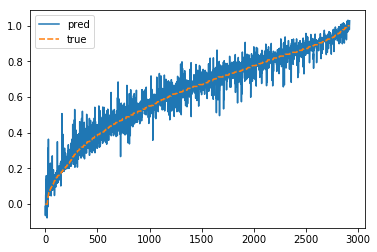

In [0]:
sns.lineplot(data=y_all)
plt.legend()
plt.show()